In [1]:
import pandas as pd
import numpy as np
from fastai.core import *
from PIL import Image
from fastai.script import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.distributed import *
from fastprogress import fastprogress
from torchvision.models import *

In [2]:
import json
from collections import defaultdict
import pdb
import numpy as np
from collections import defaultdict

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
coco = Path('dataset')
# coco = untar_data('classroomtest.coco.zip')
img_dir = Path(coco/'train')
anno_train = Path(coco/'annotation/train_annotations.coco.json')
# anno_valid = Path('dataset3/anno/valid_annotations.coco.json')

# annotation 여기에선 데이터 한꺼번에 불러오길래
# train val images 합쳐서 넣음
images, lbl_bbox = get_annotations(anno_train)
# images_,lbl_bbox_ = get_annotations(anno_valid)
# images.extend(images_)
# lbl_bbox.extend(lbl_bbox_)

# learn.predict(img)/

FileNotFoundError: [Errno 2] No such file or directory: 'dataset\\annotation\\train_annotations.coco.json'

In [ ]:
for idx, lbl in enumerate(lbl_bbox):
    if len(lbl[1]) == 0:
        print(f"found empty annotation: {idx}")

In [ ]:
## 돌렸을때 경고문구는 원래그럼. 예제에도 있었음.


img_list = ImageList.from_folder(img_dir)
#image size
sz = 224
# print(len(img_list))
# ncat =9

img2bbox = dict(zip(images, lbl_bbox))
# img2bbox.sort()
print(type(images))
# cnt = 0
def get_y_func(o):
    filename = o.name
    if img2bbox.get(o.name):
        return img2bbox[o.name]
    else:
        # 데이터가 다 잘 들어간걸 확인했는데도 자꾸 오류가 나서 넣은 코드
        # 라벨링이 안된 사진이 들어갔을때 나는 오류라서
        # 임의로 bbox 리턴. 데이터 교체하면 오류 없을것.
        return [[[0, 0, 0, 0]], ['front']]

# ver 2
data = (ObjectItemList.from_folder(img_dir)
        .split_by_rand_pct(valid_pct=0.2, seed=0)                         
        .label_from_func(get_y_func)
#         .transform(size=224)
        .databunch(bs=2, collate_fn=bb_pad_collate, num_workers=0)
        .normalize(imagenet_stats)
        ) 
# data.add_test_folder(ObjectItemList.from_folder('test')
#              .split_none()
#              .transform(size=224)
#             .databunch(bs=8, collate_fn=bb_pad_collate, num_workers=0)
#             .normalize(imagenet_stats)
#             )

# Test = (ObjectItemList.from_folder(img_dir/'test')
#              .split_none()
#              .transform(size=224)
#             .databunch(bs=8, collate_fn=bb_pad_collate, num_workers=0)
#             .normalize(imagenet_stats))
# ver original
# data = (ObjectItemList.from_folder('dataset1.v1.coco/images')
#         .split_by_folder()                          
#         .label_from_func(get_y_func)
#         .transform(get_transforms(), tfm_y=True, size=224)
#         .databunch(bs=8, collate_fn=bb_pad_collate, num_workers=0)
#         .normalize(imagenet_stats)
#        )

data

In [ ]:
data.show_batch(rows=3, ds_type= DatasetType.Valid, figsize=(10,10))

In [ ]:
# for idx, lbl in enumerate(lbl_bbox):
#     if len(lbl[1]) == 0:
#         print(f"found empty annotation: {idx}")

        
with open(anno_train) as f:
    train_json = json.load(f)

ncat = len(train_json['categories'])

print(ncat)
# train_json['categories']
# custom_head= 만들면 최고....
train_json['categories']

In [ ]:
# def hw2corners(ctr, hw): return torch.cat([ctr-hw/2, ctr+hw/2], dim=1)

# # str 중심값, bbox 가로세로 메트릭스 연산으로 꼭지점 좌표 구하기
# # 그 좌표를 이용해서 anchor 박스보여주기

# def create_anchors(ncells=[4], zooms=[1.],ratios=[(1.,1.)]):
#     a_scales = [(z*i,z*j) for z in zooms for (i,j) in ratios]
#     k = len(a_scales)
#     a_x = np.concatenate([np.repeat(np.linspace(-1+1/nc, 1-1/nc, nc), nc) 
#                           for nc in ncells])
#     a_y = np.concatenate([np.tile(np.linspace(-1+1/nc, 1-1/nc, nc), nc)
#                           for nc in ncells])
#     a_ctrs = np.repeat(np.stack([a_x, a_y], axis=1), k, axis=0)
#     a_sz = np.concatenate([np.array([[2*o/nc,2*p/nc] 
#                                      for i in range(nc*nc)
#                                      for o,p in a_scales])
#                            for nc in ncells])
#     grid_sz = np.concatenate([np.array([2/nc 
#                                         for i in range(nc*nc)
#                                         for o,p in a_scales])
#                               for nc in ncells])
#     anc = np.concatenate([a_ctrs, a_sz], axis=1)
#     grid_sizes = torch.tensor(grid_sz).type(torch.FloatTensor).unsqueeze(1).cuda()
#     anchors = torch.tensor(anc).type(torch.FloatTensor).cuda()
#     anchor_cnr = hw2corners(anchors[:,:2], anchors[:,2:])
#     return anchors, anchor_cnr, grid_sizes

In [ ]:
# anchors, anchor_cnr, grid_sizes = create_anchors(ncells=[4,2,1],
#                                                  zooms=[0.7, 1., 1.3],
#                                                  ratios=[(1.,1.), (1., 0.5), (0.5, 1.)])

In [ ]:

# def intersect(box_a, box_b):
#     max_xy = torch.min(box_a[:, None, 2:], box_b[None, :, 2:])
#     min_xy = torch.max(box_a[:, None, :2], box_b[None, :, :2])
#     inter = torch.clamp((max_xy - min_xy), min=0)
#     return inter[:, :, 0] * inter[:, :, 1]

# def box_sz(b): return ((b[:, 2]-b[:, 0]) * (b[:, 3]-b[:, 1]))

# def jaccard(box_a, box_b):
#     inter = intersect(box_a, box_b)
#     union = box_sz(box_a).unsqueeze(1) + box_sz(box_b).unsqueeze(0) - inter
#     return inter / union

# def map_to_ground_truth(overlaps, print_it=False):
#     prior_overlap, prior_idx = overlaps.max(1)
#     if print_it: print(prior_overlap)
# #     pdb.set_trace()
#     gt_overlap, gt_idx = overlaps.max(0)
#     gt_overlap[prior_idx] = 1.99
#     for i,o in enumerate(prior_idx): gt_idx[o] = i
#     return gt_overlap,gt_idx

# def actn_to_bb(actn, anchors):
#     actn_bbs = torch.tanh(actn)
#     actn_centers = (actn_bbs[:,:2]/2 * grid_sizes) + anchors[:,:2].cuda()
#     actn_hw = (actn_bbs[:,2:]/2+1) * anchors[:,2:].cuda()
#     return hw2corners(actn_centers, actn_hw)


In [ ]:

# def one_hot_embedding(labels, num_classes):
#     return torch.eye(num_classes)[labels.data.cpu()]

# class BCE_Loss(nn.Module):
#     def __init__(self,num_classes):
#         super().__init__()
#         self.num_classes = num_classes

#     def forward(self, pred, targ):
#         t = one_hot_embedding(targ, self.num_classes+1)
# #         t = t[:,:-1].contiguous().cuda()
# #         x = pred[:,:-1]
#         # in fastai v1, the background is encoded as the first class, rather than the last one
#         t = t[:,1:].contiguous().cuda()
#         x = pred[:,1:]
#         w = self.get_weight(x,t)
#         return F.binary_cross_entropy_with_logits(x, t, w, size_average=False)/(self.num_classes/2)
    
#     def get_weight(self,x,t): return None
    
# class FocalLoss(BCE_Loss):
#     def get_weight(self,x,t):
#         alpha,gamma = 0.25,2.
#         p = x.sigmoid()
#         pt = p*t + (1-p)*(1-t)
#         w = alpha*t + (1-alpha)*(1-t)
#         return (w * (1-pt).pow(gamma)).detach()

# loss_f = FocalLoss(ncat)

In [ ]:
# # remove padding - 이미지속에 존재하는 오브잭트 수가 각각 달라서 발생하는 문제를 해결하기 위해
# # 가장 많은걸 기준으로 0으로 패딩 넣음

# def get_y(bbox,clas):
#     bbox = bbox.view(-1,4)
#     bb_keep = ((bbox[:,2]-bbox[:,0])>0).nonzero()[:,0]
#     return bbox[bb_keep],clas[bb_keep]

# def ssd_1_loss(pred_bbox,pred_clas,bbox,clas):
#     bbox,clas = get_y(bbox,clas)
#     if len(bbox) == 0 and len(clas) == 0:
#         return 0.0, 0.0
#     a_ic = actn_to_bb(pred_bbox, anchors)
#     overlaps = jaccard(bbox.data, anchor_cnr.data)
#     gt_overlap,gt_idx = map_to_ground_truth(overlaps,False)
#     gt_clas = clas[gt_idx]
#     pos = gt_overlap > 0.4
#     pos_idx = torch.nonzero(pos)[:,0]
#     gt_clas[~pos] = 0 # background coded as 0
#     gt_bbox = bbox[gt_idx]
#     loc_loss = ((a_ic[pos_idx] - gt_bbox[pos_idx]).abs()).mean()
#     clas_loss  = loss_f(pred_clas, gt_clas)
#     #print(f"loc_loss: {loc_loss}, clas_loss: {clas_loss}")
#     return loc_loss, clas_loss

# def ssd_loss(pred,targ_bb,targ_c):
#     lcs,lls = 0.,0.
# #    i = 1
# #    for b_c,b_bb,bbox,clas in zip(*pred,targ_bb,targ_c):
#     for pr_bb, pr_c, ta_bb, ta_c in zip(*pred, targ_bb, targ_c):
# #         print(f"item {i}")
# #         if i == 5:
# #             pdb.set_trace()
# #         i = i+1
# #        loc_loss,clas_loss = ssd_1_loss(b_c,b_bb,bbox,clas)
#         loc_loss, clas_loss = ssd_1_loss(pr_bb, pr_c, ta_bb, ta_c)
#         lls += loc_loss
#         lcs += clas_loss
# #    if print_it: print(f'loc: {lls.data[0]}, clas: {lcs.data[0]}')
#     return 20*lls+lcs

In [ ]:
class StdConv(nn.Module):
    def __init__(self, nin, nout, stride=2, drop=0.2):
        super().__init__()
        self.conv = nn.Conv2d(nin, nout, 3, stride=stride, padding=1)
        self.bn = nn.BatchNorm2d(nout, momentum=0.3)
        self.drop = nn.Dropout(drop)
    def forward(self, x): return self.drop(self.bn(F.relu(self.conv(x))))
    
def flatten_conv(x,k):
    bs,nf,gx,gy = x.size()
    x = x.permute(0,2,3,1).contiguous()
    return x.view(bs,-1,nf//k)

class OutConv(nn.Module):
    def __init__(self, k, nin, bias):
        super().__init__()
        self.k = k
        self.oconv1 = nn.Conv2d(nin, 4*k, 3, padding=1) # first bboxes
        self.oconv2 = nn.Conv2d(nin, (ncat+1)*k, 3, padding=1) # than class labels
        self.oconv2.bias.data.zero_().add_(bias)
        
    def forward(self, x):
        return [flatten_conv(self.oconv1(x), self.k),
                flatten_conv(self.oconv2(x), self.k)]


# 모델 헤드

class SSD_Head(nn.Module):
    def __init__(self, k, bias):
        super().__init__()
        self.drop = nn.Dropout(0.1)
        self.sconv0 = StdConv(512,256, stride=1)#512
#         self.sconv1 = StdConv(256,256)
        self.sconv2 = StdConv(256,256)
        self.out = OutConv(k, 256, bias)
        
    def forward(self, x):
        x = self.drop(F.relu(x))
        x = self.sconv0(x)
#         x = self.sconv1(x)
        x = self.sconv2(x)
        return self.out(x)

In [ ]:
head_reg4 = SSD_Head(k=1, bias=1)
learn = cnn_learner(data, models.resnet34, custom_head=head_reg4)

learn.summary

In [ ]:
itemno = 1
item = data.valid_ds[itemno][0]

x, y = data.one_item(item)
# get one batch of data (x - img, y - ground truth)
#x, y = data.one_batch(cpu=False)

print("x", item)
print("y", y)

In [ ]:
b_bb, b_clas = learn.model(x)
b_clas.shape, b_bb.shape


In [ ]:
idx = 0
b_clasi = b_clas[idx].type(torch.FloatTensor).cuda()
b_bboxi = b_bb[idx].type(torch.FloatTensor).cuda()

b_clasi.shape, b_bboxi.shape, b_clasi[0], b_bboxi[0]

In [ ]:
#예시하나의 바운딩 박스

label = data.train_ds[itemno][1]
bbox, clas = label.data
bbox = bbox.cuda()
clas = torch.tensor(clas).cuda()
bboxi = bbox
clasi = clas

# bboxi.shape, clasi.shape, bboxi, clasi
data.train_ds[itemno][0]
bboxi 

In [ ]:
ncells = 4
k = 1 # num boxes per cell
first_ctr = -1 + 2/(2*ncells)
last_ctr  =  1 - 2/(2*ncells)
a_x = np.repeat(np.linspace(first_ctr, last_ctr, ncells), ncells)
a_y = np.tile(np.linspace(first_ctr, last_ctr, ncells), ncells)
a_sz = np.array([2/ncells for _ in a_x])
anchors = torch.tensor(np.stack([a_x, a_y, a_sz, a_sz], axis=1)).type(torch.FloatTensor).cuda()
anchors

In [ ]:
def hw2corners(ctr, hw): return torch.cat([ctr-hw/2, ctr+hw/2], dim=1)
anchor_cnr = hw2corners(anchors[:,:2], anchors[:,2:])
anchor_cnr

In [ ]:
grid_sizes = torch.tensor(np.array([2/ncells]), requires_grad=False).type(torch.FloatTensor).unsqueeze(1).cuda()
grid_sizes

In [ ]:
#함수는 이것만 돌리기 this is 찐

def one_hot_embedding(labels, num_classes):
    return torch.eye(num_classes)[labels.data.cpu()]

class BCE_Loss(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes

    def forward(self, pred, targ):
        t = one_hot_embedding(targ, self.num_classes+1)
        t = t[:,1:].contiguous().cuda()
        x = pred[:,1:]
        w = self.get_weight(x,t)
        return F.binary_cross_entropy_with_logits(x,t, w, size_average=False)/(self.num_classes/2)# w, size_average=False
    
    def get_weight(self,x,t): return None

loss_f = BCE_Loss(ncat)

# remove padding - images in a minibatch will have a different number of objects
# those with fewer objects will have their bbox groundtruth tensor padded with 0s
def get_y(bbox,clas):
    bbox = bbox.view(-1,4)
    bb_keep = ((bbox[:,2]-bbox[:,0])>0).nonzero()[:,0]
    return bbox[bb_keep],clas[bb_keep]

def ssd_1_loss(pred_bbox,pred_clas,bbox,clas):
    bbox,clas = get_y(bbox,clas)
    if len(bbox) == 0 and len(clas) == 0:
        return 0.0, 0.0
    anchors = torch.tensor(np.stack([a_x, a_y, a_sz, a_sz], axis=1)).type(torch.FloatTensor).cuda()
    a_ic = actn_to_bb(pred_bbox, anchors)
    overlaps = jaccard(bbox.data, anchor_cnr.data).cuda()
    gt_overlap,gt_idx = map_to_ground_truth(overlaps,False)
    gt_clas = clas[gt_idx].type(torch.LongTensor).cuda()
    pos = gt_overlap > 0.4
    pos_idx = torch.nonzero(pos)[:,0]
    gt_clas[~pos] = 0 # background coded as 0
    gt_bbox = bbox[gt_idx]
    loc_loss = ((a_ic[pos_idx] - gt_bbox[pos_idx]).abs()).mean()
    clas_loss  = loss_f(pred_clas, gt_clas)
    print(f"loc_loss: {loc_loss}, clas_loss: {clas_loss}")
    return loc_loss, clas_loss

def ssd_loss(pred,targ_bb,targ_c):
    lcs,lls = 0.,0.
    for pr_bb, pr_c, ta_bb, ta_c in zip(*pred, targ_bb, targ_c):
        loc_loss, clas_loss = ssd_1_loss(pr_bb, pr_c, ta_bb, ta_c)
        lls += loc_loss
        lcs += clas_loss
    return 2*lls+lcs

# centre+height/width -> corners
def hw2corners(ctr, hw): return torch.cat([ctr-hw/2, ctr+hw/2], dim=1)

def intersect(box_a, box_b):
    max_xy = torch.min(box_a[:, None, 2:], box_b[None, :, 2:])
    min_xy = torch.max(box_a[:, None, :2], box_b[None, :, :2])
    inter = torch.clamp((max_xy - min_xy), min=0)
    return inter[:, :, 0] * inter[:, :, 1]

def box_sz(b): return ((b[:, 2]-b[:, 0]) * (b[:, 3]-b[:, 1]))

def jaccard(box_a, box_b):
    inter = intersect(box_a, box_b)
    union = box_sz(box_a).unsqueeze(1) + box_sz(box_b).unsqueeze(0) - inter
    return inter / union

def map_to_ground_truth(overlaps, print_it=False):
    prior_overlap, prior_idx = overlaps.max(1)
    if print_it: print(prior_overlap)
#     pdb.set_trace()
    gt_overlap, gt_idx = overlaps.max(0)
    gt_overlap[prior_idx] = 1.99
    for i,o in enumerate(prior_idx): gt_idx[o] = i
    return gt_overlap,gt_idx

def actn_to_bb(actn, anchors):
    actn_bbs = torch.tanh(actn.type(torch.FloatTensor)).cuda()
#     print(actn_bbs)
#     print(actn_bbs[:,:2]/2, grid_sizes, anchors[:,:2].shape)
    actn_centers = (actn_bbs[:,:2]/2 * grid_sizes).cuda() + anchors[:,:2].cuda()
    actn_hw = (actn_bbs[:,2:]/2+1) * anchors[:,2:]
    return hw2corners(actn_centers, actn_hw)

In [ ]:
overlaps = jaccard(bbox.data.cuda(), anchor_cnr).cuda()
overlaps

In [ ]:
#제일 가능성있는 박스 2개
overlaps.max(0)
overlaps.max(1)

gt_overlap, gt_idx = map_to_ground_truth(overlaps)
gt_overlap, gt_idx

In [ ]:
gt_clas = clas[gt_idx].type(torch.LongTensor).cuda(); gt_clas

In [ ]:
thresh = 0.5
pos = gt_overlap > thresh
pos_idx = torch.nonzero(pos)[:,0]
neg_idx = torch.nonzero(~pos)[:,0]
pos_idx

In [ ]:
a_ic = actn_to_bb(b_bboxi, anchors)
gt_bbox = bbox.cuda()[gt_idx]
loc_loss = ((a_ic[pos_idx] - gt_bbox[pos_idx]).abs()).mean()
clas_loss  = F.cross_entropy(b_clasi, gt_clas)
loc_loss,clas_loss
b_bboxi, anchors

In [ ]:
a_ic[pos_idx] - gt_bbox[pos_idx]

In [ ]:
head_reg4 = SSD_Head(k=1, bias=1.0)
learn = cnn_learner(data, models.resnet34, loss_func= ssd_loss, custom_head=head_reg4)
#nll_loss/cross_entropy

In [39]:
lr=1e-03
learn.fit_one_cycle(20, lr)

epoch,train_loss,valid_loss,time
0,56.986919,53.342522,00:02
1,55.790970,50.005337,00:01
2,53.947800,45.521969,00:01
3,50.791931,40.074787,00:01
4,46.368412,34.629967,00:01
5,40.859230,29.140066,00:01
6,34.275215,23.395657,00:01
7,27.576521,16.113924,00:01
8,21.784424,13.124888,00:01
9,16.803194,10.486567,00:02


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2603711485862732, clas_loss: 31.236421585083008
loc_loss: 0.2934674620628357, clas_loss: 23.59621810913086
loc_loss: 0.19885018467903137, clas_loss: 28.550317764282227
loc_loss: 0.3004225492477417, clas_loss: 25.85685920715332


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.3310869634151459, clas_loss: 26.270904541015625
loc_loss: 0.26250290870666504, clas_loss: 27.290916442871094


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.25389930605888367, clas_loss: 27.926315307617188
loc_loss: 0.27626171708106995, clas_loss: 31.292438507080078


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15726995468139648, clas_loss: 26.245267868041992
loc_loss: 0.2410902976989746, clas_loss: 31.53937339782715
loc_loss: 0.21526479721069336, clas_loss: 25.6549072265625
loc_loss: 0.19128577411174774, clas_loss: 27.264554977416992


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21804505586624146, clas_loss: 25.16687774658203
loc_loss: 0.36970189213752747, clas_loss: 31.167762756347656


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.23510204255580902, clas_loss: 30.90395164489746
loc_loss: 0.28623196482658386, clas_loss: 25.996150970458984


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23370230197906494, clas_loss: 28.95685386657715
loc_loss: 0.31207892298698425, clas_loss: 26.109580993652344


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.27437078952789307, clas_loss: 26.446533203125
loc_loss: 0.28556692600250244, clas_loss: 30.235301971435547


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24345874786376953, clas_loss: 28.214279174804688
loc_loss: 0.3007167875766754, clas_loss: 27.946441650390625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2414303421974182, clas_loss: 27.559825897216797
loc_loss: 0.2616228759288788, clas_loss: 29.81521224975586


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2954215109348297, clas_loss: 27.94405174255371
loc_loss: 0.2848096191883087, clas_loss: 27.62150001525879


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19190329313278198, clas_loss: 29.384567260742188
loc_loss: 0.2245202660560608, clas_loss: 28.612220764160156


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.30297112464904785, clas_loss: 28.5372371673584
loc_loss: 0.30161136388778687, clas_loss: 26.124563217163086


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.29338255524635315, clas_loss: 25.1312255859375
loc_loss: 0.27910304069519043, clas_loss: 29.347827911376953


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.36247360706329346, clas_loss: 27.610382080078125
loc_loss: 0.20496675372123718, clas_loss: 29.74322509765625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2628509998321533, clas_loss: 28.5741024017334
loc_loss: 0.24128632247447968, clas_loss: 25.87315559387207


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17803208529949188, clas_loss: 29.397090911865234
loc_loss: 0.3268730044364929, clas_loss: 29.803279876708984


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.26303499937057495, clas_loss: 27.092811584472656
loc_loss: 0.233753502368927, clas_loss: 28.410003662109375


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24187570810317993, clas_loss: 28.4388370513916
loc_loss: 0.22996562719345093, clas_loss: 26.340944290161133


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2330533266067505, clas_loss: 27.8521728515625
loc_loss: 0.24646329879760742, clas_loss: 28.36297607421875
loc_loss: 0.2687985301017761, clas_loss: 27.438278198242188
loc_loss: 0.3000974655151367, clas_loss: 27.317543029785156


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24711874127388, clas_loss: 25.139877319335938
loc_loss: 0.2670237421989441, clas_loss: 30.42767333984375
loc_loss: 0.28430604934692383, clas_loss: 26.847639083862305
loc_loss: 0.18028202652931213, clas_loss: 28.943161010742188


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.368946373462677, clas_loss: 29.795652389526367
loc_loss: 0.3048855662345886, clas_loss: 26.109054565429688
loc_loss: 0.286613404750824, clas_loss: 31.15579605102539
loc_loss: 0.1026587262749672, clas_loss: 25.622955322265625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1718265265226364, clas_loss: 29.07288360595703
loc_loss: 0.34826260805130005, clas_loss: 23.672672271728516


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.21950465440750122, clas_loss: 30.096221923828125
loc_loss: 0.22095172107219696, clas_loss: 26.68312644958496


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11025732755661011, clas_loss: 30.745285034179688
loc_loss: 0.3606724739074707, clas_loss: 22.96173858642578


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.34987348318099976, clas_loss: 27.392568588256836
loc_loss: 0.307908296585083, clas_loss: 24.782169342041016
loc_loss: 0.2144181728363037, clas_loss: 27.856525421142578
loc_loss: 0.3971812129020691, clas_loss: 23.229244232177734


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2213945984840393, clas_loss: 30.819229125976562
loc_loss: 0.19049906730651855, clas_loss: 28.168439865112305
loc_loss: 0.35453468561172485, clas_loss: 29.332502365112305


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1553313136100769, clas_loss: 27.350200653076172
loc_loss: 0.16461628675460815, clas_loss: 25.894939422607422


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.26553580164909363, clas_loss: 26.829540252685547
loc_loss: 0.2885415554046631, clas_loss: 27.293750762939453


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24264495074748993, clas_loss: 28.059844970703125
loc_loss: 0.22264403104782104, clas_loss: 27.84558868408203
loc_loss: 0.1764417290687561, clas_loss: 27.319637298583984
loc_loss: 0.16009238362312317, clas_loss: 28.237808227539062


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2788895070552826, clas_loss: 29.72699546813965
loc_loss: 0.12264804542064667, clas_loss: 31.07645034790039


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.23646797239780426, clas_loss: 28.022602081298828
loc_loss: 0.30986830592155457, clas_loss: 25.982177734375
loc_loss: 0.2500932812690735, clas_loss: 27.193138122558594
loc_loss: 0.2634032964706421, clas_loss: 28.42379379272461


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.294971764087677, clas_loss: 26.251014709472656
loc_loss: 0.3733169436454773, clas_loss: 27.531787872314453


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23219993710517883, clas_loss: 25.091896057128906
loc_loss: 0.27396637201309204, clas_loss: 26.852022171020508
loc_loss: 0.31013208627700806, clas_loss: 25.36398696899414
loc_loss: 0.34732937812805176, clas_loss: 27.67001724243164


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.21561536192893982, clas_loss: 23.476154327392578
loc_loss: 0.2293393313884735, clas_loss: 29.565441131591797


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20667976140975952, clas_loss: 28.030784606933594
loc_loss: 0.31536436080932617, clas_loss: 25.601104736328125
loc_loss: 0.25105196237564087, clas_loss: 26.488292694091797
loc_loss: 0.24917945265769958, clas_loss: 25.588598251342773


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.32765960693359375, clas_loss: 23.99701690673828
loc_loss: 0.26981672644615173, clas_loss: 29.609657287597656


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.16525010764598846, clas_loss: 24.97271728515625
loc_loss: 0.22094155848026276, clas_loss: 27.682270050048828
loc_loss: 0.3442698121070862, clas_loss: 27.86263084411621
loc_loss: 0.327862948179245, clas_loss: 23.843467712402344


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15990877151489258, clas_loss: 28.14940643310547
loc_loss: 0.2941739559173584, clas_loss: 27.220428466796875
loc_loss: 0.23819485306739807, clas_loss: 30.33368492126465
loc_loss: 0.3571660816669464, clas_loss: 27.28661346435547


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24657917022705078, clas_loss: 28.35633087158203
loc_loss: 0.2971138656139374, clas_loss: 28.792736053466797
loc_loss: 0.17850540578365326, clas_loss: 26.132192611694336
loc_loss: 0.23492442071437836, clas_loss: 28.305797576904297


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24604830145835876, clas_loss: 28.088722229003906
loc_loss: 0.25224971771240234, clas_loss: 25.925025939941406
loc_loss: 0.24400882422924042, clas_loss: 28.189685821533203
loc_loss: 0.34734511375427246, clas_loss: 27.038667678833008


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22342215478420258, clas_loss: 26.101863861083984
loc_loss: 0.34491175413131714, clas_loss: 25.59032440185547


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1900649219751358, clas_loss: 25.167346954345703
loc_loss: 0.344322144985199, clas_loss: 25.478200912475586
loc_loss: 0.2689740061759949, clas_loss: 28.398101806640625
loc_loss: 0.238201305270195, clas_loss: 24.09337043762207


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21300628781318665, clas_loss: 24.89850616455078
loc_loss: 0.3085046410560608, clas_loss: 27.3492374420166
loc_loss: 0.2875734567642212, clas_loss: 26.562740325927734
loc_loss: 0.23954826593399048, clas_loss: 29.58380889892578


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.21888495981693268, clas_loss: 27.140953063964844
loc_loss: 0.34044307470321655, clas_loss: 20.93631935119629


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.24032853543758392, clas_loss: 28.10236358642578
loc_loss: 0.2288319170475006, clas_loss: 24.05376434326172


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23318617045879364, clas_loss: 26.93674659729004
loc_loss: 0.36067384481430054, clas_loss: 22.405609130859375


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.34095463156700134, clas_loss: 23.89116859436035
loc_loss: 0.2748413681983948, clas_loss: 23.36785316467285
loc_loss: 0.2667396068572998, clas_loss: 27.72930335998535
loc_loss: 0.36730873584747314, clas_loss: 22.834415435791016


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.17832697927951813, clas_loss: 28.028724670410156
loc_loss: 0.18222418427467346, clas_loss: 28.665128707885742
loc_loss: 0.26345282793045044, clas_loss: 28.426836013793945


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.31202828884124756, clas_loss: 25.790409088134766
loc_loss: 0.2879488468170166, clas_loss: 29.464004516601562


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14106369018554688, clas_loss: 26.40848159790039
loc_loss: 0.2435670793056488, clas_loss: 24.861900329589844


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20897480845451355, clas_loss: 24.37847137451172
loc_loss: 0.2730375826358795, clas_loss: 27.26801872253418
loc_loss: 0.32850685715675354, clas_loss: 24.504215240478516
loc_loss: 0.24632206559181213, clas_loss: 28.521581649780273


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23803028464317322, clas_loss: 26.930618286132812
loc_loss: 0.27135807275772095, clas_loss: 25.54511833190918


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.23629647493362427, clas_loss: 27.241870880126953
loc_loss: 0.255527138710022, clas_loss: 24.727008819580078
loc_loss: 0.26999908685684204, clas_loss: 28.309383392333984
loc_loss: 0.2869757413864136, clas_loss: 25.092510223388672


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.28466570377349854, clas_loss: 28.069198608398438
loc_loss: 0.24825644493103027, clas_loss: 26.026737213134766


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2768886089324951, clas_loss: 22.814414978027344
loc_loss: 0.28529638051986694, clas_loss: 25.29224395751953


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2482912540435791, clas_loss: 21.715721130371094
loc_loss: 0.32500988245010376, clas_loss: 27.47313690185547
loc_loss: 0.2247663140296936, clas_loss: 24.902938842773438
loc_loss: 0.2224258929491043, clas_loss: 24.540103912353516


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23562073707580566, clas_loss: 25.63170623779297
loc_loss: 0.22838512063026428, clas_loss: 27.682090759277344
loc_loss: 0.2684018611907959, clas_loss: 26.715015411376953
loc_loss: 0.309286504983902, clas_loss: 25.604393005371094
loc_loss: 0.23958414793014526, clas_loss: 25.113094329833984
loc_loss: 0.24196551740169525, clas_loss: 24.139068603515625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.3505328893661499, clas_loss: 23.33582305908203


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2713448107242584, clas_loss: 28.410646438598633
loc_loss: 0.2871602475643158, clas_loss: 23.705142974853516
loc_loss: 0.23949135839939117, clas_loss: 28.309139251708984
loc_loss: 0.21503055095672607, clas_loss: 26.33140754699707
loc_loss: 0.30467283725738525, clas_loss: 20.915531158447266


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.25806725025177, clas_loss: 23.595739364624023
loc_loss: 0.31298694014549255, clas_loss: 23.500263214111328


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2421022653579712, clas_loss: 25.694000244140625
loc_loss: 0.35730430483818054, clas_loss: 25.67788314819336
loc_loss: 0.2885870635509491, clas_loss: 25.932018280029297
loc_loss: 0.19303900003433228, clas_loss: 26.203447341918945


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.22187817096710205, clas_loss: 23.156705856323242
loc_loss: 0.26052722334861755, clas_loss: 30.030010223388672


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18176984786987305, clas_loss: 25.73426055908203
loc_loss: 0.2971377968788147, clas_loss: 26.953834533691406
loc_loss: 0.25140130519866943, clas_loss: 27.00394058227539
loc_loss: 0.18500587344169617, clas_loss: 27.46479034423828


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23435795307159424, clas_loss: 25.937246322631836
loc_loss: 0.22023996710777283, clas_loss: 26.68195152282715


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.24813315272331238, clas_loss: 25.168746948242188
loc_loss: 0.24607793986797333, clas_loss: 24.05828094482422
loc_loss: 0.2644988000392914, clas_loss: 25.918853759765625
loc_loss: 0.19141511619091034, clas_loss: 22.773820877075195


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21545445919036865, clas_loss: 24.96825408935547
loc_loss: 0.2192712426185608, clas_loss: 23.981189727783203


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18606597185134888, clas_loss: 25.426700592041016
loc_loss: 0.24891354143619537, clas_loss: 18.280078887939453


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21494105458259583, clas_loss: 25.828319549560547
loc_loss: 0.23934537172317505, clas_loss: 23.721206665039062


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2014363408088684, clas_loss: 24.752016067504883
loc_loss: 0.35013729333877563, clas_loss: 20.256877899169922


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2773984968662262, clas_loss: 21.344280242919922
loc_loss: 0.3079875111579895, clas_loss: 21.640792846679688
loc_loss: 0.25261789560317993, clas_loss: 25.31687355041504
loc_loss: 0.32494571805000305, clas_loss: 20.880908966064453


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1785449981689453, clas_loss: 24.682315826416016
loc_loss: 0.17871487140655518, clas_loss: 25.08979606628418
loc_loss: 0.24603413045406342, clas_loss: 25.008991241455078


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2120417058467865, clas_loss: 25.796924591064453
loc_loss: 0.2756587266921997, clas_loss: 24.410924911499023


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2862992286682129, clas_loss: 23.34886932373047
loc_loss: 0.2855587899684906, clas_loss: 22.577911376953125


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.250093936920166, clas_loss: 27.120697021484375
loc_loss: 0.16566753387451172, clas_loss: 22.812292098999023
loc_loss: 0.269877165555954, clas_loss: 26.869491577148438
loc_loss: 0.24221953749656677, clas_loss: 22.950191497802734


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.3046027719974518, clas_loss: 27.154470443725586
loc_loss: 0.24976468086242676, clas_loss: 22.86123275756836
loc_loss: 0.32607680559158325, clas_loss: 24.052574157714844
loc_loss: 0.21887275576591492, clas_loss: 24.667495727539062


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.32836923003196716, clas_loss: 21.543285369873047
loc_loss: 0.25847721099853516, clas_loss: 24.36325454711914


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.32377588748931885, clas_loss: 21.497020721435547
loc_loss: 0.2639378011226654, clas_loss: 24.426210403442383


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2010982632637024, clas_loss: 22.63391876220703
loc_loss: 0.14337269961833954, clas_loss: 23.853818893432617


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.21053093671798706, clas_loss: 22.848007202148438
loc_loss: 0.21712949872016907, clas_loss: 24.966270446777344
loc_loss: 0.3208281993865967, clas_loss: 27.240249633789062
loc_loss: 0.12185421586036682, clas_loss: 22.333459854125977


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.25265491008758545, clas_loss: 21.816184997558594
loc_loss: 0.22093820571899414, clas_loss: 26.998271942138672
loc_loss: 0.1658029705286026, clas_loss: 23.3112850189209
loc_loss: 0.34108203649520874, clas_loss: 23.890647888183594
loc_loss: 0.28001147508621216, clas_loss: 24.483863830566406
loc_loss: 0.24308249354362488, clas_loss: 20.579898834228516


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.23687875270843506, clas_loss: 22.848220825195312
loc_loss: 0.21134048700332642, clas_loss: 23.394386291503906


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.27259671688079834, clas_loss: 21.98729133605957
loc_loss: 0.37756234407424927, clas_loss: 22.833911895751953


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20976342260837555, clas_loss: 23.748872756958008
loc_loss: 0.2982584834098816, clas_loss: 21.549251556396484


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.318945050239563, clas_loss: 23.313465118408203
loc_loss: 0.22801712155342102, clas_loss: 22.470407485961914


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24708813428878784, clas_loss: 20.579856872558594
loc_loss: 0.2528761029243469, clas_loss: 24.382112503051758


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2678984999656677, clas_loss: 23.79628562927246
loc_loss: 0.06973280012607574, clas_loss: 22.03433609008789
loc_loss: 0.26952219009399414, clas_loss: 22.945301055908203
loc_loss: 0.28386950492858887, clas_loss: 25.16051483154297


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22630706429481506, clas_loss: 21.621801376342773
loc_loss: 0.308146595954895, clas_loss: 20.36939239501953
loc_loss: 0.2075490951538086, clas_loss: 20.36104965209961
loc_loss: 0.20821864902973175, clas_loss: 25.429670333862305


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21354776620864868, clas_loss: 24.83355140686035
loc_loss: 0.16861331462860107, clas_loss: 20.463150024414062


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.30267125368118286, clas_loss: 25.003509521484375
loc_loss: 0.25144875049591064, clas_loss: 20.17711067199707
loc_loss: 0.22195039689540863, clas_loss: 17.65308380126953
loc_loss: 0.2781817615032196, clas_loss: 24.26873207092285


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.3013964891433716, clas_loss: 22.970775604248047
loc_loss: 0.23538820445537567, clas_loss: 21.16439437866211
loc_loss: 0.16313406825065613, clas_loss: 22.489585876464844
loc_loss: 0.3251533508300781, clas_loss: 16.203269958496094


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.27581316232681274, clas_loss: 22.394386291503906
loc_loss: 0.24288755655288696, clas_loss: 20.201671600341797


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2724243998527527, clas_loss: 21.59160614013672
loc_loss: 0.3665623366832733, clas_loss: 17.744735717773438


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.3751007318496704, clas_loss: 18.852787017822266
loc_loss: 0.2612157464027405, clas_loss: 19.27335548400879
loc_loss: 0.22199787199497223, clas_loss: 22.746360778808594
loc_loss: 0.38394248485565186, clas_loss: 18.176860809326172


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1716419756412506, clas_loss: 22.327381134033203
loc_loss: 0.1957913637161255, clas_loss: 21.091205596923828
loc_loss: 0.2519272565841675, clas_loss: 21.259273529052734


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.31131765246391296, clas_loss: 22.46050453186035
loc_loss: 0.35790586471557617, clas_loss: 23.03533172607422


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.314166784286499, clas_loss: 21.502424240112305
loc_loss: 0.2967267334461212, clas_loss: 20.0590763092041


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.23034030199050903, clas_loss: 22.978866577148438
loc_loss: 0.18313349783420563, clas_loss: 21.317401885986328


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.3205091059207916, clas_loss: 21.219688415527344
loc_loss: 0.27090930938720703, clas_loss: 22.098369598388672


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.3045404851436615, clas_loss: 21.711631774902344
loc_loss: 0.24280089139938354, clas_loss: 22.805500030517578


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2535746097564697, clas_loss: 21.478107452392578
loc_loss: 0.2585028409957886, clas_loss: 23.178783416748047


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.24565473198890686, clas_loss: 20.71844482421875
loc_loss: 0.24235305190086365, clas_loss: 24.987167358398438
loc_loss: 0.23739880323410034, clas_loss: 21.75969696044922
loc_loss: 0.2003290355205536, clas_loss: 19.73904037475586


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.25519055128097534, clas_loss: 22.433378219604492
loc_loss: 0.10859605669975281, clas_loss: 21.83013916015625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.295915424823761, clas_loss: 20.133054733276367
loc_loss: 0.26232510805130005, clas_loss: 18.373931884765625
loc_loss: 0.22158581018447876, clas_loss: 18.492185592651367
loc_loss: 0.23860912024974823, clas_loss: 22.70313262939453


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.32359540462493896, clas_loss: 21.146371841430664
loc_loss: 0.1841336488723755, clas_loss: 19.779844284057617
loc_loss: 0.2615801692008972, clas_loss: 20.203157424926758
loc_loss: 0.24925991892814636, clas_loss: 19.47393035888672


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20171435177326202, clas_loss: 20.144084930419922
loc_loss: 0.22324492037296295, clas_loss: 19.037567138671875


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19754627346992493, clas_loss: 19.145883560180664
loc_loss: 0.24311235547065735, clas_loss: 17.01642417907715


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2722257673740387, clas_loss: 19.287731170654297
loc_loss: 0.22667168080806732, clas_loss: 19.6339054107666
loc_loss: 0.2625764310359955, clas_loss: 20.824556350708008
loc_loss: 0.314483106136322, clas_loss: 17.847869873046875


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16884995996952057, clas_loss: 18.98528289794922
loc_loss: 0.2844708561897278, clas_loss: 18.87030601501465


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17840754985809326, clas_loss: 21.432846069335938
loc_loss: 0.15121211111545563, clas_loss: 18.64942169189453


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23729513585567474, clas_loss: 18.884693145751953
loc_loss: 0.27661198377609253, clas_loss: 19.061145782470703


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18654684722423553, clas_loss: 21.76422691345215
loc_loss: 0.1686525195837021, clas_loss: 19.376665115356445


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.33320313692092896, clas_loss: 19.77204132080078
loc_loss: 0.26672911643981934, clas_loss: 18.218595504760742
loc_loss: 0.3609946668148041, clas_loss: 17.151939392089844
loc_loss: 0.21303759515285492, clas_loss: 17.374980926513672


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.23211762309074402, clas_loss: 17.882080078125
loc_loss: 0.3235236406326294, clas_loss: 21.35358238220215


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2674800753593445, clas_loss: 19.677047729492188
loc_loss: 0.19338509440422058, clas_loss: 16.11412811279297
loc_loss: 0.18156342208385468, clas_loss: 17.420021057128906
loc_loss: 0.1852790117263794, clas_loss: 19.641910552978516


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16992348432540894, clas_loss: 18.818836212158203
loc_loss: 0.19451944530010223, clas_loss: 20.676244735717773


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1779165416955948, clas_loss: 20.812240600585938
loc_loss: 0.2481185793876648, clas_loss: 13.356861114501953
loc_loss: 0.25838661193847656, clas_loss: 19.397369384765625
loc_loss: 0.20578408241271973, clas_loss: 18.181659698486328


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17227578163146973, clas_loss: 18.9644718170166
loc_loss: 0.35776835680007935, clas_loss: 14.571269035339355


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.3014266788959503, clas_loss: 15.334847450256348
loc_loss: 0.2528505027294159, clas_loss: 16.40953826904297
loc_loss: 0.25081098079681396, clas_loss: 19.623779296875
loc_loss: 0.2867141366004944, clas_loss: 16.109081268310547


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18561118841171265, clas_loss: 17.886341094970703
loc_loss: 0.1893499195575714, clas_loss: 19.110319137573242
loc_loss: 0.2502531409263611, clas_loss: 18.625446319580078


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2554119825363159, clas_loss: 17.672819137573242
loc_loss: 0.23454409837722778, clas_loss: 17.841014862060547


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.3461551368236542, clas_loss: 18.185274124145508
loc_loss: 0.19416919350624084, clas_loss: 17.13312339782715


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.29840409755706787, clas_loss: 18.73544692993164
loc_loss: 0.20935098826885223, clas_loss: 16.264751434326172
loc_loss: 0.26021161675453186, clas_loss: 17.643077850341797
loc_loss: 0.17265251278877258, clas_loss: 19.044958114624023


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24084794521331787, clas_loss: 19.74498748779297
loc_loss: 0.2300429791212082, clas_loss: 16.42559814453125


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1645762324333191, clas_loss: 15.372344970703125
loc_loss: 0.3114595413208008, clas_loss: 18.017398834228516


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.246979758143425, clas_loss: 16.118627548217773
loc_loss: 0.3078213632106781, clas_loss: 20.039308547973633
loc_loss: 0.26500219106674194, clas_loss: 17.820253372192383
loc_loss: 0.30062994360923767, clas_loss: 18.276451110839844


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.23015698790550232, clas_loss: 16.16225814819336
loc_loss: 0.33697447180747986, clas_loss: 16.73113441467285


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.228654682636261, clas_loss: 16.848913192749023
loc_loss: 0.3201606571674347, clas_loss: 17.991395950317383
loc_loss: 0.17700199782848358, clas_loss: 17.118000030517578
loc_loss: 0.16723309457302094, clas_loss: 17.406394958496094


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2297874540090561, clas_loss: 18.081762313842773
loc_loss: 0.32098960876464844, clas_loss: 18.460235595703125


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.23702538013458252, clas_loss: 15.768653869628906
loc_loss: 0.25413715839385986, clas_loss: 17.318668365478516


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18491610884666443, clas_loss: 16.67639923095703
loc_loss: 0.25777843594551086, clas_loss: 14.765375137329102


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10378733277320862, clas_loss: 13.549615859985352
loc_loss: 0.22046151757240295, clas_loss: 16.96417236328125
loc_loss: 0.21449512243270874, clas_loss: 15.575553894042969
loc_loss: 0.2249297946691513, clas_loss: 14.565876960754395


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24206486344337463, clas_loss: 13.610658645629883
loc_loss: 0.23871371150016785, clas_loss: 16.835176467895508


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.22824726998806, clas_loss: 16.069141387939453
loc_loss: 0.1946161985397339, clas_loss: 16.609996795654297


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.18829192221164703, clas_loss: 14.83866024017334
loc_loss: 0.19897767901420593, clas_loss: 15.104567527770996
loc_loss: 0.2484389990568161, clas_loss: 17.42679214477539
loc_loss: 0.1981348842382431, clas_loss: 16.393821716308594


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.18008236587047577, clas_loss: 17.408449172973633
loc_loss: 0.34917932748794556, clas_loss: 16.50507354736328


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2064637541770935, clas_loss: 16.412992477416992
loc_loss: 0.18995705246925354, clas_loss: 14.542402267456055
loc_loss: 0.2779846787452698, clas_loss: 15.532917022705078
loc_loss: 0.1957263946533203, clas_loss: 15.877880096435547


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1676483154296875, clas_loss: 14.48807144165039
loc_loss: 0.2969610393047333, clas_loss: 17.929107666015625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.20263373851776123, clas_loss: 17.017274856567383
loc_loss: 0.19408249855041504, clas_loss: 14.672990798950195
loc_loss: 0.1184002086520195, clas_loss: 14.3241548538208
loc_loss: 0.2287580668926239, clas_loss: 16.040945053100586


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1418791115283966, clas_loss: 12.600665092468262
loc_loss: 0.1342075765132904, clas_loss: 16.047412872314453


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1366323083639145, clas_loss: 18.058774948120117
loc_loss: 0.2697031497955322, clas_loss: 11.010276794433594


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.28317251801490784, clas_loss: 17.243804931640625
loc_loss: 0.1650046706199646, clas_loss: 15.047321319580078


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16058193147182465, clas_loss: 15.003410339355469
loc_loss: 0.3072683811187744, clas_loss: 13.105995178222656
loc_loss: 0.34310445189476013, clas_loss: 13.334285736083984
loc_loss: 0.24269449710845947, clas_loss: 15.018960952758789


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2375786006450653, clas_loss: 16.18872833251953
loc_loss: 0.2968066334724426, clas_loss: 13.6145658493042


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13736505806446075, clas_loss: 14.41202163696289
loc_loss: 0.15865306556224823, clas_loss: 14.586432456970215
loc_loss: 0.25692856311798096, clas_loss: 14.103582382202148


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.26163074374198914, clas_loss: 13.314023971557617
loc_loss: 0.18803715705871582, clas_loss: 14.427347183227539


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.240595743060112, clas_loss: 14.16163444519043
loc_loss: 0.18371251225471497, clas_loss: 14.144492149353027


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19123739004135132, clas_loss: 13.224760055541992
loc_loss: 0.16505593061447144, clas_loss: 13.695050239562988


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.28374022245407104, clas_loss: 12.660259246826172
loc_loss: 0.2842504382133484, clas_loss: 12.457601547241211


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19692033529281616, clas_loss: 13.937159538269043
loc_loss: 0.26589250564575195, clas_loss: 10.595355033874512


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.2702261805534363, clas_loss: 14.336318969726562
loc_loss: 0.17807060480117798, clas_loss: 12.52495288848877
loc_loss: 0.26308944821357727, clas_loss: 12.696163177490234
loc_loss: 0.2768223285675049, clas_loss: 14.774806022644043


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23304550349712372, clas_loss: 15.996478080749512
loc_loss: 0.25690504908561707, clas_loss: 11.598658561706543


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.21440348029136658, clas_loss: 11.944013595581055
loc_loss: 0.18610118329524994, clas_loss: 15.456254005432129


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.26680344343185425, clas_loss: 14.914722442626953
loc_loss: 0.2937595248222351, clas_loss: 18.125112533569336
loc_loss: 0.23317301273345947, clas_loss: 12.949444770812988
loc_loss: 0.22888466715812683, clas_loss: 12.922900199890137


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23462970554828644, clas_loss: 15.040484428405762
loc_loss: 0.18178558349609375, clas_loss: 14.398429870605469


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.16472657024860382, clas_loss: 12.950045585632324
loc_loss: 0.20624570548534393, clas_loss: 11.003952026367188


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21089792251586914, clas_loss: 12.812971115112305
loc_loss: 0.2270079404115677, clas_loss: 12.570610046386719


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1883964240550995, clas_loss: 12.102922439575195
loc_loss: 0.15212473273277283, clas_loss: 11.613618850708008


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11666062474250793, clas_loss: 12.489988327026367
loc_loss: 0.22655089199543, clas_loss: 11.775344848632812
loc_loss: 0.18601077795028687, clas_loss: 13.364578247070312
loc_loss: 0.19028136134147644, clas_loss: 9.819007873535156


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.18887284398078918, clas_loss: 12.75662899017334
loc_loss: 0.1425131857395172, clas_loss: 11.482645034790039


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.24316756427288055, clas_loss: 9.4910888671875
loc_loss: 0.17741525173187256, clas_loss: 12.761833190917969
loc_loss: 0.23197774589061737, clas_loss: 12.319948196411133
loc_loss: 0.22539427876472473, clas_loss: 11.67696762084961


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1542181670665741, clas_loss: 8.935369491577148
loc_loss: 0.23062120378017426, clas_loss: 13.36726188659668
loc_loss: 0.24800455570220947, clas_loss: 10.414318084716797
loc_loss: 0.304524302482605, clas_loss: 10.980157852172852


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08910839259624481, clas_loss: 11.290983200073242
loc_loss: 0.1955905258655548, clas_loss: 11.853710174560547
loc_loss: 0.1804318130016327, clas_loss: 10.962839126586914
loc_loss: 0.24509260058403015, clas_loss: 11.889866828918457
loc_loss: 0.1903284639120102, clas_loss: 11.075050354003906
loc_loss: 0.19866669178009033, clas_loss: 11.79985237121582


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.27133724093437195, clas_loss: 11.034744262695312
loc_loss: 0.20570644736289978, clas_loss: 9.299872398376465
loc_loss: 0.21866896748542786, clas_loss: 11.485160827636719
loc_loss: 0.15430448949337006, clas_loss: 10.020593643188477


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10466521978378296, clas_loss: 15.911299705505371
loc_loss: 0.2514803111553192, clas_loss: 8.075841903686523


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.25741010904312134, clas_loss: 13.595560073852539
loc_loss: 0.1669762134552002, clas_loss: 12.35826301574707


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.22481653094291687, clas_loss: 11.464178085327148
loc_loss: 0.34765827655792236, clas_loss: 10.733863830566406


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.3590429723262787, clas_loss: 9.632993698120117
loc_loss: 0.23851129412651062, clas_loss: 12.521726608276367


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24922490119934082, clas_loss: 13.362510681152344
loc_loss: 0.2284589260816574, clas_loss: 10.818716049194336


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13794875144958496, clas_loss: 10.982744216918945
loc_loss: 0.19931939244270325, clas_loss: 10.7083740234375


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2501763701438904, clas_loss: 12.24897575378418


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.25499454140663147, clas_loss: 11.975556373596191
loc_loss: 0.19144678115844727, clas_loss: 9.776305198669434
loc_loss: 0.19689330458641052, clas_loss: 9.90890121459961
loc_loss: 0.15086334943771362, clas_loss: 10.223255157470703


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11019568890333176, clas_loss: 10.354000091552734
loc_loss: 0.16083407402038574, clas_loss: 9.910017013549805


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.23107901215553284, clas_loss: 11.382181167602539
loc_loss: 0.28442656993865967, clas_loss: 10.743791580200195


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1373441517353058, clas_loss: 11.24227523803711
loc_loss: 0.1515594720840454, clas_loss: 8.16301441192627


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17720690369606018, clas_loss: 11.280601501464844
loc_loss: 0.15660765767097473, clas_loss: 9.54920482635498


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.18571938574314117, clas_loss: 7.947709083557129
loc_loss: 0.2713649272918701, clas_loss: 10.09566879272461
loc_loss: 0.2135860174894333, clas_loss: 11.661847114562988
loc_loss: 0.24863198399543762, clas_loss: 9.610488891601562


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.190818190574646, clas_loss: 9.557653427124023
loc_loss: 0.22742657363414764, clas_loss: 8.899009704589844


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1924092024564743, clas_loss: 8.686531066894531
loc_loss: 0.1848629117012024, clas_loss: 9.011529922485352


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23311710357666016, clas_loss: 8.92526626586914
loc_loss: 0.08860061317682266, clas_loss: 11.455035209655762


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22342103719711304, clas_loss: 9.168877601623535
loc_loss: 0.24645675718784332, clas_loss: 10.621350288391113


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22429291903972626, clas_loss: 10.442002296447754
loc_loss: 0.2357819676399231, clas_loss: 9.250133514404297
loc_loss: 0.15539336204528809, clas_loss: 8.72103500366211
loc_loss: 0.18663698434829712, clas_loss: 8.034139633178711
loc_loss: 0.19872751832008362, clas_loss: 8.40656566619873
loc_loss: 0.17499151825904846, clas_loss: 8.243156433105469


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24064025282859802, clas_loss: 10.581302642822266
loc_loss: 0.1523098647594452, clas_loss: 8.43789291381836


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20523904263973236, clas_loss: 9.678693771362305
loc_loss: 0.24923604726791382, clas_loss: 7.48201847076416
loc_loss: 0.293911874294281, clas_loss: 9.234511375427246
loc_loss: 0.19665607810020447, clas_loss: 6.765746593475342


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14956706762313843, clas_loss: 7.325484752655029
loc_loss: 0.22024142742156982, clas_loss: 8.562999725341797
loc_loss: 0.1439322829246521, clas_loss: 7.2321906089782715
loc_loss: 0.22753380239009857, clas_loss: 6.19121789932251


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17073164880275726, clas_loss: 10.409769058227539
loc_loss: 0.22998744249343872, clas_loss: 8.165719985961914


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12836438417434692, clas_loss: 10.262900352478027
loc_loss: 0.13876506686210632, clas_loss: 9.40817642211914
loc_loss: 0.12378723174333572, clas_loss: 7.413776397705078
loc_loss: 0.2647993564605713, clas_loss: 6.965237617492676


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12787087261676788, clas_loss: 6.947026252746582
loc_loss: 0.16326460242271423, clas_loss: 8.335009574890137
loc_loss: 0.1814154088497162, clas_loss: 7.412866592407227
loc_loss: 0.17661777138710022, clas_loss: 6.712248802185059
loc_loss: 0.12372003495693207, clas_loss: 6.95842170715332
loc_loss: 0.09329430758953094, clas_loss: 8.720054626464844


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1811111569404602, clas_loss: 5.73455810546875
loc_loss: 0.13718941807746887, clas_loss: 10.265737533569336


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07669789344072342, clas_loss: 10.709005355834961
loc_loss: 0.25390809774398804, clas_loss: 6.094717025756836


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24434047937393188, clas_loss: 10.00265121459961
loc_loss: 0.1282126009464264, clas_loss: 8.623919486999512


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19774720072746277, clas_loss: 7.377429008483887
loc_loss: 0.3139505386352539, clas_loss: 7.754337310791016


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2911449074745178, clas_loss: 6.214947700500488
loc_loss: 0.2196102738380432, clas_loss: 8.128650665283203


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16864706575870514, clas_loss: 8.944324493408203
loc_loss: 0.1454714834690094, clas_loss: 7.04241418838501


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15781617164611816, clas_loss: 7.563016891479492
loc_loss: 0.14310014247894287, clas_loss: 7.514092922210693
loc_loss: 0.21505585312843323, clas_loss: 7.74928617477417


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14669278264045715, clas_loss: 9.195619583129883
loc_loss: 0.18000563979148865, clas_loss: 6.222935676574707


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07606746256351471, clas_loss: 6.003762245178223
loc_loss: 0.22842012345790863, clas_loss: 7.8284430503845215


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13733753561973572, clas_loss: 7.31364631652832
loc_loss: 0.2191985845565796, clas_loss: 5.8980326652526855


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19891402125358582, clas_loss: 6.611481189727783
loc_loss: 0.20595082640647888, clas_loss: 7.521002769470215


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2887974977493286, clas_loss: 6.845902442932129
loc_loss: 0.19563797116279602, clas_loss: 7.425356864929199


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11991378664970398, clas_loss: 9.528022766113281
loc_loss: 0.19886547327041626, clas_loss: 6.144410133361816


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.18591348826885223, clas_loss: 7.59010124206543
loc_loss: 0.12504251301288605, clas_loss: 9.205421447753906
loc_loss: 0.27472060918807983, clas_loss: 8.157535552978516
loc_loss: 0.17853355407714844, clas_loss: 7.669074058532715


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21518531441688538, clas_loss: 5.900819778442383
loc_loss: 0.18404071033000946, clas_loss: 7.957097053527832


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.20374107360839844, clas_loss: 5.796710968017578
loc_loss: 0.0953802838921547, clas_loss: 5.470299243927002
loc_loss: 0.27545440196990967, clas_loss: 9.473350524902344
loc_loss: 0.14467963576316833, clas_loss: 7.337459087371826


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12157328426837921, clas_loss: 7.638147354125977
loc_loss: 0.20717982947826385, clas_loss: 5.446331024169922


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2720244228839874, clas_loss: 7.093593120574951
loc_loss: 0.25347477197647095, clas_loss: 6.272922992706299
loc_loss: 0.14225243031978607, clas_loss: 6.812114715576172
loc_loss: 0.1670909821987152, clas_loss: 6.47197151184082


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1801583468914032, clas_loss: 5.949025630950928
loc_loss: 0.19103506207466125, clas_loss: 6.824509620666504


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09075558185577393, clas_loss: 6.098954677581787
loc_loss: 0.18744531273841858, clas_loss: 5.174511909484863
loc_loss: 0.23264479637145996, clas_loss: 6.936527252197266
loc_loss: 0.2007664442062378, clas_loss: 5.481476783752441
loc_loss: 0.19616079330444336, clas_loss: 7.450783729553223
loc_loss: 0.13163118064403534, clas_loss: 5.217651844024658


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1588338315486908, clas_loss: 7.295429706573486
loc_loss: 0.2032226324081421, clas_loss: 5.633693695068359
loc_loss: 0.12733329832553864, clas_loss: 5.713860988616943
loc_loss: 0.1508108675479889, clas_loss: 6.883008003234863


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1007111668586731, clas_loss: 6.330635070800781
loc_loss: 0.3119252622127533, clas_loss: 9.370779991149902


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.18023958802223206, clas_loss: 7.4825849533081055
loc_loss: 0.1667790710926056, clas_loss: 4.891401767730713
loc_loss: 0.20641058683395386, clas_loss: 5.619329452514648
loc_loss: 0.07135186344385147, clas_loss: 6.78031063079834


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18256261944770813, clas_loss: 3.6118340492248535
loc_loss: 0.22126595675945282, clas_loss: 6.692409515380859


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.23482903838157654, clas_loss: 5.40042781829834
loc_loss: 0.1668138951063156, clas_loss: 6.689206123352051
loc_loss: 0.17071782052516937, clas_loss: 5.453855514526367
loc_loss: 0.13587825000286102, clas_loss: 5.382781982421875
loc_loss: 0.21724450588226318, clas_loss: 4.846473217010498
loc_loss: 0.13207308948040009, clas_loss: 6.409850597381592


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.050733327865600586, clas_loss: 9.343048095703125
loc_loss: 0.21833351254463196, clas_loss: 4.951216697692871


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19464652240276337, clas_loss: 8.16711139678955
loc_loss: 0.06724624335765839, clas_loss: 7.0762200355529785


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17078739404678345, clas_loss: 6.074379920959473
loc_loss: 0.31364375352859497, clas_loss: 5.5976643562316895


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19935613870620728, clas_loss: 4.694545745849609
loc_loss: 0.18111807107925415, clas_loss: 6.7192535400390625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16200527548789978, clas_loss: 7.071634292602539
loc_loss: 0.19586145877838135, clas_loss: 5.9239277839660645


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1457957774400711, clas_loss: 6.2485527992248535
loc_loss: 0.15440255403518677, clas_loss: 6.434256076812744


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15015870332717896, clas_loss: 5.503891944885254


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15794409811496735, clas_loss: 5.046176910400391
loc_loss: 0.24166926741600037, clas_loss: 5.902924060821533


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2426978349685669, clas_loss: 6.477181434631348
loc_loss: 0.11793998628854752, clas_loss: 4.838469505310059


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10831141471862793, clas_loss: 4.274129390716553
loc_loss: 0.13378292322158813, clas_loss: 4.786472320556641


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.25447285175323486, clas_loss: 4.226255416870117
loc_loss: 0.15691110491752625, clas_loss: 5.043601036071777
loc_loss: 0.3118211328983307, clas_loss: 7.788936614990234
loc_loss: 0.1431925743818283, clas_loss: 6.808316707611084


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1580968201160431, clas_loss: 5.56203556060791
loc_loss: 0.15880510210990906, clas_loss: 3.9809165000915527
loc_loss: 0.17524784803390503, clas_loss: 5.880523681640625
loc_loss: 0.14053791761398315, clas_loss: 5.6652631759643555


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21553823351860046, clas_loss: 5.310427188873291
loc_loss: 0.15602053701877594, clas_loss: 4.799578666687012


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0948176309466362, clas_loss: 6.537802219390869
loc_loss: 0.21537375450134277, clas_loss: 4.5002970695495605


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12099441885948181, clas_loss: 3.5329952239990234
loc_loss: 0.21207153797149658, clas_loss: 4.464827060699463


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11986122280359268, clas_loss: 3.4425015449523926
loc_loss: 0.2469388097524643, clas_loss: 6.517058849334717


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19327133893966675, clas_loss: 4.164005279541016
loc_loss: 0.17211392521858215, clas_loss: 4.691364288330078


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.294869601726532, clas_loss: 4.568988800048828
loc_loss: 0.20010685920715332, clas_loss: 3.618438243865967


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13087424635887146, clas_loss: 4.331997871398926
loc_loss: 0.15414193272590637, clas_loss: 3.9418258666992188


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16853207349777222, clas_loss: 3.924401044845581
loc_loss: 0.1127280592918396, clas_loss: 5.239752292633057


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14189153909683228, clas_loss: 3.9402103424072266
loc_loss: 0.16633565723896027, clas_loss: 5.19260835647583
loc_loss: 0.1837819665670395, clas_loss: 4.441547870635986
loc_loss: 0.1516859382390976, clas_loss: 4.284323692321777


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2806869149208069, clas_loss: 5.055330276489258
loc_loss: 0.20202048122882843, clas_loss: 3.509915351867676
loc_loss: 0.1475660651922226, clas_loss: 4.123965263366699
loc_loss: 0.27049580216407776, clas_loss: 5.842422008514404


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09800839424133301, clas_loss: 4.550467491149902
loc_loss: 0.20574131608009338, clas_loss: 4.553188323974609
loc_loss: 0.16080224514007568, clas_loss: 5.001832962036133
loc_loss: 0.19004765152931213, clas_loss: 4.841133117675781


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.22391784191131592, clas_loss: 3.564229965209961
loc_loss: 0.23937195539474487, clas_loss: 4.997538089752197


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17351853847503662, clas_loss: 4.010801315307617
loc_loss: 0.14085261523723602, clas_loss: 3.912306547164917


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22971412539482117, clas_loss: 4.1792449951171875
loc_loss: 0.13768582046031952, clas_loss: 4.132241249084473
loc_loss: 0.19476589560508728, clas_loss: 3.643965482711792
loc_loss: 0.18254099786281586, clas_loss: 3.4321787357330322


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19873231649398804, clas_loss: 4.418184757232666
loc_loss: 0.17712914943695068, clas_loss: 2.751753091812134
loc_loss: 0.21911075711250305, clas_loss: 5.390491962432861
loc_loss: 0.16872945427894592, clas_loss: 4.1508026123046875


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.04026360809803009, clas_loss: 7.016716003417969
loc_loss: 0.24294301867485046, clas_loss: 3.6960554122924805
loc_loss: 0.21193641424179077, clas_loss: 7.182474136352539
loc_loss: 0.11134785413742065, clas_loss: 5.979846000671387


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19208893179893494, clas_loss: 4.970943927764893
loc_loss: 0.29562366008758545, clas_loss: 4.035745620727539


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23839008808135986, clas_loss: 3.167598009109497
loc_loss: 0.14927974343299866, clas_loss: 5.419328689575195
loc_loss: 0.1427898406982422, clas_loss: 5.755666732788086
loc_loss: 0.10004732012748718, clas_loss: 4.841050148010254


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16388973593711853, clas_loss: 5.078552722930908
loc_loss: 0.14678573608398438, clas_loss: 4.563129425048828
loc_loss: 0.09895576536655426, clas_loss: 4.571710586547852


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16860122978687286, clas_loss: 3.955349922180176
loc_loss: 0.15407541394233704, clas_loss: 3.960991382598877


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24572345614433289, clas_loss: 3.4250378608703613
loc_loss: 0.2578209638595581, clas_loss: 4.121241569519043


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13070061802864075, clas_loss: 5.783133506774902
loc_loss: 0.15937480330467224, clas_loss: 3.850301504135132
loc_loss: 0.08463073521852493, clas_loss: 3.856119394302368
loc_loss: 0.15052729845046997, clas_loss: 3.416262626647949


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1509995460510254, clas_loss: 3.748499631881714
loc_loss: 0.10622064024209976, clas_loss: 4.5846638679504395


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.18997909128665924, clas_loss: 4.118468284606934
loc_loss: 0.13426430523395538, clas_loss: 3.1080403327941895


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12897655367851257, clas_loss: 3.2932708263397217
loc_loss: 0.21213145554065704, clas_loss: 3.961982250213623
loc_loss: 0.15621919929981232, clas_loss: 3.678140640258789
loc_loss: 0.19358178973197937, clas_loss: 2.9344513416290283


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17061081528663635, clas_loss: 3.0165157318115234
loc_loss: 0.11026263982057571, clas_loss: 4.134667873382568
loc_loss: 0.23665599524974823, clas_loss: 3.5815420150756836
loc_loss: 0.07171630859375, clas_loss: 3.4815807342529297


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07633526623249054, clas_loss: 3.557147979736328
loc_loss: 0.1504569947719574, clas_loss: 2.9553918838500977


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1566808819770813, clas_loss: 4.568111419677734
loc_loss: 0.2790580987930298, clas_loss: 4.7928571701049805


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15655551850795746, clas_loss: 3.8713974952697754
loc_loss: 0.12744584679603577, clas_loss: 5.066632270812988
loc_loss: 0.20803377032279968, clas_loss: 3.0296382904052734
loc_loss: 0.19252954423427582, clas_loss: 3.727595806121826


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.27084314823150635, clas_loss: 5.629499435424805
loc_loss: 0.17811228334903717, clas_loss: 4.129060745239258
loc_loss: 0.2004179209470749, clas_loss: 2.3043975830078125
loc_loss: 0.132633775472641, clas_loss: 3.3645548820495605


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14134275913238525, clas_loss: 3.9834492206573486
loc_loss: 0.23138722777366638, clas_loss: 3.517331123352051


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20649288594722748, clas_loss: 4.278831481933594
loc_loss: 0.17794647812843323, clas_loss: 2.4050867557525635


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19512462615966797, clas_loss: 3.8664767742156982
loc_loss: 0.23147548735141754, clas_loss: 2.076000213623047
loc_loss: 0.17324674129486084, clas_loss: 3.6812167167663574
loc_loss: 0.17327508330345154, clas_loss: 3.6384737491607666


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13628384470939636, clas_loss: 3.60909366607666
loc_loss: 0.26879772543907166, clas_loss: 3.4839558601379395
loc_loss: 0.18485768139362335, clas_loss: 3.1977648735046387
loc_loss: 0.17025810480117798, clas_loss: 3.7614917755126953
loc_loss: 0.2185543179512024, clas_loss: 3.094270706176758
loc_loss: 0.1477782279253006, clas_loss: 3.3077898025512695


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0986231192946434, clas_loss: 4.844304084777832
loc_loss: 0.1683843433856964, clas_loss: 3.9015684127807617


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.07055928558111191, clas_loss: 2.092217206954956
loc_loss: 0.1935628056526184, clas_loss: 3.704273223876953
loc_loss: 0.15454287827014923, clas_loss: 3.4263811111450195
loc_loss: 0.1375093311071396, clas_loss: 3.335205554962158


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19233904778957367, clas_loss: 4.371160984039307
loc_loss: 0.15273809432983398, clas_loss: 4.001316070556641


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09338366985321045, clas_loss: 5.481753349304199
loc_loss: 0.23631155490875244, clas_loss: 3.3946824073791504


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24178096652030945, clas_loss: 5.530077934265137
loc_loss: 0.1313798725605011, clas_loss: 4.581698417663574


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20059725642204285, clas_loss: 3.7798805236816406
loc_loss: 0.2388494908809662, clas_loss: 3.553881883621216


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2523365318775177, clas_loss: 2.9423460960388184
loc_loss: 0.14492937922477722, clas_loss: 4.503557205200195
loc_loss: 0.15569067001342773, clas_loss: 4.820025444030762
loc_loss: 0.08748175203800201, clas_loss: 3.5450501441955566


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.146971195936203, clas_loss: 4.544178009033203
loc_loss: 0.13672593235969543, clas_loss: 3.7073416709899902
loc_loss: 0.12619557976722717, clas_loss: 3.9099960327148438


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12327882647514343, clas_loss: 2.550807476043701
loc_loss: 0.21874040365219116, clas_loss: 2.8210058212280273


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2389620840549469, clas_loss: 3.4445812702178955
loc_loss: 0.13702303171157837, clas_loss: 2.3696718215942383


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18027861416339874, clas_loss: 3.1759238243103027
loc_loss: 0.05896075814962387, clas_loss: 3.0213849544525146


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.06778495013713837, clas_loss: 3.16910982131958
loc_loss: 0.15118330717086792, clas_loss: 2.563216209411621
loc_loss: 0.1509351283311844, clas_loss: 4.0803446769714355
loc_loss: 0.15478909015655518, clas_loss: 2.3829007148742676


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.18753932416439056, clas_loss: 3.3685712814331055
loc_loss: 0.18999621272087097, clas_loss: 3.019407272338867


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11813825368881226, clas_loss: 2.522637367248535
loc_loss: 0.09899424761533737, clas_loss: 5.353378772735596
loc_loss: 0.2558435797691345, clas_loss: 5.3854169845581055
loc_loss: 0.16046768426895142, clas_loss: 2.214592933654785


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1821129024028778, clas_loss: 2.8047385215759277
loc_loss: 0.15190839767456055, clas_loss: 2.6549599170684814


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.18557286262512207, clas_loss: 3.08028244972229
loc_loss: 0.26396673917770386, clas_loss: 2.8475005626678467
loc_loss: 0.18635724484920502, clas_loss: 2.48740816116333
loc_loss: 0.08086320757865906, clas_loss: 2.8789777755737305
loc_loss: 0.13756680488586426, clas_loss: 3.811152696609497
loc_loss: 0.137681782245636, clas_loss: 3.2813873291015625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13919858634471893, clas_loss: 3.168165445327759
loc_loss: 0.09264130890369415, clas_loss: 2.2762975692749023
loc_loss: 0.21194788813591003, clas_loss: 2.861879825592041
loc_loss: 0.16515415906906128, clas_loss: 2.8853235244750977


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14013871550559998, clas_loss: 3.3870272636413574
loc_loss: 0.13364224135875702, clas_loss: 2.6955342292785645


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09541936963796616, clas_loss: 2.4763150215148926
loc_loss: 0.13043689727783203, clas_loss: 2.0563254356384277
loc_loss: 0.18029575049877167, clas_loss: 2.7494122982025146
loc_loss: 0.10717237740755081, clas_loss: 3.145225763320923


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15672601759433746, clas_loss: 2.298550605773926
loc_loss: 0.20548056066036224, clas_loss: 2.711121082305908
loc_loss: 0.1853465735912323, clas_loss: 3.9187722206115723
loc_loss: 0.2633730173110962, clas_loss: 4.770468235015869
loc_loss: 0.1782010793685913, clas_loss: 2.6765899658203125
loc_loss: 0.19342073798179626, clas_loss: 2.767451763153076


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15600579977035522, clas_loss: 2.3651390075683594
loc_loss: 0.1424044966697693, clas_loss: 3.512838363647461
loc_loss: 0.08472880721092224, clas_loss: 2.786837577819824
loc_loss: 0.1634608656167984, clas_loss: 2.800330400466919
loc_loss: 0.20441603660583496, clas_loss: 2.972797155380249
loc_loss: 0.09070131927728653, clas_loss: 2.268324375152588


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.18110917508602142, clas_loss: 2.644563674926758
loc_loss: 0.15333318710327148, clas_loss: 3.3975307941436768
loc_loss: 0.23468449711799622, clas_loss: 3.632472038269043
loc_loss: 0.1268199235200882, clas_loss: 2.078526496887207


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.24494175612926483, clas_loss: 2.158317804336548
loc_loss: 0.22748753428459167, clas_loss: 4.343388080596924


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1531696617603302, clas_loss: 1.7779598236083984
loc_loss: 0.20867012441158295, clas_loss: 2.628849744796753
loc_loss: 0.10952804982662201, clas_loss: 4.170816421508789
loc_loss: 0.23944325745105743, clas_loss: 2.3757846355438232


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2224784642457962, clas_loss: 5.154455184936523
loc_loss: 0.19149494171142578, clas_loss: 3.921602487564087


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19920606911182404, clas_loss: 2.8032240867614746
loc_loss: 0.16799819469451904, clas_loss: 2.5176215171813965


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2543333172798157, clas_loss: 2.1201953887939453
loc_loss: 0.12387700378894806, clas_loss: 3.9135210514068604
loc_loss: 0.17168626189231873, clas_loss: 3.5127975940704346
loc_loss: 0.08635970950126648, clas_loss: 3.360581159591675


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1727447807788849, clas_loss: 3.1209516525268555
loc_loss: 0.0728360041975975, clas_loss: 3.0672502517700195
loc_loss: 0.14368507266044617, clas_loss: 3.177305221557617


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10643590241670609, clas_loss: 3.1125030517578125
loc_loss: 0.24583935737609863, clas_loss: 2.818873405456543


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15313059091567993, clas_loss: 1.772121787071228
loc_loss: 0.1639242321252823, clas_loss: 2.4739322662353516


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16127952933311462, clas_loss: 1.80726158618927
loc_loss: 0.11917266994714737, clas_loss: 1.8946927785873413
loc_loss: 0.0829247310757637, clas_loss: 3.074364185333252
loc_loss: 0.09943529963493347, clas_loss: 1.9675805568695068


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13932953774929047, clas_loss: 2.462372303009033
loc_loss: 0.1525396704673767, clas_loss: 2.017908811569214


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10084375739097595, clas_loss: 2.7013731002807617
loc_loss: 0.13440507650375366, clas_loss: 1.85102379322052


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2560826241970062, clas_loss: 1.7828220129013062
loc_loss: 0.17543143033981323, clas_loss: 1.9793298244476318


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13466620445251465, clas_loss: 1.3296855688095093
loc_loss: 0.059853654354810715, clas_loss: 3.048921585083008
loc_loss: 0.2555956542491913, clas_loss: 4.376248359680176
loc_loss: 0.09798942506313324, clas_loss: 1.8429166078567505


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17886339128017426, clas_loss: 1.8100810050964355
loc_loss: 0.20363186299800873, clas_loss: 2.537172317504883


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11554406583309174, clas_loss: 2.234879732131958
loc_loss: 0.16668856143951416, clas_loss: 2.804964542388916


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12666824460029602, clas_loss: 2.9427266120910645
loc_loss: 0.20228561758995056, clas_loss: 2.6563639640808105
loc_loss: 0.14453096687793732, clas_loss: 3.6836814880371094
loc_loss: 0.10310237109661102, clas_loss: 2.0530338287353516


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.19028350710868835, clas_loss: 3.436758041381836
loc_loss: 0.18646717071533203, clas_loss: 2.7662432193756104
loc_loss: 0.19295386970043182, clas_loss: 2.4567575454711914
loc_loss: 0.24616800248622894, clas_loss: 2.0728492736816406


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15284757316112518, clas_loss: 2.116830825805664
loc_loss: 0.17739984393119812, clas_loss: 2.6549251079559326
loc_loss: 0.11514770984649658, clas_loss: 1.9628229141235352
loc_loss: 0.2139640897512436, clas_loss: 2.9986863136291504


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08042603731155396, clas_loss: 2.2260525226593018
loc_loss: 0.28700026869773865, clas_loss: 4.042486667633057
loc_loss: 0.19378164410591125, clas_loss: 2.7824740409851074
loc_loss: 0.2265651673078537, clas_loss: 2.3160552978515625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13853909075260162, clas_loss: 2.1022751331329346
loc_loss: 0.19567906856536865, clas_loss: 2.700653314590454
loc_loss: 0.14505985379219055, clas_loss: 2.375091075897217


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10146147012710571, clas_loss: 2.209512710571289
loc_loss: 0.1825457513332367, clas_loss: 1.981039047241211
loc_loss: 0.2157490849494934, clas_loss: 3.0348451137542725


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19148334860801697, clas_loss: 1.6912394762039185
loc_loss: 0.195043683052063, clas_loss: 2.0953567028045654
loc_loss: 0.17919905483722687, clas_loss: 2.058506965637207
loc_loss: 0.14910370111465454, clas_loss: 2.741039276123047
loc_loss: 0.14175796508789062, clas_loss: 1.7517943382263184
loc_loss: 0.19214527308940887, clas_loss: 2.6486215591430664


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17117317020893097, clas_loss: 2.1229171752929688
loc_loss: 0.2131253480911255, clas_loss: 1.5834932327270508
loc_loss: 0.04924813657999039, clas_loss: 1.7066142559051514
loc_loss: 0.14608260989189148, clas_loss: 3.006803274154663


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1121428906917572, clas_loss: 3.821847915649414
loc_loss: 0.2468222975730896, clas_loss: 2.373450756072998


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21844930946826935, clas_loss: 4.677219390869141
loc_loss: 0.13031166791915894, clas_loss: 2.868130683898926


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.200686514377594, clas_loss: 3.1027703285217285
loc_loss: 0.26423564553260803, clas_loss: 2.3733925819396973


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2936219573020935, clas_loss: 1.9728416204452515
loc_loss: 0.17750728130340576, clas_loss: 3.539506196975708


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13352695107460022, clas_loss: 2.9863195419311523
loc_loss: 0.08737625926733017, clas_loss: 2.967461109161377


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.17924213409423828, clas_loss: 3.470505714416504
loc_loss: 0.04872921109199524, clas_loss: 2.806743860244751
loc_loss: 0.17688986659049988, clas_loss: 2.429151773452759


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23857516050338745, clas_loss: 1.2401673793792725
loc_loss: 0.1543339192867279, clas_loss: 2.5112032890319824


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24716660380363464, clas_loss: 2.2245144844055176
loc_loss: 0.182579904794693, clas_loss: 2.083442449569702


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13244304060935974, clas_loss: 1.9722874164581299
loc_loss: 0.13870121538639069, clas_loss: 0.9217535853385925


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1961509883403778, clas_loss: 1.865259051322937
loc_loss: 0.1336672157049179, clas_loss: 1.3059262037277222


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.101477712392807, clas_loss: 1.535007119178772
loc_loss: 0.25214487314224243, clas_loss: 3.338597536087036


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1429716944694519, clas_loss: 1.531523585319519
loc_loss: 0.14496642351150513, clas_loss: 2.2666220664978027


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1679978370666504, clas_loss: 1.3935950994491577
loc_loss: 0.102659210562706, clas_loss: 1.9513490200042725
loc_loss: 0.19431288540363312, clas_loss: 2.120436429977417
loc_loss: 0.10741005837917328, clas_loss: 1.5050324201583862


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13533812761306763, clas_loss: 2.3818259239196777
loc_loss: 0.1515415608882904, clas_loss: 1.365572214126587
loc_loss: 0.19694289565086365, clas_loss: 2.3855066299438477
loc_loss: 0.18792663514614105, clas_loss: 2.1633458137512207


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20843300223350525, clas_loss: 2.0696675777435303
loc_loss: 0.1443559229373932, clas_loss: 2.7194528579711914


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2588459551334381, clas_loss: 4.260880470275879
loc_loss: 0.23267826437950134, clas_loss: 2.714240550994873
loc_loss: 0.17866672575473785, clas_loss: 2.086703062057495
loc_loss: 0.10991954058408737, clas_loss: 2.0070815086364746
loc_loss: 0.11600948870182037, clas_loss: 1.4648231267929077
loc_loss: 0.13988707959651947, clas_loss: 3.137526273727417


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.23128128051757812, clas_loss: 1.8659815788269043
loc_loss: 0.14337843656539917, clas_loss: 2.426703453063965
loc_loss: 0.22425717115402222, clas_loss: 1.5630970001220703
loc_loss: 0.11213089525699615, clas_loss: 1.5970919132232666


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.18263503909111023, clas_loss: 2.4148573875427246
loc_loss: 0.1384047418832779, clas_loss: 2.1766955852508545


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22438758611679077, clas_loss: 2.2183592319488525
loc_loss: 0.11823581159114838, clas_loss: 2.0854573249816895
loc_loss: 0.22152557969093323, clas_loss: 3.403174877166748
loc_loss: 0.09875132888555527, clas_loss: 1.439544677734375


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13287684321403503, clas_loss: 2.920370578765869
loc_loss: 0.10008358955383301, clas_loss: 1.0456440448760986


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09869081526994705, clas_loss: 1.8699066638946533
loc_loss: 0.09589970111846924, clas_loss: 0.8594509363174438
loc_loss: 0.13929954171180725, clas_loss: 2.7292656898498535
loc_loss: 0.20010140538215637, clas_loss: 1.6543211936950684
loc_loss: 0.11338143795728683, clas_loss: 1.1737706661224365
loc_loss: 0.1663636565208435, clas_loss: 2.884056806564331


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1039843037724495, clas_loss: 1.18011474609375
loc_loss: 0.15288522839546204, clas_loss: 1.9775197505950928
loc_loss: 0.1600235402584076, clas_loss: 1.4557322263717651
loc_loss: 0.17386431992053986, clas_loss: 2.272571086883545
loc_loss: 0.18440702557563782, clas_loss: 1.8337863683700562
loc_loss: 0.164421945810318, clas_loss: 2.3577072620391846


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.20919594168663025, clas_loss: 1.185462474822998
loc_loss: 0.23818735778331757, clas_loss: 3.0920090675354004


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0873701348900795, clas_loss: 3.5842225551605225
loc_loss: 0.24703659117221832, clas_loss: 1.700061321258545


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1918981522321701, clas_loss: 4.134523868560791
loc_loss: 0.12146314978599548, clas_loss: 2.9666099548339844
loc_loss: 0.19817854464054108, clas_loss: 2.5531609058380127
loc_loss: 0.16721661388874054, clas_loss: 2.289055347442627


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24907445907592773, clas_loss: 1.8453974723815918
loc_loss: 0.13615889847278595, clas_loss: 3.357909679412842


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15512636303901672, clas_loss: 2.6708173751831055
loc_loss: 0.14424335956573486, clas_loss: 2.70176100730896


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1757979691028595, clas_loss: 3.166512966156006
loc_loss: 0.06691014021635056, clas_loss: 2.192352533340454


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14186407625675201, clas_loss: 2.4063034057617188


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.150898277759552, clas_loss: 2.059624195098877
loc_loss: 0.1285974681377411, clas_loss: 2.3434152603149414


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11837995052337646, clas_loss: 1.5900681018829346
loc_loss: 0.17026790976524353, clas_loss: 1.4477519989013672


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1196611225605011, clas_loss: 1.3459618091583252
loc_loss: 0.08435296267271042, clas_loss: 1.5540776252746582


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09053638577461243, clas_loss: 1.1806436777114868
loc_loss: 0.1381988525390625, clas_loss: 1.3881597518920898


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11817346513271332, clas_loss: 2.5111939907073975
loc_loss: 0.07824499905109406, clas_loss: 1.6005566120147705


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0700850561261177, clas_loss: 1.992609977722168
loc_loss: 0.1679655760526657, clas_loss: 1.7276957035064697


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.147767573595047, clas_loss: 1.6488492488861084
loc_loss: 0.18542097508907318, clas_loss: 1.8505098819732666
loc_loss: 0.19022929668426514, clas_loss: 2.7069289684295654
loc_loss: 0.12221907824277878, clas_loss: 1.2547721862792969


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2321700006723404, clas_loss: 3.215196132659912
loc_loss: 0.1217205822467804, clas_loss: 1.4352798461914062


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15641750395298004, clas_loss: 1.3072293996810913
loc_loss: 0.0580950528383255, clas_loss: 2.2292165756225586
loc_loss: 0.12182073295116425, clas_loss: 1.8553428649902344
loc_loss: 0.1619136929512024, clas_loss: 1.190826416015625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.17417334020137787, clas_loss: 3.0083916187286377
loc_loss: 0.2268311083316803, clas_loss: 2.743706703186035
loc_loss: 0.13553306460380554, clas_loss: 2.076584577560425
loc_loss: 0.15471534430980682, clas_loss: 1.8728138208389282
loc_loss: 0.06769247353076935, clas_loss: 1.093529462814331
loc_loss: 0.13900043070316315, clas_loss: 2.0873537063598633


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17570176720619202, clas_loss: 1.6834715604782104
loc_loss: 0.18716126680374146, clas_loss: 1.6591633558273315


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19354817271232605, clas_loss: 1.4641637802124023
loc_loss: 0.1653534173965454, clas_loss: 1.5354382991790771
loc_loss: 0.09734839200973511, clas_loss: 1.2659070491790771
loc_loss: 0.24053506553173065, clas_loss: 1.3651589155197144


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.131561279296875, clas_loss: 1.9009034633636475
loc_loss: 0.1444413661956787, clas_loss: 1.59370756149292


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1735846996307373, clas_loss: 1.4028534889221191
loc_loss: 0.17993301153182983, clas_loss: 1.398059606552124
loc_loss: 0.21146444976329803, clas_loss: 3.1800436973571777
loc_loss: 0.16874293982982635, clas_loss: 1.3017632961273193


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1403457224369049, clas_loss: 1.9578602313995361
loc_loss: 0.09631381183862686, clas_loss: 1.305912971496582
loc_loss: 0.17501448094844818, clas_loss: 1.0110788345336914
loc_loss: 0.1540132761001587, clas_loss: 1.9927101135253906


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15596704185009003, clas_loss: 1.3702597618103027
loc_loss: 0.1709894984960556, clas_loss: 1.3365638256072998


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17296217381954193, clas_loss: 2.0314993858337402
loc_loss: 0.18404212594032288, clas_loss: 1.795360803604126


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1439729779958725, clas_loss: 1.1034576892852783
loc_loss: 0.1665828824043274, clas_loss: 1.5813560485839844
loc_loss: 0.13589808344841003, clas_loss: 1.2588412761688232
loc_loss: 0.10955935716629028, clas_loss: 1.7563259601593018


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17744453251361847, clas_loss: 1.493419885635376
loc_loss: 0.15120261907577515, clas_loss: 2.2735061645507812


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11461587250232697, clas_loss: 3.5669636726379395
loc_loss: 0.24996478855609894, clas_loss: 1.6332507133483887


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1981402486562729, clas_loss: 4.061759948730469
loc_loss: 0.1610899269580841, clas_loss: 2.5631375312805176
loc_loss: 0.20202688872814178, clas_loss: 2.518876075744629
loc_loss: 0.09536610543727875, clas_loss: 2.1395206451416016


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.25522682070732117, clas_loss: 1.555840015411377
loc_loss: 0.1203351765871048, clas_loss: 2.8004226684570312
loc_loss: 0.19750607013702393, clas_loss: 2.2280406951904297
loc_loss: 0.08955980092287064, clas_loss: 2.215693473815918


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17475110292434692, clas_loss: 2.752713680267334
loc_loss: 0.06266540288925171, clas_loss: 1.977949857711792


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16697296500205994, clas_loss: 2.1075360774993896


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16622215509414673, clas_loss: 1.3719539642333984
loc_loss: 0.10693473368883133, clas_loss: 1.4378858804702759
loc_loss: 0.20169846713542938, clas_loss: 1.4696886539459229
loc_loss: 0.15951929986476898, clas_loss: 2.0961787700653076


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10926835983991623, clas_loss: 1.0600380897521973
loc_loss: 0.1444743573665619, clas_loss: 1.3868659734725952


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15723492205142975, clas_loss: 1.5219838619232178
loc_loss: 0.1638876497745514, clas_loss: 1.6450037956237793


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23705525696277618, clas_loss: 2.3206112384796143
loc_loss: 0.16880632936954498, clas_loss: 0.8079959154129028


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21071308851242065, clas_loss: 1.9661928415298462
loc_loss: 0.06345335394144058, clas_loss: 1.7348912954330444
loc_loss: 0.17670707404613495, clas_loss: 2.3150510787963867
loc_loss: 0.1777103692293167, clas_loss: 1.318924069404602


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12925773859024048, clas_loss: 0.8900141716003418
loc_loss: 0.15124312043190002, clas_loss: 1.8989382982254028
loc_loss: 0.2459312528371811, clas_loss: 1.8556971549987793
loc_loss: 0.10905023664236069, clas_loss: 1.403203010559082


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20818814635276794, clas_loss: 2.3646044731140137
loc_loss: 0.16440735757350922, clas_loss: 0.6158690452575684
loc_loss: 0.16960382461547852, clas_loss: 1.7999858856201172
loc_loss: 0.1763916015625, clas_loss: 1.5276854038238525


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.17436900734901428, clas_loss: 1.57555091381073
loc_loss: 0.0846925750374794, clas_loss: 1.6827952861785889
loc_loss: 0.17091035842895508, clas_loss: 1.5137537717819214
loc_loss: 0.13889800012111664, clas_loss: 2.6019468307495117


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13443037867546082, clas_loss: 2.1097121238708496
loc_loss: 0.1619877815246582, clas_loss: 2.038548707962036
loc_loss: 0.15326178073883057, clas_loss: 1.5957801342010498
loc_loss: 0.0671064704656601, clas_loss: 0.8468679785728455


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17855605483055115, clas_loss: 2.3370509147644043
loc_loss: 0.08399105817079544, clas_loss: 2.2286763191223145
loc_loss: 0.22969655692577362, clas_loss: 1.3671741485595703
loc_loss: 0.145033061504364, clas_loss: 1.3776648044586182


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0924258679151535, clas_loss: 0.7465190291404724
loc_loss: 0.1301582306623459, clas_loss: 2.053771734237671
loc_loss: 0.09784923493862152, clas_loss: 2.1465656757354736
loc_loss: 0.12068803608417511, clas_loss: 1.2925617694854736


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09886007010936737, clas_loss: 1.7374510765075684
loc_loss: 0.1293802559375763, clas_loss: 2.1177053451538086
loc_loss: 0.2250024378299713, clas_loss: 3.1721086502075195
loc_loss: 0.13663020730018616, clas_loss: 1.6323497295379639


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.2214253693819046, clas_loss: 1.5364744663238525
loc_loss: 0.11000917851924896, clas_loss: 1.5958611965179443
loc_loss: 0.17177243530750275, clas_loss: 1.100109577178955
loc_loss: 0.10988927632570267, clas_loss: 0.8545853495597839


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14834806323051453, clas_loss: 1.3540055751800537
loc_loss: 0.15541307628154755, clas_loss: 0.8033955097198486
loc_loss: 0.13770036399364471, clas_loss: 1.7802512645721436
loc_loss: 0.12872561812400818, clas_loss: 1.106978178024292


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13438206911087036, clas_loss: 2.123206853866577
loc_loss: 0.1387212574481964, clas_loss: 1.512199878692627
loc_loss: 0.15198855102062225, clas_loss: 1.5022015571594238
loc_loss: 0.09840649366378784, clas_loss: 1.087363362312317


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14638623595237732, clas_loss: 2.876461982727051
loc_loss: 0.2519152760505676, clas_loss: 1.548820972442627


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20606166124343872, clas_loss: 3.497037410736084
loc_loss: 0.12447850406169891, clas_loss: 2.264646291732788
loc_loss: 0.20262688398361206, clas_loss: 2.0394840240478516
loc_loss: 0.10957206785678864, clas_loss: 1.8969675302505493


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2741483151912689, clas_loss: 1.6823554039001465
loc_loss: 0.122687429189682, clas_loss: 2.7233660221099854


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1561598777770996, clas_loss: 2.0800955295562744
loc_loss: 0.11149502545595169, clas_loss: 2.048571825027466


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1630612164735794, clas_loss: 2.5039453506469727
loc_loss: 0.09629575908184052, clas_loss: 1.70710289478302
loc_loss: 0.1561211347579956, clas_loss: 1.9284701347351074


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14580994844436646, clas_loss: 1.10294771194458
loc_loss: 0.15308386087417603, clas_loss: 1.0073480606079102


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1558147519826889, clas_loss: 1.4947357177734375
loc_loss: 0.08694355189800262, clas_loss: 1.0576800107955933


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20658157765865326, clas_loss: 1.4712588787078857
loc_loss: 0.14205148816108704, clas_loss: 1.5906410217285156


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19674357771873474, clas_loss: 1.8815728425979614
loc_loss: 0.1518210768699646, clas_loss: 1.063727617263794


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23485252261161804, clas_loss: 2.004054546356201
loc_loss: 0.14250975847244263, clas_loss: 1.6339805126190186


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.24186883866786957, clas_loss: 2.8253402709960938
loc_loss: 0.23110750317573547, clas_loss: 2.013404369354248


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.21557530760765076, clas_loss: 0.9111918210983276
loc_loss: 0.22735635936260223, clas_loss: 1.8137260675430298
loc_loss: 0.08199945092201233, clas_loss: 1.1751275062561035
loc_loss: 0.13981285691261292, clas_loss: 1.2904891967773438


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.16412821412086487, clas_loss: 1.8868656158447266
loc_loss: 0.1792619526386261, clas_loss: 1.2049407958984375
loc_loss: 0.14911368489265442, clas_loss: 0.9705495834350586
loc_loss: 0.1506211757659912, clas_loss: 1.451629638671875


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1181049570441246, clas_loss: 1.1161688566207886
loc_loss: 0.1552545726299286, clas_loss: 1.1389098167419434


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19392868876457214, clas_loss: 1.2904236316680908
loc_loss: 0.13267706334590912, clas_loss: 1.0315539836883545


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12397292256355286, clas_loss: 1.0480127334594727
loc_loss: 0.1146070808172226, clas_loss: 1.4415252208709717
loc_loss: 0.07382585108280182, clas_loss: 1.08219313621521
loc_loss: 0.1436086893081665, clas_loss: 1.9910544157028198


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.10307817161083221, clas_loss: 1.5395177602767944
loc_loss: 0.07853256165981293, clas_loss: 1.2123101949691772
loc_loss: 0.13206228613853455, clas_loss: 2.063182830810547
loc_loss: 0.09972748160362244, clas_loss: 0.849767804145813
loc_loss: 0.14126160740852356, clas_loss: 0.7743581533432007
loc_loss: 0.1750691831111908, clas_loss: 1.0242940187454224


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.20721474289894104, clas_loss: 1.1351741552352905
loc_loss: 0.16157035529613495, clas_loss: 1.8562527894973755


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1778094470500946, clas_loss: 0.8682474493980408
loc_loss: 0.12535008788108826, clas_loss: 0.9040528535842896
loc_loss: 0.1997174620628357, clas_loss: 2.5280683040618896
loc_loss: 0.16423553228378296, clas_loss: 1.5807554721832275


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1506681591272354, clas_loss: 1.0983514785766602
loc_loss: 0.19013679027557373, clas_loss: 1.7826085090637207


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13273048400878906, clas_loss: 0.9694052934646606
loc_loss: 0.09672795981168747, clas_loss: 1.4705572128295898
loc_loss: 0.11253457516431808, clas_loss: 1.5208125114440918
loc_loss: 0.07532089948654175, clas_loss: 1.146407127380371


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20311015844345093, clas_loss: 0.7450271844863892
loc_loss: 0.20318999886512756, clas_loss: 1.2858023643493652


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.16916561126708984, clas_loss: 1.9100511074066162
loc_loss: 0.2492041438817978, clas_loss: 1.6231521368026733
loc_loss: 0.16089332103729248, clas_loss: 1.0094189643859863
loc_loss: 0.15414384007453918, clas_loss: 1.3617150783538818


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13528481125831604, clas_loss: 1.334079384803772
loc_loss: 0.18265727162361145, clas_loss: 1.886813998222351


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09740462899208069, clas_loss: 2.284024953842163
loc_loss: 0.24192193150520325, clas_loss: 1.3535761833190918


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19243063032627106, clas_loss: 3.165616035461426
loc_loss: 0.08718998730182648, clas_loss: 2.0241825580596924


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20176368951797485, clas_loss: 1.8787633180618286
loc_loss: 0.12002970278263092, clas_loss: 1.353306770324707


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.27496853470802307, clas_loss: 1.4130396842956543
loc_loss: 0.1359502673149109, clas_loss: 2.2864327430725098


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1525568664073944, clas_loss: 1.3999595642089844
loc_loss: 0.1640704721212387, clas_loss: 1.948103666305542


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15444445610046387, clas_loss: 2.349228858947754
loc_loss: 0.08841092139482498, clas_loss: 1.767484188079834


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1390496790409088, clas_loss: 1.770096778869629


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1048145741224289, clas_loss: 1.4237964153289795
loc_loss: 0.15916362404823303, clas_loss: 1.7929918766021729
loc_loss: 0.14709588885307312, clas_loss: 1.545911192893982
loc_loss: 0.049787238240242004, clas_loss: 1.1021449565887451


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1748330146074295, clas_loss: 1.9103264808654785
loc_loss: 0.13900741934776306, clas_loss: 0.7054349184036255
loc_loss: 0.13901738822460175, clas_loss: 1.863340973854065
loc_loss: 0.18554237484931946, clas_loss: 1.7798975706100464


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07281564176082611, clas_loss: 1.0980409383773804
loc_loss: 0.11687467247247696, clas_loss: 0.8628619909286499


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1472705453634262, clas_loss: 1.6377300024032593
loc_loss: 0.24596816301345825, clas_loss: 2.747244358062744


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14302515983581543, clas_loss: 1.7022583484649658
loc_loss: 0.15017029643058777, clas_loss: 0.9706051349639893
loc_loss: 0.1576891541481018, clas_loss: 1.3557008504867554
loc_loss: 0.16171270608901978, clas_loss: 1.2263907194137573


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.16438020765781403, clas_loss: 1.762162446975708
loc_loss: 0.15553902089595795, clas_loss: 1.279616117477417


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1770896315574646, clas_loss: 0.9148231148719788
loc_loss: 0.16334262490272522, clas_loss: 1.3087718486785889
loc_loss: 0.14662699401378632, clas_loss: 1.2995965480804443
loc_loss: 0.18114624917507172, clas_loss: 1.1580510139465332


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11971123516559601, clas_loss: 1.5715173482894897
loc_loss: 0.09212145954370499, clas_loss: 0.7584998607635498
loc_loss: 0.16317735612392426, clas_loss: 2.0403897762298584
loc_loss: 0.07609366625547409, clas_loss: 0.7209688425064087
loc_loss: 0.13537229597568512, clas_loss: 1.0196709632873535
loc_loss: 0.11478009074926376, clas_loss: 1.702183723449707


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1541908085346222, clas_loss: 1.5211782455444336
loc_loss: 0.15296468138694763, clas_loss: 0.8899871110916138


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.26166653633117676, clas_loss: 1.0268967151641846
loc_loss: 0.1256217360496521, clas_loss: 2.1878931522369385
loc_loss: 0.18555808067321777, clas_loss: 0.9599621891975403
loc_loss: 0.20707643032073975, clas_loss: 0.826923668384552


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12308485805988312, clas_loss: 1.5470340251922607
loc_loss: 0.2221851348876953, clas_loss: 0.8411116600036621
loc_loss: 0.14214208722114563, clas_loss: 0.8795089721679688
loc_loss: 0.12266615778207779, clas_loss: 1.1279881000518799


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23698803782463074, clas_loss: 1.0837759971618652
loc_loss: 0.07164496183395386, clas_loss: 0.9069664478302002


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19629482924938202, clas_loss: 2.1276073455810547
loc_loss: 0.12648241221904755, clas_loss: 1.320446252822876


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08061380684375763, clas_loss: 0.9266337752342224
loc_loss: 0.07265139371156693, clas_loss: 2.2879931926727295


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15006506443023682, clas_loss: 1.267484426498413
loc_loss: 0.1331845223903656, clas_loss: 0.699323832988739


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1494751274585724, clas_loss: 1.4529085159301758
loc_loss: 0.1640397012233734, clas_loss: 1.3608543872833252
loc_loss: 0.12614810466766357, clas_loss: 1.4277663230895996


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15224239230155945, clas_loss: 1.1864598989486694
loc_loss: 0.12735165655612946, clas_loss: 0.8294647932052612
loc_loss: 0.15453332662582397, clas_loss: 1.3795673847198486


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2327207624912262, clas_loss: 1.7804969549179077
loc_loss: 0.17197047173976898, clas_loss: 1.5233876705169678
loc_loss: 0.0866987556219101, clas_loss: 2.0296921730041504
loc_loss: 0.25089678168296814, clas_loss: 1.3089083433151245


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2026907503604889, clas_loss: 2.9193763732910156
loc_loss: 0.08294474333524704, clas_loss: 1.6798787117004395


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.20254632830619812, clas_loss: 1.8900072574615479
loc_loss: 0.1420629620552063, clas_loss: 1.2950143814086914


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2771117389202118, clas_loss: 1.2632464170455933
loc_loss: 0.11608310043811798, clas_loss: 1.9203099012374878
loc_loss: 0.13252557814121246, clas_loss: 1.1875786781311035
loc_loss: 0.11338697373867035, clas_loss: 1.6048699617385864


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15450060367584229, clas_loss: 2.5866799354553223
loc_loss: 0.06825399398803711, clas_loss: 1.4422534704208374


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0733196958899498, clas_loss: 1.4076496362686157


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09294188767671585, clas_loss: 1.308642864227295
loc_loss: 0.15091925859451294, clas_loss: 0.8775718212127686


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13155320286750793, clas_loss: 0.8846533298492432
loc_loss: 0.17528611421585083, clas_loss: 1.2763397693634033


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2097167670726776, clas_loss: 1.2488226890563965
loc_loss: 0.1066892147064209, clas_loss: 1.2372897863388062
loc_loss: 0.07454138994216919, clas_loss: 1.3889880180358887
loc_loss: 0.12017317861318588, clas_loss: 0.9963415861129761


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16271787881851196, clas_loss: 1.2339471578598022
loc_loss: 0.14075633883476257, clas_loss: 0.8930952548980713


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09999856352806091, clas_loss: 0.9100412130355835
loc_loss: 0.10116837173700333, clas_loss: 0.9402051568031311
loc_loss: 0.09196997433900833, clas_loss: 0.963096022605896
loc_loss: 0.11436387896537781, clas_loss: 0.6563195586204529


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1588079035282135, clas_loss: 1.0418181419372559
loc_loss: 0.09357112646102905, clas_loss: 0.6033180356025696
loc_loss: 0.07912395149469376, clas_loss: 2.095724582672119
loc_loss: 0.24293798208236694, clas_loss: 1.5387425422668457


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19107727706432343, clas_loss: 1.4061341285705566
loc_loss: 0.08480571210384369, clas_loss: 1.2710741758346558


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10621996223926544, clas_loss: 0.955302357673645
loc_loss: 0.17859356105327606, clas_loss: 1.3653013706207275
loc_loss: 0.2213829606771469, clas_loss: 2.301616907119751
loc_loss: 0.1981026828289032, clas_loss: 1.6510403156280518


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14800775051116943, clas_loss: 2.115286111831665
loc_loss: 0.07395535707473755, clas_loss: 1.2029238939285278
loc_loss: 0.04924347996711731, clas_loss: 0.8571316003799438
loc_loss: 0.13297271728515625, clas_loss: 0.8948037028312683
loc_loss: 0.20398522913455963, clas_loss: 0.9232006669044495
loc_loss: 0.09685996174812317, clas_loss: 0.8417981266975403


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.17430484294891357, clas_loss: 1.3603650331497192
loc_loss: 0.13705964386463165, clas_loss: 0.6024081707000732


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08859407901763916, clas_loss: 0.8143612742424011
loc_loss: 0.1545238345861435, clas_loss: 0.6992291212081909
loc_loss: 0.14195093512535095, clas_loss: 1.3565605878829956
loc_loss: 0.1250828504562378, clas_loss: 1.116917610168457


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1410532295703888, clas_loss: 0.609997570514679
loc_loss: 0.17190340161323547, clas_loss: 1.3699780702590942
loc_loss: 0.13776758313179016, clas_loss: 1.6439440250396729


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18406729400157928, clas_loss: 1.1363651752471924
loc_loss: 0.1722361445426941, clas_loss: 0.811648428440094
loc_loss: 0.14649592339992523, clas_loss: 1.3714686632156372


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1344996988773346, clas_loss: 1.6396825313568115
loc_loss: 0.1910349726676941, clas_loss: 1.2687013149261475
loc_loss: 0.220546692609787, clas_loss: 1.7183799743652344
loc_loss: 0.17960742115974426, clas_loss: 0.631658673286438


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.18611887097358704, clas_loss: 0.6705054044723511
loc_loss: 0.14942434430122375, clas_loss: 1.1297893524169922


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.07831761240959167, clas_loss: 1.3205251693725586
loc_loss: 0.1167350709438324, clas_loss: 1.3466522693634033
loc_loss: 0.08671420067548752, clas_loss: 1.1006546020507812
loc_loss: 0.1859387755393982, clas_loss: 1.436574101448059


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09889604151248932, clas_loss: 0.5692518949508667
loc_loss: 0.09708830714225769, clas_loss: 1.7488210201263428


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13863620162010193, clas_loss: 2.319610118865967
loc_loss: 0.23147813975811005, clas_loss: 0.9356929063796997


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18590477108955383, clas_loss: 2.7097129821777344
loc_loss: 0.09287060797214508, clas_loss: 1.9828112125396729
loc_loss: 0.1991102695465088, clas_loss: 1.3900234699249268
loc_loss: 0.11673425137996674, clas_loss: 1.1308066844940186


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21769918501377106, clas_loss: 1.2470121383666992
loc_loss: 0.134233295917511, clas_loss: 1.8607873916625977


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.137184739112854, clas_loss: 1.2968931198120117
loc_loss: 0.18944519758224487, clas_loss: 1.3325835466384888


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14322862029075623, clas_loss: 2.32960844039917
loc_loss: 0.10531497001647949, clas_loss: 1.303682565689087
loc_loss: 0.0718332976102829, clas_loss: 1.7145134210586548


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19595615565776825, clas_loss: 1.2294895648956299
loc_loss: 0.1546090841293335, clas_loss: 0.5996019244194031


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09555771946907043, clas_loss: 0.8492811322212219
loc_loss: 0.155097097158432, clas_loss: 1.335368275642395


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11290927231311798, clas_loss: 0.7471426725387573
loc_loss: 0.11952865123748779, clas_loss: 1.269423484802246


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11439014971256256, clas_loss: 0.8363101482391357
loc_loss: 0.07036095857620239, clas_loss: 0.955161452293396


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14962416887283325, clas_loss: 0.8687317371368408
loc_loss: 0.18087974190711975, clas_loss: 1.2477107048034668


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14364811778068542, clas_loss: 0.9215121269226074
loc_loss: 0.16092005372047424, clas_loss: 1.9849272966384888
loc_loss: 0.1521499902009964, clas_loss: 0.4492591619491577
loc_loss: 0.14232471585273743, clas_loss: 1.315382719039917


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09549275785684586, clas_loss: 1.26999831199646
loc_loss: 0.12561345100402832, clas_loss: 1.1495485305786133


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1516440510749817, clas_loss: 0.8881568908691406
loc_loss: 0.14861761033535004, clas_loss: 0.6599596738815308


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.26341527700424194, clas_loss: 1.0492298603057861
loc_loss: 0.1977158784866333, clas_loss: 0.6063292026519775
loc_loss: 0.18184971809387207, clas_loss: 1.2651853561401367
loc_loss: 0.1719786822795868, clas_loss: 0.6521759629249573


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12090252339839935, clas_loss: 0.8233826160430908
loc_loss: 0.18753355741500854, clas_loss: 0.8871055245399475
loc_loss: 0.12917794287204742, clas_loss: 0.45032715797424316
loc_loss: 0.1344718188047409, clas_loss: 1.3682842254638672
loc_loss: 0.11206888407468796, clas_loss: 1.4492604732513428
loc_loss: 0.08793430030345917, clas_loss: 1.3480736017227173


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1256965547800064, clas_loss: 0.5093696117401123
loc_loss: 0.25115418434143066, clas_loss: 1.9774621725082397


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15886281430721283, clas_loss: 0.9600760340690613
loc_loss: 0.16692142188549042, clas_loss: 1.2076597213745117
loc_loss: 0.2215450257062912, clas_loss: 1.0022693872451782
loc_loss: 0.22847625613212585, clas_loss: 1.362654209136963


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19237381219863892, clas_loss: 0.7663429975509644
loc_loss: 0.1430077850818634, clas_loss: 0.7097878456115723
loc_loss: 0.11292509734630585, clas_loss: 0.9127905368804932
loc_loss: 0.17805764079093933, clas_loss: 1.1416900157928467


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17904093861579895, clas_loss: 0.6688575148582458
loc_loss: 0.18746009469032288, clas_loss: 1.3003580570220947


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0961860716342926, clas_loss: 0.8425019979476929
loc_loss: 0.10159912705421448, clas_loss: 0.7709894180297852


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14892147481441498, clas_loss: 1.5600011348724365
loc_loss: 0.11384817957878113, clas_loss: 0.8038256764411926


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14626923203468323, clas_loss: 0.6982769966125488
loc_loss: 0.11990731954574585, clas_loss: 1.7781453132629395


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12895826995372772, clas_loss: 0.518646240234375
loc_loss: 0.17350700497627258, clas_loss: 0.8375516533851624
loc_loss: 0.1722184121608734, clas_loss: 0.7853050231933594
loc_loss: 0.21006906032562256, clas_loss: 1.3416597843170166


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17688821256160736, clas_loss: 0.7214109897613525
loc_loss: 0.16036894917488098, clas_loss: 0.7223596572875977


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.25379690527915955, clas_loss: 2.003427505493164
loc_loss: 0.2590912878513336, clas_loss: 0.836281955242157


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10795187950134277, clas_loss: 1.7415428161621094
loc_loss: 0.25129464268684387, clas_loss: 0.9989495873451233


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1841205358505249, clas_loss: 2.8423211574554443
loc_loss: 0.1401321142911911, clas_loss: 1.868275761604309


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20292453467845917, clas_loss: 1.464337706565857
loc_loss: 0.13333500921726227, clas_loss: 1.0069500207901


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.26604151725769043, clas_loss: 1.020491600036621
loc_loss: 0.11238869279623032, clas_loss: 2.1413683891296387
loc_loss: 0.12182700634002686, clas_loss: 0.8965568542480469
loc_loss: 0.10188589990139008, clas_loss: 1.2638719081878662


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15957710146903992, clas_loss: 1.986762285232544
loc_loss: 0.06315816938877106, clas_loss: 1.0342990159988403


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1042921245098114, clas_loss: 1.4040286540985107


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07109317183494568, clas_loss: 0.7723666429519653
loc_loss: 0.09739101678133011, clas_loss: 0.4142559766769409
loc_loss: 0.18757551908493042, clas_loss: 0.9667134881019592
loc_loss: 0.1386612355709076, clas_loss: 0.7571060657501221


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22052714228630066, clas_loss: 2.5248770713806152
loc_loss: 0.16309238970279694, clas_loss: 0.689305305480957
loc_loss: 0.09361259639263153, clas_loss: 0.8374653458595276
loc_loss: 0.06840181350708008, clas_loss: 0.8135563135147095


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1551893949508667, clas_loss: 0.5775184631347656
loc_loss: 0.18950164318084717, clas_loss: 1.6440937519073486


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14378219842910767, clas_loss: 0.6326074600219727
loc_loss: 0.11385267972946167, clas_loss: 1.2108200788497925


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15170790255069733, clas_loss: 1.599281907081604
loc_loss: 0.1639310121536255, clas_loss: 0.5990883708000183
loc_loss: 0.2581788897514343, clas_loss: 0.8625426292419434
loc_loss: 0.15773606300354004, clas_loss: 0.5217159390449524


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13097071647644043, clas_loss: 1.0632336139678955
loc_loss: 0.15210884809494019, clas_loss: 0.4839068353176117


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14322081208229065, clas_loss: 1.0747215747833252
loc_loss: 0.19634568691253662, clas_loss: 0.6288390159606934
loc_loss: 0.1995641142129898, clas_loss: 0.8892778158187866
loc_loss: 0.1553904265165329, clas_loss: 0.7055404186248779


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16850031912326813, clas_loss: 0.8168795704841614
loc_loss: 0.15885399281978607, clas_loss: 1.3507450819015503


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13450507819652557, clas_loss: 0.4703928232192993
loc_loss: 0.20404116809368134, clas_loss: 0.6169592142105103


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1327672004699707, clas_loss: 1.7533295154571533
loc_loss: 0.18186911940574646, clas_loss: 0.5137813091278076


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08385516703128815, clas_loss: 0.5722475647926331
loc_loss: 0.13685071468353271, clas_loss: 1.9753975868225098
loc_loss: 0.18364913761615753, clas_loss: 1.0880645513534546
loc_loss: 0.1481698900461197, clas_loss: 0.6234949231147766
loc_loss: 0.21028663218021393, clas_loss: 1.2606556415557861
loc_loss: 0.14427818357944489, clas_loss: 1.8410334587097168


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21070002019405365, clas_loss: 0.6897486448287964
loc_loss: 0.0770636573433876, clas_loss: 0.6502755880355835


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11215478926897049, clas_loss: 1.0012903213500977
loc_loss: 0.15255315601825714, clas_loss: 0.4378390610218048


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.26433804631233215, clas_loss: 0.7021574378013611
loc_loss: 0.14671023190021515, clas_loss: 1.0092358589172363


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0880957543849945, clas_loss: 0.625343918800354
loc_loss: 0.13873933255672455, clas_loss: 0.643211841583252


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.20448341965675354, clas_loss: 0.5053050518035889
loc_loss: 0.06096738204360008, clas_loss: 0.8334415555000305
loc_loss: 0.0741925984621048, clas_loss: 0.8007774353027344
loc_loss: 0.12345418334007263, clas_loss: 1.278347373008728


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12821388244628906, clas_loss: 0.5353440046310425
loc_loss: 0.0842692106962204, clas_loss: 0.5550698637962341


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14692920446395874, clas_loss: 1.387802243232727
loc_loss: 0.13421577215194702, clas_loss: 0.9242532253265381
loc_loss: 0.1558869481086731, clas_loss: 1.1015149354934692
loc_loss: 0.2298545241355896, clas_loss: 0.9812634587287903


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15145644545555115, clas_loss: 1.3727741241455078
loc_loss: 0.14015063643455505, clas_loss: 1.1380627155303955


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14213700592517853, clas_loss: 1.772650957107544
loc_loss: 0.2391168773174286, clas_loss: 0.9040928483009338


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17423076927661896, clas_loss: 2.645768404006958
loc_loss: 0.14048466086387634, clas_loss: 1.5877501964569092
loc_loss: 0.20277798175811768, clas_loss: 1.4007282257080078
loc_loss: 0.08071090281009674, clas_loss: 1.1217540502548218


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.27730441093444824, clas_loss: 1.2771352529525757
loc_loss: 0.11909853667020798, clas_loss: 2.1437246799468994
loc_loss: 0.1614699363708496, clas_loss: 1.0208313465118408
loc_loss: 0.08951403200626373, clas_loss: 1.5832802057266235


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14169177412986755, clas_loss: 2.3782458305358887
loc_loss: 0.11482442915439606, clas_loss: 1.0640301704406738
loc_loss: 0.08833349496126175, clas_loss: 1.0683784484863281


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11691930145025253, clas_loss: 1.0714870691299438
loc_loss: 0.10220219939947128, clas_loss: 0.7805390357971191


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2005605697631836, clas_loss: 1.2405599355697632
loc_loss: 0.19159530103206635, clas_loss: 1.3805158138275146


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13063383102416992, clas_loss: 0.6226402521133423
loc_loss: 0.14826080203056335, clas_loss: 0.6264034509658813


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23190093040466309, clas_loss: 1.0949562788009644
loc_loss: 0.10270446538925171, clas_loss: 0.8401226997375488
loc_loss: 0.14964964985847473, clas_loss: 0.37242454290390015
loc_loss: 0.10478444397449493, clas_loss: 0.6699841618537903


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13100311160087585, clas_loss: 0.5472441911697388
loc_loss: 0.10354286432266235, clas_loss: 0.40598586201667786
loc_loss: 0.10584364831447601, clas_loss: 0.6400377154350281
loc_loss: 0.08556658029556274, clas_loss: 0.7174364328384399


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.18726693093776703, clas_loss: 0.9797555208206177
loc_loss: 0.16376812756061554, clas_loss: 1.0735533237457275
loc_loss: 0.10520440340042114, clas_loss: 0.48868680000305176
loc_loss: 0.1235039085149765, clas_loss: 0.6495785117149353


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11338351666927338, clas_loss: 1.1315855979919434
loc_loss: 0.19086837768554688, clas_loss: 0.5898255109786987


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08447075635194778, clas_loss: 0.8037794828414917
loc_loss: 0.1878838986158371, clas_loss: 1.6838017702102661


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22539006173610687, clas_loss: 2.045400619506836
loc_loss: 0.26686394214630127, clas_loss: 1.520597219467163


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15720370411872864, clas_loss: 1.0441296100616455
loc_loss: 0.06767503172159195, clas_loss: 0.7617363333702087
loc_loss: 0.15606161952018738, clas_loss: 0.754867672920227
loc_loss: 0.15745046734809875, clas_loss: 0.546505868434906


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09214133024215698, clas_loss: 0.6279276013374329
loc_loss: 0.10012834519147873, clas_loss: 2.177300214767456


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2039993852376938, clas_loss: 0.8764639496803284
loc_loss: 0.15111735463142395, clas_loss: 1.3664894104003906


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10722905397415161, clas_loss: 0.6080663204193115
loc_loss: 0.16852012276649475, clas_loss: 1.0908938646316528
loc_loss: 0.08352337777614594, clas_loss: 0.8193123936653137
loc_loss: 0.10470979660749435, clas_loss: 0.9182500839233398


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.052900198847055435, clas_loss: 0.9319446086883545
loc_loss: 0.19028475880622864, clas_loss: 1.2892634868621826


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15227970480918884, clas_loss: 0.7285357713699341
loc_loss: 0.23935788869857788, clas_loss: 0.8866512775421143


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1281520575284958, clas_loss: 1.1261135339736938
loc_loss: 0.06235341727733612, clas_loss: 0.6013045907020569


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17003308236598969, clas_loss: 0.5626986622810364
loc_loss: 0.07189273834228516, clas_loss: 1.9928709268569946


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1333402395248413, clas_loss: 1.4338269233703613
loc_loss: 0.18640300631523132, clas_loss: 0.5490174293518066
loc_loss: 0.12602578103542328, clas_loss: 1.013052225112915
loc_loss: 0.15372169017791748, clas_loss: 0.8672659397125244


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13533850014209747, clas_loss: 0.888770580291748
loc_loss: 0.15770483016967773, clas_loss: 0.6320809125900269
loc_loss: 0.1953735053539276, clas_loss: 0.8020957708358765
loc_loss: 0.13995330035686493, clas_loss: 0.6001933813095093


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.26669225096702576, clas_loss: 0.9173353910446167
loc_loss: 0.19376878440380096, clas_loss: 0.3936315178871155


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.06666073948144913, clas_loss: 1.5221786499023438
loc_loss: 0.18829581141471863, clas_loss: 0.8115261793136597


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17037728428840637, clas_loss: 2.410299777984619
loc_loss: 0.10719446837902069, clas_loss: 1.4649968147277832


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2009052336215973, clas_loss: 1.2356088161468506
loc_loss: 0.13799495995044708, clas_loss: 0.9537128210067749


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.27059346437454224, clas_loss: 1.0234649181365967
loc_loss: 0.12582972645759583, clas_loss: 2.0492501258850098


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12263920158147812, clas_loss: 0.8016153573989868
loc_loss: 0.08633875846862793, clas_loss: 1.2765461206436157


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12923705577850342, clas_loss: 2.061457395553589
loc_loss: 0.06108739227056503, clas_loss: 0.9621070027351379
loc_loss: 0.06934170424938202, clas_loss: 1.198036551475525


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15153753757476807, clas_loss: 0.8562649488449097
loc_loss: 0.08548666536808014, clas_loss: 0.8256286382675171


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22616472840309143, clas_loss: 0.859298825263977
loc_loss: 0.15135642886161804, clas_loss: 1.2086262702941895


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1264011561870575, clas_loss: 0.9421033263206482
loc_loss: 0.13079825043678284, clas_loss: 1.1325404644012451


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08452996611595154, clas_loss: 0.6387261748313904
loc_loss: 0.07839298993349075, clas_loss: 0.6179444789886475


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13998529314994812, clas_loss: 0.8317969441413879
loc_loss: 0.15752698481082916, clas_loss: 0.41320961713790894


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08451162278652191, clas_loss: 0.7095854878425598
loc_loss: 0.11621949076652527, clas_loss: 0.489164799451828


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13018757104873657, clas_loss: 0.9929524660110474
loc_loss: 0.17818301916122437, clas_loss: 0.6229845285415649
loc_loss: 0.104856476187706, clas_loss: 0.43285778164863586
loc_loss: 0.18444448709487915, clas_loss: 1.0373034477233887


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19942252337932587, clas_loss: 1.130178689956665
loc_loss: 0.14382079243659973, clas_loss: 1.0348992347717285


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12391343712806702, clas_loss: 1.9328347444534302
loc_loss: 0.14349275827407837, clas_loss: 0.5762597322463989
loc_loss: 0.14436206221580505, clas_loss: 0.5922517776489258
loc_loss: 0.20308469235897064, clas_loss: 0.47964218258857727


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15145355463027954, clas_loss: 0.38658607006073
loc_loss: 0.19284027814865112, clas_loss: 1.048194169998169


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.16971978545188904, clas_loss: 1.5273346900939941
loc_loss: 0.0582410953938961, clas_loss: 0.6589576005935669
loc_loss: 0.19196215271949768, clas_loss: 0.6679905652999878
loc_loss: 0.18774369359016418, clas_loss: 0.6016740202903748


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20118671655654907, clas_loss: 0.8881014585494995
loc_loss: 0.23190225660800934, clas_loss: 1.7448054552078247


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1528547704219818, clas_loss: 0.6994441747665405
loc_loss: 0.14841711521148682, clas_loss: 0.8580214381217957
loc_loss: 0.12346318364143372, clas_loss: 0.8401733636856079
loc_loss: 0.14367568492889404, clas_loss: 1.4113136529922485


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14794187247753143, clas_loss: 1.1394786834716797
loc_loss: 0.0692451149225235, clas_loss: 0.592627763748169
loc_loss: 0.11983845382928848, clas_loss: 1.179947018623352
loc_loss: 0.10579551756381989, clas_loss: 0.4706348478794098


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1377345621585846, clas_loss: 0.543285608291626
loc_loss: 0.18408054113388062, clas_loss: 0.41849568486213684


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14852382242679596, clas_loss: 0.9276554584503174
loc_loss: 0.12356740236282349, clas_loss: 0.33466193079948425
loc_loss: 0.22067630290985107, clas_loss: 0.4761449098587036
loc_loss: 0.19605886936187744, clas_loss: 0.9104045629501343
loc_loss: 0.19834497570991516, clas_loss: 1.03951096534729
loc_loss: 0.17472225427627563, clas_loss: 0.6650187969207764


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1839485764503479, clas_loss: 0.7308135628700256
loc_loss: 0.1407337486743927, clas_loss: 0.627505898475647


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0877939909696579, clas_loss: 0.6280850768089294
loc_loss: 0.18651431798934937, clas_loss: 1.0120357275009155
loc_loss: 0.10500693321228027, clas_loss: 0.6842133402824402
loc_loss: 0.19604839384555817, clas_loss: 0.43572962284088135


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16450369358062744, clas_loss: 0.7642252445220947
loc_loss: 0.1389823704957962, clas_loss: 1.3053243160247803
loc_loss: 0.050001971423625946, clas_loss: 1.5570731163024902
loc_loss: 0.1924198716878891, clas_loss: 0.9093722105026245


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16219139099121094, clas_loss: 2.5906691551208496
loc_loss: 0.09042222797870636, clas_loss: 1.4099533557891846


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1980927437543869, clas_loss: 1.2705928087234497
loc_loss: 0.17779666185379028, clas_loss: 0.9528585076332092


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23655585944652557, clas_loss: 1.0682504177093506
loc_loss: 0.10491196066141129, clas_loss: 1.7596590518951416


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11137847602367401, clas_loss: 1.0085731744766235
loc_loss: 0.11374835669994354, clas_loss: 1.18534517288208


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0986153781414032, clas_loss: 2.470245361328125
loc_loss: 0.11472997814416885, clas_loss: 1.1299550533294678
loc_loss: 0.08369065076112747, clas_loss: 1.1800402402877808


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15159446001052856, clas_loss: 0.37251150608062744
loc_loss: 0.1877734512090683, clas_loss: 0.7771404981613159


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12958340346813202, clas_loss: 0.4652629494667053
loc_loss: 0.17491397261619568, clas_loss: 0.7015517950057983


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15243718028068542, clas_loss: 0.5392227172851562
loc_loss: 0.08479306101799011, clas_loss: 0.348356693983078
loc_loss: 0.11007973551750183, clas_loss: 0.6398266553878784
loc_loss: 0.12071333825588226, clas_loss: 0.777830958366394


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1216399222612381, clas_loss: 0.5922116637229919
loc_loss: 0.049216125160455704, clas_loss: 0.477306604385376


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09892663359642029, clas_loss: 0.35848501324653625
loc_loss: 0.16074323654174805, clas_loss: 0.856086790561676


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1904706358909607, clas_loss: 0.7200331091880798
loc_loss: 0.08043986558914185, clas_loss: 0.4974110424518585
loc_loss: 0.1707061231136322, clas_loss: 0.6491073369979858
loc_loss: 0.1415313482284546, clas_loss: 1.065050482749939


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14974337816238403, clas_loss: 1.148565649986267
loc_loss: 0.1870003342628479, clas_loss: 0.3910159468650818


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13454781472682953, clas_loss: 0.6169318556785583
loc_loss: 0.1794040948152542, clas_loss: 0.7562898397445679
loc_loss: 0.16001632809638977, clas_loss: 0.8337793350219727
loc_loss: 0.1566120982170105, clas_loss: 0.8842943906784058
loc_loss: 0.12124001234769821, clas_loss: 0.7815792560577393
loc_loss: 0.11094187200069427, clas_loss: 2.112342119216919
loc_loss: 0.1320822834968567, clas_loss: 1.008310317993164
loc_loss: 0.2141699343919754, clas_loss: 0.5537682771682739


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.16436642408370972, clas_loss: 0.5421334505081177
loc_loss: 0.1469763219356537, clas_loss: 1.1481924057006836


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07083258032798767, clas_loss: 0.5895988345146179
loc_loss: 0.1670323610305786, clas_loss: 0.417599081993103
loc_loss: 0.2325332909822464, clas_loss: 1.3876081705093384
loc_loss: 0.12582996487617493, clas_loss: 0.7152268886566162
loc_loss: 0.17917689681053162, clas_loss: 0.5270442962646484
loc_loss: 0.16570714116096497, clas_loss: 0.5327557325363159


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.2212902009487152, clas_loss: 0.8368955850601196
loc_loss: 0.07739181816577911, clas_loss: 0.6198974847793579
loc_loss: 0.16676068305969238, clas_loss: 0.46536707878112793
loc_loss: 0.1940016746520996, clas_loss: 0.8705490827560425
loc_loss: 0.06579230725765228, clas_loss: 1.2563362121582031
loc_loss: 0.09132000058889389, clas_loss: 0.7880260944366455


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.07212376594543457, clas_loss: 0.47219306230545044
loc_loss: 0.1642143875360489, clas_loss: 0.8129589557647705
loc_loss: 0.1103764995932579, clas_loss: 0.8163608908653259
loc_loss: 0.12535932660102844, clas_loss: 1.0220571756362915
loc_loss: 0.2012745887041092, clas_loss: 1.04278564453125
loc_loss: 0.2191680371761322, clas_loss: 0.4604201912879944


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14345219731330872, clas_loss: 0.8892365097999573
loc_loss: 0.08978603035211563, clas_loss: 0.7485495805740356
loc_loss: 0.12924954295158386, clas_loss: 1.2111457586288452
loc_loss: 0.1605977863073349, clas_loss: 0.852929949760437
loc_loss: 0.17873944342136383, clas_loss: 0.5469350814819336
loc_loss: 0.17546141147613525, clas_loss: 0.6992017030715942


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17407988011837006, clas_loss: 0.35622644424438477
loc_loss: 0.12739384174346924, clas_loss: 0.49631017446517944


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07187584042549133, clas_loss: 1.370773196220398
loc_loss: 0.15881310403347015, clas_loss: 0.69921875


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1691497415304184, clas_loss: 2.310957908630371
loc_loss: 0.12255688011646271, clas_loss: 1.545531988143921


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20057475566864014, clas_loss: 0.8217945098876953
loc_loss: 0.1581546515226364, clas_loss: 0.8866658210754395
loc_loss: 0.2055555135011673, clas_loss: 1.0420905351638794
loc_loss: 0.10637842863798141, clas_loss: 1.8869966268539429


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10468301177024841, clas_loss: 0.839736819267273
loc_loss: 0.11425276100635529, clas_loss: 0.955137312412262


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09207894653081894, clas_loss: 2.198279857635498
loc_loss: 0.0877351239323616, clas_loss: 0.947365403175354
loc_loss: 0.07386726140975952, clas_loss: 1.4736762046813965


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.187503382563591, clas_loss: 0.6593698859214783
loc_loss: 0.10473423451185226, clas_loss: 0.40000230073928833


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20109733939170837, clas_loss: 0.3929499685764313
loc_loss: 0.12961456179618835, clas_loss: 0.4619116187095642


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11219937354326248, clas_loss: 0.5958852767944336
loc_loss: 0.14227594435214996, clas_loss: 0.49179965257644653


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1271185427904129, clas_loss: 0.7312765121459961
loc_loss: 0.10811658203601837, clas_loss: 0.936536967754364


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1336260437965393, clas_loss: 0.9169752597808838
loc_loss: 0.1487240195274353, clas_loss: 0.6269423961639404


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10198120772838593, clas_loss: 0.7133071422576904
loc_loss: 0.15392377972602844, clas_loss: 0.3747996985912323
loc_loss: 0.1533271074295044, clas_loss: 0.9748062491416931
loc_loss: 0.06931459158658981, clas_loss: 0.6781168580055237


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10749358683824539, clas_loss: 0.487735390663147
loc_loss: 0.13571469485759735, clas_loss: 0.9867194294929504
loc_loss: 0.16930192708969116, clas_loss: 1.4657261371612549
loc_loss: 0.21676358580589294, clas_loss: 0.9044673442840576


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0987023189663887, clas_loss: 0.5506014823913574
loc_loss: 0.11363605409860611, clas_loss: 0.4919549226760864
loc_loss: 0.08550146222114563, clas_loss: 0.456320583820343
loc_loss: 0.14342710375785828, clas_loss: 0.4537644386291504


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14311982691287994, clas_loss: 0.2660507559776306
loc_loss: 0.14127929508686066, clas_loss: 0.901316225528717
loc_loss: 0.19970965385437012, clas_loss: 0.47375667095184326
loc_loss: 0.07732374966144562, clas_loss: 0.5405380725860596


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15249846875667572, clas_loss: 0.5236581563949585
loc_loss: 0.1481960564851761, clas_loss: 0.7094980478286743


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11031128466129303, clas_loss: 0.6669617891311646
loc_loss: 0.1504300832748413, clas_loss: 0.3592197299003601


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13162460923194885, clas_loss: 0.6026837825775146
loc_loss: 0.1712844967842102, clas_loss: 0.605266273021698
loc_loss: 0.17278361320495605, clas_loss: 0.6852427124977112
loc_loss: 0.1985493004322052, clas_loss: 0.5532885193824768


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.19632309675216675, clas_loss: 0.48470622301101685
loc_loss: 0.0986722782254219, clas_loss: 0.6095200777053833
loc_loss: 0.15213140845298767, clas_loss: 0.9920508861541748
loc_loss: 0.14328455924987793, clas_loss: 0.7811417579650879


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13752835988998413, clas_loss: 0.7991397380828857
loc_loss: 0.20539698004722595, clas_loss: 0.820942759513855


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09571835398674011, clas_loss: 0.5460360646247864
loc_loss: 0.19928984344005585, clas_loss: 0.3122304081916809
loc_loss: 0.18614107370376587, clas_loss: 0.5875694155693054
loc_loss: 0.14440619945526123, clas_loss: 0.5175888538360596


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1642044484615326, clas_loss: 1.1254346370697021
loc_loss: 0.14396613836288452, clas_loss: 0.6005312204360962
loc_loss: 0.08444666117429733, clas_loss: 0.37515896558761597
loc_loss: 0.1443745493888855, clas_loss: 0.5394741892814636
loc_loss: 0.20858022570610046, clas_loss: 1.0231349468231201
loc_loss: 0.055235471576452255, clas_loss: 1.4254941940307617
loc_loss: 0.13799065351486206, clas_loss: 0.9882161021232605
loc_loss: 0.18051931262016296, clas_loss: 1.7638819217681885


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1464529186487198, clas_loss: 0.4166189134120941
loc_loss: 0.14887255430221558, clas_loss: 0.5689421892166138


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0647585541009903, clas_loss: 1.4316327571868896
loc_loss: 0.22822612524032593, clas_loss: 0.9204150438308716


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17460897564888, clas_loss: 2.5513319969177246
loc_loss: 0.13041354715824127, clas_loss: 1.2589482069015503


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20134170353412628, clas_loss: 1.1661059856414795
loc_loss: 0.1553453952074051, clas_loss: 0.8778207302093506


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2599025368690491, clas_loss: 0.8291796445846558
loc_loss: 0.10471589863300323, clas_loss: 2.1181323528289795


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1181289404630661, clas_loss: 0.7044738531112671
loc_loss: 0.09272515028715134, clas_loss: 1.1025714874267578


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11927881836891174, clas_loss: 2.326631546020508
loc_loss: 0.09919539093971252, clas_loss: 0.9987088441848755


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09174968302249908, clas_loss: 1.1613249778747559


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.20174315571784973, clas_loss: 0.32651418447494507
loc_loss: 0.0689079612493515, clas_loss: 0.5372564196586609


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15393181145191193, clas_loss: 1.1310539245605469
loc_loss: 0.14341513812541962, clas_loss: 0.40477412939071655


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10657307505607605, clas_loss: 0.48922473192214966
loc_loss: 0.184146910905838, clas_loss: 0.6173114776611328


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09810170531272888, clas_loss: 1.3150839805603027
loc_loss: 0.09837721288204193, clas_loss: 0.6057418584823608


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21836964786052704, clas_loss: 1.2818337678909302
loc_loss: 0.13202816247940063, clas_loss: 0.9494525790214539


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17382103204727173, clas_loss: 0.5516821146011353
loc_loss: 0.15343305468559265, clas_loss: 0.8269826173782349


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19622743129730225, clas_loss: 0.9539583921432495
loc_loss: 0.16290128231048584, clas_loss: 0.46194788813591003


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1947237253189087, clas_loss: 0.4038850665092468
loc_loss: 0.13676689565181732, clas_loss: 0.8581910133361816


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.20051175355911255, clas_loss: 0.47543615102767944
loc_loss: 0.19640254974365234, clas_loss: 0.4686337113380432


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13719087839126587, clas_loss: 0.6016706228256226
loc_loss: 0.15481123328208923, clas_loss: 0.40331703424453735
loc_loss: 0.17704813182353973, clas_loss: 0.896533191204071
loc_loss: 0.15216600894927979, clas_loss: 0.5114090442657471


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17652156949043274, clas_loss: 0.7477403283119202
loc_loss: 0.14706385135650635, clas_loss: 0.4988084137439728
loc_loss: 0.07968862354755402, clas_loss: 0.6904324293136597
loc_loss: 0.14024364948272705, clas_loss: 0.44597747921943665


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1796356439590454, clas_loss: 0.7388777136802673
loc_loss: 0.1172962337732315, clas_loss: 0.6415116786956787


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.21355506777763367, clas_loss: 0.8738040328025818
loc_loss: 0.14167335629463196, clas_loss: 1.2562862634658813


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12430767714977264, clas_loss: 0.754807710647583
loc_loss: 0.14021700620651245, clas_loss: 0.9202430248260498
loc_loss: 0.08288382738828659, clas_loss: 0.5590646266937256
loc_loss: 0.17428657412528992, clas_loss: 0.5190287232398987
loc_loss: 0.11839336901903152, clas_loss: 0.3948962688446045
loc_loss: 0.1256139874458313, clas_loss: 0.4872964024543762


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0901598334312439, clas_loss: 0.6324983835220337
loc_loss: 0.08416366577148438, clas_loss: 0.4449361264705658
loc_loss: 0.2487453818321228, clas_loss: 0.3996152877807617
loc_loss: 0.15074843168258667, clas_loss: 0.4423130452632904


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17380794882774353, clas_loss: 0.6494126319885254
loc_loss: 0.13596045970916748, clas_loss: 0.7108213901519775
loc_loss: 0.1388818472623825, clas_loss: 0.36787188053131104
loc_loss: 0.1643795222043991, clas_loss: 0.7561179399490356


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09231489151716232, clas_loss: 0.37757202982902527
loc_loss: 0.1934666931629181, clas_loss: 0.3716871440410614
loc_loss: 0.1273297667503357, clas_loss: 0.4991847276687622
loc_loss: 0.07557033002376556, clas_loss: 1.2147293090820312
loc_loss: 0.13925939798355103, clas_loss: 0.36997973918914795
loc_loss: 0.11523640155792236, clas_loss: 0.9959095120429993
loc_loss: 0.15491509437561035, clas_loss: 0.6917657852172852
loc_loss: 0.20915940403938293, clas_loss: 0.4146466553211212


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14116953313350677, clas_loss: 0.6610209345817566
loc_loss: 0.17711448669433594, clas_loss: 0.24307219684123993


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09416338056325912, clas_loss: 1.273648738861084
loc_loss: 0.20951470732688904, clas_loss: 0.6980354189872742


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17447155714035034, clas_loss: 2.2176480293273926
loc_loss: 0.1475006639957428, clas_loss: 1.377379298210144


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2017165869474411, clas_loss: 1.1403045654296875
loc_loss: 0.10922195762395859, clas_loss: 0.8258751630783081


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.26114046573638916, clas_loss: 1.1182188987731934
loc_loss: 0.11171546578407288, clas_loss: 1.7624399662017822
loc_loss: 0.13172852993011475, clas_loss: 0.6994476914405823
loc_loss: 0.08918922394514084, clas_loss: 0.9464225769042969


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12724117934703827, clas_loss: 2.319075107574463
loc_loss: 0.0931449607014656, clas_loss: 0.9922484159469604
loc_loss: 0.1143651157617569, clas_loss: 1.22604501247406


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19051186740398407, clas_loss: 0.6648275852203369
loc_loss: 0.20802588760852814, clas_loss: 1.064468264579773


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17749205231666565, clas_loss: 0.5485742688179016
loc_loss: 0.20053662359714508, clas_loss: 0.882472574710846


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12722867727279663, clas_loss: 0.2665073275566101
loc_loss: 0.13905036449432373, clas_loss: 0.6644567847251892
loc_loss: 0.11122268438339233, clas_loss: 0.39414772391319275
loc_loss: 0.09944802522659302, clas_loss: 0.38199371099472046


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17131344974040985, clas_loss: 0.44525665044784546
loc_loss: 0.18041181564331055, clas_loss: 0.4807031750679016


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1465427577495575, clas_loss: 0.6845389604568481
loc_loss: 0.19610802829265594, clas_loss: 0.2591114640235901


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17185883224010468, clas_loss: 0.679847002029419
loc_loss: 0.13968950510025024, clas_loss: 0.2586525082588196


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.128128319978714, clas_loss: 0.9858832955360413
loc_loss: 0.09016373753547668, clas_loss: 0.4790858328342438


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13622534275054932, clas_loss: 0.31283923983573914
loc_loss: 0.06922277063131332, clas_loss: 0.5508044958114624


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1416807621717453, clas_loss: 0.34222865104675293
loc_loss: 0.15080420672893524, clas_loss: 0.8425633311271667


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0955488383769989, clas_loss: 0.4322850704193115
loc_loss: 0.10380427539348602, clas_loss: 0.8398573398590088


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.16294075548648834, clas_loss: 0.7016937732696533
loc_loss: 0.1552843302488327, clas_loss: 0.5384495854377747


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13252952694892883, clas_loss: 0.9511070847511292
loc_loss: 0.16637995839118958, clas_loss: 0.36089199781417847
loc_loss: 0.19194024801254272, clas_loss: 0.7008048295974731
loc_loss: 0.1867707222700119, clas_loss: 0.5363919734954834


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12294482439756393, clas_loss: 0.45765799283981323
loc_loss: 0.1420849859714508, clas_loss: 0.4882052540779114
loc_loss: 0.07462138682603836, clas_loss: 0.4206721782684326
loc_loss: 0.1270577758550644, clas_loss: 0.40651774406433105


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07236223667860031, clas_loss: 1.3557755947113037
loc_loss: 0.1528576910495758, clas_loss: 0.6403417587280273


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14322146773338318, clas_loss: 1.3349262475967407
loc_loss: 0.14039340615272522, clas_loss: 0.7326595783233643
loc_loss: 0.15028658509254456, clas_loss: 0.4954424798488617
loc_loss: 0.13778087496757507, clas_loss: 0.8738881349563599
loc_loss: 0.13417285680770874, clas_loss: 0.4640147089958191
loc_loss: 0.19542375206947327, clas_loss: 0.22363290190696716


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13853991031646729, clas_loss: 0.960634708404541
loc_loss: 0.17207536101341248, clas_loss: 0.5426439046859741
loc_loss: 0.17762991786003113, clas_loss: 0.37663912773132324
loc_loss: 0.1035584807395935, clas_loss: 0.5233189463615417


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11366897821426392, clas_loss: 0.6091927886009216
loc_loss: 0.11359412968158722, clas_loss: 0.8583565950393677


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1204654797911644, clas_loss: 0.8384016752243042
loc_loss: 0.06761397421360016, clas_loss: 0.37067246437072754


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10895000398159027, clas_loss: 0.5114647150039673
loc_loss: 0.1568915694952011, clas_loss: 0.38636335730552673
loc_loss: 0.16391190886497498, clas_loss: 0.2882538139820099
loc_loss: 0.08545705676078796, clas_loss: 0.6099112033843994
loc_loss: 0.14060083031654358, clas_loss: 0.3322550356388092
loc_loss: 0.1261976659297943, clas_loss: 1.1532628536224365


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1485074758529663, clas_loss: 1.2512726783752441
loc_loss: 0.1997525542974472, clas_loss: 0.6287654638290405


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1747259795665741, clas_loss: 2.114901304244995
loc_loss: 0.13382689654827118, clas_loss: 1.4020600318908691


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2010076642036438, clas_loss: 1.1341372728347778
loc_loss: 0.07102940231561661, clas_loss: 0.9895685315132141


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2692548632621765, clas_loss: 1.0372092723846436
loc_loss: 0.11267690360546112, clas_loss: 1.6737713813781738
loc_loss: 0.16654431819915771, clas_loss: 0.7196440696716309
loc_loss: 0.14928221702575684, clas_loss: 0.8076757192611694


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10792957991361618, clas_loss: 2.3687314987182617
loc_loss: 0.048914432525634766, clas_loss: 0.9513737559318542


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09843812882900238, clas_loss: 0.9848949313163757


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.04956958070397377, clas_loss: 0.4116876721382141
loc_loss: 0.21737247705459595, clas_loss: 0.9593163728713989


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13575640320777893, clas_loss: 0.5962241888046265
loc_loss: 0.18680702149868011, clas_loss: 0.552841067314148
loc_loss: 0.1709681749343872, clas_loss: 0.3301488757133484
loc_loss: 0.24768495559692383, clas_loss: 0.599402666091919


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15830622613430023, clas_loss: 0.7299296855926514
loc_loss: 0.09924308955669403, clas_loss: 0.3930753469467163


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16847342252731323, clas_loss: 0.3985710144042969
loc_loss: 0.1688327044248581, clas_loss: 0.4905148446559906


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14520490169525146, clas_loss: 0.5102760791778564
loc_loss: 0.11772377789020538, clas_loss: 0.6985613703727722


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1704588383436203, clas_loss: 0.5270018577575684
loc_loss: 0.19541063904762268, clas_loss: 0.4182394742965698
loc_loss: 0.2295243889093399, clas_loss: 0.28584834933280945
loc_loss: 0.17170223593711853, clas_loss: 0.3729246258735657


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13346008956432343, clas_loss: 0.4237121045589447
loc_loss: 0.16139964759349823, clas_loss: 0.7923095226287842


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1358235776424408, clas_loss: 0.930281400680542
loc_loss: 0.16078095138072968, clas_loss: 0.522760808467865
loc_loss: 0.1589355766773224, clas_loss: 0.6996544003486633
loc_loss: 0.12828479707241058, clas_loss: 0.5748587250709534


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1495719850063324, clas_loss: 0.30931660532951355
loc_loss: 0.13945692777633667, clas_loss: 0.3419339954853058


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09847080707550049, clas_loss: 0.5199414491653442
loc_loss: 0.18064451217651367, clas_loss: 0.32168376445770264
loc_loss: 0.11459781229496002, clas_loss: 0.5264132022857666
loc_loss: 0.14594583213329315, clas_loss: 0.3215796649456024


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13381555676460266, clas_loss: 0.5048127174377441
loc_loss: 0.13852563500404358, clas_loss: 1.0210119485855103


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15686915814876556, clas_loss: 0.43128934502601624
loc_loss: 0.10683926939964294, clas_loss: 0.37669113278388977
loc_loss: 0.12666337192058563, clas_loss: 0.3602064847946167
loc_loss: 0.09583405405282974, clas_loss: 1.3520011901855469


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14486578106880188, clas_loss: 0.37070131301879883
loc_loss: 0.081006720662117, clas_loss: 0.56625896692276


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11506564170122147, clas_loss: 0.2899107336997986
loc_loss: 0.10468403995037079, clas_loss: 0.4350184202194214
loc_loss: 0.12737607955932617, clas_loss: 1.1544814109802246
loc_loss: 0.17683349549770355, clas_loss: 1.0849401950836182
loc_loss: 0.13154490292072296, clas_loss: 0.5849009156227112
loc_loss: 0.1796320080757141, clas_loss: 0.3851586878299713
loc_loss: 0.16819143295288086, clas_loss: 0.3878777027130127
loc_loss: 0.20342659950256348, clas_loss: 0.9524863362312317
loc_loss: 0.19188983738422394, clas_loss: 0.35271525382995605
loc_loss: 0.13691914081573486, clas_loss: 0.5476983785629272


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09917273372411728, clas_loss: 0.526486873626709
loc_loss: 0.10952642560005188, clas_loss: 0.48991817235946655
loc_loss: 0.15052680671215057, clas_loss: 0.6976794004440308
loc_loss: 0.23081111907958984, clas_loss: 1.3658095598220825
loc_loss: 0.07696814090013504, clas_loss: 0.7508641481399536
loc_loss: 0.1394297331571579, clas_loss: 0.3634622395038605


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15045665204524994, clas_loss: 0.34089070558547974
loc_loss: 0.08261222392320633, clas_loss: 0.3750515878200531


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15707282721996307, clas_loss: 1.1195359230041504
loc_loss: 0.22411027550697327, clas_loss: 0.7405774593353271


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1818852722644806, clas_loss: 2.3749516010284424
loc_loss: 0.1828266680240631, clas_loss: 1.0785191059112549


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20195522904396057, clas_loss: 1.0843720436096191
loc_loss: 0.07206085324287415, clas_loss: 0.956443190574646


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2482345998287201, clas_loss: 0.9741226434707642
loc_loss: 0.09624019265174866, clas_loss: 2.1032395362854004
loc_loss: 0.15151533484458923, clas_loss: 0.6360210180282593
loc_loss: 0.09689125418663025, clas_loss: 0.9789808988571167


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11979930102825165, clas_loss: 2.073141098022461
loc_loss: 0.1045757457613945, clas_loss: 0.836976170539856


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10073059797286987, clas_loss: 0.7387353181838989


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18408071994781494, clas_loss: 0.8418093323707581
loc_loss: 0.1123322919011116, clas_loss: 0.20934081077575684


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.115287184715271, clas_loss: 0.25978314876556396
loc_loss: 0.06861284375190735, clas_loss: 0.38620811700820923


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14494742453098297, clas_loss: 0.22627781331539154
loc_loss: 0.17963215708732605, clas_loss: 0.4770822525024414
loc_loss: 0.1352342963218689, clas_loss: 0.5413274765014648
loc_loss: 0.1524687558412552, clas_loss: 0.3576119840145111


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18165411055088043, clas_loss: 0.4121324419975281
loc_loss: 0.20159125328063965, clas_loss: 0.42713379859924316


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1522369384765625, clas_loss: 1.0145806074142456
loc_loss: 0.1060447245836258, clas_loss: 0.31463998556137085
loc_loss: 0.11651676148176193, clas_loss: 0.4694172441959381
loc_loss: 0.1535252034664154, clas_loss: 0.3205481767654419


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09565345197916031, clas_loss: 0.5113097429275513
loc_loss: 0.21540600061416626, clas_loss: 0.3530343770980835


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13711687922477722, clas_loss: 0.7106506824493408
loc_loss: 0.12037821114063263, clas_loss: 0.45844969153404236


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13505250215530396, clas_loss: 0.40708303451538086
loc_loss: 0.07714108377695084, clas_loss: 0.6259181499481201
loc_loss: 0.17554959654808044, clas_loss: 0.3960338830947876
loc_loss: 0.1770394742488861, clas_loss: 0.267769992351532


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.169269859790802, clas_loss: 0.3953135013580322
loc_loss: 0.14330023527145386, clas_loss: 0.6931793689727783
loc_loss: 0.15125271677970886, clas_loss: 0.5002918243408203
loc_loss: 0.17273516952991486, clas_loss: 0.8689213991165161
loc_loss: 0.13563257455825806, clas_loss: 0.6819857358932495
loc_loss: 0.158552885055542, clas_loss: 0.4114687740802765


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09550819545984268, clas_loss: 0.42171692848205566
loc_loss: 0.14224720001220703, clas_loss: 0.28024137020111084


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09834334254264832, clas_loss: 0.4073374271392822
loc_loss: 0.16047930717468262, clas_loss: 0.27072495222091675
loc_loss: 0.12446983903646469, clas_loss: 0.5388757586479187
loc_loss: 0.1294323205947876, clas_loss: 0.3646412491798401


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08857238292694092, clas_loss: 0.6433447599411011
loc_loss: 0.1361885964870453, clas_loss: 0.4206092357635498
loc_loss: 0.23023144900798798, clas_loss: 0.5346691608428955
loc_loss: 0.1387721300125122, clas_loss: 0.33404502272605896
loc_loss: 0.09069246053695679, clas_loss: 0.29664361476898193
loc_loss: 0.18118201196193695, clas_loss: 0.45873844623565674


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15087595582008362, clas_loss: 0.5113261342048645
loc_loss: 0.15536713600158691, clas_loss: 0.7085217237472534


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14846377074718475, clas_loss: 0.4885008931159973
loc_loss: 0.10758086293935776, clas_loss: 0.4414115250110626
loc_loss: 0.150665283203125, clas_loss: 0.43742576241493225
loc_loss: 0.10632660984992981, clas_loss: 0.6865447163581848


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12360867857933044, clas_loss: 0.40061259269714355
loc_loss: 0.1572081595659256, clas_loss: 0.3859478831291199


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0991639718413353, clas_loss: 0.2800719439983368
loc_loss: 0.14045441150665283, clas_loss: 0.8579949140548706


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1804622858762741, clas_loss: 0.7675939202308655
loc_loss: 0.16164912283420563, clas_loss: 0.3492317795753479


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2168838530778885, clas_loss: 2.675482749938965
loc_loss: 0.10850298404693604, clas_loss: 1.340425968170166
loc_loss: 0.1240432932972908, clas_loss: 1.2967106103897095
loc_loss: 0.15334253013134003, clas_loss: 0.7835798263549805


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1771068274974823, clas_loss: 2.4495339393615723
loc_loss: 0.15121352672576904, clas_loss: 0.9814115166664124
loc_loss: 0.20099127292633057, clas_loss: 0.99297034740448
loc_loss: 0.09030013531446457, clas_loss: 0.9725425839424133


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21676893532276154, clas_loss: 0.8424246311187744
loc_loss: 0.10221177339553833, clas_loss: 2.065035820007324
loc_loss: 0.15952087938785553, clas_loss: 0.5125645399093628
loc_loss: 0.12890371680259705, clas_loss: 0.7783666849136353


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09303802251815796, clas_loss: 2.150134563446045
loc_loss: 0.051102474331855774, clas_loss: 0.923091471195221
loc_loss: 0.08835405856370926, clas_loss: 0.7276059985160828


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13351479172706604, clas_loss: 0.43459299206733704
loc_loss: 0.1490338146686554, clas_loss: 0.5076944828033447


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16534213721752167, clas_loss: 0.2531610131263733
loc_loss: 0.11615755409002304, clas_loss: 0.5119045376777649


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10198785364627838, clas_loss: 0.5561458468437195
loc_loss: 0.12138722836971283, clas_loss: 0.4885869026184082


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1785506308078766, clas_loss: 0.3087945580482483
loc_loss: 0.20761846005916595, clas_loss: 0.5014755725860596


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13388028740882874, clas_loss: 0.5240523815155029
loc_loss: 0.15425942838191986, clas_loss: 0.21583113074302673


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.22465930879116058, clas_loss: 0.5834394097328186
loc_loss: 0.12380345910787582, clas_loss: 0.8732501268386841


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21016451716423035, clas_loss: 1.3531402349472046
loc_loss: 0.10985670983791351, clas_loss: 0.6284626722335815


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17287985980510712, clas_loss: 0.3759223222732544
loc_loss: 0.18414698541164398, clas_loss: 0.4067515432834625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1262284219264984, clas_loss: 0.4309103488922119
loc_loss: 0.17346173524856567, clas_loss: 0.3573738932609558
loc_loss: 0.10368157923221588, clas_loss: 0.5298320055007935
loc_loss: 0.10909287631511688, clas_loss: 0.25496724247932434


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1252458244562149, clas_loss: 0.48144885897636414
loc_loss: 0.10414335876703262, clas_loss: 0.31540635228157043


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08736148476600647, clas_loss: 0.8591150045394897
loc_loss: 0.1225048303604126, clas_loss: 0.30244457721710205
loc_loss: 0.07926760613918304, clas_loss: 0.375448077917099
loc_loss: 0.07885850965976715, clas_loss: 1.1691572666168213


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08508981764316559, clas_loss: 0.30094993114471436
loc_loss: 0.11721046268939972, clas_loss: 0.8091589212417603


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.19036360085010529, clas_loss: 0.32329776883125305
loc_loss: 0.11596785485744476, clas_loss: 0.3089772164821625
loc_loss: 0.09208540618419647, clas_loss: 0.18739333748817444
loc_loss: 0.16990625858306885, clas_loss: 0.7129166722297668
loc_loss: 0.14526356756687164, clas_loss: 0.35811424255371094
loc_loss: 0.07684227079153061, clas_loss: 0.4207768440246582


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1477070450782776, clas_loss: 0.521138072013855
loc_loss: 0.1121649444103241, clas_loss: 0.3918057382106781


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08611413836479187, clas_loss: 1.0077581405639648
loc_loss: 0.1322380155324936, clas_loss: 0.8423653244972229
loc_loss: 0.2083488553762436, clas_loss: 0.270426869392395
loc_loss: 0.18256543576717377, clas_loss: 0.7798864841461182


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.117314413189888, clas_loss: 0.4093332886695862
loc_loss: 0.14705480635166168, clas_loss: 0.34032076597213745


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.116721972823143, clas_loss: 0.36755383014678955
loc_loss: 0.13298022747039795, clas_loss: 0.21997928619384766
loc_loss: 0.13193485140800476, clas_loss: 0.5555731058120728
loc_loss: 0.12477526068687439, clas_loss: 0.3650818467140198


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08450767397880554, clas_loss: 0.8529223203659058
loc_loss: 0.24512997269630432, clas_loss: 0.6555836200714111


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1061122715473175, clas_loss: 0.6784401535987854
loc_loss: 0.15168878436088562, clas_loss: 0.43909645080566406


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19063800573349, clas_loss: 0.2911338806152344
loc_loss: 0.08770187199115753, clas_loss: 0.5826698541641235


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20237302780151367, clas_loss: 0.2543429732322693
loc_loss: 0.13723406195640564, clas_loss: 0.4547356367111206


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12599687278270721, clas_loss: 0.9786361455917358
loc_loss: 0.17626561224460602, clas_loss: 0.6033486723899841


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17392133176326752, clas_loss: 2.1470043659210205
loc_loss: 0.15398502349853516, clas_loss: 1.33627188205719
loc_loss: 0.19914129376411438, clas_loss: 0.6792397499084473
loc_loss: 0.07040783762931824, clas_loss: 0.6673078536987305


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.22524689137935638, clas_loss: 1.1505303382873535
loc_loss: 0.09969191998243332, clas_loss: 2.018751859664917


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16702070832252502, clas_loss: 0.47298741340637207
loc_loss: 0.13325606286525726, clas_loss: 0.5684024095535278


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11514943838119507, clas_loss: 2.0328755378723145
loc_loss: 0.06881041824817657, clas_loss: 0.8570737838745117


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10771198570728302, clas_loss: 0.9722709059715271


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1478331983089447, clas_loss: 0.7973180413246155
loc_loss: 0.13334675133228302, clas_loss: 0.5269120931625366


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1558181494474411, clas_loss: 0.41164731979370117
loc_loss: 0.24886362254619598, clas_loss: 0.3339124321937561


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15534815192222595, clas_loss: 0.24226491153240204
loc_loss: 0.1226804256439209, clas_loss: 0.3334695100784302


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17830464243888855, clas_loss: 0.2730732858181
loc_loss: 0.1036776602268219, clas_loss: 0.3534080982208252


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12113673985004425, clas_loss: 0.8944857716560364
loc_loss: 0.15027877688407898, clas_loss: 0.5707929134368896


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08166247606277466, clas_loss: 0.44610917568206787
loc_loss: 0.1565338671207428, clas_loss: 0.5312470197677612


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14820265769958496, clas_loss: 0.24305132031440735
loc_loss: 0.15199339389801025, clas_loss: 0.4694674611091614


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16535279154777527, clas_loss: 0.34397241473197937
loc_loss: 0.20468401908874512, clas_loss: 1.0453338623046875


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09759372472763062, clas_loss: 0.41043275594711304
loc_loss: 0.1949893683195114, clas_loss: 0.49039629101753235
loc_loss: 0.08173276484012604, clas_loss: 0.5750924944877625
loc_loss: 0.08457553386688232, clas_loss: 0.5361768007278442


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13655531406402588, clas_loss: 0.6127445697784424
loc_loss: 0.08979325741529465, clas_loss: 0.21478310227394104


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19104048609733582, clas_loss: 0.2085120677947998
loc_loss: 0.18120154738426208, clas_loss: 0.4713229537010193


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10562679171562195, clas_loss: 0.3981921970844269
loc_loss: 0.12145669758319855, clas_loss: 0.340155690908432
loc_loss: 0.15580862760543823, clas_loss: 0.3293364346027374
loc_loss: 0.1416061967611313, clas_loss: 0.7746492624282837


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14313971996307373, clas_loss: 0.46008214354515076
loc_loss: 0.07174274325370789, clas_loss: 0.5563539266586304


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09751506894826889, clas_loss: 0.5994340181350708
loc_loss: 0.18493714928627014, clas_loss: 0.3043261170387268
loc_loss: 0.15996219217777252, clas_loss: 0.14471395313739777
loc_loss: 0.12163741141557693, clas_loss: 0.34508752822875977


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16138538718223572, clas_loss: 0.26519134640693665
loc_loss: 0.08260268718004227, clas_loss: 0.3361879289150238
loc_loss: 0.13730818033218384, clas_loss: 0.4890810549259186
loc_loss: 0.12217967957258224, clas_loss: 0.3206357955932617


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1311979442834854, clas_loss: 0.23510128259658813
loc_loss: 0.16663777828216553, clas_loss: 0.8433928489685059


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16898377239704132, clas_loss: 0.9084025621414185
loc_loss: 0.13160793483257294, clas_loss: 0.5550474524497986


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09603970497846603, clas_loss: 0.4079071283340454
loc_loss: 0.18554368615150452, clas_loss: 0.3656376004219055
loc_loss: 0.19759473204612732, clas_loss: 1.2842040061950684
loc_loss: 0.1403123289346695, clas_loss: 1.520323634147644


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08835159242153168, clas_loss: 0.44469255208969116
loc_loss: 0.1032477393746376, clas_loss: 0.5874226093292236


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07732567191123962, clas_loss: 0.40143364667892456
loc_loss: 0.12952996790409088, clas_loss: 0.2518143653869629
loc_loss: 0.11011937260627747, clas_loss: 0.5438584089279175
loc_loss: 0.14338213205337524, clas_loss: 0.44850242137908936


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12382052838802338, clas_loss: 0.43572065234184265
loc_loss: 0.1262502819299698, clas_loss: 0.30254265666007996
loc_loss: 0.13675457239151, clas_loss: 1.2866320610046387
loc_loss: 0.20384562015533447, clas_loss: 0.7085103988647461


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17796678841114044, clas_loss: 2.3588063716888428
loc_loss: 0.15010669827461243, clas_loss: 1.1715213060379028


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19807130098342896, clas_loss: 1.1606254577636719
loc_loss: 0.09667114913463593, clas_loss: 0.8728233575820923
loc_loss: 0.21357515454292297, clas_loss: 1.221055030822754
loc_loss: 0.09679310768842697, clas_loss: 2.0411736965179443


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15686403214931488, clas_loss: 0.6066663861274719
loc_loss: 0.14060087502002716, clas_loss: 0.7094302773475647


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10447663068771362, clas_loss: 2.2915143966674805
loc_loss: 0.06051100045442581, clas_loss: 0.843775749206543


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11007001996040344, clas_loss: 0.9884883165359497


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11700797080993652, clas_loss: 0.3785245716571808
loc_loss: 0.13608944416046143, clas_loss: 0.7639127373695374
loc_loss: 0.1458694487810135, clas_loss: 0.1968878209590912
loc_loss: 0.12605571746826172, clas_loss: 0.7920584082603455


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0864390879869461, clas_loss: 0.43838047981262207
loc_loss: 0.16233155131340027, clas_loss: 0.3208659589290619


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0874544009566307, clas_loss: 0.2594754695892334
loc_loss: 0.08223998546600342, clas_loss: 0.5722285509109497


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15538102388381958, clas_loss: 0.31380388140678406
loc_loss: 0.14491066336631775, clas_loss: 0.7084904313087463


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10330495238304138, clas_loss: 1.1255295276641846
loc_loss: 0.1555721014738083, clas_loss: 0.267677366733551


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14807194471359253, clas_loss: 0.5027663707733154
loc_loss: 0.10103808343410492, clas_loss: 0.34352821111679077


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.152841255068779, clas_loss: 0.3435007333755493
loc_loss: 0.12240469455718994, clas_loss: 0.18756961822509766


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11326442658901215, clas_loss: 0.4517654776573181
loc_loss: 0.21235772967338562, clas_loss: 0.7805144190788269


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14213675260543823, clas_loss: 0.573810875415802
loc_loss: 0.1302003562450409, clas_loss: 0.4898183345794678


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21264755725860596, clas_loss: 0.39746734499931335
loc_loss: 0.1160072386264801, clas_loss: 0.26365187764167786


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10641860216856003, clas_loss: 0.35790586471557617
loc_loss: 0.1182217001914978, clas_loss: 0.5556021332740784
loc_loss: 0.0774083361029625, clas_loss: 0.4805634021759033
loc_loss: 0.11437962204217911, clas_loss: 0.4618193209171295


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08505566418170929, clas_loss: 0.3796093463897705
loc_loss: 0.10303785651922226, clas_loss: 0.28401851654052734


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16792723536491394, clas_loss: 0.3096238374710083
loc_loss: 0.16036081314086914, clas_loss: 0.8002907037734985
loc_loss: 0.13331125676631927, clas_loss: 0.5040711164474487
loc_loss: 0.12130755186080933, clas_loss: 0.6724962592124939
loc_loss: 0.162033349275589, clas_loss: 0.288159042596817
loc_loss: 0.1183595210313797, clas_loss: 0.3678332567214966


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1436135619878769, clas_loss: 0.1985396146774292
loc_loss: 0.10677206516265869, clas_loss: 0.41471245884895325


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15140019357204437, clas_loss: 0.3448043167591095
loc_loss: 0.14403142035007477, clas_loss: 0.5406856536865234


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1853047013282776, clas_loss: 1.4106667041778564
loc_loss: 0.10830802470445633, clas_loss: 0.3815805912017822


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12138769030570984, clas_loss: 0.467218816280365
loc_loss: 0.1406862437725067, clas_loss: 0.6557374000549316


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16679918766021729, clas_loss: 0.29202497005462646
loc_loss: 0.07955579459667206, clas_loss: 0.3178083300590515
loc_loss: 0.1805216670036316, clas_loss: 0.41425302624702454
loc_loss: 0.14115530252456665, clas_loss: 0.3047160506248474


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1800718754529953, clas_loss: 0.9432850480079651
loc_loss: 0.09182710200548172, clas_loss: 1.1037081480026245


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08169196546077728, clas_loss: 0.37666600942611694
loc_loss: 0.1617879569530487, clas_loss: 1.0182653665542603
loc_loss: 0.13642239570617676, clas_loss: 0.41745230555534363
loc_loss: 0.13667361438274384, clas_loss: 0.4259929656982422


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1789180040359497, clas_loss: 0.3460398316383362
loc_loss: 0.1919451355934143, clas_loss: 0.3780084252357483


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17862871289253235, clas_loss: 1.2695558071136475
loc_loss: 0.16153457760810852, clas_loss: 0.6520559787750244


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16984422504901886, clas_loss: 2.1054604053497314
loc_loss: 0.17840144038200378, clas_loss: 1.125354528427124


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1956779807806015, clas_loss: 0.8221479654312134
loc_loss: 0.07082174718379974, clas_loss: 1.0298926830291748


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23036827147006989, clas_loss: 1.115522861480713
loc_loss: 0.08325515687465668, clas_loss: 2.1335487365722656
loc_loss: 0.16244742274284363, clas_loss: 0.5604887008666992
loc_loss: 0.12400569021701813, clas_loss: 0.7445812225341797


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10874257981777191, clas_loss: 2.083622455596924
loc_loss: 0.090047687292099, clas_loss: 0.9517439007759094
loc_loss: 0.1046544536948204, clas_loss: 0.7278056144714355


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.125322163105011, clas_loss: 0.45078009366989136
loc_loss: 0.24909904599189758, clas_loss: 0.27140697836875916


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08789022266864777, clas_loss: 0.4533602297306061
loc_loss: 0.12448927760124207, clas_loss: 0.25668084621429443


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18887518346309662, clas_loss: 0.5656630992889404
loc_loss: 0.0776340439915657, clas_loss: 0.4608813226222992


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10150249302387238, clas_loss: 0.4567982256412506
loc_loss: 0.19452746212482452, clas_loss: 1.1195030212402344


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1174057200551033, clas_loss: 0.22958070039749146
loc_loss: 0.15159490704536438, clas_loss: 0.3611438274383545


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08498647809028625, clas_loss: 0.23941385746002197
loc_loss: 0.21227699518203735, clas_loss: 0.4530109167098999


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.140119731426239, clas_loss: 0.47052231431007385
loc_loss: 0.1013215035200119, clas_loss: 0.7213459610939026
loc_loss: 0.1187681034207344, clas_loss: 0.3460169732570648
loc_loss: 0.1574232131242752, clas_loss: 0.1965435892343521


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.16830098628997803, clas_loss: 0.47875067591667175
loc_loss: 0.1868647187948227, clas_loss: 0.3055990934371948


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14202752709388733, clas_loss: 0.9898576736450195
loc_loss: 0.17412124574184418, clas_loss: 0.7443559765815735
loc_loss: 0.2028835415840149, clas_loss: 0.47467324137687683
loc_loss: 0.1598450392484665, clas_loss: 0.34287020564079285
loc_loss: 0.1659426987171173, clas_loss: 0.42326515913009644
loc_loss: 0.18136999011039734, clas_loss: 0.8641525506973267


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.08450997620820999, clas_loss: 0.3749588131904602
loc_loss: 0.14065386354923248, clas_loss: 0.30555737018585205
loc_loss: 0.1149158701300621, clas_loss: 0.9412093758583069
loc_loss: 0.12145030498504639, clas_loss: 0.3367582857608795
loc_loss: 0.12454487383365631, clas_loss: 0.5398217439651489
loc_loss: 0.10731425136327744, clas_loss: 0.4346744418144226
loc_loss: 0.18873287737369537, clas_loss: 0.2506185472011566
loc_loss: 0.11239060759544373, clas_loss: 0.43993908166885376


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.16761280596256256, clas_loss: 0.17489461600780487
loc_loss: 0.14746251702308655, clas_loss: 0.7010047435760498
loc_loss: 0.20176416635513306, clas_loss: 1.0076541900634766
loc_loss: 0.11907193809747696, clas_loss: 1.1348021030426025
loc_loss: 0.14332783222198486, clas_loss: 0.16086137294769287
loc_loss: 0.12618140876293182, clas_loss: 0.7298187017440796
loc_loss: 0.1434975564479828, clas_loss: 0.7999829053878784
loc_loss: 0.1348712295293808, clas_loss: 0.30240941047668457


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.06425012648105621, clas_loss: 0.2783393859863281
loc_loss: 0.23156456649303436, clas_loss: 0.42521050572395325
loc_loss: 0.13753455877304077, clas_loss: 0.40918779373168945
loc_loss: 0.10127793252468109, clas_loss: 0.3201957941055298
loc_loss: 0.10294061154127121, clas_loss: 0.29684656858444214
loc_loss: 0.07589130103588104, clas_loss: 0.46267014741897583


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.08082424104213715, clas_loss: 1.1976628303527832
loc_loss: 0.16837409138679504, clas_loss: 0.6440435647964478
loc_loss: 0.05826723203063011, clas_loss: 0.6233958005905151
loc_loss: 0.14025725424289703, clas_loss: 0.2728181779384613
loc_loss: 0.1426139920949936, clas_loss: 0.4730519950389862
loc_loss: 0.1610039323568344, clas_loss: 0.23392358422279358


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.07954035699367523, clas_loss: 0.19207213819026947
loc_loss: 0.15976351499557495, clas_loss: 0.7083792686462402


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1473703235387802, clas_loss: 1.256230115890503
loc_loss: 0.20151753723621368, clas_loss: 0.6682502031326294


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16541074216365814, clas_loss: 2.14016056060791
loc_loss: 0.17654968798160553, clas_loss: 0.7998745441436768


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19796277582645416, clas_loss: 0.8621962666511536
loc_loss: 0.07151443511247635, clas_loss: 1.1280431747436523


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22149787843227386, clas_loss: 0.7926861643791199
loc_loss: 0.10311718285083771, clas_loss: 1.9233026504516602
loc_loss: 0.16565001010894775, clas_loss: 0.5032764673233032
loc_loss: 0.12788861989974976, clas_loss: 0.8060618042945862


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10134844481945038, clas_loss: 2.0979607105255127
loc_loss: 0.11561749875545502, clas_loss: 0.9270406365394592
loc_loss: 0.10302244126796722, clas_loss: 0.5471508502960205


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1229514628648758, clas_loss: 0.41187405586242676
loc_loss: 0.11409564316272736, clas_loss: 0.38326555490493774


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.06376698613166809, clas_loss: 0.39175301790237427
loc_loss: 0.11470227688550949, clas_loss: 0.2929078936576843


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13288120925426483, clas_loss: 0.3095394968986511
loc_loss: 0.1661769449710846, clas_loss: 0.281447172164917


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13307949900627136, clas_loss: 0.23620784282684326
loc_loss: 0.12413573265075684, clas_loss: 0.8712620735168457


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10104596614837646, clas_loss: 0.33794158697128296
loc_loss: 0.07280966639518738, clas_loss: 0.23749881982803345


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12166287750005722, clas_loss: 0.8680196404457092
loc_loss: 0.1488194465637207, clas_loss: 0.48331910371780396


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14731280505657196, clas_loss: 0.3059173822402954
loc_loss: 0.12048228830099106, clas_loss: 0.2141609489917755
loc_loss: 0.14434558153152466, clas_loss: 0.22506380081176758
loc_loss: 0.17748451232910156, clas_loss: 0.37200748920440674


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15237629413604736, clas_loss: 0.35446929931640625
loc_loss: 0.1389605551958084, clas_loss: 0.990203320980072
loc_loss: 0.10665123164653778, clas_loss: 0.3542192280292511
loc_loss: 0.14062052965164185, clas_loss: 0.26680487394332886


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15579897165298462, clas_loss: 0.2576848864555359
loc_loss: 0.13093918561935425, clas_loss: 0.37118205428123474


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13158808648586273, clas_loss: 0.7085968852043152
loc_loss: 0.07102760672569275, clas_loss: 0.28026995062828064
loc_loss: 0.17085230350494385, clas_loss: 0.24705195426940918
loc_loss: 0.1424083709716797, clas_loss: 0.40165868401527405


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15442520380020142, clas_loss: 0.48984766006469727
loc_loss: 0.13459870219230652, clas_loss: 0.3156852722167969


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13846246898174286, clas_loss: 0.3160523474216461
loc_loss: 0.16090945899486542, clas_loss: 0.35658881068229675
loc_loss: 0.10459262132644653, clas_loss: 0.28218787908554077
loc_loss: 0.20912371575832367, clas_loss: 0.4746286869049072
loc_loss: 0.14407500624656677, clas_loss: 1.0738807916641235
loc_loss: 0.18915200233459473, clas_loss: 0.3130384087562561


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.07487070560455322, clas_loss: 0.8225399851799011
loc_loss: 0.08501943945884705, clas_loss: 0.40072503685951233


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10518831014633179, clas_loss: 0.3290538489818573
loc_loss: 0.17039936780929565, clas_loss: 0.4021894335746765
loc_loss: 0.14958834648132324, clas_loss: 0.7494794726371765
loc_loss: 0.15405070781707764, clas_loss: 1.0144824981689453


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.2071412354707718, clas_loss: 1.1585667133331299
loc_loss: 0.10264546424150467, clas_loss: 0.32953357696533203


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.21078628301620483, clas_loss: 0.30431944131851196
loc_loss: 0.1499243527650833, clas_loss: 0.32183435559272766
loc_loss: 0.1267053484916687, clas_loss: 0.34151118993759155
loc_loss: 0.14074169099330902, clas_loss: 0.36054620146751404


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1454932689666748, clas_loss: 0.2512710690498352
loc_loss: 0.14132559299468994, clas_loss: 0.4038698375225067
loc_loss: 0.12855157256126404, clas_loss: 0.3174391984939575


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1893070638179779, clas_loss: 0.47058144211769104
loc_loss: 0.15295469760894775, clas_loss: 0.5187730193138123
loc_loss: 0.1348339021205902, clas_loss: 0.6132944822311401


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1617327332496643, clas_loss: 0.41300010681152344
loc_loss: 0.1085343211889267, clas_loss: 0.8134896755218506
loc_loss: 0.1551457792520523, clas_loss: 1.3081427812576294
loc_loss: 0.19316603243350983, clas_loss: 0.7186323404312134


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17732341587543488, clas_loss: 2.255064010620117
loc_loss: 0.15625256299972534, clas_loss: 0.7634178400039673


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19170856475830078, clas_loss: 0.9298626184463501
loc_loss: 0.07124669849872589, clas_loss: 1.0841665267944336


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21625933051109314, clas_loss: 0.8954927325248718
loc_loss: 0.09377653896808624, clas_loss: 2.0932765007019043


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15205088257789612, clas_loss: 0.43823862075805664
loc_loss: 0.12510639429092407, clas_loss: 0.8511847257614136


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11713730543851852, clas_loss: 2.0889759063720703
loc_loss: 0.08356334269046783, clas_loss: 0.8072251081466675
loc_loss: 0.10041733086109161, clas_loss: 0.4864916205406189


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17806881666183472, clas_loss: 0.251456618309021
loc_loss: 0.12327945232391357, clas_loss: 0.5100435018539429


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15900668501853943, clas_loss: 0.2706257700920105
loc_loss: 0.1379181444644928, clas_loss: 1.0961463451385498


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19298559427261353, clas_loss: 0.4997962713241577
loc_loss: 0.12632659077644348, clas_loss: 0.33902180194854736


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14776024222373962, clas_loss: 0.43063831329345703
loc_loss: 0.1466432809829712, clas_loss: 0.18455490469932556


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14915992319583893, clas_loss: 1.425858736038208
loc_loss: 0.17384260892868042, clas_loss: 0.7570226192474365


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1571766436100006, clas_loss: 0.49859684705734253
loc_loss: 0.09360848367214203, clas_loss: 0.22409453988075256


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0774390771985054, clas_loss: 0.7310137152671814
loc_loss: 0.0851987674832344, clas_loss: 0.5040027499198914
loc_loss: 0.10752799361944199, clas_loss: 0.3687322735786438
loc_loss: 0.09205412864685059, clas_loss: 0.886623740196228


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15200001001358032, clas_loss: 0.3270152509212494
loc_loss: 0.0942583829164505, clas_loss: 0.517118513584137


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19260427355766296, clas_loss: 0.8865206837654114
loc_loss: 0.13368260860443115, clas_loss: 0.8462917804718018
loc_loss: 0.12493208050727844, clas_loss: 0.38868802785873413
loc_loss: 0.1794912964105606, clas_loss: 0.9471963047981262


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09952136874198914, clas_loss: 0.5988034605979919
loc_loss: 0.129903182387352, clas_loss: 0.3775569200515747
loc_loss: 0.23447373509407043, clas_loss: 0.48205870389938354
loc_loss: 0.18395081162452698, clas_loss: 0.3322080969810486
loc_loss: 0.16001372039318085, clas_loss: 0.5489403009414673
loc_loss: 0.1308092474937439, clas_loss: 0.4591546654701233


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12930771708488464, clas_loss: 0.36015957593917847
loc_loss: 0.06898823380470276, clas_loss: 0.4174332618713379


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14574044942855835, clas_loss: 0.199453204870224
loc_loss: 0.1660120189189911, clas_loss: 0.31544095277786255
loc_loss: 0.15820083022117615, clas_loss: 0.5243927836418152
loc_loss: 0.13711166381835938, clas_loss: 0.6715646386146545


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.07831916958093643, clas_loss: 0.32965320348739624
loc_loss: 0.11364253610372543, clas_loss: 0.36251550912857056


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15927667915821075, clas_loss: 0.5670838356018066
loc_loss: 0.10022875666618347, clas_loss: 0.21737945079803467
loc_loss: 0.16610345244407654, clas_loss: 0.20338116586208344
loc_loss: 0.11857657134532928, clas_loss: 0.9034849405288696
loc_loss: 0.21178388595581055, clas_loss: 0.593696653842926
loc_loss: 0.1712157130241394, clas_loss: 0.42410901188850403


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09110932052135468, clas_loss: 0.30011117458343506
loc_loss: 0.11213837563991547, clas_loss: 0.4394790530204773
loc_loss: 0.11239524185657501, clas_loss: 0.370713472366333
loc_loss: 0.10961829870939255, clas_loss: 0.26449617743492126


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15271328389644623, clas_loss: 0.38265347480773926
loc_loss: 0.07436632364988327, clas_loss: 0.6008027791976929
loc_loss: 0.17699503898620605, clas_loss: 0.2347111850976944
loc_loss: 0.14229267835617065, clas_loss: 0.6660659313201904


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11760658025741577, clas_loss: 0.4616113007068634
loc_loss: 0.07525622844696045, clas_loss: 0.7470245361328125
loc_loss: 0.09391400218009949, clas_loss: 0.21546754240989685
loc_loss: 0.09280321002006531, clas_loss: 0.33362215757369995


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17435681819915771, clas_loss: 1.2751672267913818
loc_loss: 0.16456714272499084, clas_loss: 0.696660041809082


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1767929196357727, clas_loss: 2.056710720062256
loc_loss: 0.1646149456501007, clas_loss: 0.9717206954956055


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19758573174476624, clas_loss: 0.9635823965072632
loc_loss: 0.0897233635187149, clas_loss: 1.137938141822815


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21846479177474976, clas_loss: 1.095619559288025
loc_loss: 0.09582264721393585, clas_loss: 1.7161039113998413
loc_loss: 0.13922271132469177, clas_loss: 0.5596018433570862
loc_loss: 0.13850140571594238, clas_loss: 0.6612368226051331


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10007916390895844, clas_loss: 2.132939577102661
loc_loss: 0.10007718950510025, clas_loss: 0.8328442573547363
loc_loss: 0.11565923690795898, clas_loss: 0.6979761123657227


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11844022572040558, clas_loss: 0.41129761934280396
loc_loss: 0.15002945065498352, clas_loss: 0.38549166917800903
loc_loss: 0.11009426414966583, clas_loss: 0.474722683429718
loc_loss: 0.11801479011774063, clas_loss: 0.5719913244247437


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16710779070854187, clas_loss: 0.641099750995636
loc_loss: 0.21223248541355133, clas_loss: 0.9738391637802124


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.07923433184623718, clas_loss: 0.41283491253852844
loc_loss: 0.0847063958644867, clas_loss: 0.21145161986351013


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17006531357765198, clas_loss: 0.19121593236923218
loc_loss: 0.07788882404565811, clas_loss: 0.9543588161468506


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.08117944002151489, clas_loss: 0.49290552735328674
loc_loss: 0.1337573379278183, clas_loss: 1.3281207084655762
loc_loss: 0.13626530766487122, clas_loss: 0.4913049340248108
loc_loss: 0.1924685686826706, clas_loss: 0.35962945222854614


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07841018587350845, clas_loss: 0.45576244592666626
loc_loss: 0.09237326681613922, clas_loss: 0.31089913845062256


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12553316354751587, clas_loss: 0.3366509974002838
loc_loss: 0.15363739430904388, clas_loss: 0.4400513768196106


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1587754487991333, clas_loss: 0.39566728472709656
loc_loss: 0.13328465819358826, clas_loss: 0.2909775972366333
loc_loss: 0.10865333676338196, clas_loss: 0.2591931223869324
loc_loss: 0.1482154130935669, clas_loss: 0.3208153247833252


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19294588267803192, clas_loss: 0.33028289675712585
loc_loss: 0.1366669237613678, clas_loss: 0.40836599469184875


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11643952131271362, clas_loss: 0.4469991624355316
loc_loss: 0.1273139864206314, clas_loss: 0.2884935736656189
loc_loss: 0.12321513891220093, clas_loss: 0.5213381052017212
loc_loss: 0.18998317420482635, clas_loss: 0.4357120990753174


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07187199592590332, clas_loss: 0.38210156559944153
loc_loss: 0.11992522329092026, clas_loss: 0.5532852411270142


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1606474667787552, clas_loss: 0.3050159215927124
loc_loss: 0.19879254698753357, clas_loss: 0.34880825877189636
loc_loss: 0.07634861022233963, clas_loss: 0.41627365350723267
loc_loss: 0.1298636496067047, clas_loss: 0.18720565736293793


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14185833930969238, clas_loss: 0.2810524106025696
loc_loss: 0.06862572580575943, clas_loss: 0.3138138949871063
loc_loss: 0.18151341378688812, clas_loss: 0.36923348903656006
loc_loss: 0.10955648869276047, clas_loss: 0.343636155128479


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12261936068534851, clas_loss: 0.2147776186466217
loc_loss: 0.18926581740379333, clas_loss: 0.49847927689552307


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15215490758419037, clas_loss: 0.6168414354324341
loc_loss: 0.12629921734333038, clas_loss: 0.3924313187599182
loc_loss: 0.13018813729286194, clas_loss: 0.40798133611679077
loc_loss: 0.1140982061624527, clas_loss: 0.3704513609409332
loc_loss: 0.11050023883581161, clas_loss: 0.4548858404159546
loc_loss: 0.12688416242599487, clas_loss: 0.44682109355926514


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12438476085662842, clas_loss: 0.3868124485015869
loc_loss: 0.12548384070396423, clas_loss: 0.16244740784168243
loc_loss: 0.16127970814704895, clas_loss: 0.4592199921607971
loc_loss: 0.22281885147094727, clas_loss: 0.2703688144683838
loc_loss: 0.19112543761730194, clas_loss: 0.4245535731315613
loc_loss: 0.1058739572763443, clas_loss: 0.320603609085083


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13820064067840576, clas_loss: 0.47008225321769714
loc_loss: 0.11262597143650055, clas_loss: 0.4612424969673157


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.16153371334075928, clas_loss: 1.2420915365219116
loc_loss: 0.1573617160320282, clas_loss: 0.6241611838340759


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17097099125385284, clas_loss: 2.156487226486206
loc_loss: 0.15841525793075562, clas_loss: 0.9517616033554077


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19624190032482147, clas_loss: 0.9705743789672852
loc_loss: 0.07094605267047882, clas_loss: 0.8862605094909668


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22162453830242157, clas_loss: 1.1234889030456543
loc_loss: 0.10553359985351562, clas_loss: 1.8932883739471436
loc_loss: 0.13783203065395355, clas_loss: 0.5296543836593628
loc_loss: 0.13440687954425812, clas_loss: 0.7472491264343262


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11058711260557175, clas_loss: 2.289199113845825
loc_loss: 0.05359042435884476, clas_loss: 0.9070532321929932


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10351566225290298, clas_loss: 0.7524566054344177


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15995937585830688, clas_loss: 0.4213216006755829
loc_loss: 0.22554488480091095, clas_loss: 1.2287311553955078


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15292847156524658, clas_loss: 1.1302220821380615
loc_loss: 0.14562958478927612, clas_loss: 0.4348747134208679


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09830808639526367, clas_loss: 0.7727287411689758
loc_loss: 0.1501278281211853, clas_loss: 0.5201735496520996


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09464011341333389, clas_loss: 0.46246594190597534
loc_loss: 0.1497887670993805, clas_loss: 0.4611794352531433


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.16021211445331573, clas_loss: 0.5272301435470581
loc_loss: 0.173783540725708, clas_loss: 0.23090359568595886


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09401197731494904, clas_loss: 0.38507533073425293
loc_loss: 0.1669505536556244, clas_loss: 0.22264930605888367


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11204813420772552, clas_loss: 0.5615624189376831
loc_loss: 0.14621585607528687, clas_loss: 0.6306654810905457
loc_loss: 0.11996431648731232, clas_loss: 0.35299691557884216
loc_loss: 0.1612435281276703, clas_loss: 0.2719746530056


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10834908485412598, clas_loss: 0.5405527353286743
loc_loss: 0.11323113739490509, clas_loss: 0.747189998626709
loc_loss: 0.11824600398540497, clas_loss: 0.48105669021606445
loc_loss: 0.12358754873275757, clas_loss: 0.36741137504577637


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08311772346496582, clas_loss: 0.31646856665611267
loc_loss: 0.164919912815094, clas_loss: 0.31415167450904846


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13003209233283997, clas_loss: 0.5385063886642456
loc_loss: 0.07398458570241928, clas_loss: 0.3968835473060608


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1727047860622406, clas_loss: 0.21956634521484375
loc_loss: 0.12825319170951843, clas_loss: 0.41252630949020386
loc_loss: 0.1308610737323761, clas_loss: 0.405133992433548
loc_loss: 0.13190647959709167, clas_loss: 0.2445780336856842


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11212187260389328, clas_loss: 0.35152754187583923
loc_loss: 0.0742773562669754, clas_loss: 0.36403995752334595


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.16611655056476593, clas_loss: 0.23389187455177307
loc_loss: 0.2225724756717682, clas_loss: 0.6593340635299683
loc_loss: 0.15989407896995544, clas_loss: 0.4554305076599121
loc_loss: 0.08977198600769043, clas_loss: 0.26780685782432556


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14911305904388428, clas_loss: 0.36339038610458374
loc_loss: 0.15362264215946198, clas_loss: 0.4778766632080078


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.20025788247585297, clas_loss: 0.34424009919166565
loc_loss: 0.15430141985416412, clas_loss: 0.2457815259695053
loc_loss: 0.07792256772518158, clas_loss: 0.2907055914402008
loc_loss: 0.1378697156906128, clas_loss: 0.4185904264450073


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12909871339797974, clas_loss: 0.4053209722042084
loc_loss: 0.1210305243730545, clas_loss: 0.5558691024780273
loc_loss: 0.09764183312654495, clas_loss: 0.16509342193603516
loc_loss: 0.16172465682029724, clas_loss: 0.6044802665710449
loc_loss: 0.09190825372934341, clas_loss: 0.42066818475723267
loc_loss: 0.13828060030937195, clas_loss: 0.21376463770866394


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12021978199481964, clas_loss: 0.4504222869873047
loc_loss: 0.1282850205898285, clas_loss: 0.3269021511077881


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19925421476364136, clas_loss: 0.705914318561554
loc_loss: 0.16043615341186523, clas_loss: 0.531761109828949
loc_loss: 0.1845659613609314, clas_loss: 0.2787705659866333
loc_loss: 0.09596298635005951, clas_loss: 0.23372310400009155


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09962880611419678, clas_loss: 0.2535579800605774
loc_loss: 0.20366346836090088, clas_loss: 0.47318804264068604


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14367857575416565, clas_loss: 1.2402855157852173
loc_loss: 0.1655428409576416, clas_loss: 0.551437258720398


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18738991022109985, clas_loss: 2.1859793663024902
loc_loss: 0.1628962755203247, clas_loss: 1.0309522151947021


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19749081134796143, clas_loss: 0.8504897952079773
loc_loss: 0.07129043340682983, clas_loss: 0.8520097136497498


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23266787827014923, clas_loss: 1.144220232963562
loc_loss: 0.1040014922618866, clas_loss: 2.001338005065918


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14410051703453064, clas_loss: 0.4920140504837036
loc_loss: 0.12511394917964935, clas_loss: 0.7725809812545776


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11895772814750671, clas_loss: 2.1337339878082275
loc_loss: 0.04827466234564781, clas_loss: 0.8706008195877075
loc_loss: 0.10777062177658081, clas_loss: 0.7920951843261719
loc_loss: 0.11666186153888702, clas_loss: 0.269879549741745
loc_loss: 0.12732386589050293, clas_loss: 0.5773459672927856


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14456775784492493, clas_loss: 0.2612779438495636
loc_loss: 0.1529838740825653, clas_loss: 0.3285101056098938


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17913900315761566, clas_loss: 0.3220306932926178
loc_loss: 0.18985015153884888, clas_loss: 0.36300456523895264


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10268357396125793, clas_loss: 0.2895231246948242
loc_loss: 0.17545585334300995, clas_loss: 0.35616981983184814
loc_loss: 0.1188407614827156, clas_loss: 0.208906888961792
loc_loss: 0.11017945408821106, clas_loss: 0.2748049199581146


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11745661497116089, clas_loss: 0.8090013265609741
loc_loss: 0.12956424057483673, clas_loss: 0.4249308109283447


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11565059423446655, clas_loss: 0.5979675054550171
loc_loss: 0.07166597247123718, clas_loss: 0.24584238231182098
loc_loss: 0.07841737568378448, clas_loss: 0.5613129138946533
loc_loss: 0.17532622814178467, clas_loss: 0.2425251007080078


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.20458786189556122, clas_loss: 0.6141084432601929
loc_loss: 0.10259394347667694, clas_loss: 0.5560137033462524


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.16605378687381744, clas_loss: 0.18546321988105774
loc_loss: 0.14379540085792542, clas_loss: 0.33155202865600586


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1383264660835266, clas_loss: 0.22428610920906067
loc_loss: 0.1184830516576767, clas_loss: 0.6598659157752991


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11803853511810303, clas_loss: 0.6211233139038086
loc_loss: 0.16058726608753204, clas_loss: 0.4560440182685852


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20161105692386627, clas_loss: 1.35426664352417
loc_loss: 0.1515265703201294, clas_loss: 1.6806286573410034
loc_loss: 0.13677966594696045, clas_loss: 0.33049625158309937
loc_loss: 0.13298940658569336, clas_loss: 0.6175757646560669


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1436244398355484, clas_loss: 0.8529614806175232
loc_loss: 0.21030168235301971, clas_loss: 0.44398438930511475


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11660444736480713, clas_loss: 0.6121344566345215
loc_loss: 0.13316610455513, clas_loss: 0.47068771719932556
loc_loss: 0.07453058660030365, clas_loss: 0.387057900428772
loc_loss: 0.1330576390028, clas_loss: 0.19748440384864807


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11323831975460052, clas_loss: 0.4678957462310791
loc_loss: 0.1371685117483139, clas_loss: 0.41812896728515625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08835954964160919, clas_loss: 0.3346201479434967
loc_loss: 0.18992464244365692, clas_loss: 0.3215080797672272
loc_loss: 0.18833284080028534, clas_loss: 0.3434343934059143
loc_loss: 0.09039022028446198, clas_loss: 0.3729809522628784
loc_loss: 0.14708444476127625, clas_loss: 0.2667454481124878
loc_loss: 0.1461547464132309, clas_loss: 0.2947562336921692
loc_loss: 0.13802698254585266, clas_loss: 0.9660459160804749
loc_loss: 0.21778012812137604, clas_loss: 0.5081996917724609


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12650594115257263, clas_loss: 0.24091634154319763
loc_loss: 0.09908570349216461, clas_loss: 0.26424288749694824


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.04983539879322052, clas_loss: 0.40977054834365845
loc_loss: 0.14065617322921753, clas_loss: 0.5526396036148071
loc_loss: 0.11528415977954865, clas_loss: 0.4073939025402069
loc_loss: 0.10300920903682709, clas_loss: 0.17918822169303894
loc_loss: 0.17723123729228973, clas_loss: 0.4701170325279236
loc_loss: 0.1353072077035904, clas_loss: 0.2700042128562927


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14183208346366882, clas_loss: 0.2618139386177063
loc_loss: 0.14240893721580505, clas_loss: 0.4751754403114319


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16096234321594238, clas_loss: 1.0606873035430908
loc_loss: 0.16691875457763672, clas_loss: 0.5255278944969177


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1684499979019165, clas_loss: 2.021331787109375
loc_loss: 0.1660185605287552, clas_loss: 0.9780229330062866


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1983359009027481, clas_loss: 0.7552595734596252
loc_loss: 0.07074007391929626, clas_loss: 0.8927890062332153


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23828457295894623, clas_loss: 1.0973694324493408
loc_loss: 0.10489068925380707, clas_loss: 1.8586204051971436
loc_loss: 0.13834279775619507, clas_loss: 0.4371679425239563
loc_loss: 0.13132113218307495, clas_loss: 0.6338579654693604


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11764822900295258, clas_loss: 2.157433032989502
loc_loss: 0.06013666093349457, clas_loss: 0.7512121796607971
loc_loss: 0.10454261302947998, clas_loss: 0.6979470252990723


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.05016704276204109, clas_loss: 0.444179505109787
loc_loss: 0.14552246034145355, clas_loss: 0.22174322605133057


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20037023723125458, clas_loss: 0.37956464290618896
loc_loss: 0.11042889207601547, clas_loss: 0.22336605191230774


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18281684815883636, clas_loss: 0.7468831539154053
loc_loss: 0.13340811431407928, clas_loss: 0.498969703912735


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1371627151966095, clas_loss: 0.6039348840713501
loc_loss: 0.13408663868904114, clas_loss: 0.44600051641464233


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13209770619869232, clas_loss: 1.0521607398986816
loc_loss: 0.12206939607858658, clas_loss: 0.2028881311416626


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09869919717311859, clas_loss: 0.19687777757644653
loc_loss: 0.17843937873840332, clas_loss: 0.4699556827545166


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12825842201709747, clas_loss: 0.7103819847106934
loc_loss: 0.14177685976028442, clas_loss: 0.145349383354187
loc_loss: 0.13869830965995789, clas_loss: 0.3092442750930786
loc_loss: 0.10020392388105392, clas_loss: 0.25115397572517395


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13642647862434387, clas_loss: 0.7247107625007629
loc_loss: 0.11120056360960007, clas_loss: 0.8586156368255615
loc_loss: 0.14586412906646729, clas_loss: 0.6546496152877808
loc_loss: 0.1635744571685791, clas_loss: 0.18802326917648315


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10135011374950409, clas_loss: 0.5854549407958984
loc_loss: 0.14728592336177826, clas_loss: 0.23047678172588348


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07255248725414276, clas_loss: 0.1846659779548645
loc_loss: 0.15283285081386566, clas_loss: 0.49804532527923584


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10830927640199661, clas_loss: 0.6689314246177673
loc_loss: 0.16127817332744598, clas_loss: 0.26122432947158813
loc_loss: 0.14826008677482605, clas_loss: 0.3849984407424927
loc_loss: 0.1277984380722046, clas_loss: 0.38126540184020996


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.06416463106870651, clas_loss: 0.24413886666297913
loc_loss: 0.14595016837120056, clas_loss: 0.3790753185749054
loc_loss: 0.11262023448944092, clas_loss: 0.5578626394271851
loc_loss: 0.16045363247394562, clas_loss: 0.22647830843925476


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15129710733890533, clas_loss: 0.34021586179733276
loc_loss: 0.1395590454339981, clas_loss: 0.3495778441429138


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10177792608737946, clas_loss: 0.39266830682754517


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14059510827064514, clas_loss: 0.7603536248207092
loc_loss: 0.11017226427793503, clas_loss: 0.3386421799659729
loc_loss: 0.13655880093574524, clas_loss: 0.8128318190574646


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1157744973897934, clas_loss: 0.46433764696121216
loc_loss: 0.07917448878288269, clas_loss: 0.3634204566478729


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19768008589744568, clas_loss: 0.23000061511993408
loc_loss: 0.09841291606426239, clas_loss: 0.44999298453330994
loc_loss: 0.15117216110229492, clas_loss: 0.2245175838470459
loc_loss: 0.12309035658836365, clas_loss: 0.5076636075973511
loc_loss: 0.1217622309923172, clas_loss: 0.5328136682510376
loc_loss: 0.15217280387878418, clas_loss: 0.29482322931289673


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11259983479976654, clas_loss: 0.2887403964996338
loc_loss: 0.12299098074436188, clas_loss: 0.2034185826778412
loc_loss: 0.1601215898990631, clas_loss: 0.3596811592578888
loc_loss: 0.15505853295326233, clas_loss: 0.29070594906806946
loc_loss: 0.22504356503486633, clas_loss: 0.9871720671653748
loc_loss: 0.10701800137758255, clas_loss: 0.28209006786346436


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17973816394805908, clas_loss: 0.20691078901290894
loc_loss: 0.14234426617622375, clas_loss: 0.30368560552597046


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14713793992996216, clas_loss: 1.2304596900939941
loc_loss: 0.18288588523864746, clas_loss: 0.5662500858306885


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17777736485004425, clas_loss: 2.184041738510132
loc_loss: 0.1629365235567093, clas_loss: 0.9795769453048706


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19944900274276733, clas_loss: 0.7400110363960266
loc_loss: 0.0726926326751709, clas_loss: 0.9883494973182678


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21942955255508423, clas_loss: 1.0171165466308594
loc_loss: 0.09203487634658813, clas_loss: 1.888506293296814
loc_loss: 0.17244771122932434, clas_loss: 0.4825000464916229
loc_loss: 0.09849066287279129, clas_loss: 0.7143309116363525


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12141161412000656, clas_loss: 2.149989128112793
loc_loss: 0.07714161276817322, clas_loss: 0.6690897345542908
loc_loss: 0.11034434288740158, clas_loss: 0.8051813244819641
loc_loss: 0.1806396245956421, clas_loss: 0.7335810661315918
loc_loss: 0.2024206519126892, clas_loss: 0.352902352809906


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0803205594420433, clas_loss: 0.2002933919429779
loc_loss: 0.13863176107406616, clas_loss: 0.554930567741394


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0941443145275116, clas_loss: 0.5718390941619873
loc_loss: 0.19249507784843445, clas_loss: 0.23030735552310944


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16213932633399963, clas_loss: 0.2620459198951721
loc_loss: 0.10868676006793976, clas_loss: 0.5689113736152649


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1385163962841034, clas_loss: 0.7173203229904175
loc_loss: 0.17211151123046875, clas_loss: 0.19107674062252045


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14574074745178223, clas_loss: 0.4797910451889038
loc_loss: 0.1526944637298584, clas_loss: 0.4308214783668518


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2264469563961029, clas_loss: 0.5433536767959595
loc_loss: 0.08542989194393158, clas_loss: 0.3487260341644287


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16483832895755768, clas_loss: 0.2531358301639557
loc_loss: 0.12167070060968399, clas_loss: 0.35541218519210815


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16613972187042236, clas_loss: 0.24146422743797302
loc_loss: 0.1129029393196106, clas_loss: 0.28327417373657227


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14032159745693207, clas_loss: 0.17148815095424652
loc_loss: 0.10389597713947296, clas_loss: 0.8206482529640198


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1320098638534546, clas_loss: 0.27153366804122925
loc_loss: 0.15883567929267883, clas_loss: 0.591248095035553


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18287691473960876, clas_loss: 0.4381827116012573
loc_loss: 0.15874113142490387, clas_loss: 1.6981264352798462


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1524360328912735, clas_loss: 0.19775843620300293
loc_loss: 0.049241453409194946, clas_loss: 0.3445419669151306


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14105233550071716, clas_loss: 0.3202597498893738
loc_loss: 0.116325244307518, clas_loss: 0.26511141657829285


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1516258418560028, clas_loss: 0.6407489776611328
loc_loss: 0.12745538353919983, clas_loss: 0.31463682651519775


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17313896119594574, clas_loss: 0.5990262031555176
loc_loss: 0.09703952819108963, clas_loss: 0.9845849275588989


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12941224873065948, clas_loss: 0.2912789285182953
loc_loss: 0.15754398703575134, clas_loss: 0.40022343397140503


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.18291516602039337, clas_loss: 0.4157278537750244
loc_loss: 0.1737617701292038, clas_loss: 0.34968864917755127
loc_loss: 0.17459851503372192, clas_loss: 0.38787469267845154
loc_loss: 0.11741894483566284, clas_loss: 0.1555899828672409


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12558764219284058, clas_loss: 0.34370607137680054
loc_loss: 0.19323673844337463, clas_loss: 0.3208548128604889


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20602089166641235, clas_loss: 1.1293878555297852
loc_loss: 0.11683771759271622, clas_loss: 1.0908663272857666


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1888125240802765, clas_loss: 0.41352301836013794
loc_loss: 0.09858626872301102, clas_loss: 0.6733174324035645
loc_loss: 0.16539669036865234, clas_loss: 0.37965497374534607
loc_loss: 0.18763837218284607, clas_loss: 0.6870316863059998


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10639895498752594, clas_loss: 0.37747740745544434
loc_loss: 0.09715738147497177, clas_loss: 0.35213392972946167


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18366992473602295, clas_loss: 0.29953715205192566
loc_loss: 0.10979882627725601, clas_loss: 0.27000004053115845


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1658068299293518, clas_loss: 0.22681917250156403
loc_loss: 0.13356152176856995, clas_loss: 0.6120848655700684


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12715694308280945, clas_loss: 0.6366616487503052
loc_loss: 0.11736428737640381, clas_loss: 0.6718927025794983
loc_loss: 0.16691990196704865, clas_loss: 1.148691177368164
loc_loss: 0.15940359234809875, clas_loss: 0.4667142331600189


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17691265046596527, clas_loss: 1.9851114749908447
loc_loss: 0.16228902339935303, clas_loss: 1.1928765773773193


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.190574511885643, clas_loss: 0.6757951378822327
loc_loss: 0.07020340859889984, clas_loss: 0.8750393390655518


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22470256686210632, clas_loss: 1.2970457077026367
loc_loss: 0.10488416254520416, clas_loss: 1.820366382598877
loc_loss: 0.15894073247909546, clas_loss: 0.4349159896373749
loc_loss: 0.0960284024477005, clas_loss: 0.6839045286178589


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12262926995754242, clas_loss: 2.106607675552368
loc_loss: 0.10612022131681442, clas_loss: 0.7072526216506958
loc_loss: 0.11640138179063797, clas_loss: 0.7992862462997437


In [40]:
learn.save('50iter')
learn.export()
# learn_inf = load_learner()

In [41]:
lr=1e-045
learn.fit_one_cycle(20, lr)

epoch,train_loss,valid_loss,time
0,1.350098,2.740050,00:01
1,1.386862,2.720812,00:01
2,1.440139,2.673970,00:01
3,1.423039,2.759671,00:01
4,1.427263,2.721686,00:01
5,1.454275,2.698601,00:01
6,1.413214,2.692049,00:01
7,1.394634,2.673697,00:01
8,1.430689,2.688599,00:01
9,1.420746,2.641819,00:01


loc_loss: 0.16077345609664917, clas_loss: 0.3593685030937195
loc_loss: 0.1431606411933899, clas_loss: 0.9239752888679504


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08257725834846497, clas_loss: 0.3162093162536621
loc_loss: 0.1283675879240036, clas_loss: 0.35164809226989746


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10389687865972519, clas_loss: 0.25695565342903137
loc_loss: 0.1688997596502304, clas_loss: 0.48296672105789185


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20355334877967834, clas_loss: 0.25370240211486816
loc_loss: 0.11669628322124481, clas_loss: 0.3432086706161499
loc_loss: 0.15522165596485138, clas_loss: 0.8653889894485474
loc_loss: 0.0832478404045105, clas_loss: 0.193205788731575


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10541577637195587, clas_loss: 0.24918563663959503
loc_loss: 0.11043881624937057, clas_loss: 0.17418831586837769
loc_loss: 0.0980737954378128, clas_loss: 0.6275579333305359
loc_loss: 0.11997481435537338, clas_loss: 0.4484521746635437


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.16873455047607422, clas_loss: 0.34432053565979004
loc_loss: 0.1518804132938385, clas_loss: 0.4534933567047119
loc_loss: 0.09376603364944458, clas_loss: 0.24386434257030487
loc_loss: 0.07382166385650635, clas_loss: 0.4657069742679596


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15853936970233917, clas_loss: 0.30710357427597046
loc_loss: 0.21022507548332214, clas_loss: 0.3347015976905823
loc_loss: 0.06017898768186569, clas_loss: 0.33089447021484375
loc_loss: 0.12096379697322845, clas_loss: 0.2838062047958374


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14622840285301208, clas_loss: 0.4170718491077423
loc_loss: 0.1076364815235138, clas_loss: 0.31077295541763306
loc_loss: 0.18530705571174622, clas_loss: 1.2399601936340332
loc_loss: 0.066375233232975, clas_loss: 1.1118541955947876


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.07018575072288513, clas_loss: 0.24414536356925964
loc_loss: 0.1329604983329773, clas_loss: 0.25058650970458984
loc_loss: 0.09450994431972504, clas_loss: 0.5308653116226196
loc_loss: 0.15596656501293182, clas_loss: 0.3040617108345032


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13962173461914062, clas_loss: 0.37869083881378174
loc_loss: 0.15100473165512085, clas_loss: 0.23046046495437622
loc_loss: 0.17971384525299072, clas_loss: 0.3582804799079895
loc_loss: 0.1817186027765274, clas_loss: 0.8475378155708313


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1083189845085144, clas_loss: 0.5274067521095276


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17791010439395905, clas_loss: 0.5351212024688721
loc_loss: 0.10702653974294662, clas_loss: 0.46630412340164185
loc_loss: 0.0970689058303833, clas_loss: 0.33000677824020386


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10950490087270737, clas_loss: 0.515746533870697
loc_loss: 0.1463673859834671, clas_loss: 0.3171931505203247
loc_loss: 0.16670182347297668, clas_loss: 0.4141402244567871
loc_loss: 0.1568976640701294, clas_loss: 0.29622721672058105
loc_loss: 0.17831480503082275, clas_loss: 0.22915811836719513
loc_loss: 0.14200010895729065, clas_loss: 0.6237614750862122


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.17539697885513306, clas_loss: 0.25968414545059204
loc_loss: 0.12779846787452698, clas_loss: 0.3585178256034851


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14480650424957275, clas_loss: 0.2569916248321533
loc_loss: 0.19604721665382385, clas_loss: 0.23787134885787964
loc_loss: 0.08563011884689331, clas_loss: 0.27714839577674866
loc_loss: 0.18121278285980225, clas_loss: 0.3440147340297699


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1490488350391388, clas_loss: 0.251407265663147
loc_loss: 0.08984223753213882, clas_loss: 0.4390162527561188
loc_loss: 0.16207563877105713, clas_loss: 0.26497969031333923
loc_loss: 0.10091448575258255, clas_loss: 0.3661482036113739


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17449280619621277, clas_loss: 1.0772396326065063
loc_loss: 0.17149770259857178, clas_loss: 0.4835616946220398


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16859984397888184, clas_loss: 2.022606134414673
loc_loss: 0.1819024384021759, clas_loss: 0.9673801064491272
loc_loss: 0.19708840548992157, clas_loss: 0.7500380277633667
loc_loss: 0.08179156482219696, clas_loss: 0.917568027973175


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21092939376831055, clas_loss: 1.2475552558898926
loc_loss: 0.09824374318122864, clas_loss: 1.9558043479919434


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1670614629983902, clas_loss: 0.3971891403198242
loc_loss: 0.09516552090644836, clas_loss: 0.91752028465271


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12153688818216324, clas_loss: 2.3158786296844482
loc_loss: 0.06282872706651688, clas_loss: 0.8070058822631836
loc_loss: 0.11975419521331787, clas_loss: 0.7378872036933899


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14898259937763214, clas_loss: 0.27448147535324097
loc_loss: 0.09054750204086304, clas_loss: 0.3422256112098694


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13728392124176025, clas_loss: 0.3414090871810913
loc_loss: 0.20410464704036713, clas_loss: 0.23454003036022186
loc_loss: 0.1477794498205185, clas_loss: 0.20730234682559967
loc_loss: 0.12669223546981812, clas_loss: 0.17275966703891754


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12951135635375977, clas_loss: 0.1992243528366089
loc_loss: 0.13900181651115417, clas_loss: 0.416831910610199


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.079847052693367, clas_loss: 0.38389527797698975
loc_loss: 0.1785443276166916, clas_loss: 0.18572498857975006


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12580819427967072, clas_loss: 0.20394858717918396
loc_loss: 0.1998126059770584, clas_loss: 0.2508620619773865
loc_loss: 0.158017098903656, clas_loss: 0.6448397636413574
loc_loss: 0.13654491305351257, clas_loss: 0.2953786253929138


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09397051483392715, clas_loss: 0.4233819842338562
loc_loss: 0.14332422614097595, clas_loss: 0.4130914807319641


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1051609218120575, clas_loss: 0.3196808099746704
loc_loss: 0.12740233540534973, clas_loss: 0.4668634235858917


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14822719991207123, clas_loss: 0.3740534782409668
loc_loss: 0.096773162484169, clas_loss: 0.335082471370697
loc_loss: 0.12638752162456512, clas_loss: 0.2774660885334015
loc_loss: 0.1933460831642151, clas_loss: 0.9259752035140991


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1701635718345642, clas_loss: 0.3638044595718384
loc_loss: 0.040356770157814026, clas_loss: 0.4525972008705139


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16501674056053162, clas_loss: 0.4755241870880127
loc_loss: 0.102817103266716, clas_loss: 0.2529432773590088
loc_loss: 0.17666584253311157, clas_loss: 0.7398013472557068
loc_loss: 0.15357479453086853, clas_loss: 0.6796862483024597


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14774879813194275, clas_loss: 0.2661333680152893
loc_loss: 0.10326243937015533, clas_loss: 0.40670108795166016


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1290786862373352, clas_loss: 0.5983885526657104
loc_loss: 0.1460413783788681, clas_loss: 1.2064191102981567
loc_loss: 0.1770542860031128, clas_loss: 0.2622164189815521
loc_loss: 0.15482163429260254, clas_loss: 0.8422393798828125


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18537503480911255, clas_loss: 0.530273973941803
loc_loss: 0.15565696358680725, clas_loss: 0.5102616548538208
loc_loss: 0.145165354013443, clas_loss: 0.25501900911331177
loc_loss: 0.11132808029651642, clas_loss: 1.119496464729309


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08224479854106903, clas_loss: 0.30021166801452637
loc_loss: 0.19161055982112885, clas_loss: 0.27805498242378235


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1253174990415573, clas_loss: 0.2829541563987732
loc_loss: 0.09603950381278992, clas_loss: 0.2587248384952545
loc_loss: 0.15354397892951965, clas_loss: 0.6040855646133423
loc_loss: 0.16843993961811066, clas_loss: 0.5451706051826477
loc_loss: 0.10152028501033783, clas_loss: 0.29937049746513367
loc_loss: 0.08913394808769226, clas_loss: 0.2865621745586395


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18088403344154358, clas_loss: 0.4063384532928467
loc_loss: 0.07312987744808197, clas_loss: 0.3100188076496124
loc_loss: 0.1544111967086792, clas_loss: 0.5083156228065491
loc_loss: 0.14880016446113586, clas_loss: 0.26101043820381165
loc_loss: 0.17590756714344025, clas_loss: 0.3205389976501465
loc_loss: 0.15807703137397766, clas_loss: 0.2617218494415283


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1974184215068817, clas_loss: 0.2894444167613983
loc_loss: 0.13582126796245575, clas_loss: 0.7308008074760437
loc_loss: 0.13908053934574127, clas_loss: 1.174228549003601
loc_loss: 0.17100141942501068, clas_loss: 0.6276222467422485


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17553755640983582, clas_loss: 2.1326494216918945
loc_loss: 0.17137736082077026, clas_loss: 0.906389057636261
loc_loss: 0.19496361911296844, clas_loss: 0.8535861372947693
loc_loss: 0.08022299408912659, clas_loss: 1.003859281539917


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22856274247169495, clas_loss: 0.9854172468185425
loc_loss: 0.09157096594572067, clas_loss: 2.119757652282715
loc_loss: 0.13771562278270721, clas_loss: 0.41448691487312317
loc_loss: 0.11446140706539154, clas_loss: 0.7528381943702698


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10343886911869049, clas_loss: 2.2283413410186768
loc_loss: 0.054661981761455536, clas_loss: 0.7590601444244385
loc_loss: 0.10582131147384644, clas_loss: 0.5920597314834595


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1842961311340332, clas_loss: 0.3132099509239197
loc_loss: 0.10953095555305481, clas_loss: 0.30170053243637085


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18945661187171936, clas_loss: 0.44356897473335266
loc_loss: 0.10358554869890213, clas_loss: 0.22012189030647278


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12563808262348175, clas_loss: 0.9793969392776489
loc_loss: 0.11194679141044617, clas_loss: 0.4456828236579895


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11645609140396118, clas_loss: 1.021590232849121
loc_loss: 0.1530931144952774, clas_loss: 0.3359699845314026


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13614246249198914, clas_loss: 0.28954946994781494
loc_loss: 0.1098858118057251, clas_loss: 0.2896881699562073


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11731718480587006, clas_loss: 0.7950243353843689
loc_loss: 0.18058913946151733, clas_loss: 0.33762046694755554


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13843905925750732, clas_loss: 0.3013443946838379
loc_loss: 0.10495433211326599, clas_loss: 0.5316250324249268
loc_loss: 0.15859326720237732, clas_loss: 0.5707252025604248
loc_loss: 0.1430182158946991, clas_loss: 0.27887094020843506


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1887539029121399, clas_loss: 0.543394923210144
loc_loss: 0.17591580748558044, clas_loss: 0.21811804175376892


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10157492756843567, clas_loss: 0.22781679034233093
loc_loss: 0.1528664529323578, clas_loss: 0.28053969144821167
loc_loss: 0.2250855565071106, clas_loss: 0.33087489008903503
loc_loss: 0.20706555247306824, clas_loss: 0.36173203587532043


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17727312445640564, clas_loss: 0.25464725494384766
loc_loss: 0.17088201642036438, clas_loss: 0.5223140716552734


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1470932513475418, clas_loss: 0.28996923565864563
loc_loss: 0.07293692231178284, clas_loss: 0.6620563268661499


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09390966594219208, clas_loss: 0.2611963450908661
loc_loss: 0.21844393014907837, clas_loss: 0.2654452323913574


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11832037568092346, clas_loss: 0.22283601760864258
loc_loss: 0.11816276609897614, clas_loss: 1.4452741146087646


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11459417641162872, clas_loss: 0.4404839873313904
loc_loss: 0.11604426056146622, clas_loss: 0.4001586437225342
loc_loss: 0.12496428191661835, clas_loss: 0.5910112857818604
loc_loss: 0.18602852523326874, clas_loss: 0.4030379056930542


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16384226083755493, clas_loss: 0.21242359280586243
loc_loss: 0.09525782614946365, clas_loss: 0.42038479447364807
loc_loss: 0.1286967694759369, clas_loss: 0.5610306262969971
loc_loss: 0.1813167929649353, clas_loss: 0.5597436428070068


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10695253312587738, clas_loss: 0.3827863335609436
loc_loss: 0.08218638598918915, clas_loss: 0.23657774925231934


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.170895516872406, clas_loss: 0.2535054385662079
loc_loss: 0.15942350029945374, clas_loss: 0.3804570138454437
loc_loss: 0.09762178361415863, clas_loss: 1.157352328300476
loc_loss: 0.19538234174251556, clas_loss: 0.47305336594581604


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.06309446692466736, clas_loss: 0.38626495003700256
loc_loss: 0.13736426830291748, clas_loss: 0.43222740292549133


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.08477772772312164, clas_loss: 0.23102977871894836
loc_loss: 0.10530155897140503, clas_loss: 0.3973205089569092
loc_loss: 0.1823757439851761, clas_loss: 0.2769621014595032
loc_loss: 0.13758137822151184, clas_loss: 0.7752974033355713
loc_loss: 0.11711323261260986, clas_loss: 0.3765023946762085
loc_loss: 0.18485772609710693, clas_loss: 0.4353361129760742


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19111758470535278, clas_loss: 1.0660488605499268
loc_loss: 0.16567109525203705, clas_loss: 0.5097994804382324


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11024095118045807, clas_loss: 1.1807591915130615
loc_loss: 0.1974092274904251, clas_loss: 0.6701126098632812


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16290631890296936, clas_loss: 2.166687488555908
loc_loss: 0.13516730070114136, clas_loss: 0.8601397275924683


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19454757869243622, clas_loss: 0.7686247229576111
loc_loss: 0.12379835546016693, clas_loss: 0.8146942257881165
loc_loss: 0.19039912521839142, clas_loss: 0.8810594081878662
loc_loss: 0.11673203110694885, clas_loss: 2.1336231231689453


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12300524115562439, clas_loss: 0.3945082724094391
loc_loss: 0.1739303171634674, clas_loss: 0.7230404615402222


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10069787502288818, clas_loss: 2.299306631088257
loc_loss: 0.06408806145191193, clas_loss: 0.6574666500091553


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09992513060569763, clas_loss: 0.6900225877761841


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10931318253278732, clas_loss: 0.42839568853378296
loc_loss: 0.10960529744625092, clas_loss: 0.3711199462413788


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1297292709350586, clas_loss: 0.20515909790992737
loc_loss: 0.14939960837364197, clas_loss: 0.41855499148368835


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11698726564645767, clas_loss: 0.7462445497512817
loc_loss: 0.1357957273721695, clas_loss: 0.8602914214134216
loc_loss: 0.09439931809902191, clas_loss: 0.4327752888202667
loc_loss: 0.11270646750926971, clas_loss: 0.24504950642585754


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1603793501853943, clas_loss: 0.21214206516742706
loc_loss: 0.197798490524292, clas_loss: 0.5417225360870361


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11296065151691437, clas_loss: 0.46496567130088806


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15806840360164642, clas_loss: 0.4203968644142151
loc_loss: 0.13380680978298187, clas_loss: 0.3396567106246948
loc_loss: 0.14580531418323517, clas_loss: 0.2584199011325836


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16062447428703308, clas_loss: 0.2770443558692932
loc_loss: 0.1755533367395401, clas_loss: 0.21434074640274048


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09977766871452332, clas_loss: 0.9290404915809631
loc_loss: 0.171820729970932, clas_loss: 0.28859585523605347


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11359739303588867, clas_loss: 1.1491235494613647
loc_loss: 0.15398116409778595, clas_loss: 0.5805312991142273
loc_loss: 0.18059588968753815, clas_loss: 0.4264988899230957
loc_loss: 0.13088351488113403, clas_loss: 0.28294992446899414


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13162434101104736, clas_loss: 0.5892148613929749


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11444509029388428, clas_loss: 0.16722232103347778
loc_loss: 0.08082714676856995, clas_loss: 0.3374630808830261
loc_loss: 0.19074952602386475, clas_loss: 0.20512887835502625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19428272545337677, clas_loss: 1.0008543729782104
loc_loss: 0.18578043580055237, clas_loss: 0.4642455577850342


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19455048441886902, clas_loss: 0.40683722496032715
loc_loss: 0.14327608048915863, clas_loss: 0.22900496423244476


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11603216826915741, clas_loss: 0.4606531262397766
loc_loss: 0.1472717672586441, clas_loss: 0.2640543580055237
loc_loss: 0.089408740401268, clas_loss: 0.2628631889820099
loc_loss: 0.18164226412773132, clas_loss: 0.20634643733501434


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1512683928012848, clas_loss: 0.5296451449394226
loc_loss: 0.14002791047096252, clas_loss: 0.3720758557319641


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11990430951118469, clas_loss: 0.2356109321117401
loc_loss: 0.12697172164916992, clas_loss: 0.3023092746734619
loc_loss: 0.18745732307434082, clas_loss: 0.2716771364212036
loc_loss: 0.08424849063158035, clas_loss: 0.5105264186859131


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1633554995059967, clas_loss: 0.5663427710533142
loc_loss: 0.11741547286510468, clas_loss: 0.28969085216522217
loc_loss: 0.12324298918247223, clas_loss: 0.5171990990638733
loc_loss: 0.13184045255184174, clas_loss: 0.43255218863487244


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13035482168197632, clas_loss: 0.2814312279224396
loc_loss: 0.15489086508750916, clas_loss: 0.3290163278579712


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.07549279928207397, clas_loss: 0.23449328541755676
loc_loss: 0.09223555773496628, clas_loss: 0.5673900842666626


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14233916997909546, clas_loss: 0.7355120182037354
loc_loss: 0.15832343697547913, clas_loss: 0.4371197521686554
loc_loss: 0.0950942263007164, clas_loss: 0.2493945062160492
loc_loss: 0.13864976167678833, clas_loss: 0.4452974200248718


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14082589745521545, clas_loss: 1.052330732345581
loc_loss: 0.10000279545783997, clas_loss: 0.15994523465633392


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1656429022550583, clas_loss: 1.3822306394577026
loc_loss: 0.1995314359664917, clas_loss: 0.5072117447853088


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17367222905158997, clas_loss: 2.1833479404449463
loc_loss: 0.18205837905406952, clas_loss: 0.7415771484375


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20022830367088318, clas_loss: 0.9275432825088501
loc_loss: 0.10054011642932892, clas_loss: 1.0456799268722534


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2403721660375595, clas_loss: 1.031449794769287
loc_loss: 0.10506898909807205, clas_loss: 1.8479934930801392
loc_loss: 0.1666351705789566, clas_loss: 0.4700254201889038
loc_loss: 0.10037092864513397, clas_loss: 0.7070831060409546


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11923032253980637, clas_loss: 2.190779209136963
loc_loss: 0.13546118140220642, clas_loss: 0.6947657465934753
loc_loss: 0.1245480328798294, clas_loss: 0.6120026111602783


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10277268290519714, clas_loss: 0.17936326563358307
loc_loss: 0.14297805726528168, clas_loss: 0.27428460121154785


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21087732911109924, clas_loss: 0.2807023525238037
loc_loss: 0.11960640549659729, clas_loss: 0.21827127039432526


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16334772109985352, clas_loss: 0.4291395843029022
loc_loss: 0.1414497047662735, clas_loss: 0.3744661808013916
loc_loss: 0.16587498784065247, clas_loss: 0.5376834273338318
loc_loss: 0.13319654762744904, clas_loss: 0.5508756637573242


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15104667842388153, clas_loss: 0.3491353392601013
loc_loss: 0.09152244031429291, clas_loss: 0.35336488485336304


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.10526656359434128, clas_loss: 0.36800456047058105
loc_loss: 0.1743239015340805, clas_loss: 0.1908835619688034


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13302765786647797, clas_loss: 0.2816949188709259
loc_loss: 0.14289511740207672, clas_loss: 0.4885072112083435
loc_loss: 0.14027908444404602, clas_loss: 0.3809680938720703
loc_loss: 0.0879858061671257, clas_loss: 0.29617244005203247


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07833346724510193, clas_loss: 0.1920168101787567
loc_loss: 0.16816990077495575, clas_loss: 0.6974234580993652


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.23366917669773102, clas_loss: 1.0486805438995361
loc_loss: 0.09912405908107758, clas_loss: 1.0465787649154663
loc_loss: 0.11584170907735825, clas_loss: 0.3594662547111511
loc_loss: 0.07920262217521667, clas_loss: 0.48430103063583374
loc_loss: 0.08291783928871155, clas_loss: 0.8347460627555847
loc_loss: 0.15643486380577087, clas_loss: 0.5256592035293579


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13209593296051025, clas_loss: 0.5119976997375488
loc_loss: 0.16870024800300598, clas_loss: 0.3294316232204437
loc_loss: 0.16270777583122253, clas_loss: 0.20235484838485718
loc_loss: 0.13907985389232635, clas_loss: 0.3519726097583771


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13681891560554504, clas_loss: 0.554577648639679
loc_loss: 0.1677522361278534, clas_loss: 0.25234389305114746


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09228236228227615, clas_loss: 0.7282241582870483
loc_loss: 0.14310038089752197, clas_loss: 0.6266269087791443
loc_loss: 0.10225971043109894, clas_loss: 0.29096436500549316
loc_loss: 0.1792265772819519, clas_loss: 0.32459497451782227


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21714960038661957, clas_loss: 0.3481703996658325
loc_loss: 0.11532238870859146, clas_loss: 0.523337721824646


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15845613181591034, clas_loss: 0.28877314925193787
loc_loss: 0.17034152150154114, clas_loss: 0.4010317921638489
loc_loss: 0.07736817002296448, clas_loss: 1.6619653701782227
loc_loss: 0.1178155168890953, clas_loss: 0.18933899700641632


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07176341861486435, clas_loss: 0.21710357069969177
loc_loss: 0.18960948288440704, clas_loss: 0.40373876690864563
loc_loss: 0.18073424696922302, clas_loss: 0.23827646672725677
loc_loss: 0.09083288908004761, clas_loss: 0.3232745826244354
loc_loss: 0.10916320979595184, clas_loss: 0.3020758032798767
loc_loss: 0.07060599327087402, clas_loss: 0.7696713209152222


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1366225630044937, clas_loss: 0.20871073007583618
loc_loss: 0.12214624881744385, clas_loss: 0.8913083076477051


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15231972932815552, clas_loss: 0.4445079565048218
loc_loss: 0.12412922829389572, clas_loss: 0.21532070636749268
loc_loss: 0.10050012916326523, clas_loss: 0.48405730724334717
loc_loss: 0.15106864273548126, clas_loss: 0.38079312443733215


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1395513415336609, clas_loss: 0.3613309860229492
loc_loss: 0.14958617091178894, clas_loss: 0.4179143011569977
loc_loss: 0.14447619020938873, clas_loss: 1.2205910682678223
loc_loss: 0.2121783047914505, clas_loss: 0.634762167930603


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17881785333156586, clas_loss: 2.2932746410369873
loc_loss: 0.16102415323257446, clas_loss: 0.8530464172363281
loc_loss: 0.19907966256141663, clas_loss: 0.9185080528259277
loc_loss: 0.07202489674091339, clas_loss: 0.9587209224700928


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22838476300239563, clas_loss: 1.0176992416381836
loc_loss: 0.10169649124145508, clas_loss: 1.873697280883789
loc_loss: 0.13664256036281586, clas_loss: 0.5292068123817444
loc_loss: 0.12052430212497711, clas_loss: 0.6580521464347839


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09510181844234467, clas_loss: 2.0851662158966064
loc_loss: 0.05698729678988457, clas_loss: 0.760881781578064
loc_loss: 0.10789133608341217, clas_loss: 0.7311683893203735


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.193353533744812, clas_loss: 0.24160467088222504
loc_loss: 0.1771222949028015, clas_loss: 0.4400498867034912


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11149058490991592, clas_loss: 0.5601423978805542
loc_loss: 0.10332883894443512, clas_loss: 0.2934011220932007


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1850321888923645, clas_loss: 0.5770988464355469
loc_loss: 0.0669020265340805, clas_loss: 0.35091179609298706
loc_loss: 0.12114807218313217, clas_loss: 0.549669623374939
loc_loss: 0.13567078113555908, clas_loss: 0.9348063468933105


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15459787845611572, clas_loss: 0.2803076505661011
loc_loss: 0.14123128354549408, clas_loss: 0.3519490361213684


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10008189082145691, clas_loss: 0.3545321226119995
loc_loss: 0.13827407360076904, clas_loss: 0.34495702385902405


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12693792581558228, clas_loss: 0.49692362546920776
loc_loss: 0.14370422065258026, clas_loss: 0.22769050300121307
loc_loss: 0.07947500050067902, clas_loss: 0.4325619041919708
loc_loss: 0.14805136620998383, clas_loss: 0.7387317419052124


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1264207810163498, clas_loss: 0.24772748351097107
loc_loss: 0.12352382391691208, clas_loss: 0.47345444560050964


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13684512674808502, clas_loss: 0.5368547439575195
loc_loss: 0.13338592648506165, clas_loss: 0.23308169841766357
loc_loss: 0.05335283279418945, clas_loss: 0.4111446738243103
loc_loss: 0.13731758296489716, clas_loss: 0.36455631256103516
loc_loss: 0.12763777375221252, clas_loss: 0.34746259450912476


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15192434191703796, clas_loss: 0.3055507242679596
loc_loss: 0.1352711319923401, clas_loss: 0.5252212285995483
loc_loss: 0.09170283377170563, clas_loss: 0.4209517538547516


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08859451115131378, clas_loss: 0.48246148228645325
loc_loss: 0.10002157837152481, clas_loss: 0.6968656778335571


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0845339298248291, clas_loss: 0.23833924531936646
loc_loss: 0.08804211020469666, clas_loss: 0.7473962306976318


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16971257328987122, clas_loss: 0.7419736385345459
loc_loss: 0.15191486477851868, clas_loss: 0.6127999424934387


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07627987116575241, clas_loss: 0.23950213193893433
loc_loss: 0.1491953283548355, clas_loss: 0.7227855920791626


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14600509405136108, clas_loss: 0.36019468307495117
loc_loss: 0.10967967659235, clas_loss: 1.2004029750823975


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1225360780954361, clas_loss: 0.261461466550827
loc_loss: 0.15678457915782928, clas_loss: 0.3207743167877197
loc_loss: 0.1452261209487915, clas_loss: 0.5644530653953552
loc_loss: 0.13504597544670105, clas_loss: 0.4177602231502533


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0887209102511406, clas_loss: 0.30635786056518555
loc_loss: 0.20383889973163605, clas_loss: 0.19093511998653412


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1679651290178299, clas_loss: 0.33479419350624084
loc_loss: 0.07962876558303833, clas_loss: 0.5601649284362793
loc_loss: 0.17825452983379364, clas_loss: 0.1990259438753128
loc_loss: 0.1331455409526825, clas_loss: 0.307284951210022


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20364578068256378, clas_loss: 1.051079273223877
loc_loss: 0.13016334176063538, clas_loss: 0.6318549513816833
loc_loss: 0.17570021748542786, clas_loss: 0.3132522404193878
loc_loss: 0.1106424480676651, clas_loss: 0.31458011269569397


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07062629610300064, clas_loss: 0.928102433681488
loc_loss: 0.19806113839149475, clas_loss: 0.9354263544082642


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13619686663150787, clas_loss: 0.44822144508361816
loc_loss: 0.17300575971603394, clas_loss: 0.4012150168418884
loc_loss: 0.13681873679161072, clas_loss: 1.1407556533813477
loc_loss: 0.20159882307052612, clas_loss: 0.6455943584442139


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18468910455703735, clas_loss: 2.2355520725250244
loc_loss: 0.16294150054454803, clas_loss: 0.9396198987960815


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20004267990589142, clas_loss: 0.8357408046722412
loc_loss: 0.08386167138814926, clas_loss: 0.8803691267967224


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23679915070533752, clas_loss: 0.8770687580108643
loc_loss: 0.0986725389957428, clas_loss: 2.1703977584838867
loc_loss: 0.1098492443561554, clas_loss: 0.45360976457595825
loc_loss: 0.10688287019729614, clas_loss: 0.7132277488708496


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12355818599462509, clas_loss: 2.1154568195343018
loc_loss: 0.05516693741083145, clas_loss: 0.6771876811981201


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10402797162532806, clas_loss: 0.7010737061500549


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1651693731546402, clas_loss: 0.3189801573753357
loc_loss: 0.12363167852163315, clas_loss: 0.2946547865867615
loc_loss: 0.1755058765411377, clas_loss: 0.28986281156539917
loc_loss: 0.061822570860385895, clas_loss: 0.547370433807373


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14854387938976288, clas_loss: 0.2941550612449646
loc_loss: 0.1240634173154831, clas_loss: 0.42153987288475037


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11043532192707062, clas_loss: 0.29942256212234497
loc_loss: 0.16380199790000916, clas_loss: 0.5549176931381226
loc_loss: 0.08901508152484894, clas_loss: 0.570096492767334
loc_loss: 0.07687216997146606, clas_loss: 0.527707576751709


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1303655058145523, clas_loss: 0.167475163936615
loc_loss: 0.14298780262470245, clas_loss: 0.34701308608055115


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08485187590122223, clas_loss: 0.26598143577575684
loc_loss: 0.18089888989925385, clas_loss: 0.2538391947746277
loc_loss: 0.11770355701446533, clas_loss: 0.37834519147872925
loc_loss: 0.12681089341640472, clas_loss: 0.5631709098815918


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15263985097408295, clas_loss: 0.6474582552909851
loc_loss: 0.13392621278762817, clas_loss: 0.26945430040359497
loc_loss: 0.16600677371025085, clas_loss: 0.5434191823005676
loc_loss: 0.179694265127182, clas_loss: 0.9330586194992065


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08753714710474014, clas_loss: 0.48552292585372925
loc_loss: 0.16404390335083008, clas_loss: 0.27650630474090576


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11094634234905243, clas_loss: 0.28632915019989014
loc_loss: 0.11480234563350677, clas_loss: 0.621721088886261


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11183835566043854, clas_loss: 0.5180511474609375
loc_loss: 0.11464160680770874, clas_loss: 0.3326506018638611
loc_loss: 0.1164204403758049, clas_loss: 0.7445982098579407
loc_loss: 0.14016622304916382, clas_loss: 0.6900639533996582


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15355688333511353, clas_loss: 0.7096112966537476
loc_loss: 0.22571198642253876, clas_loss: 0.38950759172439575


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15817376971244812, clas_loss: 0.3566293716430664
loc_loss: 0.17749933898448944, clas_loss: 0.2918223440647125
loc_loss: 0.12305408716201782, clas_loss: 0.286480575799942
loc_loss: 0.07665891945362091, clas_loss: 0.2768257260322571


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11226591467857361, clas_loss: 0.42927610874176025
loc_loss: 0.144271582365036, clas_loss: 0.35171836614608765
loc_loss: 0.17792806029319763, clas_loss: 0.36514347791671753
loc_loss: 0.17433367669582367, clas_loss: 0.30630379915237427


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1703430712223053, clas_loss: 0.23744064569473267
loc_loss: 0.1305929273366928, clas_loss: 0.34830617904663086


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.21335071325302124, clas_loss: 0.2791891098022461
loc_loss: 0.10257765650749207, clas_loss: 0.283882737159729


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1357719451189041, clas_loss: 0.25659263134002686
loc_loss: 0.07840453833341599, clas_loss: 0.6013883948326111
loc_loss: 0.1344592571258545, clas_loss: 0.4013800621032715
loc_loss: 0.09121020883321762, clas_loss: 0.3975386619567871


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1269902139902115, clas_loss: 0.5507804155349731
loc_loss: 0.13004270195960999, clas_loss: 0.3517938554286957
loc_loss: 0.06119859218597412, clas_loss: 0.44650429487228394
loc_loss: 0.12895092368125916, clas_loss: 0.25674062967300415


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13459837436676025, clas_loss: 0.2309916764497757
loc_loss: 0.11959189176559448, clas_loss: 0.17762558162212372


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13364069163799286, clas_loss: 0.21597497165203094
loc_loss: 0.13530908524990082, clas_loss: 1.16541588306427


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12496312707662582, clas_loss: 1.2695773839950562
loc_loss: 0.21403098106384277, clas_loss: 0.650693416595459


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18033728003501892, clas_loss: 2.2193002700805664
loc_loss: 0.16886846721172333, clas_loss: 0.8916195631027222
loc_loss: 0.19955161213874817, clas_loss: 0.928399384021759
loc_loss: 0.07122616469860077, clas_loss: 1.004347562789917


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21283170580863953, clas_loss: 0.9055253267288208
loc_loss: 0.09175847470760345, clas_loss: 1.8270442485809326
loc_loss: 0.14256519079208374, clas_loss: 0.4815446734428406
loc_loss: 0.13133949041366577, clas_loss: 0.672214925289154


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09842775762081146, clas_loss: 2.106816291809082
loc_loss: 0.057370975613594055, clas_loss: 0.7474052309989929


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1050153598189354, clas_loss: 0.6045410633087158
loc_loss: 0.11287568509578705, clas_loss: 0.5235933065414429
loc_loss: 0.07277797162532806, clas_loss: 0.43306607007980347


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14002691209316254, clas_loss: 0.17404261231422424
loc_loss: 0.18489038944244385, clas_loss: 0.29350101947784424


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17527452111244202, clas_loss: 0.2224554866552353
loc_loss: 0.18530060350894928, clas_loss: 0.25582823157310486


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09375832974910736, clas_loss: 0.4903014302253723
loc_loss: 0.18531206250190735, clas_loss: 0.29782286286354065


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13301801681518555, clas_loss: 0.20300714671611786
loc_loss: 0.1342191994190216, clas_loss: 0.4233694076538086


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0801938846707344, clas_loss: 0.44518327713012695
loc_loss: 0.07473387569189072, clas_loss: 0.3392312526702881


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10594426840543747, clas_loss: 0.25558656454086304
loc_loss: 0.10210198163986206, clas_loss: 0.3022763133049011
loc_loss: 0.11311541497707367, clas_loss: 0.34247103333473206
loc_loss: 0.1405753344297409, clas_loss: 0.4132464826107025


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10430724173784256, clas_loss: 0.47416359186172485
loc_loss: 0.11118064075708389, clas_loss: 0.4805391728878021
loc_loss: 0.14926467835903168, clas_loss: 0.22141620516777039
loc_loss: 0.18085499107837677, clas_loss: 0.6784769296646118


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1302424520254135, clas_loss: 0.45187294483184814
loc_loss: 0.14665433764457703, clas_loss: 0.36169400811195374


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13357654213905334, clas_loss: 0.4495238959789276
loc_loss: 0.2269662618637085, clas_loss: 0.4165171980857849
loc_loss: 0.1621142029762268, clas_loss: 0.5466594696044922
loc_loss: 0.15027275681495667, clas_loss: 1.0484869480133057


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10476239025592804, clas_loss: 0.4743051826953888
loc_loss: 0.10057723522186279, clas_loss: 0.4183535575866699
loc_loss: 0.13675326108932495, clas_loss: 0.6199884414672852
loc_loss: 0.15357713401317596, clas_loss: 0.2665513753890991


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1708754003047943, clas_loss: 0.8104423880577087
loc_loss: 0.1488959938287735, clas_loss: 0.41885629296302795
loc_loss: 0.13746578991413116, clas_loss: 0.5402191281318665
loc_loss: 0.17574767768383026, clas_loss: 0.27898043394088745


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1456257849931717, clas_loss: 0.35937777161598206
loc_loss: 0.14750337600708008, clas_loss: 0.2469310611486435
loc_loss: 0.12563633918762207, clas_loss: 0.9015356302261353
loc_loss: 0.09466100484132767, clas_loss: 0.4515734612941742


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.079924575984478, clas_loss: 0.3090769052505493
loc_loss: 0.15970872342586517, clas_loss: 0.4930216372013092
loc_loss: 0.11120684444904327, clas_loss: 0.1906125247478485
loc_loss: 0.1420513242483139, clas_loss: 0.386449933052063


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1788904219865799, clas_loss: 0.23569592833518982
loc_loss: 0.058331478387117386, clas_loss: 0.6160812973976135


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12899059057235718, clas_loss: 0.5069314241409302
loc_loss: 0.14321735501289368, clas_loss: 0.23337914049625397
loc_loss: 0.0927397683262825, clas_loss: 0.4559052884578705
loc_loss: 0.17371001839637756, clas_loss: 0.2681199908256531


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.173383891582489, clas_loss: 0.32832178473472595
loc_loss: 0.1798333376646042, clas_loss: 0.32689088582992554


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14286267757415771, clas_loss: 0.3136587142944336
loc_loss: 0.1185855120420456, clas_loss: 0.3632967174053192


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15931753814220428, clas_loss: 0.29409876465797424
loc_loss: 0.17673413455486298, clas_loss: 0.43052345514297485


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.16482944786548615, clas_loss: 1.0317001342773438
loc_loss: 0.17896586656570435, clas_loss: 0.5318676829338074


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16948561370372772, clas_loss: 1.9847748279571533
loc_loss: 0.1808578073978424, clas_loss: 1.0021469593048096


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1985347867012024, clas_loss: 0.7570360898971558
loc_loss: 0.06993887573480606, clas_loss: 0.8196853399276733
loc_loss: 0.23778778314590454, clas_loss: 1.022759199142456
loc_loss: 0.10555697977542877, clas_loss: 1.9063713550567627


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15951523184776306, clas_loss: 0.48201248049736023
loc_loss: 0.0901818796992302, clas_loss: 0.7474977970123291


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1253245621919632, clas_loss: 2.207918882369995
loc_loss: 0.1011878103017807, clas_loss: 0.7575567960739136


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11485479027032852, clas_loss: 0.8970348834991455


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12376625835895538, clas_loss: 0.9303639531135559
loc_loss: 0.1278952658176422, clas_loss: 0.33189308643341064
loc_loss: 0.10885536670684814, clas_loss: 0.5711305141448975
loc_loss: 0.1101207286119461, clas_loss: 0.3262747526168823


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15801359713077545, clas_loss: 1.0909231901168823
loc_loss: 0.19862519204616547, clas_loss: 0.5131530165672302
loc_loss: 0.20875133574008942, clas_loss: 0.19313834607601166
loc_loss: 0.15990212559700012, clas_loss: 0.4317089319229126


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10509289801120758, clas_loss: 0.19948361814022064
loc_loss: 0.2201136201620102, clas_loss: 0.8133962154388428


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14142462611198425, clas_loss: 0.16168372333049774
loc_loss: 0.10406798869371414, clas_loss: 0.5137129426002502


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09304478019475937, clas_loss: 0.24993202090263367
loc_loss: 0.15254899859428406, clas_loss: 0.5902941226959229


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14991648495197296, clas_loss: 0.30726712942123413
loc_loss: 0.1712060421705246, clas_loss: 0.6747725009918213


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09499609470367432, clas_loss: 1.1001434326171875
loc_loss: 0.19745025038719177, clas_loss: 0.3054710030555725


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1048889085650444, clas_loss: 0.1924375593662262
loc_loss: 0.10398981720209122, clas_loss: 0.39133456349372864
loc_loss: 0.13780063390731812, clas_loss: 0.4756988286972046
loc_loss: 0.13091157376766205, clas_loss: 0.4223155975341797


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12233776599168777, clas_loss: 0.3789614140987396
loc_loss: 0.13585424423217773, clas_loss: 0.27456730604171753
loc_loss: 0.12842139601707458, clas_loss: 0.4287395477294922
loc_loss: 0.1267871856689453, clas_loss: 0.339708149433136


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11522737145423889, clas_loss: 0.694506049156189
loc_loss: 0.11461789906024933, clas_loss: 0.1827881634235382


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.06416545063257217, clas_loss: 0.20403103530406952
loc_loss: 0.13530829548835754, clas_loss: 0.42817071080207825


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08673232048749924, clas_loss: 0.28791189193725586
loc_loss: 0.11096680164337158, clas_loss: 0.20344845950603485
loc_loss: 0.1226152777671814, clas_loss: 0.33738306164741516
loc_loss: 0.1370464414358139, clas_loss: 0.6609073877334595


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16130590438842773, clas_loss: 0.472572386264801
loc_loss: 0.15139970183372498, clas_loss: 0.2756849527359009
loc_loss: 0.22435890138149261, clas_loss: 1.1685832738876343


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19081418216228485, clas_loss: 0.8543846607208252
loc_loss: 0.16773858666419983, clas_loss: 0.4247904121875763
loc_loss: 0.17345349490642548, clas_loss: 0.5182996988296509


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0961199626326561, clas_loss: 0.1653066873550415
loc_loss: 0.11815249174833298, clas_loss: 0.6938319206237793


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08198514580726624, clas_loss: 0.28074735403060913
loc_loss: 0.10024330765008926, clas_loss: 0.4115496277809143
loc_loss: 0.1269254833459854, clas_loss: 0.479036808013916
loc_loss: 0.07128801196813583, clas_loss: 0.7664331197738647


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.165451318025589, clas_loss: 0.23331013321876526
loc_loss: 0.129265695810318, clas_loss: 0.9166721105575562


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10521605610847473, clas_loss: 0.17164340615272522
loc_loss: 0.20163856446743011, clas_loss: 0.39110100269317627
loc_loss: 0.10332878679037094, clas_loss: 0.3145434856414795
loc_loss: 0.21257099509239197, clas_loss: 0.6978517174720764


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08737218379974365, clas_loss: 0.6944290995597839
loc_loss: 0.13180363178253174, clas_loss: 0.2954636514186859


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1387222707271576, clas_loss: 1.0579948425292969
loc_loss: 0.1698417365550995, clas_loss: 0.6060081720352173


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17200131714344025, clas_loss: 2.1469829082489014
loc_loss: 0.15688994526863098, clas_loss: 0.8774555921554565
loc_loss: 0.1941629946231842, clas_loss: 0.9490681886672974
loc_loss: 0.08415745198726654, clas_loss: 0.8628883361816406


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21919411420822144, clas_loss: 1.1042416095733643
loc_loss: 0.10058143734931946, clas_loss: 1.7396135330200195
loc_loss: 0.13027805089950562, clas_loss: 0.5645214319229126
loc_loss: 0.13071437180042267, clas_loss: 0.7374851107597351


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10667788237333298, clas_loss: 2.2561123371124268
loc_loss: 0.05841377377510071, clas_loss: 0.7498347163200378
loc_loss: 0.10789720714092255, clas_loss: 0.7850390672683716


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13726113736629486, clas_loss: 0.6314660906791687
loc_loss: 0.13058120012283325, clas_loss: 0.6696363687515259


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1702883541584015, clas_loss: 0.7084002494812012
loc_loss: 0.18565616011619568, clas_loss: 0.30021268129348755


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16288098692893982, clas_loss: 0.22513112425804138
loc_loss: 0.10758902132511139, clas_loss: 0.30938073992729187
loc_loss: 0.07600049674510956, clas_loss: 0.3863385021686554
loc_loss: 0.07660545408725739, clas_loss: 0.41165608167648315


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13090834021568298, clas_loss: 0.24375775456428528
loc_loss: 0.21245822310447693, clas_loss: 0.21164768934249878


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.10972630977630615, clas_loss: 0.3218694031238556
loc_loss: 0.15251944959163666, clas_loss: 0.3605157732963562


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17475774884223938, clas_loss: 0.3067745268344879
loc_loss: 0.13866117596626282, clas_loss: 0.616349995136261
loc_loss: 0.12203478068113327, clas_loss: 0.4616105258464813
loc_loss: 0.07231789082288742, clas_loss: 0.5813692212104797


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12375063449144363, clas_loss: 0.7808567881584167
loc_loss: 0.1227857917547226, clas_loss: 1.1849228143692017
loc_loss: 0.11137198656797409, clas_loss: 0.23862102627754211
loc_loss: 0.15003317594528198, clas_loss: 0.6091758608818054
loc_loss: 0.16090388596057892, clas_loss: 0.39187508821487427
loc_loss: 0.14400863647460938, clas_loss: 0.3965061902999878


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1264929175376892, clas_loss: 0.5402390956878662
loc_loss: 0.20890137553215027, clas_loss: 0.2201608568429947


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19239525496959686, clas_loss: 1.03171706199646
loc_loss: 0.20548571646213531, clas_loss: 1.138620376586914
loc_loss: 0.06295467913150787, clas_loss: 0.3380851745605469
loc_loss: 0.13659057021141052, clas_loss: 0.3456522822380066


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16514083743095398, clas_loss: 0.27979183197021484
loc_loss: 0.13774406909942627, clas_loss: 0.5386669635772705


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1551850438117981, clas_loss: 0.3269161581993103
loc_loss: 0.15195295214653015, clas_loss: 0.5165237188339233


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11654672771692276, clas_loss: 0.3234151005744934
loc_loss: 0.1044827401638031, clas_loss: 0.19993750751018524
loc_loss: 0.11899469792842865, clas_loss: 0.5818620324134827
loc_loss: 0.12796197831630707, clas_loss: 0.4857112765312195


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.07697246968746185, clas_loss: 0.3525545001029968
loc_loss: 0.17969892919063568, clas_loss: 0.1794939786195755


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.158460795879364, clas_loss: 0.18663084506988525
loc_loss: 0.22091197967529297, clas_loss: 0.5943995714187622


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11344730108976364, clas_loss: 0.3706396222114563
loc_loss: 0.16828639805316925, clas_loss: 0.20610269904136658
loc_loss: 0.14661598205566406, clas_loss: 0.32940492033958435
loc_loss: 0.14212718605995178, clas_loss: 0.4866129159927368
loc_loss: 0.11423806101083755, clas_loss: 0.34919503331184387
loc_loss: 0.08278787136077881, clas_loss: 0.5407655239105225


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07200241088867188, clas_loss: 0.2501351833343506
loc_loss: 0.12093913555145264, clas_loss: 0.5660077333450317


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08474394679069519, clas_loss: 0.21827879548072815
loc_loss: 0.08442491292953491, clas_loss: 0.3580928444862366
loc_loss: 0.16610707342624664, clas_loss: 0.24401868879795074
loc_loss: 0.07863018661737442, clas_loss: 0.4094383120536804


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15066400170326233, clas_loss: 0.6431440711021423
loc_loss: 0.09339207410812378, clas_loss: 0.4329824149608612


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13079515099525452, clas_loss: 1.1413089036941528
loc_loss: 0.21958288550376892, clas_loss: 0.6352546811103821


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1754627525806427, clas_loss: 2.1200129985809326
loc_loss: 0.1536073237657547, clas_loss: 0.676969587802887


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2001916766166687, clas_loss: 0.8020372986793518
loc_loss: 0.07617883384227753, clas_loss: 1.0598047971725464


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2241784632205963, clas_loss: 0.9526571035385132
loc_loss: 0.08997990190982819, clas_loss: 1.7080448865890503


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14264032244682312, clas_loss: 0.45755571126937866
loc_loss: 0.14364497363567352, clas_loss: 0.6417157649993896


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10384076088666916, clas_loss: 2.33007550239563
loc_loss: 0.07993608713150024, clas_loss: 0.7932230234146118


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10740761458873749, clas_loss: 0.5313483476638794


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1599571704864502, clas_loss: 0.4371134638786316
loc_loss: 0.06267476081848145, clas_loss: 0.25412777066230774


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0699254497885704, clas_loss: 0.5948301553726196
loc_loss: 0.16062518954277039, clas_loss: 0.3090912103652954


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11449164152145386, clas_loss: 0.2722049355506897
loc_loss: 0.13004210591316223, clas_loss: 0.31146395206451416
loc_loss: 0.11893417686223984, clas_loss: 0.36418473720550537
loc_loss: 0.09790927171707153, clas_loss: 0.6516630053520203


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1413278430700302, clas_loss: 0.43998122215270996
loc_loss: 0.0795065239071846, clas_loss: 0.2595428228378296


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11056027561426163, clas_loss: 0.3440900444984436
loc_loss: 0.18098270893096924, clas_loss: 0.684455394744873


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1926058679819107, clas_loss: 1.1294052600860596
loc_loss: 0.12266130745410919, clas_loss: 0.8425354957580566


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10443844646215439, clas_loss: 0.4877226948738098
loc_loss: 0.10294101387262344, clas_loss: 0.28453528881073


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1298183798789978, clas_loss: 0.4011366069316864
loc_loss: 0.11598199605941772, clas_loss: 0.49298855662345886


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10832126438617706, clas_loss: 0.16967782378196716
loc_loss: 0.09447815269231796, clas_loss: 0.27650606632232666
loc_loss: 0.1670880764722824, clas_loss: 0.46784257888793945
loc_loss: 0.09498237818479538, clas_loss: 0.5678444504737854


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12265925109386444, clas_loss: 0.3003338575363159
loc_loss: 0.14329540729522705, clas_loss: 0.5143652558326721
loc_loss: 0.15915241837501526, clas_loss: 0.28649353981018066
loc_loss: 0.10757730901241302, clas_loss: 0.5756455659866333


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08458691835403442, clas_loss: 0.5859701633453369
loc_loss: 0.188299298286438, clas_loss: 0.7552504539489746
loc_loss: 0.09996011853218079, clas_loss: 0.9456340670585632
loc_loss: 0.09854064136743546, clas_loss: 0.29125264286994934


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10629551857709885, clas_loss: 0.37511536478996277
loc_loss: 0.15184497833251953, clas_loss: 0.7094056606292725
loc_loss: 0.12342660129070282, clas_loss: 0.3845018744468689
loc_loss: 0.15044069290161133, clas_loss: 0.15037503838539124


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17857570946216583, clas_loss: 0.5281162261962891
loc_loss: 0.1783386915922165, clas_loss: 0.3002476692199707


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07405959069728851, clas_loss: 0.34999534487724304
loc_loss: 0.17471519112586975, clas_loss: 0.2966260612010956


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19037854671478271, clas_loss: 0.6348925232887268
loc_loss: 0.098441943526268, clas_loss: 0.6070725917816162
loc_loss: 0.14512601494789124, clas_loss: 0.6236605644226074
loc_loss: 0.1216791421175003, clas_loss: 0.6006380319595337


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15293613076210022, clas_loss: 0.20173676311969757
loc_loss: 0.12616614997386932, clas_loss: 0.6847771406173706
loc_loss: 0.17323289811611176, clas_loss: 1.491375207901001
loc_loss: 0.1504376381635666, clas_loss: 0.9733173847198486


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2001652717590332, clas_loss: 0.5370522141456604
loc_loss: 0.16541489958763123, clas_loss: 0.1682991236448288
loc_loss: 0.13922430574893951, clas_loss: 0.2020215392112732
loc_loss: 0.07833356410264969, clas_loss: 0.5380622148513794


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.05459091067314148, clas_loss: 0.3324761688709259


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11531081795692444, clas_loss: 0.2735304832458496
loc_loss: 0.1754520684480667, clas_loss: 0.31042057275772095
loc_loss: 0.11890380084514618, clas_loss: 0.34422892332077026


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10800278186798096, clas_loss: 1.3592567443847656
loc_loss: 0.20345568656921387, clas_loss: 0.6062215566635132


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1645287275314331, clas_loss: 2.1637978553771973
loc_loss: 0.16092196106910706, clas_loss: 0.7315893769264221
loc_loss: 0.1979265660047531, clas_loss: 0.8791623115539551
loc_loss: 0.08658812940120697, clas_loss: 1.1179661750793457


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2419746220111847, clas_loss: 0.862516462802887
loc_loss: 0.1012861579656601, clas_loss: 1.9085218906402588


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13937580585479736, clas_loss: 0.463447630405426
loc_loss: 0.12183251976966858, clas_loss: 0.786905825138092


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09830429404973984, clas_loss: 2.239110231399536
loc_loss: 0.06190086156129837, clas_loss: 0.6857585310935974
loc_loss: 0.11131127178668976, clas_loss: 0.5397253036499023


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15683121979236603, clas_loss: 0.2279953956604004
loc_loss: 0.11382812261581421, clas_loss: 0.4268249571323395


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0845765471458435, clas_loss: 0.42699724435806274
loc_loss: 0.13045597076416016, clas_loss: 0.22861087322235107
loc_loss: 0.09801600873470306, clas_loss: 0.3151353597640991
loc_loss: 0.09004291146993637, clas_loss: 0.4640738368034363


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11716234683990479, clas_loss: 0.23110581934452057
loc_loss: 0.15689948201179504, clas_loss: 0.38641026616096497
loc_loss: 0.16273833811283112, clas_loss: 0.29953402280807495
loc_loss: 0.1258251965045929, clas_loss: 0.7829365134239197


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.16629767417907715, clas_loss: 0.30529123544692993
loc_loss: 0.07852201163768768, clas_loss: 0.32696497440338135
loc_loss: 0.1537131369113922, clas_loss: 0.348829984664917
loc_loss: 0.13828915357589722, clas_loss: 0.4802972972393036


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09083687514066696, clas_loss: 0.35605427622795105
loc_loss: 0.1295822262763977, clas_loss: 0.2457154244184494


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1630113422870636, clas_loss: 0.32482725381851196
loc_loss: 0.13464079797267914, clas_loss: 0.19862747192382812


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19925670325756073, clas_loss: 0.5363354682922363
loc_loss: 0.09627949446439743, clas_loss: 0.4900335669517517
loc_loss: 0.23794381320476532, clas_loss: 0.5924915075302124
loc_loss: 0.17718081176280975, clas_loss: 0.40763789415359497


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14379388093948364, clas_loss: 0.20387616753578186
loc_loss: 0.15268930792808533, clas_loss: 0.4168113172054291


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15974703431129456, clas_loss: 0.7371131777763367
loc_loss: 0.11668944358825684, clas_loss: 0.5062088370323181
loc_loss: 0.20169301331043243, clas_loss: 0.7479633092880249
loc_loss: 0.10135287046432495, clas_loss: 0.35802870988845825


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13202527165412903, clas_loss: 0.565737247467041
loc_loss: 0.1323363482952118, clas_loss: 0.2760654091835022


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0974527969956398, clas_loss: 0.3254299759864807
loc_loss: 0.14225350320339203, clas_loss: 0.36059167981147766
loc_loss: 0.10979604721069336, clas_loss: 0.43159499764442444
loc_loss: 0.1383514404296875, clas_loss: 0.4228288233280182


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2115180939435959, clas_loss: 1.3831987380981445
loc_loss: 0.1838385909795761, clas_loss: 0.3015803396701813


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1255837082862854, clas_loss: 0.3493789732456207
loc_loss: 0.1583736091852188, clas_loss: 0.23991914093494415
loc_loss: 0.1292555034160614, clas_loss: 0.44043371081352234
loc_loss: 0.1724344938993454, clas_loss: 0.31868720054626465


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08869356662034988, clas_loss: 0.3332715332508087
loc_loss: 0.16084691882133484, clas_loss: 0.25737982988357544


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12025387585163116, clas_loss: 0.35888001322746277
loc_loss: 0.2036636471748352, clas_loss: 0.5990257263183594
loc_loss: 0.1107575073838234, clas_loss: 0.32548171281814575
loc_loss: 0.06978847086429596, clas_loss: 0.39765501022338867


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1324043869972229, clas_loss: 0.8214210271835327
loc_loss: 0.12971416115760803, clas_loss: 0.740479588508606


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1713506281375885, clas_loss: 0.44091254472732544
loc_loss: 0.1838323175907135, clas_loss: 0.42407411336898804
loc_loss: 0.15855474770069122, clas_loss: 0.2374645322561264
loc_loss: 0.15882307291030884, clas_loss: 0.3161815404891968


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.06521373987197876, clas_loss: 0.3369847536087036
loc_loss: 0.09038327634334564, clas_loss: 0.2451850175857544


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17923080921173096, clas_loss: 1.069236397743225
loc_loss: 0.19084230065345764, clas_loss: 0.41686543822288513
loc_loss: 0.1667463481426239, clas_loss: 2.0095584392547607
loc_loss: 0.17837639153003693, clas_loss: 0.839557409286499


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19937169551849365, clas_loss: 0.6967357397079468
loc_loss: 0.08171558380126953, clas_loss: 0.9908754825592041


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24032001197338104, clas_loss: 1.1469471454620361
loc_loss: 0.10778451710939407, clas_loss: 1.7293310165405273
loc_loss: 0.1738387644290924, clas_loss: 0.4319791793823242
loc_loss: 0.09465411305427551, clas_loss: 0.6273534893989563


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11476663500070572, clas_loss: 2.0994720458984375
loc_loss: 0.07804571837186813, clas_loss: 0.6954284310340881
loc_loss: 0.12346360832452774, clas_loss: 0.7422473430633545


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12695598602294922, clas_loss: 0.2734434902667999
loc_loss: 0.1947043240070343, clas_loss: 0.29551175236701965


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0851440280675888, clas_loss: 0.3168042302131653
loc_loss: 0.20034268498420715, clas_loss: 0.3660452365875244


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1278727948665619, clas_loss: 0.25710228085517883
loc_loss: 0.10002151876688004, clas_loss: 0.1707826852798462
loc_loss: 0.07264656573534012, clas_loss: 0.2882203459739685
loc_loss: 0.12967035174369812, clas_loss: 0.5129217505455017


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09417568147182465, clas_loss: 0.21750518679618835
loc_loss: 0.16381895542144775, clas_loss: 0.3605092167854309


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12564820051193237, clas_loss: 0.597683310508728
loc_loss: 0.13853512704372406, clas_loss: 0.33421462774276733
loc_loss: 0.1326928585767746, clas_loss: 0.5197107791900635
loc_loss: 0.15121936798095703, clas_loss: 0.3104926347732544


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11871890723705292, clas_loss: 0.3339228928089142
loc_loss: 0.10446484386920929, clas_loss: 0.7391074895858765


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12968239188194275, clas_loss: 0.5353384017944336
loc_loss: 0.11657904833555222, clas_loss: 0.39273515343666077


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13094840943813324, clas_loss: 0.42853572964668274
loc_loss: 0.20918616652488708, clas_loss: 0.25568023324012756
loc_loss: 0.08786362409591675, clas_loss: 0.2596895396709442
loc_loss: 0.12877270579338074, clas_loss: 0.46948155760765076
loc_loss: 0.12807658314704895, clas_loss: 0.7749532461166382
loc_loss: 0.13258355855941772, clas_loss: 0.40244060754776


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12674108147621155, clas_loss: 0.3190982937812805
loc_loss: 0.12510892748832703, clas_loss: 0.9043187499046326


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0868620052933693, clas_loss: 0.20195269584655762
loc_loss: 0.1673520803451538, clas_loss: 0.1846461445093155
loc_loss: 0.1303987056016922, clas_loss: 0.26069891452789307
loc_loss: 0.1437937170267105, clas_loss: 0.4398494362831116


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09168197214603424, clas_loss: 0.37154850363731384
loc_loss: 0.11049836128950119, clas_loss: 0.7696853876113892


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14563533663749695, clas_loss: 0.6873159408569336
loc_loss: 0.19139772653579712, clas_loss: 0.2804429531097412


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1037457212805748, clas_loss: 0.21892794966697693
loc_loss: 0.1554931402206421, clas_loss: 0.2821524739265442


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17060017585754395, clas_loss: 0.2447926551103592
loc_loss: 0.11749058961868286, clas_loss: 0.4874950349330902
loc_loss: 0.12912386655807495, clas_loss: 0.4847757816314697
loc_loss: 0.13738960027694702, clas_loss: 0.39111509919166565


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.150072380900383, clas_loss: 0.5071324110031128
loc_loss: 0.07917852699756622, clas_loss: 0.3671766519546509


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.06615844368934631, clas_loss: 0.326773077249527
loc_loss: 0.1269017904996872, clas_loss: 0.2995833158493042


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.04927590489387512, clas_loss: 0.23406118154525757
loc_loss: 0.1912962794303894, clas_loss: 0.24728378653526306
loc_loss: 0.09165820479393005, clas_loss: 0.309415340423584
loc_loss: 0.2349284440279007, clas_loss: 0.8996078968048096


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1779206395149231, clas_loss: 0.2143571823835373
loc_loss: 0.09907755255699158, clas_loss: 0.46336033940315247


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11500511318445206, clas_loss: 0.4246050715446472
loc_loss: 0.11526789516210556, clas_loss: 0.23294928669929504
loc_loss: 0.10361337661743164, clas_loss: 0.2998737096786499
loc_loss: 0.07357662171125412, clas_loss: 0.3074852228164673


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12751059234142303, clas_loss: 1.1818149089813232
loc_loss: 0.20168353617191315, clas_loss: 0.6862238645553589
loc_loss: 0.175331249833107, clas_loss: 2.190417528152466
loc_loss: 0.1389545202255249, clas_loss: 1.0335816144943237


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19914835691452026, clas_loss: 0.959366500377655
loc_loss: 0.11280570924282074, clas_loss: 0.9260663390159607


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22420939803123474, clas_loss: 1.0833797454833984
loc_loss: 0.10129812359809875, clas_loss: 1.9725054502487183
loc_loss: 0.13240587711334229, clas_loss: 0.5724755525588989
loc_loss: 0.15802739560604095, clas_loss: 0.7130792140960693


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11457894742488861, clas_loss: 2.193150520324707
loc_loss: 0.047818586230278015, clas_loss: 0.8188331127166748
loc_loss: 0.090945303440094, clas_loss: 0.8011956214904785
loc_loss: 0.11977662146091461, clas_loss: 0.23778171837329865
loc_loss: 0.14167338609695435, clas_loss: 0.3967926502227783


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17838984727859497, clas_loss: 0.2219773232936859
loc_loss: 0.08707278966903687, clas_loss: 0.43832480907440186


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12214410305023193, clas_loss: 0.4238160252571106
loc_loss: 0.12951304018497467, clas_loss: 0.44913944602012634
loc_loss: 0.16450469195842743, clas_loss: 0.6192322373390198
loc_loss: 0.1272185891866684, clas_loss: 0.15903928875923157


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10631951689720154, clas_loss: 0.5780997276306152
loc_loss: 0.15976881980895996, clas_loss: 0.4831564426422119


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.10494750738143921, clas_loss: 0.9878136515617371
loc_loss: 0.1675979346036911, clas_loss: 0.27395451068878174


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12788784503936768, clas_loss: 0.4133678674697876
loc_loss: 0.14737409353256226, clas_loss: 0.5118508338928223
loc_loss: 0.06398066878318787, clas_loss: 0.23501017689704895
loc_loss: 0.15377303957939148, clas_loss: 0.8395189046859741


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0656653344631195, clas_loss: 0.450126588344574
loc_loss: 0.1418115496635437, clas_loss: 0.3120030164718628
loc_loss: 0.09190943837165833, clas_loss: 0.846894383430481
loc_loss: 0.1071920320391655, clas_loss: 0.4090806543827057


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.18371379375457764, clas_loss: 0.4888736605644226
loc_loss: 0.16941699385643005, clas_loss: 0.3210887312889099


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12131629884243011, clas_loss: 0.4918384552001953
loc_loss: 0.08941992372274399, clas_loss: 0.3209265172481537


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1395988166332245, clas_loss: 0.9653283357620239
loc_loss: 0.12298612296581268, clas_loss: 0.22307151556015015
loc_loss: 0.19638359546661377, clas_loss: 0.9723137617111206
loc_loss: 0.20413871109485626, clas_loss: 0.2204386442899704


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15486736595630646, clas_loss: 0.34490150213241577
loc_loss: 0.049122847616672516, clas_loss: 0.2798413038253784
loc_loss: 0.10115455090999603, clas_loss: 0.32116222381591797
loc_loss: 0.11763888597488403, clas_loss: 0.30865052342414856


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19636313617229462, clas_loss: 0.2771610915660858
loc_loss: 0.1071336641907692, clas_loss: 0.7240477800369263


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15167748928070068, clas_loss: 0.26927450299263
loc_loss: 0.06365075707435608, clas_loss: 0.33302760124206543


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18776759505271912, clas_loss: 0.19349810481071472
loc_loss: 0.19454090297222137, clas_loss: 0.34983086585998535
loc_loss: 0.14332973957061768, clas_loss: 0.7333337068557739
loc_loss: 0.13076713681221008, clas_loss: 0.2389470934867859


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1896551251411438, clas_loss: 0.8739476203918457
loc_loss: 0.16466525197029114, clas_loss: 0.3146645128726959


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09797137975692749, clas_loss: 0.30673813819885254
loc_loss: 0.09556445479393005, clas_loss: 0.20613153278827667
loc_loss: 0.10654933750629425, clas_loss: 0.5286122560501099
loc_loss: 0.11400198936462402, clas_loss: 0.40390175580978394


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1483290195465088, clas_loss: 0.5657845139503479
loc_loss: 0.0930098220705986, clas_loss: 0.24231186509132385


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17294037342071533, clas_loss: 0.31873559951782227
loc_loss: 0.17854061722755432, clas_loss: 0.7184423208236694
loc_loss: 0.11474882066249847, clas_loss: 0.5300135612487793
loc_loss: 0.14041876792907715, clas_loss: 0.6869004368782043


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15779942274093628, clas_loss: 0.7091572284698486
loc_loss: 0.1353665292263031, clas_loss: 0.2507498562335968


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15711435675621033, clas_loss: 1.117035150527954
loc_loss: 0.19469746947288513, clas_loss: 0.612757682800293


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1825617253780365, clas_loss: 2.2292120456695557
loc_loss: 0.15866348147392273, clas_loss: 0.9373605847358704


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19507353007793427, clas_loss: 0.8493952751159668
loc_loss: 0.07397910952568054, clas_loss: 0.9272384643554688


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2353028953075409, clas_loss: 0.9347823262214661
loc_loss: 0.10225434601306915, clas_loss: 1.9756155014038086


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14021052420139313, clas_loss: 0.4368128180503845
loc_loss: 0.1224483996629715, clas_loss: 0.6801875829696655


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09623964130878448, clas_loss: 2.036447763442993
loc_loss: 0.06707033514976501, clas_loss: 0.6627180576324463
loc_loss: 0.11105020344257355, clas_loss: 0.7371785044670105


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10549971461296082, clas_loss: 0.23478759825229645
loc_loss: 0.11102287471294403, clas_loss: 0.5246525406837463


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08858449012041092, clas_loss: 0.9515640139579773
loc_loss: 0.17851491272449493, clas_loss: 0.22271442413330078


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09542489051818848, clas_loss: 0.22112156450748444
loc_loss: 0.06714687496423721, clas_loss: 0.2916705310344696


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15891459584236145, clas_loss: 0.4225732088088989
loc_loss: 0.1502649486064911, clas_loss: 0.7174692153930664


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17557275295257568, clas_loss: 0.28865063190460205
loc_loss: 0.16484305262565613, clas_loss: 0.48310065269470215


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1149711012840271, clas_loss: 0.24812757968902588
loc_loss: 0.15752455592155457, clas_loss: 0.7593889832496643
loc_loss: 0.08446726948022842, clas_loss: 0.4874362051486969
loc_loss: 0.10343185812234879, clas_loss: 0.2790684401988983


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23919551074504852, clas_loss: 0.38738518953323364
loc_loss: 0.16873963177204132, clas_loss: 0.3004426956176758


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19233572483062744, clas_loss: 0.39306384325027466
loc_loss: 0.16103488206863403, clas_loss: 0.27550050616264343


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2219233214855194, clas_loss: 0.436674028635025
loc_loss: 0.12325647473335266, clas_loss: 0.2743169665336609
loc_loss: 0.1907007247209549, clas_loss: 0.9003114104270935
loc_loss: 0.1151801198720932, clas_loss: 1.4567817449569702


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.21639171242713928, clas_loss: 0.2348708063364029
loc_loss: 0.10905231535434723, clas_loss: 0.300639808177948


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.097652867436409, clas_loss: 0.25820764899253845
loc_loss: 0.17945080995559692, clas_loss: 0.2685920000076294
loc_loss: 0.1270732581615448, clas_loss: 0.5554825067520142
loc_loss: 0.133626326918602, clas_loss: 0.21048405766487122
loc_loss: 0.1089286208152771, clas_loss: 0.4247490167617798
loc_loss: 0.105635866522789, clas_loss: 0.33745312690734863


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1172533929347992, clas_loss: 0.620498776435852
loc_loss: 0.12907946109771729, clas_loss: 0.42701801657676697
loc_loss: 0.08377697318792343, clas_loss: 0.6643337607383728
loc_loss: 0.0841306820511818, clas_loss: 0.5199905633926392


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16042648255825043, clas_loss: 0.21859034895896912
loc_loss: 0.1305067390203476, clas_loss: 0.5708909034729004


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1627105176448822, clas_loss: 0.35643893480300903
loc_loss: 0.10575021803379059, clas_loss: 0.20311710238456726
loc_loss: 0.0986480861902237, clas_loss: 0.3478536009788513
loc_loss: 0.13135027885437012, clas_loss: 0.3592715859413147


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.18704135715961456, clas_loss: 0.6908441781997681
loc_loss: 0.13599887490272522, clas_loss: 0.2016454041004181


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20177918672561646, clas_loss: 0.32499927282333374
loc_loss: 0.22740775346755981, clas_loss: 0.4336848855018616
loc_loss: 0.09887389093637466, clas_loss: 0.2813510596752167
loc_loss: 0.0852336585521698, clas_loss: 0.773452877998352


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18422776460647583, clas_loss: 0.378737211227417
loc_loss: 0.13658544421195984, clas_loss: 0.5004432797431946
loc_loss: 0.13524144887924194, clas_loss: 0.32502979040145874
loc_loss: 0.1585002839565277, clas_loss: 1.3469806909561157


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1389806568622589, clas_loss: 0.2815532684326172
loc_loss: 0.18730013072490692, clas_loss: 0.29664146900177


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1041063517332077, clas_loss: 0.2995946705341339
loc_loss: 0.16589424014091492, clas_loss: 0.38340896368026733


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17877665162086487, clas_loss: 1.0692801475524902
loc_loss: 0.1933918297290802, clas_loss: 0.6007785201072693


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17073041200637817, clas_loss: 2.0831966400146484
loc_loss: 0.1683763563632965, clas_loss: 0.9368094205856323


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1994728446006775, clas_loss: 0.7340803146362305
loc_loss: 0.07023462653160095, clas_loss: 0.9998512864112854


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22692517936229706, clas_loss: 1.106068730354309
loc_loss: 0.10949325561523438, clas_loss: 1.8383225202560425


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16296657919883728, clas_loss: 0.47250473499298096
loc_loss: 0.0997186005115509, clas_loss: 0.5593184232711792


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10295510292053223, clas_loss: 2.3102986812591553
loc_loss: 0.10677292943000793, clas_loss: 0.7402865886688232
loc_loss: 0.11959293484687805, clas_loss: 0.7553309202194214


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0715114176273346, clas_loss: 0.2155589461326599
loc_loss: 0.11874239146709442, clas_loss: 0.5543777942657471


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12321722507476807, clas_loss: 0.49904894828796387
loc_loss: 0.09732785820960999, clas_loss: 0.3912752866744995


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17099325358867645, clas_loss: 0.30544477701187134
loc_loss: 0.08396092057228088, clas_loss: 0.22943784296512604
loc_loss: 0.1327756643295288, clas_loss: 0.2404991239309311
loc_loss: 0.15588849782943726, clas_loss: 0.8301404714584351


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14593666791915894, clas_loss: 0.310366690158844
loc_loss: 0.1553499400615692, clas_loss: 0.49235498905181885


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08171297609806061, clas_loss: 0.5605780482292175
loc_loss: 0.13106751441955566, clas_loss: 0.20830786228179932


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15049073100090027, clas_loss: 0.730319082736969
loc_loss: 0.1508646458387375, clas_loss: 0.5885540843009949


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13756702840328217, clas_loss: 0.40912067890167236
loc_loss: 0.17905300855636597, clas_loss: 0.3916996121406555


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19409926235675812, clas_loss: 1.5509438514709473
loc_loss: 0.11048438400030136, clas_loss: 1.0603162050247192


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09767705947160721, clas_loss: 0.3937615156173706
loc_loss: 0.08424384146928787, clas_loss: 0.2314472198486328


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19393818080425262, clas_loss: 0.26510918140411377
loc_loss: 0.20585131645202637, clas_loss: 0.24108567833900452
loc_loss: 0.17831742763519287, clas_loss: 0.2595139741897583
loc_loss: 0.12302587181329727, clas_loss: 0.8235452175140381


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.06963402032852173, clas_loss: 0.3686966896057129
loc_loss: 0.11987794190645218, clas_loss: 0.36898547410964966
loc_loss: 0.06584273278713226, clas_loss: 0.2648411989212036
loc_loss: 0.14762020111083984, clas_loss: 0.2807955741882324


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15601158142089844, clas_loss: 0.5332657694816589
loc_loss: 0.07408127188682556, clas_loss: 0.6905176639556885


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.07359979301691055, clas_loss: 0.34806326031684875
loc_loss: 0.19419050216674805, clas_loss: 0.5303738117218018
loc_loss: 0.14650624990463257, clas_loss: 0.8732963800430298
loc_loss: 0.16192691028118134, clas_loss: 0.7663759589195251


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20466837286949158, clas_loss: 0.6457418203353882
loc_loss: 0.10994532704353333, clas_loss: 0.5608600378036499
loc_loss: 0.17571477591991425, clas_loss: 0.7946862578392029
loc_loss: 0.13723284006118774, clas_loss: 0.42592841386795044
loc_loss: 0.20843103528022766, clas_loss: 0.2393268346786499
loc_loss: 0.12292543053627014, clas_loss: 0.6543123722076416


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1518796682357788, clas_loss: 0.39399465918540955
loc_loss: 0.07533809542655945, clas_loss: 0.3348262906074524
loc_loss: 0.20985805988311768, clas_loss: 0.19935858249664307
loc_loss: 0.10088492184877396, clas_loss: 0.2577558159828186
loc_loss: 0.1568109691143036, clas_loss: 0.669378399848938
loc_loss: 0.16222913563251495, clas_loss: 0.6172437071800232


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.2048453539609909, clas_loss: 0.44825583696365356
loc_loss: 0.1356973499059677, clas_loss: 0.5360497236251831
loc_loss: 0.07551388442516327, clas_loss: 0.638364851474762
loc_loss: 0.13447842001914978, clas_loss: 0.24149131774902344
loc_loss: 0.08029763400554657, clas_loss: 0.3997735381126404
loc_loss: 0.15113259851932526, clas_loss: 0.34617069363594055


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15676654875278473, clas_loss: 0.30904561281204224
loc_loss: 0.07280659675598145, clas_loss: 0.3469467759132385


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16693106293678284, clas_loss: 1.1880747079849243
loc_loss: 0.1774377077817917, clas_loss: 0.6274837255477905


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17387843132019043, clas_loss: 2.2172739505767822
loc_loss: 0.17811693251132965, clas_loss: 0.800642728805542


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19994370639324188, clas_loss: 0.8759211301803589
loc_loss: 0.07109752297401428, clas_loss: 1.0909067392349243


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23337653279304504, clas_loss: 1.0704742670059204
loc_loss: 0.09983760118484497, clas_loss: 1.9066205024719238
loc_loss: 0.1577104926109314, clas_loss: 0.5150718688964844
loc_loss: 0.10989142954349518, clas_loss: 0.8537006378173828


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11095332354307175, clas_loss: 2.092564344406128
loc_loss: 0.0840100646018982, clas_loss: 0.8120442032814026


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10366933047771454, clas_loss: 0.6956377625465393


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08781026303768158, clas_loss: 0.5347707271575928
loc_loss: 0.2008502334356308, clas_loss: 0.3081201910972595


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09781964123249054, clas_loss: 0.34121137857437134
loc_loss: 0.2196161299943924, clas_loss: 0.24560031294822693


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14379242062568665, clas_loss: 0.6270206570625305
loc_loss: 0.10441126674413681, clas_loss: 0.386921226978302
loc_loss: 0.19850903749465942, clas_loss: 0.4436156153678894
loc_loss: 0.1390545666217804, clas_loss: 0.34754306077957153


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1259218156337738, clas_loss: 0.5091634392738342
loc_loss: 0.08550655096769333, clas_loss: 0.18015840649604797


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13597632944583893, clas_loss: 0.6999066472053528
loc_loss: 0.15576358139514923, clas_loss: 0.3544023633003235


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1584112048149109, clas_loss: 0.2208370864391327
loc_loss: 0.2324124425649643, clas_loss: 0.499957412481308
loc_loss: 0.194213405251503, clas_loss: 0.6401666402816772
loc_loss: 0.08493000268936157, clas_loss: 0.4069095253944397


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14690397679805756, clas_loss: 0.41578805446624756
loc_loss: 0.11071392893791199, clas_loss: 0.4336627721786499


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12693506479263306, clas_loss: 0.540501594543457
loc_loss: 0.0944419726729393, clas_loss: 0.3770774006843567


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21144482493400574, clas_loss: 0.28657111525535583
loc_loss: 0.17400959134101868, clas_loss: 0.27139610052108765


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13755270838737488, clas_loss: 0.210146963596344
loc_loss: 0.10925135016441345, clas_loss: 0.3143565356731415


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10883575677871704, clas_loss: 0.3659988045692444
loc_loss: 0.15423893928527832, clas_loss: 0.31908679008483887
loc_loss: 0.07569313049316406, clas_loss: 0.6363615989685059
loc_loss: 0.12258273363113403, clas_loss: 0.39531832933425903


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.16254983842372894, clas_loss: 0.20242756605148315
loc_loss: 0.15169455111026764, clas_loss: 0.44920143485069275


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1436111330986023, clas_loss: 0.17542129755020142
loc_loss: 0.1801059991121292, clas_loss: 0.7268831133842468
loc_loss: 0.10330402106046677, clas_loss: 0.9163824915885925
loc_loss: 0.1262180656194687, clas_loss: 0.12876468896865845


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.19028986990451813, clas_loss: 0.7315143346786499
loc_loss: 0.1765550971031189, clas_loss: 0.6103775501251221
loc_loss: 0.16853246092796326, clas_loss: 0.34171122312545776
loc_loss: 0.10665278136730194, clas_loss: 0.5004855394363403


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1661808043718338, clas_loss: 0.23127681016921997
loc_loss: 0.17660728096961975, clas_loss: 0.636398434638977
loc_loss: 0.17527273297309875, clas_loss: 0.714286744594574
loc_loss: 0.18868517875671387, clas_loss: 0.8757737278938293


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.17268773913383484, clas_loss: 0.43037354946136475
loc_loss: 0.2039370834827423, clas_loss: 0.9611520767211914
loc_loss: 0.13168448209762573, clas_loss: 0.5363354682922363
loc_loss: 0.12319720536470413, clas_loss: 0.28269243240356445


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15804100036621094, clas_loss: 0.5381215214729309
loc_loss: 0.15496166050434113, clas_loss: 1.372796654701233
loc_loss: 0.14021022617816925, clas_loss: 0.44734805822372437
loc_loss: 0.13035848736763, clas_loss: 0.19004303216934204
loc_loss: 0.1905539631843567, clas_loss: 0.15603601932525635
loc_loss: 0.1336076855659485, clas_loss: 0.47552523016929626


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11518308520317078, clas_loss: 0.49490886926651
loc_loss: 0.12141339480876923, clas_loss: 0.655869722366333


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16048499941825867, clas_loss: 1.0810625553131104
loc_loss: 0.15639933943748474, clas_loss: 0.5864484310150146


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18296124041080475, clas_loss: 2.0910484790802
loc_loss: 0.1648615300655365, clas_loss: 1.080838680267334
loc_loss: 0.18949319422245026, clas_loss: 0.7265393137931824
loc_loss: 0.07042340934276581, clas_loss: 1.0047481060028076


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22720521688461304, clas_loss: 1.123117208480835
loc_loss: 0.10477806627750397, clas_loss: 1.8602886199951172
loc_loss: 0.1562928557395935, clas_loss: 0.4576549530029297
loc_loss: 0.11063443124294281, clas_loss: 0.6894383430480957


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10808313637971878, clas_loss: 1.9778459072113037
loc_loss: 0.09254685789346695, clas_loss: 0.9319851994514465
loc_loss: 0.10733383893966675, clas_loss: 0.7839906811714172


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13719932734966278, clas_loss: 0.3432483673095703
loc_loss: 0.1377347707748413, clas_loss: 0.5887317657470703


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11217355728149414, clas_loss: 0.14821332693099976
loc_loss: 0.1115756705403328, clas_loss: 0.4840546250343323


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2069486379623413, clas_loss: 0.31412601470947266
loc_loss: 0.1266753077507019, clas_loss: 0.3731355667114258
loc_loss: 0.13297368586063385, clas_loss: 0.63829106092453
loc_loss: 0.1502545326948166, clas_loss: 0.20106925070285797


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12540480494499207, clas_loss: 0.23346060514450073
loc_loss: 0.20930621027946472, clas_loss: 0.5929295420646667


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.0839630514383316, clas_loss: 0.25307801365852356
loc_loss: 0.14337193965911865, clas_loss: 0.6398969888687134
loc_loss: 0.0994676798582077, clas_loss: 0.3762241005897522
loc_loss: 0.1698613464832306, clas_loss: 0.3058621287345886


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10780060291290283, clas_loss: 0.516493558883667
loc_loss: 0.1960163116455078, clas_loss: 0.47843077778816223


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09682350605726242, clas_loss: 0.6690820455551147
loc_loss: 0.119652658700943, clas_loss: 0.38514530658721924


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13968344032764435, clas_loss: 0.380199134349823
loc_loss: 0.12078547477722168, clas_loss: 0.45954373478889465
loc_loss: 0.14998191595077515, clas_loss: 0.5951292514801025
loc_loss: 0.09389813244342804, clas_loss: 0.29474157094955444


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11777984350919724, clas_loss: 0.22802481055259705
loc_loss: 0.12951907515525818, clas_loss: 0.4474892020225525
loc_loss: 0.14447498321533203, clas_loss: 0.6273499131202698
loc_loss: 0.17858895659446716, clas_loss: 0.4393068552017212
loc_loss: 0.13895368576049805, clas_loss: 0.29171282052993774
loc_loss: 0.13471177220344543, clas_loss: 0.45287013053894043


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13178788125514984, clas_loss: 0.4132559597492218
loc_loss: 0.20071381330490112, clas_loss: 0.38919544219970703
loc_loss: 0.127369686961174, clas_loss: 0.3482653796672821
loc_loss: 0.16499470174312592, clas_loss: 0.20514021813869476
loc_loss: 0.15230914950370789, clas_loss: 0.4049808979034424
loc_loss: 0.18635892868041992, clas_loss: 0.43418800830841064


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08713121712207794, clas_loss: 0.8195172548294067
loc_loss: 0.15427012741565704, clas_loss: 0.33028098940849304


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16862739622592926, clas_loss: 0.2904888391494751
loc_loss: 0.09881234169006348, clas_loss: 0.295317143201828
loc_loss: 0.16067814826965332, clas_loss: 0.35212475061416626
loc_loss: 0.14918892085552216, clas_loss: 0.3852027654647827


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0882975235581398, clas_loss: 0.7256029844284058
loc_loss: 0.11472685635089874, clas_loss: 0.5401222705841064
loc_loss: 0.1686750203371048, clas_loss: 1.1889089345932007
loc_loss: 0.15725962817668915, clas_loss: 0.7367309331893921


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.06251917034387589, clas_loss: 0.3776664435863495
loc_loss: 0.08330222219228745, clas_loss: 0.4534594714641571


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.142083078622818, clas_loss: 0.23649543523788452
loc_loss: 0.10301725566387177, clas_loss: 0.2734356224536896
loc_loss: 0.13529452681541443, clas_loss: 0.3854874074459076
loc_loss: 0.16442438960075378, clas_loss: 0.2242191731929779
loc_loss: 0.1923607885837555, clas_loss: 0.19682106375694275
loc_loss: 0.146695077419281, clas_loss: 0.20895470678806305
loc_loss: 0.1140613779425621, clas_loss: 0.4157065153121948
loc_loss: 0.1412982940673828, clas_loss: 0.27992725372314453


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09970797598361969, clas_loss: 1.1861672401428223
loc_loss: 0.200595423579216, clas_loss: 0.5082221627235413


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17044468224048615, clas_loss: 2.0523507595062256
loc_loss: 0.14497067034244537, clas_loss: 0.862900972366333


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19793590903282166, clas_loss: 0.8001694679260254
loc_loss: 0.08597905933856964, clas_loss: 0.9507667422294617


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23245328664779663, clas_loss: 0.9907950162887573
loc_loss: 0.0954042375087738, clas_loss: 1.7868051528930664
loc_loss: 0.14816296100616455, clas_loss: 0.4796907603740692
loc_loss: 0.1130012720823288, clas_loss: 0.7224417924880981


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11380943655967712, clas_loss: 2.3831942081451416
loc_loss: 0.08721929788589478, clas_loss: 0.8188652992248535
loc_loss: 0.10545620322227478, clas_loss: 0.6932283639907837


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1470487117767334, clas_loss: 0.5701678991317749
loc_loss: 0.08150652796030045, clas_loss: 0.15541216731071472


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14784546196460724, clas_loss: 0.40530163049697876
loc_loss: 0.15566223859786987, clas_loss: 0.2636043131351471


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13110965490341187, clas_loss: 0.4053773880004883
loc_loss: 0.15538671612739563, clas_loss: 0.26477646827697754
loc_loss: 0.14881373941898346, clas_loss: 1.230985164642334
loc_loss: 0.08847976475954056, clas_loss: 0.35435450077056885


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07892224192619324, clas_loss: 0.285535603761673
loc_loss: 0.1416509747505188, clas_loss: 0.43630093336105347


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12693889439105988, clas_loss: 0.37431660294532776
loc_loss: 0.10869261622428894, clas_loss: 0.48323753476142883


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11541331559419632, clas_loss: 0.9245353937149048
loc_loss: 0.15184767544269562, clas_loss: 0.30392274260520935


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12355489283800125, clas_loss: 0.27409130334854126
loc_loss: 0.06825512647628784, clas_loss: 0.33479437232017517


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1525546908378601, clas_loss: 0.49742206931114197
loc_loss: 0.18783333897590637, clas_loss: 0.36313363909721375


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1462605595588684, clas_loss: 0.3296738266944885
loc_loss: 0.14885295927524567, clas_loss: 0.30094027519226074
loc_loss: 0.13894377648830414, clas_loss: 0.6347528696060181
loc_loss: 0.16739466786384583, clas_loss: 0.3161931037902832


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08553522080183029, clas_loss: 0.28441935777664185
loc_loss: 0.09653850644826889, clas_loss: 0.2798837721347809
loc_loss: 0.08206452429294586, clas_loss: 0.23456138372421265
loc_loss: 0.06475415825843811, clas_loss: 0.4172579050064087


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11605055630207062, clas_loss: 0.5354560613632202
loc_loss: 0.16987772285938263, clas_loss: 0.5743875503540039


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15674972534179688, clas_loss: 0.40464460849761963
loc_loss: 0.19630306959152222, clas_loss: 0.22545185685157776
loc_loss: 0.1376771330833435, clas_loss: 0.3771684467792511
loc_loss: 0.08812986314296722, clas_loss: 0.5261277556419373


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14129075407981873, clas_loss: 0.540369987487793
loc_loss: 0.1822599172592163, clas_loss: 0.6751729249954224


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1672021746635437, clas_loss: 0.34934353828430176
loc_loss: 0.13659290969371796, clas_loss: 0.5778887271881104
loc_loss: 0.10687723755836487, clas_loss: 1.1279042959213257
loc_loss: 0.09042077511548996, clas_loss: 0.7291992902755737
loc_loss: 0.12410895526409149, clas_loss: 0.33061400055885315
loc_loss: 0.1828918159008026, clas_loss: 0.6327667236328125


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1255168467760086, clas_loss: 0.43455663323402405
loc_loss: 0.15352556109428406, clas_loss: 0.29269593954086304


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.19086912274360657, clas_loss: 0.6328195333480835
loc_loss: 0.13737712800502777, clas_loss: 0.673837423324585
loc_loss: 0.07577623426914215, clas_loss: 0.23589690029621124
loc_loss: 0.13860565423965454, clas_loss: 0.2993996739387512


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14521612226963043, clas_loss: 0.803678572177887
loc_loss: 0.18418675661087036, clas_loss: 0.6931788921356201
loc_loss: 0.13481417298316956, clas_loss: 0.2245127409696579
loc_loss: 0.18606379628181458, clas_loss: 0.7541815638542175


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1849028617143631, clas_loss: 1.1069080829620361
loc_loss: 0.07050174474716187, clas_loss: 0.5949540138244629
loc_loss: 0.16098907589912415, clas_loss: 0.3634032607078552
loc_loss: 0.14906525611877441, clas_loss: 0.5541197061538696


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15469229221343994, clas_loss: 1.3872795104980469
loc_loss: 0.1795753389596939, clas_loss: 0.7074646949768066


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1887834072113037, clas_loss: 2.3117799758911133
loc_loss: 0.16275952756404877, clas_loss: 0.8395891189575195


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19967766106128693, clas_loss: 0.897841215133667
loc_loss: 0.0701221153140068, clas_loss: 1.0509686470031738


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.24626588821411133, clas_loss: 1.012864351272583
loc_loss: 0.10279034823179245, clas_loss: 1.9398725032806396


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15407192707061768, clas_loss: 0.39935359358787537
loc_loss: 0.09624852240085602, clas_loss: 0.8793216347694397


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11333997547626495, clas_loss: 1.9953868389129639
loc_loss: 0.06510774791240692, clas_loss: 1.0109447240829468
loc_loss: 0.1119154840707779, clas_loss: 0.661933422088623


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13180090487003326, clas_loss: 0.27975234389305115
loc_loss: 0.11693132668733597, clas_loss: 0.2360357642173767


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07168877124786377, clas_loss: 0.3676694333553314
loc_loss: 0.1380005180835724, clas_loss: 0.23833055794239044


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15642701089382172, clas_loss: 0.670728862285614
loc_loss: 0.13293153047561646, clas_loss: 0.4936433434486389


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09224502742290497, clas_loss: 0.18192538619041443
loc_loss: 0.14205443859100342, clas_loss: 0.5148632526397705


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13922953605651855, clas_loss: 0.39095598459243774
loc_loss: 0.06800828129053116, clas_loss: 0.2629590630531311
loc_loss: 0.2193479835987091, clas_loss: 0.5537275075912476
loc_loss: 0.07219268381595612, clas_loss: 0.32758820056915283


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15221935510635376, clas_loss: 0.5668977499008179
loc_loss: 0.12269089370965958, clas_loss: 0.207576721906662


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08169865608215332, clas_loss: 0.29225319623947144
loc_loss: 0.09481549263000488, clas_loss: 0.2505650520324707


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14805911481380463, clas_loss: 0.5439193844795227
loc_loss: 0.14216367900371552, clas_loss: 0.5722841024398804
loc_loss: 0.1169717013835907, clas_loss: 0.5738137364387512
loc_loss: 0.10292495042085648, clas_loss: 1.0393855571746826
loc_loss: 0.13724006712436676, clas_loss: 0.22636792063713074
loc_loss: 0.15923354029655457, clas_loss: 0.2062242478132248


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12954869866371155, clas_loss: 0.40433600544929504


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11138996481895447, clas_loss: 0.3086487650871277
loc_loss: 0.15230947732925415, clas_loss: 0.210294708609581
loc_loss: 0.13188955187797546, clas_loss: 0.4799594283103943
loc_loss: 0.1939111053943634, clas_loss: 0.33847248554229736
loc_loss: 0.13633888959884644, clas_loss: 0.3013420104980469


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1378733515739441, clas_loss: 0.6153802275657654
loc_loss: 0.14225634932518005, clas_loss: 0.3604854941368103
loc_loss: 0.15062659978866577, clas_loss: 0.788438081741333
loc_loss: 0.1646648794412613, clas_loss: 0.35862624645233154


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12034671753644943, clas_loss: 0.49345242977142334
loc_loss: 0.1655990183353424, clas_loss: 0.2579890489578247


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11536355316638947, clas_loss: 0.5301265716552734
loc_loss: 0.09896773099899292, clas_loss: 0.6877772808074951


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09943067282438278, clas_loss: 0.32505884766578674
loc_loss: 0.144025519490242, clas_loss: 0.4501642882823944
loc_loss: 0.17126178741455078, clas_loss: 0.39790257811546326
loc_loss: 0.15182749927043915, clas_loss: 0.359147310256958


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15557916462421417, clas_loss: 0.4876255691051483
loc_loss: 0.16994544863700867, clas_loss: 0.7917571067810059
loc_loss: 0.21633918583393097, clas_loss: 0.8253373503684998
loc_loss: 0.09205607324838638, clas_loss: 0.21969592571258545
loc_loss: 0.1645580679178238, clas_loss: 0.24529694020748138
loc_loss: 0.1588379591703415, clas_loss: 0.23147383332252502


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09065152704715729, clas_loss: 0.20336933434009552
loc_loss: 0.09405311942100525, clas_loss: 0.4399433434009552
loc_loss: 0.2163870632648468, clas_loss: 0.5167492032051086
loc_loss: 0.16525882482528687, clas_loss: 0.5484095811843872
loc_loss: 0.08267320692539215, clas_loss: 0.4207494258880615
loc_loss: 0.08946499973535538, clas_loss: 0.6196603775024414


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10576116293668747, clas_loss: 0.4358949661254883
loc_loss: 0.13518014550209045, clas_loss: 0.325923353433609


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1670800745487213, clas_loss: 1.3778563737869263
loc_loss: 0.1868569552898407, clas_loss: 0.7526680827140808
loc_loss: 0.1785198450088501, clas_loss: 2.2837462425231934
loc_loss: 0.16686299443244934, clas_loss: 1.0123847723007202


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19662415981292725, clas_loss: 0.9840295910835266
loc_loss: 0.09073487669229507, clas_loss: 1.0904337167739868


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.225929856300354, clas_loss: 0.9636523723602295
loc_loss: 0.09064355492591858, clas_loss: 2.2661142349243164


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13867324590682983, clas_loss: 0.5860840678215027
loc_loss: 0.10972250998020172, clas_loss: 0.8549610376358032


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11084944009780884, clas_loss: 2.0354580879211426
loc_loss: 0.06590759754180908, clas_loss: 0.8973687887191772


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09065099060535431, clas_loss: 0.7113121747970581


In [42]:
lr=1e-04
learn.fit_one_cycle(20, lr)

epoch,train_loss,valid_loss,time
0,1.448091,2.603882,00:01
1,1.438404,2.750679,00:01
2,1.440759,2.805684,00:01
3,1.425586,2.548661,00:02
4,1.422217,2.501842,00:01
5,1.388138,2.610021,00:01
6,1.314209,2.856900,00:01
7,1.268859,2.661762,00:01
8,1.201420,2.778841,00:01
9,1.115388,2.619101,00:01


loc_loss: 0.17041274905204773, clas_loss: 0.36921319365501404
loc_loss: 0.140649676322937, clas_loss: 0.4225495457649231


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20923075079917908, clas_loss: 0.2612766623497009
loc_loss: 0.15169362723827362, clas_loss: 0.3790265917778015


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13697391748428345, clas_loss: 0.9358320236206055
loc_loss: 0.14165395498275757, clas_loss: 0.5058294534683228


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15893413126468658, clas_loss: 0.32592254877090454
loc_loss: 0.14233392477035522, clas_loss: 0.647617518901825


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09719356149435043, clas_loss: 0.5321485996246338
loc_loss: 0.1626082956790924, clas_loss: 0.37793776392936707


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13634097576141357, clas_loss: 0.3661690354347229
loc_loss: 0.19794251024723053, clas_loss: 0.5700953006744385


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08220803737640381, clas_loss: 1.2433853149414062
loc_loss: 0.2388005554676056, clas_loss: 0.9044842720031738
loc_loss: 0.18213289976119995, clas_loss: 0.44433099031448364
loc_loss: 0.11482810974121094, clas_loss: 0.27100881934165955


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1674882471561432, clas_loss: 0.4297087788581848
loc_loss: 0.13290932774543762, clas_loss: 0.4600389897823334


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10389576852321625, clas_loss: 0.22001570463180542
loc_loss: 0.1048395186662674, clas_loss: 0.32218092679977417
loc_loss: 0.18117648363113403, clas_loss: 0.37107041478157043
loc_loss: 0.1884472519159317, clas_loss: 0.3068292737007141


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14320823550224304, clas_loss: 0.30139076709747314
loc_loss: 0.13009530305862427, clas_loss: 0.28125256299972534


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.16000977158546448, clas_loss: 0.49026966094970703
loc_loss: 0.20683419704437256, clas_loss: 0.4833453297615051
loc_loss: 0.14596088230609894, clas_loss: 0.17281845211982727
loc_loss: 0.13531556725502014, clas_loss: 1.2286598682403564


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10665576159954071, clas_loss: 0.3744816184043884
loc_loss: 0.1257501095533371, clas_loss: 0.5961524844169617
loc_loss: 0.10697709023952484, clas_loss: 0.23315535485744476
loc_loss: 0.14074063301086426, clas_loss: 0.276125431060791
loc_loss: 0.128203883767128, clas_loss: 0.9091423153877258
loc_loss: 0.21471218764781952, clas_loss: 0.3756948411464691


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.16531381011009216, clas_loss: 0.2731713652610779
loc_loss: 0.09938635677099228, clas_loss: 0.3365718722343445
loc_loss: 0.11174482107162476, clas_loss: 0.27303779125213623
loc_loss: 0.16863733530044556, clas_loss: 0.3293331265449524
loc_loss: 0.12710967659950256, clas_loss: 0.6413081288337708
loc_loss: 0.20868512988090515, clas_loss: 0.5668852925300598


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1325695812702179, clas_loss: 0.2411433309316635
loc_loss: 0.16312234103679657, clas_loss: 0.3855664134025574


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08330105245113373, clas_loss: 0.6249548196792603
loc_loss: 0.15083029866218567, clas_loss: 0.42131954431533813
loc_loss: 0.06307531893253326, clas_loss: 0.39479899406433105
loc_loss: 0.09804818779230118, clas_loss: 0.20307551324367523


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12579435110092163, clas_loss: 0.3415009379386902
loc_loss: 0.11206261813640594, clas_loss: 0.30633729696273804
loc_loss: 0.12001215666532516, clas_loss: 0.3957654535770416
loc_loss: 0.16553670167922974, clas_loss: 0.5004773736000061


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.146767258644104, clas_loss: 0.2823610007762909
loc_loss: 0.17944550514221191, clas_loss: 0.3871622681617737


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12340080738067627, clas_loss: 0.4422166645526886
loc_loss: 0.17213129997253418, clas_loss: 0.26247769594192505


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14573167264461517, clas_loss: 1.1229370832443237
loc_loss: 0.18033242225646973, clas_loss: 0.481548935174942


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17159424722194672, clas_loss: 2.105644702911377
loc_loss: 0.17574861645698547, clas_loss: 0.8607709407806396


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19758005440235138, clas_loss: 0.6945375204086304
loc_loss: 0.07025197148323059, clas_loss: 1.0769041776657104


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21430525183677673, clas_loss: 0.9099807739257812
loc_loss: 0.10374964773654938, clas_loss: 1.7839800119400024
loc_loss: 0.1761993169784546, clas_loss: 0.40160149335861206
loc_loss: 0.09437285363674164, clas_loss: 0.7365347146987915


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12105181813240051, clas_loss: 2.030423879623413
loc_loss: 0.11049450933933258, clas_loss: 0.7898248434066772


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11346299201250076, clas_loss: 0.5885071158409119


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13187529146671295, clas_loss: 0.18552540242671967
loc_loss: 0.13529619574546814, clas_loss: 0.3461179733276367


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16085705161094666, clas_loss: 0.4126114845275879
loc_loss: 0.12046600133180618, clas_loss: 0.45763179659843445


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12222817540168762, clas_loss: 0.33391547203063965
loc_loss: 0.10709807276725769, clas_loss: 0.282970130443573
loc_loss: 0.1891149878501892, clas_loss: 0.35609185695648193
loc_loss: 0.16092388331890106, clas_loss: 0.2863736152648926


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17072328925132751, clas_loss: 0.5897890329360962
loc_loss: 0.11673056334257126, clas_loss: 0.2244231402873993


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1781834214925766, clas_loss: 0.460531622171402
loc_loss: 0.0972256287932396, clas_loss: 0.2182796597480774
loc_loss: 0.14708998799324036, clas_loss: 0.45384910702705383
loc_loss: 0.11641474068164825, clas_loss: 0.3717311918735504


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.08437781035900116, clas_loss: 0.40566515922546387
loc_loss: 0.1470261812210083, clas_loss: 0.8411364555358887
loc_loss: 0.18956518173217773, clas_loss: 0.7816846370697021
loc_loss: 0.10658592730760574, clas_loss: 0.535592794418335


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.18116925656795502, clas_loss: 0.26575762033462524
loc_loss: 0.08676835894584656, clas_loss: 0.2130468785762787


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15842312574386597, clas_loss: 0.6031111478805542
loc_loss: 0.15008944272994995, clas_loss: 0.4818930923938751
loc_loss: 0.16985122859477997, clas_loss: 0.22293314337730408
loc_loss: 0.16629672050476074, clas_loss: 0.18771612644195557


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11057766526937485, clas_loss: 0.763135552406311
loc_loss: 0.08168157935142517, clas_loss: 0.20043714344501495
loc_loss: 0.19814249873161316, clas_loss: 0.3649381697177887
loc_loss: 0.14302749931812286, clas_loss: 0.3123529553413391
loc_loss: 0.1357634961605072, clas_loss: 0.5566400289535522
loc_loss: 0.14173772931098938, clas_loss: 0.24355140328407288


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15993313491344452, clas_loss: 0.3609989583492279
loc_loss: 0.12148858606815338, clas_loss: 0.9239723682403564
loc_loss: 0.1467130184173584, clas_loss: 0.3639119267463684
loc_loss: 0.08408218622207642, clas_loss: 0.32967689633369446
loc_loss: 0.07386242598295212, clas_loss: 0.49540460109710693
loc_loss: 0.1150292158126831, clas_loss: 0.22870168089866638


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.05821949988603592, clas_loss: 0.5533246994018555
loc_loss: 0.1612008512020111, clas_loss: 0.2742452025413513


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.21146543323993683, clas_loss: 1.2690571546554565
loc_loss: 0.04754979908466339, clas_loss: 0.6252269744873047
loc_loss: 0.1525992900133133, clas_loss: 0.5504911541938782
loc_loss: 0.09191042929887772, clas_loss: 0.27549517154693604


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14771774411201477, clas_loss: 0.5367625951766968
loc_loss: 0.236700177192688, clas_loss: 0.3269942104816437


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13303962349891663, clas_loss: 0.4366198182106018
loc_loss: 0.15529824793338776, clas_loss: 0.42931103706359863
loc_loss: 0.14347486197948456, clas_loss: 0.6011192202568054
loc_loss: 0.22827938199043274, clas_loss: 0.18012534081935883


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13136610388755798, clas_loss: 0.26486867666244507
loc_loss: 0.1539185643196106, clas_loss: 0.2905743718147278


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15901312232017517, clas_loss: 0.4612104296684265
loc_loss: 0.08814369142055511, clas_loss: 0.2092379480600357
loc_loss: 0.1571824997663498, clas_loss: 0.5139492750167847
loc_loss: 0.17123334109783173, clas_loss: 0.8380639553070068


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1470659375190735, clas_loss: 1.2523425817489624
loc_loss: 0.15149986743927002, clas_loss: 0.6543257236480713
loc_loss: 0.1683672070503235, clas_loss: 2.186694383621216
loc_loss: 0.14596953988075256, clas_loss: 0.903992772102356


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18601909279823303, clas_loss: 0.8502429723739624
loc_loss: 0.08317738771438599, clas_loss: 1.0363330841064453
loc_loss: 0.1987564116716385, clas_loss: 0.9370440244674683
loc_loss: 0.09361162036657333, clas_loss: 2.125622272491455


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1477729082107544, clas_loss: 0.5215160846710205
loc_loss: 0.16921621561050415, clas_loss: 0.6880670785903931


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.08780448138713837, clas_loss: 2.075371265411377
loc_loss: 0.0865713581442833, clas_loss: 0.8968046307563782
loc_loss: 0.08851681649684906, clas_loss: 0.6617558002471924


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19007770717144012, clas_loss: 0.3580107092857361
loc_loss: 0.1615159958600998, clas_loss: 0.7353125810623169


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19089387357234955, clas_loss: 0.3054144084453583
loc_loss: 0.15856540203094482, clas_loss: 0.40105175971984863


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1274339258670807, clas_loss: 0.5392868518829346
loc_loss: 0.13028423488140106, clas_loss: 0.3994916081428528


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1424688845872879, clas_loss: 0.4211007058620453
loc_loss: 0.17565634846687317, clas_loss: 0.475959450006485


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.21614354848861694, clas_loss: 0.7734072804450989
loc_loss: 0.1272299885749817, clas_loss: 0.1544954627752304


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13717633485794067, clas_loss: 0.3956495523452759
loc_loss: 0.08125430345535278, clas_loss: 0.28451594710350037


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11044271290302277, clas_loss: 0.3996371030807495
loc_loss: 0.13392524421215057, clas_loss: 0.35204368829727173
loc_loss: 0.0935342013835907, clas_loss: 0.44095319509506226
loc_loss: 0.07860644161701202, clas_loss: 0.491052508354187


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13566316664218903, clas_loss: 0.32065126299858093
loc_loss: 0.12107187509536743, clas_loss: 0.568800687789917
loc_loss: 0.09604048728942871, clas_loss: 0.34696629643440247
loc_loss: 0.15030860900878906, clas_loss: 0.21725767850875854


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18076454102993011, clas_loss: 0.8714959621429443
loc_loss: 0.1296551525592804, clas_loss: 0.3913019597530365


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22137294709682465, clas_loss: 0.38566261529922485
loc_loss: 0.1340726912021637, clas_loss: 0.22292518615722656


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0615847110748291, clas_loss: 0.22082652151584625
loc_loss: 0.08165211975574493, clas_loss: 0.6444355845451355
loc_loss: 0.19940701127052307, clas_loss: 0.1966300755739212
loc_loss: 0.0900670662522316, clas_loss: 1.169883370399475


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14216700196266174, clas_loss: 0.2438156008720398
loc_loss: 0.16911795735359192, clas_loss: 1.6190626621246338


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09618651121854782, clas_loss: 0.370327889919281
loc_loss: 0.14650475978851318, clas_loss: 0.36335375905036926


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1419810950756073, clas_loss: 0.19019468128681183
loc_loss: 0.12510141730308533, clas_loss: 0.3572567403316498


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1791907250881195, clas_loss: 0.28999924659729004
loc_loss: 0.0771172046661377, clas_loss: 0.2798919677734375


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1393641233444214, clas_loss: 0.6238833665847778
loc_loss: 0.14200472831726074, clas_loss: 0.42369604110717773
loc_loss: 0.135097473859787, clas_loss: 0.3052103817462921
loc_loss: 0.1311330497264862, clas_loss: 0.29854124784469604


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11537319421768188, clas_loss: 0.23023831844329834
loc_loss: 0.10676175355911255, clas_loss: 0.6862888336181641
loc_loss: 0.2295210063457489, clas_loss: 0.20965629816055298
loc_loss: 0.1615009307861328, clas_loss: 0.4146583080291748


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0861445739865303, clas_loss: 1.2956838607788086
loc_loss: 0.0671529471874237, clas_loss: 0.3795015215873718


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13907912373542786, clas_loss: 0.3055315613746643
loc_loss: 0.09894786775112152, clas_loss: 0.30614912509918213


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15392503142356873, clas_loss: 0.5625364780426025
loc_loss: 0.19372273981571198, clas_loss: 0.43224918842315674
loc_loss: 0.20384648442268372, clas_loss: 0.3240036368370056
loc_loss: 0.12858761847019196, clas_loss: 0.5096315145492554


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07161575555801392, clas_loss: 0.46158939599990845
loc_loss: 0.1544683277606964, clas_loss: 0.2693377435207367


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.18373645842075348, clas_loss: 1.325744867324829
loc_loss: 0.20401835441589355, clas_loss: 0.638922393321991


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17517605423927307, clas_loss: 2.11222767829895
loc_loss: 0.1572028398513794, clas_loss: 0.718772292137146
loc_loss: 0.1935206651687622, clas_loss: 0.8865108489990234
loc_loss: 0.08184917271137238, clas_loss: 1.2745676040649414


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2469143271446228, clas_loss: 1.034449577331543
loc_loss: 0.0885777622461319, clas_loss: 1.8092691898345947
loc_loss: 0.18817803263664246, clas_loss: 0.3814542889595032
loc_loss: 0.09531870484352112, clas_loss: 0.961679995059967


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11924812197685242, clas_loss: 2.2140867710113525
loc_loss: 0.12482018768787384, clas_loss: 0.8092712163925171


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11643905937671661, clas_loss: 0.47285836935043335


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13003411889076233, clas_loss: 0.12552312016487122
loc_loss: 0.09586634486913681, clas_loss: 0.4977445602416992


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10380269587039948, clas_loss: 0.29324233531951904
loc_loss: 0.1279248595237732, clas_loss: 0.3632509112358093


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13607455790042877, clas_loss: 0.3788948059082031
loc_loss: 0.11672762036323547, clas_loss: 0.6192092299461365


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12170636653900146, clas_loss: 0.3605458736419678
loc_loss: 0.11226999759674072, clas_loss: 0.29601946473121643
loc_loss: 0.08162287622690201, clas_loss: 0.3033369779586792
loc_loss: 0.10655225068330765, clas_loss: 0.13773375749588013


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09815367311239243, clas_loss: 0.5132507085800171
loc_loss: 0.1858316957950592, clas_loss: 0.5385209321975708
loc_loss: 0.20073986053466797, clas_loss: 0.2367570698261261
loc_loss: 0.16351757943630219, clas_loss: 0.29336196184158325


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16656987369060516, clas_loss: 0.22798524796962738
loc_loss: 0.14673349261283875, clas_loss: 0.38228553533554077
loc_loss: 0.11631841957569122, clas_loss: 0.5990740656852722
loc_loss: 0.07168413698673248, clas_loss: 0.15539652109146118


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15175996720790863, clas_loss: 0.1843850463628769
loc_loss: 0.07065507769584656, clas_loss: 0.32519596815109253
loc_loss: 0.14263717830181122, clas_loss: 0.39116427302360535
loc_loss: 0.12748879194259644, clas_loss: 0.1042451560497284


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.2136937975883484, clas_loss: 0.2060834765434265
loc_loss: 0.12065710127353668, clas_loss: 0.6271618008613586
loc_loss: 0.12462049722671509, clas_loss: 0.3177099823951721
loc_loss: 0.11518542468547821, clas_loss: 0.17259562015533447


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10672950744628906, clas_loss: 0.49598684906959534
loc_loss: 0.13113990426063538, clas_loss: 0.17109724879264832
loc_loss: 0.16091513633728027, clas_loss: 0.2785399258136749
loc_loss: 0.0954367145895958, clas_loss: 0.22417017817497253


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15806958079338074, clas_loss: 0.49621203541755676
loc_loss: 0.14793461561203003, clas_loss: 0.46884432435035706
loc_loss: 0.17546242475509644, clas_loss: 0.29179826378822327
loc_loss: 0.13985943794250488, clas_loss: 0.3797415792942047


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11292584985494614, clas_loss: 0.19215378165245056
loc_loss: 0.11541882157325745, clas_loss: 0.3091508746147156
loc_loss: 0.1318967044353485, clas_loss: 0.4817405343055725
loc_loss: 0.18762752413749695, clas_loss: 0.832870602607727


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14511027932167053, clas_loss: 0.3110930919647217
loc_loss: 0.15169760584831238, clas_loss: 0.46063706278800964
loc_loss: 0.20972242951393127, clas_loss: 0.2524401843547821
loc_loss: 0.08080020546913147, clas_loss: 0.3025137484073639


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11071871221065521, clas_loss: 0.42398250102996826
loc_loss: 0.07749459147453308, clas_loss: 0.3078690469264984


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10293528437614441, clas_loss: 0.6088003516197205
loc_loss: 0.11805564910173416, clas_loss: 0.401729017496109


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24337050318717957, clas_loss: 0.5049268007278442
loc_loss: 0.1579553335905075, clas_loss: 0.41763579845428467


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1718907654285431, clas_loss: 1.5654431581497192
loc_loss: 0.13841302692890167, clas_loss: 0.24327728152275085
loc_loss: 0.13488823175430298, clas_loss: 0.607893168926239
loc_loss: 0.1661502569913864, clas_loss: 0.4363067150115967
loc_loss: 0.17937473952770233, clas_loss: 0.7447121143341064
loc_loss: 0.18631358444690704, clas_loss: 1.3077006340026855
loc_loss: 0.05100464075803757, clas_loss: 1.0634771585464478
loc_loss: 0.12884318828582764, clas_loss: 0.5198644995689392


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13288481533527374, clas_loss: 2.06354022026062
loc_loss: 0.13302232325077057, clas_loss: 0.8849225044250488
loc_loss: 0.15948422253131866, clas_loss: 0.7491961717605591
loc_loss: 0.1830185502767563, clas_loss: 0.855298638343811


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.21180593967437744, clas_loss: 0.7645625472068787
loc_loss: 0.09344646334648132, clas_loss: 1.894322156906128


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1295018196105957, clas_loss: 0.32235151529312134
loc_loss: 0.1770801842212677, clas_loss: 0.5538815259933472


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11403238773345947, clas_loss: 2.330397367477417
loc_loss: 0.08449317514896393, clas_loss: 0.7520281076431274
loc_loss: 0.11278778314590454, clas_loss: 1.0048571825027466


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17870214581489563, clas_loss: 0.3816550374031067
loc_loss: 0.13570380210876465, clas_loss: 0.18839319050312042


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09794481098651886, clas_loss: 0.27797678112983704
loc_loss: 0.12494619935750961, clas_loss: 0.2883993089199066


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1462525576353073, clas_loss: 0.2601642906665802
loc_loss: 0.09434564411640167, clas_loss: 0.7142201066017151


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1315900832414627, clas_loss: 0.33571404218673706
loc_loss: 0.14653544127941132, clas_loss: 0.3974572420120239


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12434546649456024, clas_loss: 0.6236451864242554
loc_loss: 0.1295441836118698, clas_loss: 0.4317552447319031


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1787181794643402, clas_loss: 0.18343868851661682
loc_loss: 0.13095858693122864, clas_loss: 0.2928927540779114
loc_loss: 0.0844007134437561, clas_loss: 0.48171716928482056
loc_loss: 0.15324445068836212, clas_loss: 0.3048818111419678


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11091089248657227, clas_loss: 0.4132854640483856
loc_loss: 0.10056157410144806, clas_loss: 0.26884275674819946


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0801837295293808, clas_loss: 0.34110867977142334
loc_loss: 0.10483856499195099, clas_loss: 0.16823983192443848


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14740844070911407, clas_loss: 0.34685003757476807
loc_loss: 0.16852250695228577, clas_loss: 0.28800761699676514
loc_loss: 0.18582357466220856, clas_loss: 1.648746132850647
loc_loss: 0.1919461339712143, clas_loss: 0.7323057055473328


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14261634647846222, clas_loss: 0.5645879507064819
loc_loss: 0.12624269723892212, clas_loss: 0.33115169405937195


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10269506275653839, clas_loss: 0.35557520389556885
loc_loss: 0.16850319504737854, clas_loss: 0.29089856147766113
loc_loss: 0.11200825124979019, clas_loss: 0.8250194787979126
loc_loss: 0.1377910077571869, clas_loss: 0.543368935585022


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.23530995845794678, clas_loss: 0.5853666067123413
loc_loss: 0.21552163362503052, clas_loss: 0.1725766360759735
loc_loss: 0.11762194335460663, clas_loss: 0.23665592074394226
loc_loss: 0.1523866504430771, clas_loss: 0.21429754793643951


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1256069839000702, clas_loss: 0.7104873657226562
loc_loss: 0.15984931588172913, clas_loss: 0.5002884268760681


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1449114829301834, clas_loss: 0.16442246735095978
loc_loss: 0.15541134774684906, clas_loss: 0.21377013623714447
loc_loss: 0.14234983921051025, clas_loss: 0.7578425407409668
loc_loss: 0.2006191909313202, clas_loss: 0.19157765805721283
loc_loss: 0.160420224070549, clas_loss: 0.9090042114257812
loc_loss: 0.1952192783355713, clas_loss: 0.14141316711902618


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.141633078455925, clas_loss: 0.27844998240470886
loc_loss: 0.14612457156181335, clas_loss: 0.5827932357788086
loc_loss: 0.20046904683113098, clas_loss: 0.7194616794586182
loc_loss: 0.14081799983978271, clas_loss: 0.22534027695655823
loc_loss: 0.1648910492658615, clas_loss: 0.23471815884113312
loc_loss: 0.19806838035583496, clas_loss: 0.26050591468811035


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09777070581912994, clas_loss: 0.6620492935180664
loc_loss: 0.1517990380525589, clas_loss: 0.30565035343170166


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17725932598114014, clas_loss: 0.2261502891778946
loc_loss: 0.08604327589273453, clas_loss: 0.21813225746154785
loc_loss: 0.15536141395568848, clas_loss: 0.32573404908180237
loc_loss: 0.10259214788675308, clas_loss: 0.5950095653533936


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.05959869921207428, clas_loss: 0.5799522399902344
loc_loss: 0.21436449885368347, clas_loss: 0.29135429859161377


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.05008285492658615, clas_loss: 0.9969545006752014
loc_loss: 0.10936008393764496, clas_loss: 0.3831084370613098
loc_loss: 0.15773600339889526, clas_loss: 1.6342653036117554
loc_loss: 0.0864032506942749, clas_loss: 0.9841846227645874


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10316377133131027, clas_loss: 0.4880691170692444
loc_loss: 0.18177887797355652, clas_loss: 0.6206724643707275


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16823458671569824, clas_loss: 1.6693603992462158
loc_loss: 0.14167894423007965, clas_loss: 1.4994745254516602
loc_loss: 0.1681058257818222, clas_loss: 0.44304051995277405
loc_loss: 0.23047056794166565, clas_loss: 0.4121623933315277


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08788901567459106, clas_loss: 2.1724698543548584
loc_loss: 0.09372620284557343, clas_loss: 0.9445382356643677


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08794122189283371, clas_loss: 1.536949872970581


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14876431226730347, clas_loss: 0.7572259306907654
loc_loss: 0.1831062287092209, clas_loss: 0.18028226494789124


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15478047728538513, clas_loss: 0.2683578133583069
loc_loss: 0.15358677506446838, clas_loss: 0.24427342414855957


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2092607170343399, clas_loss: 0.1314069777727127
loc_loss: 0.1388610303401947, clas_loss: 0.33497732877731323
loc_loss: 0.09078700095415115, clas_loss: 1.0607211589813232
loc_loss: 0.2218834012746811, clas_loss: 0.24137279391288757


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13212911784648895, clas_loss: 0.5284804701805115
loc_loss: 0.21087008714675903, clas_loss: 0.3355140686035156


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11988507211208344, clas_loss: 0.40297138690948486
loc_loss: 0.11849892884492874, clas_loss: 1.972541093826294


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14947468042373657, clas_loss: 0.24986422061920166
loc_loss: 0.13226090371608734, clas_loss: 0.40230509638786316


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07670944184064865, clas_loss: 0.3415044844150543
loc_loss: 0.11213105171918869, clas_loss: 0.25546956062316895


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1318926215171814, clas_loss: 0.23009169101715088
loc_loss: 0.15257155895233154, clas_loss: 0.25766369700431824
loc_loss: 0.10120826959609985, clas_loss: 0.39704570174217224
loc_loss: 0.1951650083065033, clas_loss: 0.23848433792591095


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12782855331897736, clas_loss: 0.1839848756790161
loc_loss: 0.1444970965385437, clas_loss: 0.812999963760376
loc_loss: 0.10022128373384476, clas_loss: 0.4736969470977783
loc_loss: 0.22985970973968506, clas_loss: 0.2426469922065735


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.2508116066455841, clas_loss: 0.2890760898590088
loc_loss: 0.15728893876075745, clas_loss: 0.33576035499572754
loc_loss: 0.13805937767028809, clas_loss: 0.5627217888832092
loc_loss: 0.07509014010429382, clas_loss: 0.1898432821035385


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.04825960472226143, clas_loss: 0.21554121375083923
loc_loss: 0.1617453396320343, clas_loss: 0.3334227204322815
loc_loss: 0.11294057965278625, clas_loss: 0.3988955318927765
loc_loss: 0.10571204125881195, clas_loss: 0.10546320676803589


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09997113049030304, clas_loss: 0.27275651693344116
loc_loss: 0.13925106823444366, clas_loss: 0.15237829089164734
loc_loss: 0.1015976220369339, clas_loss: 0.20553579926490784
loc_loss: 0.1435181200504303, clas_loss: 0.09364772588014603


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1382117122411728, clas_loss: 0.657222330570221
loc_loss: 0.15846657752990723, clas_loss: 0.1517525464296341
loc_loss: 0.14835989475250244, clas_loss: 0.18034054338932037
loc_loss: 0.07752402126789093, clas_loss: 0.15121695399284363


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.24003389477729797, clas_loss: 0.15258845686912537
loc_loss: 0.09826287627220154, clas_loss: 0.2799980640411377


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15974679589271545, clas_loss: 0.8619868755340576
loc_loss: 0.14551317691802979, clas_loss: 0.44873854517936707


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.19661830365657806, clas_loss: 0.3614467680454254
loc_loss: 0.14665022492408752, clas_loss: 0.1909841001033783


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13159030675888062, clas_loss: 0.13659873604774475
loc_loss: 0.1862557977437973, clas_loss: 1.2570228576660156
loc_loss: 0.14631378650665283, clas_loss: 0.937225878238678
loc_loss: 0.1679048240184784, clas_loss: 0.35235369205474854


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11738354712724686, clas_loss: 0.28200042247772217
loc_loss: 0.1446218490600586, clas_loss: 0.3897196352481842
loc_loss: 0.10058539360761642, clas_loss: 0.22114351391792297
loc_loss: 0.13821834325790405, clas_loss: 0.3675236105918884


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.047223709523677826, clas_loss: 1.1324403285980225
loc_loss: 0.09003834426403046, clas_loss: 0.4360153079032898


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14626415073871613, clas_loss: 1.7665398120880127
loc_loss: 0.1033812165260315, clas_loss: 0.9734430909156799


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15566657483577728, clas_loss: 0.5551645159721375
loc_loss: 0.17058654129505157, clas_loss: 0.9464689493179321
loc_loss: 0.22299668192863464, clas_loss: 1.468829870223999
loc_loss: 0.13592708110809326, clas_loss: 1.703620433807373


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.22356721758842468, clas_loss: 0.4162061810493469
loc_loss: 0.2098030298948288, clas_loss: 0.4792013168334961


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10645550489425659, clas_loss: 2.5420124530792236
loc_loss: 0.06872785836458206, clas_loss: 0.7014127969741821
loc_loss: 0.11362312734127045, clas_loss: 0.7377587556838989


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1406777948141098, clas_loss: 0.2285657823085785
loc_loss: 0.11569532752037048, clas_loss: 0.4271926283836365


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1903156191110611, clas_loss: 0.18825867772102356
loc_loss: 0.18119436502456665, clas_loss: 0.2157668173313141


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1302059441804886, clas_loss: 0.14792603254318237
loc_loss: 0.18715590238571167, clas_loss: 0.13285166025161743
loc_loss: 0.09716897457838058, clas_loss: 0.4156757593154907
loc_loss: 0.11966745555400848, clas_loss: 0.19440223276615143


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.19676049053668976, clas_loss: 0.12024486809968948
loc_loss: 0.1513732671737671, clas_loss: 0.7623143196105957


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13771268725395203, clas_loss: 0.1335029900074005
loc_loss: 0.13626861572265625, clas_loss: 0.2978461980819702


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1448758840560913, clas_loss: 0.222779780626297
loc_loss: 0.12870493531227112, clas_loss: 0.4106118679046631
loc_loss: 0.07544375211000443, clas_loss: 0.20767512917518616
loc_loss: 0.12462681531906128, clas_loss: 0.3677869737148285


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16100987792015076, clas_loss: 0.21923159062862396
loc_loss: 0.19338712096214294, clas_loss: 0.19517062604427338


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10643985122442245, clas_loss: 0.1824551820755005
loc_loss: 0.15294469892978668, clas_loss: 0.4266815483570099
loc_loss: 0.15192128717899323, clas_loss: 0.17250332236289978
loc_loss: 0.16338597238063812, clas_loss: 0.1693662703037262


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09186223149299622, clas_loss: 0.24909675121307373
loc_loss: 0.12416993081569672, clas_loss: 0.5426318645477295
loc_loss: 0.13630615174770355, clas_loss: 0.2976098656654358
loc_loss: 0.13085505366325378, clas_loss: 0.11160142719745636


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1991192102432251, clas_loss: 0.25630635023117065
loc_loss: 0.2156229019165039, clas_loss: 0.2715016007423401


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11933919787406921, clas_loss: 0.24719245731830597
loc_loss: 0.07214533537626266, clas_loss: 0.1729547530412674


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18387636542320251, clas_loss: 0.6476590633392334
loc_loss: 0.1679878681898117, clas_loss: 0.5518500208854675
loc_loss: 0.16548430919647217, clas_loss: 0.14443616569042206
loc_loss: 0.1378098428249359, clas_loss: 0.3804616332054138


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09721545875072479, clas_loss: 0.32401981949806213
loc_loss: 0.13266326487064362, clas_loss: 0.12418456375598907
loc_loss: 0.0801989734172821, clas_loss: 0.19678708910942078
loc_loss: 0.18229399621486664, clas_loss: 0.6946269869804382
loc_loss: 0.10904428362846375, clas_loss: 0.21406075358390808
loc_loss: 0.1415264904499054, clas_loss: 0.2654046416282654


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.2192119061946869, clas_loss: 0.6638158559799194
loc_loss: 0.18727174401283264, clas_loss: 0.4986257255077362


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14395812153816223, clas_loss: 0.22397011518478394
loc_loss: 0.1167447566986084, clas_loss: 0.5510495901107788
loc_loss: 0.08469874411821365, clas_loss: 0.14519385993480682
loc_loss: 0.17011159658432007, clas_loss: 0.20255553722381592


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17836050689220428, clas_loss: 0.18015331029891968
loc_loss: 0.13703209161758423, clas_loss: 0.32239264249801636


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.18605917692184448, clas_loss: 0.14829358458518982
loc_loss: 0.20819920301437378, clas_loss: 0.5750339031219482
loc_loss: 0.12823480367660522, clas_loss: 0.16612689197063446
loc_loss: 0.12726736068725586, clas_loss: 0.19569845497608185


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12510688602924347, clas_loss: 1.1594743728637695
loc_loss: 0.16330337524414062, clas_loss: 0.1986750215291977


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.05672481656074524, clas_loss: 0.7848767042160034
loc_loss: 0.24534350633621216, clas_loss: 0.40531206130981445


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18184635043144226, clas_loss: 2.141186475753784
loc_loss: 0.14415931701660156, clas_loss: 1.1011942625045776
loc_loss: 0.20014935731887817, clas_loss: 0.5868337154388428
loc_loss: 0.17895090579986572, clas_loss: 0.633974015712738


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.261151522397995, clas_loss: 1.837722659111023
loc_loss: 0.1203315332531929, clas_loss: 2.432351589202881
loc_loss: 0.1599099040031433, clas_loss: 0.4199925661087036
loc_loss: 0.12728354334831238, clas_loss: 0.6880382299423218


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1368260681629181, clas_loss: 2.271946430206299
loc_loss: 0.14396411180496216, clas_loss: 0.7465162873268127


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12279295921325684, clas_loss: 0.967658519744873


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1221599206328392, clas_loss: 0.3541758060455322
loc_loss: 0.12549345195293427, clas_loss: 0.221665620803833


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1395692080259323, clas_loss: 0.2475159615278244
loc_loss: 0.10286795347929001, clas_loss: 0.5971170663833618


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09762643277645111, clas_loss: 0.14090779423713684
loc_loss: 0.148650124669075, clas_loss: 0.22148802876472473
loc_loss: 0.15986871719360352, clas_loss: 0.1254253089427948
loc_loss: 0.11424823105335236, clas_loss: 0.45247960090637207


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13135036826133728, clas_loss: 0.24226585030555725
loc_loss: 0.14734144508838654, clas_loss: 0.31158262491226196


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.21955789625644684, clas_loss: 0.16860811412334442
loc_loss: 0.1107519343495369, clas_loss: 0.20959040522575378
loc_loss: 0.16024218499660492, clas_loss: 0.4582917094230652
loc_loss: 0.16789166629314423, clas_loss: 0.1455066055059433


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1399979144334793, clas_loss: 0.18055152893066406
loc_loss: 0.176160991191864, clas_loss: 0.27924737334251404


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14360004663467407, clas_loss: 0.8506165742874146
loc_loss: 0.08046218752861023, clas_loss: 0.18735629320144653


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17958828806877136, clas_loss: 0.27045130729675293
loc_loss: 0.185380220413208, clas_loss: 0.09967788308858871
loc_loss: 0.12183600664138794, clas_loss: 0.7789485454559326
loc_loss: 0.17203767597675323, clas_loss: 0.18950900435447693


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12625178694725037, clas_loss: 0.25259727239608765
loc_loss: 0.16198091208934784, clas_loss: 0.5612614750862122
loc_loss: 0.11526113003492355, clas_loss: 0.14502570033073425


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10133475065231323, clas_loss: 0.2573239505290985
loc_loss: 0.1969304084777832, clas_loss: 0.11809024959802628
loc_loss: 0.11070933938026428, clas_loss: 0.8702320456504822


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1421646773815155, clas_loss: 0.18768347799777985
loc_loss: 0.13269931077957153, clas_loss: 0.25195151567459106
loc_loss: 0.07582962512969971, clas_loss: 1.0127594470977783
loc_loss: 0.20323319733142853, clas_loss: 0.5581018924713135
loc_loss: 0.1571592092514038, clas_loss: 0.3548128604888916
loc_loss: 0.1390264928340912, clas_loss: 0.20238715410232544


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17067082226276398, clas_loss: 0.15828073024749756
loc_loss: 0.08261703699827194, clas_loss: 0.274870365858078


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12646380066871643, clas_loss: 0.16303963959217072
loc_loss: 0.15706607699394226, clas_loss: 0.183912992477417
loc_loss: 0.1572304666042328, clas_loss: 0.1276368796825409
loc_loss: 0.11558157205581665, clas_loss: 0.13560202717781067


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11690472066402435, clas_loss: 0.2808229625225067
loc_loss: 0.16186530888080597, clas_loss: 0.13387534022331238
loc_loss: 0.14884096384048462, clas_loss: 0.3646637499332428
loc_loss: 0.16306006908416748, clas_loss: 0.20300373435020447
loc_loss: 0.1907898485660553, clas_loss: 0.2483150213956833
loc_loss: 0.13891173899173737, clas_loss: 0.1932695209980011


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14867228269577026, clas_loss: 1.469557523727417
loc_loss: 0.1709359735250473, clas_loss: 0.3883365988731384


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1487942337989807, clas_loss: 0.339323490858078
loc_loss: 0.16323049366474152, clas_loss: 0.11351586878299713
loc_loss: 0.12442165613174438, clas_loss: 0.18105962872505188
loc_loss: 0.12327907979488373, clas_loss: 0.19138503074645996
loc_loss: 0.21024498343467712, clas_loss: 0.14412564039230347
loc_loss: 0.14696446061134338, clas_loss: 0.18045979738235474


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08015983551740646, clas_loss: 1.0535650253295898
loc_loss: 0.17243370413780212, clas_loss: 0.32308429479599


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12649092078208923, clas_loss: 1.5738881826400757
loc_loss: 0.09596668183803558, clas_loss: 1.7436357736587524
loc_loss: 0.1213570088148117, clas_loss: 0.3907058835029602
loc_loss: 0.19875290989875793, clas_loss: 0.5395432114601135


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2028988152742386, clas_loss: 1.7192292213439941
loc_loss: 0.14399901032447815, clas_loss: 1.9086952209472656


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11088959872722626, clas_loss: 0.38393133878707886
loc_loss: 0.23719987273216248, clas_loss: 0.4317369759082794


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1479869782924652, clas_loss: 2.281558036804199
loc_loss: 0.09135434031486511, clas_loss: 0.9126200079917908


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10549037158489227, clas_loss: 0.9495797157287598


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14848661422729492, clas_loss: 0.16429340839385986
loc_loss: 0.11335350573062897, clas_loss: 0.19420422613620758


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1526026725769043, clas_loss: 0.2278899997472763
loc_loss: 0.11422460526227951, clas_loss: 0.4242808222770691


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11711982637643814, clas_loss: 0.3347387909889221
loc_loss: 0.16157644987106323, clas_loss: 0.3793514370918274


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14910061657428741, clas_loss: 0.364322304725647
loc_loss: 0.12208291888237, clas_loss: 0.11333084106445312


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13378392159938812, clas_loss: 0.33357083797454834
loc_loss: 0.09563471376895905, clas_loss: 0.22413986921310425


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1547427922487259, clas_loss: 0.21572239696979523
loc_loss: 0.13668617606163025, clas_loss: 0.15548893809318542


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11464972794055939, clas_loss: 0.5224280953407288
loc_loss: 0.2073609083890915, clas_loss: 0.9455020427703857


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14228495955467224, clas_loss: 0.0910109207034111
loc_loss: 0.1300819367170334, clas_loss: 0.40731948614120483


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08665971457958221, clas_loss: 0.16754576563835144
loc_loss: 0.12471213936805725, clas_loss: 0.11455157399177551


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1339874565601349, clas_loss: 0.29791519045829773
loc_loss: 0.10891713947057724, clas_loss: 0.238385871052742
loc_loss: 0.18436352908611298, clas_loss: 0.18443803489208221
loc_loss: 0.22589252889156342, clas_loss: 0.24186159670352936


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11607813090085983, clas_loss: 0.1284419596195221
loc_loss: 0.15174829959869385, clas_loss: 0.21832600235939026
loc_loss: 0.11981378495693207, clas_loss: 0.28925251960754395
loc_loss: 0.15748903155326843, clas_loss: 0.144056037068367


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1777929812669754, clas_loss: 0.34109461307525635
loc_loss: 0.16668033599853516, clas_loss: 0.7544814944267273


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1018623411655426, clas_loss: 0.3052854537963867
loc_loss: 0.13167864084243774, clas_loss: 0.1848505437374115


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1658715158700943, clas_loss: 0.6537504196166992
loc_loss: 0.13566488027572632, clas_loss: 0.8710769414901733
loc_loss: 0.1796431839466095, clas_loss: 0.22361218929290771
loc_loss: 0.1713222861289978, clas_loss: 0.11400457471609116


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1833522766828537, clas_loss: 0.13643229007720947
loc_loss: 0.0905982106924057, clas_loss: 0.3213934600353241
loc_loss: 0.13420464098453522, clas_loss: 0.169053852558136
loc_loss: 0.18259519338607788, clas_loss: 0.13609015941619873


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09426404535770416, clas_loss: 0.15091577172279358
loc_loss: 0.1270594298839569, clas_loss: 0.40652745962142944
loc_loss: 0.10683226585388184, clas_loss: 0.12074872851371765
loc_loss: 0.21013638377189636, clas_loss: 0.1707800030708313
loc_loss: 0.11395565420389175, clas_loss: 0.12627850472927094
loc_loss: 0.18264222145080566, clas_loss: 0.3488253653049469


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12756521999835968, clas_loss: 0.15447306632995605
loc_loss: 0.13376721739768982, clas_loss: 0.4451124966144562


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10510039329528809, clas_loss: 0.3195015788078308
loc_loss: 0.1346035599708557, clas_loss: 0.2861343324184418


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11011582612991333, clas_loss: 0.41896340250968933
loc_loss: 0.22057265043258667, clas_loss: 0.10605692863464355


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10741756856441498, clas_loss: 0.241196408867836
loc_loss: 0.09625875949859619, clas_loss: 0.24485641717910767
loc_loss: 0.1186618059873581, clas_loss: 0.12618476152420044
loc_loss: 0.11663451045751572, clas_loss: 0.11929644644260406


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0746573656797409, clas_loss: 1.1200376749038696
loc_loss: 0.2485523372888565, clas_loss: 0.3719874918460846


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1492471694946289, clas_loss: 1.7312631607055664
loc_loss: 0.1487979292869568, clas_loss: 1.162104845046997
loc_loss: 0.1843859702348709, clas_loss: 0.5093103647232056
loc_loss: 0.1926470398902893, clas_loss: 0.9591767191886902


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2665846049785614, clas_loss: 1.5244139432907104
loc_loss: 0.10079815238714218, clas_loss: 2.405747413635254
loc_loss: 0.12915030121803284, clas_loss: 0.3551636338233948
loc_loss: 0.09083689749240875, clas_loss: 0.7035977840423584


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13642485439777374, clas_loss: 2.3829610347747803
loc_loss: 0.1365322470664978, clas_loss: 0.6467459797859192


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12243062257766724, clas_loss: 0.7005960941314697


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14978651702404022, clas_loss: 0.2787150740623474
loc_loss: 0.1161426305770874, clas_loss: 0.8444083333015442


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11640683561563492, clas_loss: 0.2639780044555664
loc_loss: 0.07401855289936066, clas_loss: 0.1158100813627243


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10637496411800385, clas_loss: 0.18632811307907104
loc_loss: 0.09359476715326309, clas_loss: 0.10919545590877533
loc_loss: 0.16906596720218658, clas_loss: 0.12816256284713745
loc_loss: 0.10073000192642212, clas_loss: 0.2294558584690094


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12890982627868652, clas_loss: 0.1127055287361145
loc_loss: 0.10124704241752625, clas_loss: 0.1290246546268463


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13927124440670013, clas_loss: 0.16584381461143494
loc_loss: 0.11442714184522629, clas_loss: 0.11480457335710526
loc_loss: 0.11467548459768295, clas_loss: 0.5159867405891418
loc_loss: 0.1943260282278061, clas_loss: 0.20214338600635529


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11727191507816315, clas_loss: 0.571925163269043
loc_loss: 0.07055272161960602, clas_loss: 1.0027238130569458


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07600025087594986, clas_loss: 0.10464343428611755
loc_loss: 0.11880921572446823, clas_loss: 0.241248220205307
loc_loss: 0.12561240792274475, clas_loss: 0.2725789546966553
loc_loss: 0.13619396090507507, clas_loss: 0.30595555901527405
loc_loss: 0.10635986179113388, clas_loss: 0.2536543011665344
loc_loss: 0.1524050384759903, clas_loss: 0.0984368622303009


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13483783602714539, clas_loss: 0.271539568901062
loc_loss: 0.11689238250255585, clas_loss: 0.10850106179714203


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14200438559055328, clas_loss: 0.12941880524158478
loc_loss: 0.13249190151691437, clas_loss: 0.12722328305244446
loc_loss: 0.12824611365795135, clas_loss: 0.11984322965145111
loc_loss: 0.07003723829984665, clas_loss: 0.08275357633829117


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08490468561649323, clas_loss: 0.3597666025161743
loc_loss: 0.21448075771331787, clas_loss: 0.14197999238967896


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13562233746051788, clas_loss: 0.43765026330947876
loc_loss: 0.1630878448486328, clas_loss: 0.09474971890449524
loc_loss: 0.10720358788967133, clas_loss: 0.07575765252113342
loc_loss: 0.18475762009620667, clas_loss: 0.22442761063575745


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.27692747116088867, clas_loss: 0.169275164604187
loc_loss: 0.2018488049507141, clas_loss: 0.4531976580619812
loc_loss: 0.12620089948177338, clas_loss: 0.2755310833454132
loc_loss: 0.12322737276554108, clas_loss: 0.10234938561916351


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15449093282222748, clas_loss: 0.15907928347587585
loc_loss: 0.1512485295534134, clas_loss: 0.49628162384033203


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.06691329181194305, clas_loss: 0.22538986802101135
loc_loss: 0.1345769464969635, clas_loss: 0.23183122277259827
loc_loss: 0.08484584093093872, clas_loss: 0.11510741710662842


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11349807679653168, clas_loss: 0.37909191846847534
loc_loss: 0.13794323801994324, clas_loss: 0.5022758841514587
loc_loss: 0.1604720801115036, clas_loss: 0.10669036209583282


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11304274946451187, clas_loss: 0.1143408864736557
loc_loss: 0.13832098245620728, clas_loss: 0.2771728038787842
loc_loss: 0.07209745049476624, clas_loss: 0.23665279150009155
loc_loss: 0.11018151044845581, clas_loss: 0.15844418108463287
loc_loss: 0.18880227208137512, clas_loss: 0.09510204195976257
loc_loss: 0.15661455690860748, clas_loss: 0.22762741148471832


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13797129690647125, clas_loss: 0.10411939024925232
loc_loss: 0.11821215599775314, clas_loss: 0.19933345913887024


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08304775506258011, clas_loss: 1.114762783050537
loc_loss: 0.22942569851875305, clas_loss: 0.39084094762802124
loc_loss: 0.12648974359035492, clas_loss: 1.6468297243118286
loc_loss: 0.1338576376438141, clas_loss: 0.7549715042114258


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14556708931922913, clas_loss: 0.41253507137298584
loc_loss: 0.19608700275421143, clas_loss: 0.7972370386123657


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.25099578499794006, clas_loss: 1.3899394273757935
loc_loss: 0.13505712151527405, clas_loss: 2.2022705078125
loc_loss: 0.17129962146282196, clas_loss: 0.2929816246032715
loc_loss: 0.23630312085151672, clas_loss: 0.5969051122665405


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13267284631729126, clas_loss: 2.5057213306427
loc_loss: 0.15243832767009735, clas_loss: 0.5882485508918762


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08303391188383102, clas_loss: 0.5227981805801392


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1916932612657547, clas_loss: 0.6225767135620117
loc_loss: 0.14075323939323425, clas_loss: 0.39134863018989563


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08525122702121735, clas_loss: 0.19693592190742493
loc_loss: 0.1546548306941986, clas_loss: 0.08668056130409241


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18112902343273163, clas_loss: 0.6891546249389648
loc_loss: 0.13060906529426575, clas_loss: 0.2938080430030823
loc_loss: 0.11296506971120834, clas_loss: 0.2762945294380188
loc_loss: 0.1384553611278534, clas_loss: 0.22330185770988464


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11981134116649628, clas_loss: 0.27939707040786743
loc_loss: 0.10425132513046265, clas_loss: 0.2059672772884369


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.08903282880783081, clas_loss: 0.31543269753456116
loc_loss: 0.1610783338546753, clas_loss: 0.2866133153438568


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09292518347501755, clas_loss: 0.2301805466413498
loc_loss: 0.1137789785861969, clas_loss: 0.09778103977441788
loc_loss: 0.22783586382865906, clas_loss: 0.23363640904426575
loc_loss: 0.11028847098350525, clas_loss: 0.1623087078332901


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13589273393154144, clas_loss: 0.4807130694389343
loc_loss: 0.18868815898895264, clas_loss: 0.19090285897254944
loc_loss: 0.1538250744342804, clas_loss: 0.17335040867328644
loc_loss: 0.07167081534862518, clas_loss: 0.2767554521560669


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1244397759437561, clas_loss: 0.11106647551059723
loc_loss: 0.22173938155174255, clas_loss: 0.13858234882354736


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13249489665031433, clas_loss: 0.14940685033798218
loc_loss: 0.15003186464309692, clas_loss: 0.17366689443588257
loc_loss: 0.16851449012756348, clas_loss: 0.12878797948360443
loc_loss: 0.10262482613325119, clas_loss: 0.0733061209321022
loc_loss: 0.1330922245979309, clas_loss: 0.20585525035858154
loc_loss: 0.1368759125471115, clas_loss: 1.3391797542572021


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12883669137954712, clas_loss: 0.16454371809959412
loc_loss: 0.169667586684227, clas_loss: 0.15024137496948242


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13676375150680542, clas_loss: 0.11862625181674957
loc_loss: 0.15531402826309204, clas_loss: 0.14259648323059082
loc_loss: 0.10349758714437485, clas_loss: 0.14058785140514374
loc_loss: 0.10575088858604431, clas_loss: 0.148143008351326


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10735934227705002, clas_loss: 0.22158978879451752
loc_loss: 0.12347793579101562, clas_loss: 0.23166444897651672
loc_loss: 0.09765283763408661, clas_loss: 0.13519620895385742
loc_loss: 0.14522407948970795, clas_loss: 0.10417280346155167
loc_loss: 0.14829683303833008, clas_loss: 0.10612750053405762
loc_loss: 0.16907629370689392, clas_loss: 0.244718536734581


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.171601802110672, clas_loss: 0.10078039765357971
loc_loss: 0.11147712171077728, clas_loss: 0.15357589721679688


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1450359970331192, clas_loss: 0.4592374563217163
loc_loss: 0.09954562783241272, clas_loss: 0.6400762796401978
loc_loss: 0.06744789332151413, clas_loss: 0.10380738228559494
loc_loss: 0.1447514444589615, clas_loss: 0.17128343880176544


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13902819156646729, clas_loss: 0.19055764377117157
loc_loss: 0.12268806993961334, clas_loss: 0.3860800564289093
loc_loss: 0.12034912407398224, clas_loss: 0.16182518005371094
loc_loss: 0.1373952180147171, clas_loss: 0.07711021602153778


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.20749954879283905, clas_loss: 0.16489523649215698
loc_loss: 0.123368039727211, clas_loss: 0.1646248698234558


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07301164418458939, clas_loss: 0.25840121507644653
loc_loss: 0.13134747743606567, clas_loss: 0.14971113204956055
loc_loss: 0.058103062212467194, clas_loss: 1.0121116638183594
loc_loss: 0.250487744808197, clas_loss: 0.4318469762802124


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12510055303573608, clas_loss: 1.624762773513794
loc_loss: 0.14833004772663116, clas_loss: 0.9373835921287537


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18962515890598297, clas_loss: 0.45169174671173096
loc_loss: 0.1601007729768753, clas_loss: 0.8995398283004761


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.278423547744751, clas_loss: 1.5551223754882812
loc_loss: 0.1350935399532318, clas_loss: 2.0900628566741943
loc_loss: 0.18252253532409668, clas_loss: 0.24506624042987823
loc_loss: 0.09726157039403915, clas_loss: 0.5219036936759949


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13175871968269348, clas_loss: 2.491610050201416
loc_loss: 0.1707792431116104, clas_loss: 1.1759871244430542


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1234174445271492, clas_loss: 0.6058651208877563


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13844582438468933, clas_loss: 0.10457015037536621
loc_loss: 0.1373540461063385, clas_loss: 0.13896551728248596


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1496235430240631, clas_loss: 0.12724784016609192
loc_loss: 0.19858667254447937, clas_loss: 0.18707582354545593


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10777384042739868, clas_loss: 0.08362066745758057
loc_loss: 0.17836761474609375, clas_loss: 0.1515428125858307


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14274385571479797, clas_loss: 0.1699255108833313
loc_loss: 0.13853341341018677, clas_loss: 0.1254662126302719
loc_loss: 0.11400234699249268, clas_loss: 0.1689702570438385
loc_loss: 0.20120614767074585, clas_loss: 0.6037317514419556


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0806867778301239, clas_loss: 0.1414358913898468
loc_loss: 0.1273108869791031, clas_loss: 0.15279334783554077
loc_loss: 0.17266400158405304, clas_loss: 0.3261120319366455
loc_loss: 0.07856776565313339, clas_loss: 0.864849328994751


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.10225816816091537, clas_loss: 0.14867427945137024
loc_loss: 0.11517327278852463, clas_loss: 0.1631917655467987
loc_loss: 0.09126277267932892, clas_loss: 0.3236575126647949
loc_loss: 0.13164466619491577, clas_loss: 0.0806402638554573


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.16040340065956116, clas_loss: 0.09584003686904907
loc_loss: 0.11618106067180634, clas_loss: 0.19611556828022003
loc_loss: 0.15760332345962524, clas_loss: 0.6431352496147156
loc_loss: 0.1284584254026413, clas_loss: 0.11660316586494446


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.16094885766506195, clas_loss: 0.44902002811431885
loc_loss: 0.1550862342119217, clas_loss: 0.10580627620220184
loc_loss: 0.08645778894424438, clas_loss: 0.26476192474365234
loc_loss: 0.1388234794139862, clas_loss: 0.16900581121444702


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1276756078004837, clas_loss: 0.2861741781234741
loc_loss: 0.1200026273727417, clas_loss: 0.09066750854253769
loc_loss: 0.13260924816131592, clas_loss: 0.16991546750068665
loc_loss: 0.15262681245803833, clas_loss: 0.09310619533061981


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.07282151281833649, clas_loss: 0.16027361154556274
loc_loss: 0.13168415427207947, clas_loss: 0.19491179287433624
loc_loss: 0.19773590564727783, clas_loss: 0.2742164731025696
loc_loss: 0.1620149463415146, clas_loss: 0.20586752891540527


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09229898452758789, clas_loss: 0.15153944492340088
loc_loss: 0.08432622253894806, clas_loss: 0.1542806774377823


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11334609985351562, clas_loss: 0.16372844576835632
loc_loss: 0.09971292316913605, clas_loss: 0.25116613507270813


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.14563992619514465, clas_loss: 0.11413834989070892
loc_loss: 0.12683653831481934, clas_loss: 0.12085907906293869
loc_loss: 0.09898784011602402, clas_loss: 0.16443991661071777
loc_loss: 0.11248792707920074, clas_loss: 0.14596453309059143


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13423603773117065, clas_loss: 0.3171665668487549
loc_loss: 0.16515350341796875, clas_loss: 0.17552731931209564
loc_loss: 0.08359351754188538, clas_loss: 0.140936940908432
loc_loss: 0.1159006655216217, clas_loss: 0.3222346305847168


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15181556344032288, clas_loss: 0.2150513082742691
loc_loss: 0.16326048970222473, clas_loss: 0.10764197260141373
loc_loss: 0.10502302646636963, clas_loss: 0.13496211171150208
loc_loss: 0.15878528356552124, clas_loss: 0.63742595911026


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12136533856391907, clas_loss: 0.2072417140007019
loc_loss: 0.10835601389408112, clas_loss: 0.1533200591802597
loc_loss: 0.13600127398967743, clas_loss: 0.1070738434791565
loc_loss: 0.07204392552375793, clas_loss: 0.0898042544722557


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.06346803903579712, clas_loss: 0.8738648295402527
loc_loss: 0.15135958790779114, clas_loss: 0.40416213870048523


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13035619258880615, clas_loss: 1.7041330337524414
loc_loss: 0.14048221707344055, clas_loss: 0.9063167572021484
loc_loss: 0.0482991486787796, clas_loss: 0.455765962600708
loc_loss: 0.18814028799533844, clas_loss: 0.8022271990776062


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2625211477279663, clas_loss: 1.4469523429870605
loc_loss: 0.15639081597328186, clas_loss: 1.9354723691940308


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.18240728974342346, clas_loss: 0.2691059112548828
loc_loss: 0.2189164161682129, clas_loss: 0.6390451192855835


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13263656198978424, clas_loss: 2.6599042415618896
loc_loss: 0.14623397588729858, clas_loss: 0.9361019730567932
loc_loss: 0.1139623299241066, clas_loss: 0.8719499111175537


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13797548413276672, clas_loss: 0.06665322184562683
loc_loss: 0.18926739692687988, clas_loss: 0.2637333571910858
loc_loss: 0.09742297977209091, clas_loss: 0.13140074908733368
loc_loss: 0.22374111413955688, clas_loss: 0.09768538177013397


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14975585043430328, clas_loss: 0.13110627233982086
loc_loss: 0.10258811712265015, clas_loss: 0.13180221617221832
loc_loss: 0.2579067647457123, clas_loss: 0.13133320212364197
loc_loss: 0.12965667247772217, clas_loss: 0.14279702305793762


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09737277776002884, clas_loss: 0.20966818928718567
loc_loss: 0.12608997523784637, clas_loss: 0.10358165204524994


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11222690343856812, clas_loss: 0.16243542730808258
loc_loss: 0.18255707621574402, clas_loss: 0.11641152948141098


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1297701895236969, clas_loss: 0.17038734257221222
loc_loss: 0.06843899190425873, clas_loss: 0.19258646667003632
loc_loss: 0.14152653515338898, clas_loss: 0.22900862991809845
loc_loss: 0.161935493350029, clas_loss: 0.14780783653259277


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11979352682828903, clas_loss: 0.13342636823654175
loc_loss: 0.11535599827766418, clas_loss: 0.26521918177604675


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09169518947601318, clas_loss: 0.12417450547218323
loc_loss: 0.12131452560424805, clas_loss: 0.09879522025585175
loc_loss: 0.09458563476800919, clas_loss: 0.22155603766441345
loc_loss: 0.15668296813964844, clas_loss: 0.09455472975969315
loc_loss: 0.12334799766540527, clas_loss: 0.33699339628219604
loc_loss: 0.1554594486951828, clas_loss: 0.5472718477249146


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1390114575624466, clas_loss: 0.09581472724676132
loc_loss: 0.13117559254169464, clas_loss: 0.21225959062576294
loc_loss: 0.13792774081230164, clas_loss: 0.39897090196609497
loc_loss: 0.12447944283485413, clas_loss: 0.23898668587207794


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10585130751132965, clas_loss: 0.08469617366790771
loc_loss: 0.12598076462745667, clas_loss: 0.09114180505275726


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.16716481745243073, clas_loss: 0.42600807547569275
loc_loss: 0.09893611073493958, clas_loss: 1.4709924459457397
loc_loss: 0.08129403740167618, clas_loss: 0.17596381902694702
loc_loss: 0.12660282850265503, clas_loss: 0.16644440591335297


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17461830377578735, clas_loss: 0.2757878005504608
loc_loss: 0.14096638560295105, clas_loss: 0.08935051411390305
loc_loss: 0.09548768401145935, clas_loss: 0.1354835331439972
loc_loss: 0.11604355275630951, clas_loss: 0.10625585168600082
loc_loss: 0.13215981423854828, clas_loss: 0.12984992563724518
loc_loss: 0.16426736116409302, clas_loss: 0.0725051611661911


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12270010262727737, clas_loss: 1.179502010345459
loc_loss: 0.08031143248081207, clas_loss: 0.10138599574565887
loc_loss: 0.16756269335746765, clas_loss: 0.1908872276544571
loc_loss: 0.08952826261520386, clas_loss: 0.09358371049165726
loc_loss: 0.11117425560951233, clas_loss: 0.11365890502929688
loc_loss: 0.13368834555149078, clas_loss: 0.09393560141324997


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11381787061691284, clas_loss: 0.1264091432094574
loc_loss: 0.13105523586273193, clas_loss: 0.11724480986595154
loc_loss: 0.10380204021930695, clas_loss: 0.39082711935043335
loc_loss: 0.14774738252162933, clas_loss: 0.15416476130485535
loc_loss: 0.0833345353603363, clas_loss: 0.25868815183639526
loc_loss: 0.09587877988815308, clas_loss: 0.11929179728031158


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1249886155128479, clas_loss: 0.8335863351821899
loc_loss: 0.14206352829933167, clas_loss: 0.10465477406978607


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.06657951325178146, clas_loss: 0.9272867441177368
loc_loss: 0.19212353229522705, clas_loss: 0.2938598096370697


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12215039134025574, clas_loss: 1.376579761505127
loc_loss: 0.14395298063755035, clas_loss: 0.8010381460189819


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07119321823120117, clas_loss: 0.2873052656650543
loc_loss: 0.1874186098575592, clas_loss: 0.7576053738594055


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2829452157020569, clas_loss: 1.5347623825073242
loc_loss: 0.0912468209862709, clas_loss: 2.0020766258239746
loc_loss: 0.18938404321670532, clas_loss: 0.24024517834186554
loc_loss: 0.15512330830097198, clas_loss: 0.3830115795135498


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.148698627948761, clas_loss: 2.661388874053955
loc_loss: 0.16464556753635406, clas_loss: 1.060465693473816


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1214013546705246, clas_loss: 0.6596571207046509


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1306229531764984, clas_loss: 0.08259569853544235
loc_loss: 0.049642164260149, clas_loss: 0.1754702478647232


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09608810395002365, clas_loss: 0.2754230201244354
loc_loss: 0.16616961359977722, clas_loss: 0.18400561809539795


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10374714434146881, clas_loss: 0.28509998321533203
loc_loss: 0.09824471920728683, clas_loss: 0.15296003222465515


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13436762988567352, clas_loss: 0.14234928786754608
loc_loss: 0.11330104619264603, clas_loss: 0.05795478820800781


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13682830333709717, clas_loss: 0.1941615641117096
loc_loss: 0.11581803858280182, clas_loss: 0.1327655017375946


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12573035061359406, clas_loss: 0.11024662107229233
loc_loss: 0.1685408353805542, clas_loss: 0.10898680984973907


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10103356838226318, clas_loss: 0.14935390651226044
loc_loss: 0.10355162620544434, clas_loss: 0.06461195647716522
loc_loss: 0.10174926370382309, clas_loss: 0.2636200189590454
loc_loss: 0.10889008641242981, clas_loss: 0.26666921377182007


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17257992923259735, clas_loss: 0.27134430408477783
loc_loss: 0.20180493593215942, clas_loss: 0.4470124840736389


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1382824182510376, clas_loss: 0.21864837408065796
loc_loss: 0.1577715128660202, clas_loss: 0.3148130476474762
loc_loss: 0.15988720953464508, clas_loss: 0.07940386235713959
loc_loss: 0.09973102807998657, clas_loss: 0.12851426005363464


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.09516765177249908, clas_loss: 0.06211434304714203
loc_loss: 0.09891492128372192, clas_loss: 0.12730874121189117


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13590312004089355, clas_loss: 0.10481581091880798
loc_loss: 0.192769393324852, clas_loss: 0.06652714312076569


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12204506993293762, clas_loss: 0.16440874338150024
loc_loss: 0.17974120378494263, clas_loss: 0.29977527260780334


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08199163526296616, clas_loss: 0.1634097546339035
loc_loss: 0.10790707170963287, clas_loss: 0.2074297070503235


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14757896959781647, clas_loss: 0.4559188485145569
loc_loss: 0.14096790552139282, clas_loss: 0.0939953476190567
loc_loss: 0.08431771397590637, clas_loss: 0.167856827378273
loc_loss: 0.09431281685829163, clas_loss: 0.20055758953094482


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08168677985668182, clas_loss: 0.06876979768276215
loc_loss: 0.16310147941112518, clas_loss: 0.12578412890434265


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1327936053276062, clas_loss: 0.161923348903656
loc_loss: 0.08973744511604309, clas_loss: 0.07257901132106781
loc_loss: 0.14335092902183533, clas_loss: 0.35017985105514526
loc_loss: 0.11529487371444702, clas_loss: 0.16096001863479614


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14745298027992249, clas_loss: 0.09757004678249359
loc_loss: 0.1985943466424942, clas_loss: 0.060759417712688446
loc_loss: 0.09139838814735413, clas_loss: 0.19075898826122284
loc_loss: 0.14408081769943237, clas_loss: 0.08864155411720276


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10497269034385681, clas_loss: 0.2180441915988922
loc_loss: 0.13867446780204773, clas_loss: 0.14138555526733398
loc_loss: 0.10933557152748108, clas_loss: 0.12794280052185059
loc_loss: 0.1452636420726776, clas_loss: 0.12321259081363678


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15109309554100037, clas_loss: 0.16870439052581787
loc_loss: 0.11584313213825226, clas_loss: 0.12804511189460754
loc_loss: 0.09059956669807434, clas_loss: 0.08297756314277649
loc_loss: 0.13948139548301697, clas_loss: 0.13405174016952515


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09134387969970703, clas_loss: 0.10767337679862976
loc_loss: 0.15890157222747803, clas_loss: 0.8948507308959961


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.06304981559515, clas_loss: 0.768541693687439
loc_loss: 0.2042103111743927, clas_loss: 0.2919746935367584


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12138552963733673, clas_loss: 1.4724549055099487
loc_loss: 0.1435178518295288, clas_loss: 0.6440809965133667


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07747109234333038, clas_loss: 0.30374932289123535
loc_loss: 0.18825271725654602, clas_loss: 0.6461319923400879
loc_loss: 0.31183308362960815, clas_loss: 1.5791895389556885
loc_loss: 0.10520318150520325, clas_loss: 1.7560703754425049


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1496134102344513, clas_loss: 0.19560644030570984
loc_loss: 0.16032281517982483, clas_loss: 0.5904382467269897


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1507716178894043, clas_loss: 2.8790061473846436
loc_loss: 0.1517321765422821, clas_loss: 0.978675365447998


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11205016821622849, clas_loss: 0.41529837250709534


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11262866109609604, clas_loss: 0.16037872433662415
loc_loss: 0.11927357316017151, clas_loss: 0.3436615765094757


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11438994109630585, clas_loss: 0.18174907565116882
loc_loss: 0.11402580887079239, clas_loss: 0.09148553013801575
loc_loss: 0.21193718910217285, clas_loss: 0.06224289909005165
loc_loss: 0.10497687757015228, clas_loss: 0.1399407684803009


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13075010478496552, clas_loss: 0.06912021338939667
loc_loss: 0.1901203989982605, clas_loss: 0.09966292977333069


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1723984181880951, clas_loss: 0.2925724983215332
loc_loss: 0.08918307721614838, clas_loss: 0.07103387266397476


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.10085126012563705, clas_loss: 0.07223577052354813
loc_loss: 0.13107916712760925, clas_loss: 0.10436397790908813
loc_loss: 0.13939999043941498, clas_loss: 0.3800877332687378
loc_loss: 0.1251629739999771, clas_loss: 0.13239867985248566
loc_loss: 0.1417560577392578, clas_loss: 0.09669412672519684
loc_loss: 0.08633402734994888, clas_loss: 0.20120224356651306


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11462944000959396, clas_loss: 0.17918936908245087
loc_loss: 0.10133572667837143, clas_loss: 0.20842605829238892


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1665387749671936, clas_loss: 0.8911775350570679
loc_loss: 0.15120543539524078, clas_loss: 0.2671731114387512


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1307794451713562, clas_loss: 0.9617597460746765
loc_loss: 0.1750788688659668, clas_loss: 0.09263800084590912


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15534907579421997, clas_loss: 0.6373034119606018
loc_loss: 0.13053250312805176, clas_loss: 0.11932834982872009


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11813515424728394, clas_loss: 0.10925538092851639
loc_loss: 0.11232464015483856, clas_loss: 0.2713412642478943
loc_loss: 0.12250125408172607, clas_loss: 0.11181014031171799
loc_loss: 0.08589570224285126, clas_loss: 0.13095492124557495
loc_loss: 0.18464916944503784, clas_loss: 0.08253765106201172
loc_loss: 0.21508696675300598, clas_loss: 0.10363943129777908


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.125978022813797, clas_loss: 0.35659122467041016
loc_loss: 0.14885258674621582, clas_loss: 0.35680124163627625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0894898995757103, clas_loss: 0.20981356501579285
loc_loss: 0.1000443622469902, clas_loss: 0.1349562406539917


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12084358185529709, clas_loss: 0.143288254737854
loc_loss: 0.19112440943717957, clas_loss: 0.1581159234046936
loc_loss: 0.10802721977233887, clas_loss: 0.19081012904644012
loc_loss: 0.19607296586036682, clas_loss: 0.07535919547080994


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09178537130355835, clas_loss: 0.1441078782081604
loc_loss: 0.13218696415424347, clas_loss: 0.11338374018669128


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.136413112282753, clas_loss: 0.27932488918304443
loc_loss: 0.1015482172369957, clas_loss: 0.12951570749282837


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08492203801870346, clas_loss: 0.10812867432832718
loc_loss: 0.14974333345890045, clas_loss: 0.141534686088562
loc_loss: 0.10110202431678772, clas_loss: 0.1877046376466751
loc_loss: 0.1651480495929718, clas_loss: 0.11442869901657104


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.16181369125843048, clas_loss: 0.43439480662345886
loc_loss: 0.07091784477233887, clas_loss: 0.11346077173948288
loc_loss: 0.1381893754005432, clas_loss: 0.1401280015707016
loc_loss: 0.09575992822647095, clas_loss: 0.12403544783592224


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13423249125480652, clas_loss: 0.1220451295375824
loc_loss: 0.10262158513069153, clas_loss: 0.0886257141828537


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10763110965490341, clas_loss: 0.5052056312561035
loc_loss: 0.11608505249023438, clas_loss: 0.17175592482089996


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.06502928584814072, clas_loss: 0.926185131072998
loc_loss: 0.1870981752872467, clas_loss: 0.3065130412578583


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12150147557258606, clas_loss: 1.4497777223587036
loc_loss: 0.1444849967956543, clas_loss: 0.5125079154968262
loc_loss: 0.08614212274551392, clas_loss: 0.39485302567481995
loc_loss: 0.1911056935787201, clas_loss: 0.8645535707473755


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2705208361148834, clas_loss: 1.431392788887024
loc_loss: 0.11243414133787155, clas_loss: 2.078530788421631
loc_loss: 0.14095716178417206, clas_loss: 0.18928641080856323
loc_loss: 0.17471455037593842, clas_loss: 0.5487349033355713


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1257765293121338, clas_loss: 2.520843982696533
loc_loss: 0.1403534710407257, clas_loss: 0.7069725394248962


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10188791155815125, clas_loss: 0.29662492871284485


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14475305378437042, clas_loss: 0.41962599754333496
loc_loss: 0.14441750943660736, clas_loss: 0.26386088132858276
loc_loss: 0.13457833230495453, clas_loss: 0.11188147962093353
loc_loss: 0.11372124403715134, clas_loss: 0.09030772745609283


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13942265510559082, clas_loss: 0.07164310663938522
loc_loss: 0.0993766337633133, clas_loss: 0.15236929059028625


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15323248505592346, clas_loss: 0.08754174411296844
loc_loss: 0.10292493551969528, clas_loss: 0.2143687605857849


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08136184513568878, clas_loss: 0.1475498080253601
loc_loss: 0.08293677866458893, clas_loss: 0.13623562455177307


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13563668727874756, clas_loss: 0.17447881400585175
loc_loss: 0.20273423194885254, clas_loss: 0.08702778816223145


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14812849462032318, clas_loss: 0.21658095717430115
loc_loss: 0.19263535737991333, clas_loss: 0.0819035992026329
loc_loss: 0.07457101345062256, clas_loss: 0.13433602452278137
loc_loss: 0.1542694866657257, clas_loss: 0.16376808285713196


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.09279476851224899, clas_loss: 0.1283445954322815
loc_loss: 0.10418666154146194, clas_loss: 0.21821072697639465


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15154112875461578, clas_loss: 0.15484218299388885
loc_loss: 0.132581427693367, clas_loss: 0.1737397313117981
loc_loss: 0.16109582781791687, clas_loss: 0.07515394687652588
loc_loss: 0.10213824361562729, clas_loss: 0.20201504230499268


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13588765263557434, clas_loss: 0.06785782426595688
loc_loss: 0.17350457608699799, clas_loss: 0.17858019471168518


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1154572144150734, clas_loss: 0.03974638879299164
loc_loss: 0.12887126207351685, clas_loss: 0.16652275621891022
loc_loss: 0.09051145613193512, clas_loss: 0.10516062378883362
loc_loss: 0.09279447793960571, clas_loss: 0.3295602798461914


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14787767827510834, clas_loss: 0.1361585259437561
loc_loss: 0.14913493394851685, clas_loss: 0.1634761393070221


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.10021330416202545, clas_loss: 0.07992799580097198
loc_loss: 0.11903505027294159, clas_loss: 0.16763430833816528
loc_loss: 0.10525880753993988, clas_loss: 0.07156674563884735
loc_loss: 0.13434958457946777, clas_loss: 0.061554525047540665
loc_loss: 0.11585883796215057, clas_loss: 0.10794292390346527
loc_loss: 0.142429381608963, clas_loss: 0.0687997043132782


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.06412888318300247, clas_loss: 0.5589389204978943
loc_loss: 0.15456551313400269, clas_loss: 0.4349559545516968
loc_loss: 0.1567315310239792, clas_loss: 0.15591222047805786
loc_loss: 0.07503734529018402, clas_loss: 0.10911504924297333


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13084276020526886, clas_loss: 0.1058414876461029
loc_loss: 0.16673699021339417, clas_loss: 0.6666169166564941


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15960440039634705, clas_loss: 0.14487658441066742
loc_loss: 0.12574946880340576, clas_loss: 0.13447320461273193
loc_loss: 0.055304113775491714, clas_loss: 0.15352250635623932
loc_loss: 0.13019666075706482, clas_loss: 0.1210973858833313
loc_loss: 0.1331407129764557, clas_loss: 0.24588558077812195
loc_loss: 0.14961384236812592, clas_loss: 0.09211841970682144
loc_loss: 0.09935018420219421, clas_loss: 0.14667704701423645
loc_loss: 0.07432417571544647, clas_loss: 0.061516135931015015
loc_loss: 0.14458541572093964, clas_loss: 0.10788854956626892
loc_loss: 0.1262614130973816, clas_loss: 0.20227400958538055


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12466754764318466, clas_loss: 0.07894955575466156
loc_loss: 0.10321556776762009, clas_loss: 0.1504194140434265


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.06602953374385834, clas_loss: 0.7927325963973999
loc_loss: 0.2140258252620697, clas_loss: 0.27884548902511597


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12199145555496216, clas_loss: 1.60646390914917
loc_loss: 0.14296427369117737, clas_loss: 0.6032937169075012


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12397907674312592, clas_loss: 0.3102097511291504
loc_loss: 0.1877996027469635, clas_loss: 0.5993615388870239


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.2810928225517273, clas_loss: 1.6404271125793457
loc_loss: 0.09188607335090637, clas_loss: 2.0479907989501953


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1756674349308014, clas_loss: 0.18604311347007751
loc_loss: 0.14637313783168793, clas_loss: 0.5370897054672241


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1381792426109314, clas_loss: 2.4363274574279785
loc_loss: 0.13697920739650726, clas_loss: 0.7022907733917236
loc_loss: 0.10648339241743088, clas_loss: 0.45597800612449646


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.06191466003656387, clas_loss: 0.27803274989128113
loc_loss: 0.13667002320289612, clas_loss: 0.28112930059432983


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.0755576491355896, clas_loss: 0.10620468854904175
loc_loss: 0.049212172627449036, clas_loss: 0.21723061800003052


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07308079302310944, clas_loss: 0.16864126920700073
loc_loss: 0.08125016838312149, clas_loss: 0.04955485463142395
loc_loss: 0.13126081228256226, clas_loss: 0.17622524499893188
loc_loss: 0.16186198592185974, clas_loss: 0.10101835429668427


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10972201824188232, clas_loss: 0.23591983318328857
loc_loss: 0.1740761697292328, clas_loss: 0.27307555079460144


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1056828498840332, clas_loss: 0.06878158450126648
loc_loss: 0.12351163476705551, clas_loss: 0.1517670452594757
loc_loss: 0.1558271050453186, clas_loss: 0.0701553076505661
loc_loss: 0.0962480753660202, clas_loss: 0.16415223479270935


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.19170305132865906, clas_loss: 0.06043795496225357
loc_loss: 0.13293962180614471, clas_loss: 0.15695717930793762
loc_loss: 0.10597904771566391, clas_loss: 0.10880489647388458
loc_loss: 0.139004647731781, clas_loss: 0.05984141677618027


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.15962298214435577, clas_loss: 0.2160322070121765
loc_loss: 0.13296645879745483, clas_loss: 0.2750079333782196
loc_loss: 0.11249905824661255, clas_loss: 0.1427101492881775
loc_loss: 0.12775975465774536, clas_loss: 0.13063018023967743


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12524418532848358, clas_loss: 0.1343204826116562
loc_loss: 0.18596553802490234, clas_loss: 0.11712633818387985
loc_loss: 0.07618347555398941, clas_loss: 0.06527246534824371
loc_loss: 0.12473313510417938, clas_loss: 0.15687674283981323


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11050349473953247, clas_loss: 0.13754402101039886
loc_loss: 0.16369426250457764, clas_loss: 0.33669421076774597
loc_loss: 0.13130125403404236, clas_loss: 0.15666496753692627
loc_loss: 0.10168498009443283, clas_loss: 0.06569261848926544


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17329439520835876, clas_loss: 0.09442340582609177
loc_loss: 0.09999500960111618, clas_loss: 0.1917816400527954
loc_loss: 0.09933395683765411, clas_loss: 0.301679402589798
loc_loss: 0.20402345061302185, clas_loss: 0.17124882340431213


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.07974579185247421, clas_loss: 0.19914263486862183
loc_loss: 0.16892486810684204, clas_loss: 0.08149464428424835
loc_loss: 0.08779144287109375, clas_loss: 0.08436952531337738
loc_loss: 0.07930558919906616, clas_loss: 0.11132528632879257


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09877284616231918, clas_loss: 0.1307840347290039
loc_loss: 0.1838078498840332, clas_loss: 0.12399664521217346


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08599915355443954, clas_loss: 0.06714076548814774
loc_loss: 0.10949087888002396, clas_loss: 0.08848698437213898


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15312276780605316, clas_loss: 0.08277243375778198
loc_loss: 0.13541845977306366, clas_loss: 0.1569119393825531


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.12230776250362396, clas_loss: 0.19696298241615295
loc_loss: 0.14254343509674072, clas_loss: 0.19862574338912964


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1148829460144043, clas_loss: 0.2542935013771057
loc_loss: 0.151999831199646, clas_loss: 0.13100382685661316


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07149079442024231, clas_loss: 0.09182657301425934
loc_loss: 0.11478108167648315, clas_loss: 0.14529308676719666


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14196425676345825, clas_loss: 0.06191651523113251
loc_loss: 0.10390616953372955, clas_loss: 0.32760554552078247


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1250929981470108, clas_loss: 0.9290974736213684
loc_loss: 0.1630728542804718, clas_loss: 0.09136077016592026


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.06301518529653549, clas_loss: 0.7839868068695068
loc_loss: 0.22320865094661713, clas_loss: 0.3813798427581787
loc_loss: 0.12129674851894379, clas_loss: 1.5126873254776
loc_loss: 0.14220890402793884, clas_loss: 0.6964901685714722


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14252394437789917, clas_loss: 0.32977062463760376
loc_loss: 0.1833091378211975, clas_loss: 0.6163489818572998


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.29214444756507874, clas_loss: 1.7646307945251465
loc_loss: 0.08901283890008926, clas_loss: 2.016005754470825


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1626882404088974, clas_loss: 0.22951173782348633
loc_loss: 0.15793731808662415, clas_loss: 0.44091182947158813


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15424901247024536, clas_loss: 2.7157649993896484
loc_loss: 0.1354605108499527, clas_loss: 0.8281176090240479
loc_loss: 0.09777171909809113, clas_loss: 0.3294548988342285


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09497694671154022, clas_loss: 0.18502426147460938
loc_loss: 0.139993354678154, clas_loss: 0.17841315269470215


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1164054349064827, clas_loss: 0.12550750374794006
loc_loss: 0.10677143186330795, clas_loss: 0.10818099975585938


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0853806883096695, clas_loss: 0.08565643429756165
loc_loss: 0.149558424949646, clas_loss: 0.06182357668876648


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08940021693706512, clas_loss: 0.13995376229286194
loc_loss: 0.15812408924102783, clas_loss: 0.1939854621887207


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13766710460186005, clas_loss: 0.10099802166223526
loc_loss: 0.1078130230307579, clas_loss: 0.11149536073207855


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10556605458259583, clas_loss: 0.10265760868787766
loc_loss: 0.10614694654941559, clas_loss: 0.06702315807342529


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1294974535703659, clas_loss: 0.08649829030036926
loc_loss: 0.1421743929386139, clas_loss: 0.09935552626848221


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1661514937877655, clas_loss: 0.08650881797075272
loc_loss: 0.09738759696483612, clas_loss: 0.29563096165657043
loc_loss: 0.1043815016746521, clas_loss: 0.07306808233261108
loc_loss: 0.14787986874580383, clas_loss: 0.07547470182180405


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12495164573192596, clas_loss: 0.13986240327358246
loc_loss: 0.1867433786392212, clas_loss: 0.19392669200897217
loc_loss: 0.11566640436649323, clas_loss: 0.18259689211845398
loc_loss: 0.11416938900947571, clas_loss: 0.08549189567565918


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.0892518162727356, clas_loss: 0.28205692768096924
loc_loss: 0.24527469277381897, clas_loss: 0.09820884466171265
loc_loss: 0.11566216498613358, clas_loss: 0.11229734122753143
loc_loss: 0.1878039836883545, clas_loss: 0.04908454418182373


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1842808872461319, clas_loss: 0.1365434229373932
loc_loss: 0.13322731852531433, clas_loss: 0.1003459244966507
loc_loss: 0.11602626740932465, clas_loss: 0.3206525444984436
loc_loss: 0.17223119735717773, clas_loss: 0.058579541742801666


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.12275747954845428, clas_loss: 0.1766723394393921
loc_loss: 0.15512873232364655, clas_loss: 0.2337138056755066
loc_loss: 0.09418603032827377, clas_loss: 0.23753982782363892
loc_loss: 0.10206761956214905, clas_loss: 0.1698468029499054


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1362619400024414, clas_loss: 0.09768836945295334
loc_loss: 0.12259437888860703, clas_loss: 0.16357380151748657
loc_loss: 0.1604507714509964, clas_loss: 0.1947769671678543
loc_loss: 0.12650702893733978, clas_loss: 0.1886870265007019


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.17016832530498505, clas_loss: 0.45819908380508423
loc_loss: 0.13882575929164886, clas_loss: 0.13529284298419952
loc_loss: 0.129988893866539, clas_loss: 0.08854150772094727
loc_loss: 0.06533734500408173, clas_loss: 0.10836820304393768


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08807672560214996, clas_loss: 0.15419095754623413
loc_loss: 0.12022635340690613, clas_loss: 0.07680691033601761
loc_loss: 0.0746476799249649, clas_loss: 0.16682744026184082
loc_loss: 0.09429849684238434, clas_loss: 0.30058735609054565


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08990224450826645, clas_loss: 0.13124018907546997
loc_loss: 0.1519809365272522, clas_loss: 0.2894529700279236


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1289120316505432, clas_loss: 0.07568106055259705
loc_loss: 0.08356568962335587, clas_loss: 0.16089755296707153


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1642417311668396, clas_loss: 0.28007611632347107
loc_loss: 0.11370472609996796, clas_loss: 0.10266675055027008


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.20501656830310822, clas_loss: 0.10517014563083649
loc_loss: 0.0757996141910553, clas_loss: 0.16486331820487976


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.06414797157049179, clas_loss: 0.792263925075531
loc_loss: 0.18463335931301117, clas_loss: 0.318215012550354
loc_loss: 0.12178369611501694, clas_loss: 1.4192249774932861
loc_loss: 0.1422380805015564, clas_loss: 0.7094511985778809


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07581652700901031, clas_loss: 0.27358829975128174
loc_loss: 0.18554557859897614, clas_loss: 0.5763189792633057


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.28043341636657715, clas_loss: 1.7155452966690063
loc_loss: 0.09459106624126434, clas_loss: 1.998789668083191


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.17147117853164673, clas_loss: 0.20349887013435364
loc_loss: 0.16733071208000183, clas_loss: 0.39707767963409424


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16263234615325928, clas_loss: 3.051952362060547
loc_loss: 0.15507039427757263, clas_loss: 0.8477886915206909
loc_loss: 0.09101522713899612, clas_loss: 0.4049766957759857


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09747567772865295, clas_loss: 0.18417946994304657
loc_loss: 0.08595415204763412, clas_loss: 0.15393581986427307


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08899423480033875, clas_loss: 0.0672873854637146
loc_loss: 0.08490300923585892, clas_loss: 0.1833226978778839


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1774648129940033, clas_loss: 0.14685563743114471
loc_loss: 0.08147034049034119, clas_loss: 0.4541606903076172


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09204661101102829, clas_loss: 0.06966798007488251
loc_loss: 0.16499024629592896, clas_loss: 0.12442393600940704


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2493513822555542, clas_loss: 0.102594293653965
loc_loss: 0.1520823985338211, clas_loss: 0.05939865857362747


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.11285939812660217, clas_loss: 0.16959163546562195
loc_loss: 0.125123530626297, clas_loss: 0.06392873078584671
loc_loss: 0.15070566534996033, clas_loss: 0.2217954397201538
loc_loss: 0.16030091047286987, clas_loss: 0.1284712702035904


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08640933036804199, clas_loss: 0.17599043250083923
loc_loss: 0.17510516941547394, clas_loss: 0.3553432822227478
loc_loss: 0.1391400843858719, clas_loss: 0.1608401983976364
loc_loss: 0.13612595200538635, clas_loss: 0.053481802344322205


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11757466197013855, clas_loss: 0.14114254713058472
loc_loss: 0.15345881879329681, clas_loss: 0.0787002220749855
loc_loss: 0.2032691389322281, clas_loss: 0.14369075000286102
loc_loss: 0.14838391542434692, clas_loss: 0.28700894117355347


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.13443522155284882, clas_loss: 0.0941784679889679
loc_loss: 0.13989588618278503, clas_loss: 0.11903522163629532
loc_loss: 0.16846752166748047, clas_loss: 0.07795156538486481
loc_loss: 0.12933290004730225, clas_loss: 0.5090243816375732


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10010621696710587, clas_loss: 0.2401292622089386
loc_loss: 0.10617458075284958, clas_loss: 0.10552603006362915
loc_loss: 0.15281301736831665, clas_loss: 0.1532568335533142
loc_loss: 0.12086586654186249, clas_loss: 0.10283166170120239


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1628480851650238, clas_loss: 0.30359387397766113
loc_loss: 0.15670648217201233, clas_loss: 0.0391739159822464
loc_loss: 0.09913545101881027, clas_loss: 0.14420779049396515
loc_loss: 0.13830497860908508, clas_loss: 0.14590226113796234


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11691118776798248, clas_loss: 0.1077553778886795
loc_loss: 0.14400410652160645, clas_loss: 0.15307855606079102
loc_loss: 0.07376130670309067, clas_loss: 0.10259220749139786
loc_loss: 0.12567883729934692, clas_loss: 0.11100825667381287


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.16164261102676392, clas_loss: 0.07134440541267395
loc_loss: 0.11218112707138062, clas_loss: 0.15819427371025085
loc_loss: 0.15068534016609192, clas_loss: 0.08793468028306961
loc_loss: 0.09272661060094833, clas_loss: 0.16065992414951324


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1682053506374359, clas_loss: 0.15922018885612488
loc_loss: 0.0879260003566742, clas_loss: 0.14466848969459534
loc_loss: 0.1312161535024643, clas_loss: 0.06948521733283997
loc_loss: 0.09686156362295151, clas_loss: 0.13687218725681305


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1255054771900177, clas_loss: 0.10745164006948471
loc_loss: 0.1644282042980194, clas_loss: 0.10764215886592865


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11898370832204819, clas_loss: 0.1633923202753067
loc_loss: 0.17795071005821228, clas_loss: 0.11604546755552292


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.13566307723522186, clas_loss: 0.06220691651105881
loc_loss: 0.15201789140701294, clas_loss: 0.426999032497406
loc_loss: 0.0998823344707489, clas_loss: 0.2931264340877533
loc_loss: 0.08057115972042084, clas_loss: 0.10124482214450836


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.05977867543697357, clas_loss: 0.8264975547790527
loc_loss: 0.173021599650383, clas_loss: 0.34107866883277893


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11872007697820663, clas_loss: 1.3370624780654907
loc_loss: 0.1435629427433014, clas_loss: 0.8298943638801575


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.04915840923786163, clas_loss: 0.2909433841705322
loc_loss: 0.1673559546470642, clas_loss: 0.6346203088760376


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.30809566378593445, clas_loss: 1.777268648147583
loc_loss: 0.10789898037910461, clas_loss: 2.014331102371216


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.211530864238739, clas_loss: 0.173345148563385
loc_loss: 0.1659841388463974, clas_loss: 0.4649878740310669


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.15329021215438843, clas_loss: 2.9323172569274902
loc_loss: 0.16278016567230225, clas_loss: 0.8168001174926758
loc_loss: 0.10027503222227097, clas_loss: 0.577948272228241


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.159823477268219, clas_loss: 0.09316518157720566
loc_loss: 0.15357083082199097, clas_loss: 0.21346870064735413


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09988649189472198, clas_loss: 0.18310269713401794
loc_loss: 0.1747189462184906, clas_loss: 0.08855123817920685


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.10899340361356735, clas_loss: 0.126825213432312
loc_loss: 0.14603671431541443, clas_loss: 0.5163106918334961


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08213841170072556, clas_loss: 0.1243208721280098
loc_loss: 0.12135066837072372, clas_loss: 0.15994447469711304


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.15285080671310425, clas_loss: 0.15451493859291077
loc_loss: 0.1627369523048401, clas_loss: 0.36178165674209595


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.10570681095123291, clas_loss: 0.23260632157325745
loc_loss: 0.08360345661640167, clas_loss: 0.1282399743795395
loc_loss: 0.0906207263469696, clas_loss: 0.2671594023704529
loc_loss: 0.1341014951467514, clas_loss: 0.13706333935260773


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.08406355232000351, clas_loss: 0.049121614545583725
loc_loss: 0.12886744737625122, clas_loss: 0.12967053055763245


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1277967393398285, clas_loss: 0.10766174644231796
loc_loss: 0.11397695541381836, clas_loss: 0.1069406270980835


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12788698077201843, clas_loss: 0.05528837814927101
loc_loss: 0.10538454353809357, clas_loss: 0.09006983041763306


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.1591857671737671, clas_loss: 0.13402828574180603
loc_loss: 0.1293618083000183, clas_loss: 0.09282061457633972


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.14276812970638275, clas_loss: 0.10348770767450333
loc_loss: 0.1629854142665863, clas_loss: 0.1607414335012436
loc_loss: 0.17284494638442993, clas_loss: 0.0818173885345459
loc_loss: 0.12119469791650772, clas_loss: 0.07058842480182648


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.1079324409365654, clas_loss: 0.19273829460144043
loc_loss: 0.09328329563140869, clas_loss: 0.12062731385231018
loc_loss: 0.18033377826213837, clas_loss: 0.4998721778392792
loc_loss: 0.0790407657623291, clas_loss: 0.41728466749191284


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.07699503749608994, clas_loss: 0.07516707479953766
loc_loss: 0.13953152298927307, clas_loss: 0.18007202446460724


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.08216690272092819, clas_loss: 0.6123661398887634
loc_loss: 0.13213703036308289, clas_loss: 0.06742346286773682


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.09692587703466415, clas_loss: 0.18495763838291168
loc_loss: 0.1527920961380005, clas_loss: 0.06897862255573273
loc_loss: 0.1456182450056076, clas_loss: 0.1409207284450531
loc_loss: 0.12040048092603683, clas_loss: 0.06343553960323334


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.14390522241592407, clas_loss: 0.048439327627420425
loc_loss: 0.12103333324193954, clas_loss: 0.1593712568283081


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11413318663835526, clas_loss: 0.0624697282910347
loc_loss: 0.16429613530635834, clas_loss: 0.15435387194156647


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.177537739276886, clas_loss: 0.0778166875243187
loc_loss: 0.13317695260047913, clas_loss: 0.10657069087028503


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.12625789642333984, clas_loss: 0.12258139252662659
loc_loss: 0.147086039185524, clas_loss: 0.08367019891738892


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.07523678988218307, clas_loss: 0.13174815475940704
loc_loss: 0.142955020070076, clas_loss: 0.05680489540100098
loc_loss: 0.08667431771755219, clas_loss: 0.07852483540773392
loc_loss: 0.12675580382347107, clas_loss: 0.13301274180412292


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.13572090864181519, clas_loss: 0.12797553837299347
loc_loss: 0.12146641314029694, clas_loss: 0.1556137204170227
loc_loss: 0.09956473112106323, clas_loss: 0.11177604645490646
loc_loss: 0.14593321084976196, clas_loss: 0.17738966643810272


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.05355851352214813, clas_loss: 0.805060863494873
loc_loss: 0.20531293749809265, clas_loss: 0.29647237062454224


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


loc_loss: 0.11803355813026428, clas_loss: 1.5010643005371094
loc_loss: 0.1386629045009613, clas_loss: 0.8644137978553772


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.11192935705184937, clas_loss: 0.2853018045425415
loc_loss: 0.16948778927326202, clas_loss: 0.6747875809669495


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


loc_loss: 0.2955542206764221, clas_loss: 1.6410502195358276
loc_loss: 0.09008660167455673, clas_loss: 2.2617499828338623
loc_loss: 0.204612135887146, clas_loss: 0.19600750505924225
loc_loss: 0.1456170529127121, clas_loss: 0.4570389986038208


C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\tjdgk\anaconda3\envs\fastai_v1\lib\

loc_loss: 0.1403842568397522, clas_loss: 2.90244460105896
loc_loss: 0.14314015209674835, clas_loss: 0.7994874715805054
loc_loss: 0.10582812875509262, clas_loss: 0.6026256680488586


In [43]:
learn.save('40iter')
learn.export('models/model')

In [44]:
learn.load('latest')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset\\train\\models\\latest.pth'

In [45]:
def corners2hw(corners): return torch.cat([corners[:,:2], corners[:,2:] - corners[:,:2]], dim=1)

def show_results(max_show, printit=False):
    if max_show == 0:
        max_show = len(data.valid_ds)
    else:
        max_show = min(max_show, len(data.valid_ds))
    figsize = (10, max_show*5)
    fig,axs = plt.subplots(max_show, 2, figsize=figsize)
    i = 0
    while i < max_show:
        img, label = data.valid_ds[i]
        img.show(ax=axs[i,0], y=label, figsize=(5,5))        
        x, y = data.one_item(img)
#         print(x)
        pred_bb, pred_cc = learn.model(x)
#         print(">>>>>>>>1>>>>>>>>",len(pred_bb))
        pred_cc = pred_cc.squeeze() # remove the singleton batch dimension
        pred_bb = pred_bb.squeeze()
#         print(pred_cc)
#         print(">>>>",pred_cc)
#         print('\n')
        print(">>>>>>>>2>>>>>>>>",len(pred_bb))
        pred_clas = pred_cc.max(1)[1].type(torch.IntTensor).cuda() # get the index of the max as the predicted clas
        pred_clas_prob = pred_cc.max(1)[0].sigmoid() # get the sigmoid of the max as the class probability
        print(pred_clas,pred_clas_prob)
        pos_idx = pred_clas > 0
#         if i == 1:
#             pdb.set_trace()
        a_ic = actn_to_bb(pred_bb, anchors)
        print(">>>>>>>>3>>>>>>>>",a_ic)
        anc_cnr = anchor_cnr.clone()
        if printit:
            print(f"i={i}, a_ic orig")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor orig")
            print(anc_cnr[pos_idx])
        h = 224
        w = 224
        # convert to image coordinates (add 1 and scale by img size)
        a_ic.add_(1)
        anc_cnr.add_(1)
        if printit:
            print(f"i={i}, a_ic moved")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor moved")
            print(anc_cnr[pos_idx])        
        a_ic.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
        anc_cnr.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
        if printit:
            print(f"i={i}, a_ic rescaled")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor rescaled")
            print(anc_cnr[pos_idx])
        # select only bboxes that detect something else than background (0)
        pos_pred_clas = pred_clas[pos_idx]
        pos_a_ic = a_ic[pos_idx]
        if len(pos_pred_clas) > 0:
#             if i == 1:
#                 pdb.set_trace()
            pred_label = ImageBBox.create(224, 224, pos_a_ic.cpu(), pos_pred_clas.cpu(), data.train_ds.y.classes)
            img.show(ax=axs[i,1], y=pred_label, figsize=(5,5))
        else:
            img.show(ax=axs[i,1], figsize= (5,5))
        i = i+1
        

>>>>>>>>2>>>>>>>> 16
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], device='cuda:0',
       dtype=torch.int32) tensor([0.3805, 0.4533, 0.7882, 0.5390, 0.7457, 0.9546, 0.9131, 0.8529, 0.5761,
        0.6224, 0.4094, 0.5324, 0.4431, 0.2253, 0.2134, 0.3297],
       device='cuda:0', grad_fn=<SigmoidBackward>)
>>>>>>>>3>>>>>>>> tensor([[-0.8010, -1.0750, -0.3985, -0.4151],
        [-0.7672, -0.3359, -0.3474,  0.0255],
        [-0.7983, -0.1004, -0.3710,  0.6210],
        [-0.9198,  0.4510, -0.5696,  1.0892],
        [-0.1724, -0.8570,  0.0860, -0.5905],
        [-0.1272, -0.4623,  0.1229, -0.2120],
        [-0.1299, -0.0619,  0.1202,  0.1881],
        [-0.1554,  0.5821,  0.1024,  0.8650],
        [ 0.1092, -0.8997,  0.3826, -0.6412],
        [ 0.0365, -0.2248,  0.2911,  0.0334],
        [-0.1273, -0.0470,  0.1365,  0.2032],
        [-0.1963,  0.5277,  0.2018,  0.7831],
        [ 0.4470, -0.7597,  0.7897, -0.4165],
        [ 0.2800, -0.7261,  0.8997,  0.0194],
        [ 0.2563, -0.

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0], device='cuda:0',
       dtype=torch.int32) tensor([0.3243, 0.4079, 0.6199, 0.3812, 0.6344, 0.6486, 0.7842, 0.8429, 0.8090,
        0.9587, 0.9198, 0.6585, 0.7785, 0.2953, 0.4332, 0.3705],
       device='cuda:0', grad_fn=<SigmoidBackward>)
>>>>>>>>3>>>>>>>> tensor([[-0.7663, -1.1056, -0.2548, -0.5109],
        [-0.8068, -0.2656, -0.3710,  0.1593],
        [-0.8050, -0.1928, -0.2460,  0.5493],
        [-1.0090,  0.5613, -0.6135,  1.2987],
        [-0.1824, -0.6643,  0.1149, -0.4051],
        [-0.1256, -0.2299,  0.1251,  0.0230],
        [-0.1267, -0.0888,  0.1241,  0.1624],
        [-0.2865,  0.4672, -0.0281,  0.7362],
        [ 0.0642, -0.6294,  0.4271, -0.3768],
        [ 0.3419, -0.1283,  0.5973,  0.1222],
        [-0.0279,  0.2168,  0.2222,  0.4669],
        [-0.1096,  0.5416,  0.1501,  0.7967],
        [ 0.4002, -0.8283,  0.7736, -0.3716],
        [ 0.3078, -0.4923,  1.0332,  0.2543],
        [ 0.1892, -0.1268,  0.8376,  0.346

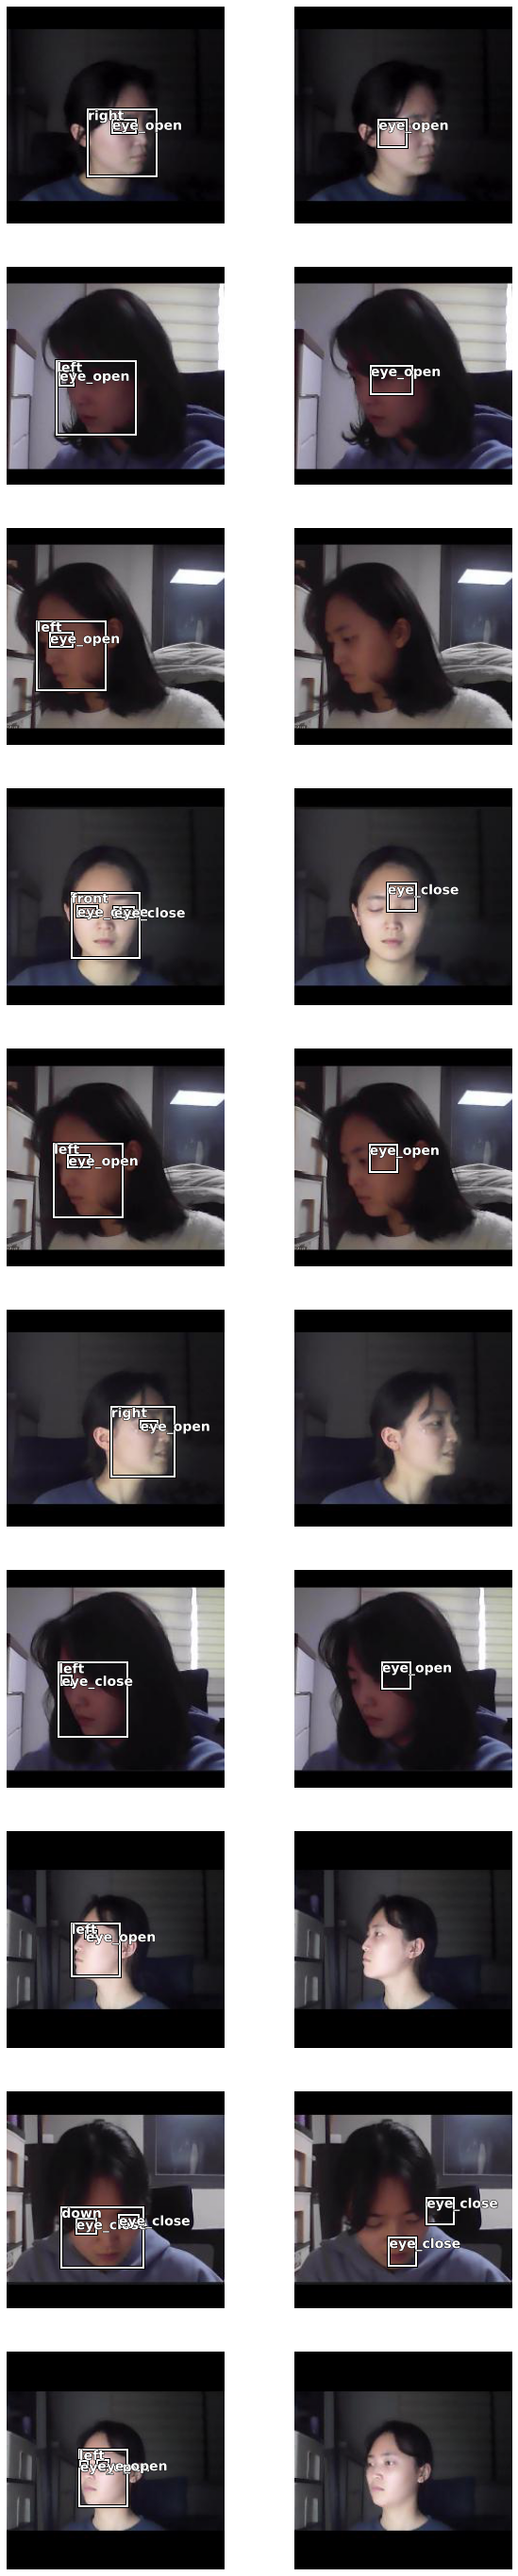

In [46]:
show_results(max_show=10, printit=False)

In [47]:
from PIL import Image
data.classes

['background', 'down', 'eye_close', 'eye_open', 'front', 'left', 'right', 'up']

In [48]:
from fastai.basic_train import * 
from fastai.vision.data import ObjectCategoryList,ObjectCategoryProcessor,MultiCategoryList
from fastai.core import *
from fastai.vision.image import ImageBBox

from functools import partial

# overwrite...

def newcreate(h, w, bboxes, labels=None, classes=None, scale=True):
    "Create an ImageBBox object from `bboxes`."
    if isinstance(bboxes, np.ndarray) and bboxes.dtype == np.object: bboxes = np.array([bb for bb in bboxes])
    bboxes = tensor(bboxes).float()
    tr_corners = torch.cat([bboxes[:,0][:,None], bboxes[:,3][:,None]], 1)
    bl_corners = bboxes[:,1:3].flip(1)
    bboxes = torch.cat([bboxes[:,:2], tr_corners, bl_corners, bboxes[:,2:]], 1)
    flow = FlowField((h,w), bboxes.view(-1,2))
    return ImageBBox(flow, labels=labels, classes=classes, y_first=True, scale=scale)

def newreconstruct(classes,t, x):
    (bboxes, labels) = t
    if len((labels).nonzero()) == 0: return
    i = (labels).nonzero().min()
    bboxes,labels = bboxes[i:],labels[i:]
#     print("x size",*x.size)
    return newcreate(*x.size, bboxes, labels=labels, classes=classes, scale=False)


def newpredict(self, item:ItemBase,train_json, return_x:bool=False, batch_first:bool=True, with_dropout:bool=False, **kwargs):
        item =item.resize(244)
        h =w=244
        threshold = 0
        print("Return predicted class, label and probabilities for `item`.")
        batch = self.data.one_item(item)
        res = self.pred_batch(batch=batch, with_dropout=with_dropout)
        raw_pred,x = grab_idx(res,0,batch_first=batch_first),batch[0]
        norm = getattr(self.data,'norm',False)
        if norm:
            x = self.data.denorm(x)
            if norm.keywords.get('do_y',False): raw_pred = self.data.denorm(raw_pred)
        ds = self.data.single_ds
        (bboxes, pred) = raw_pred
        labels = pred.max(1)[1] # get the index of the max as the predicted clas
        scores = pred.max(1)[0].sigmoid() # get the sigmoid of the max as the class probability
        # draw~
#         bboxes = bboxes.squeeze()
#         print((bboxes))
#         print((bboxes))
        a_ic = actn_to_bb(bboxes, anchors)
#         print("///>>",a_ic,"///>>")
        anc_cnr = anchor_cnr.clone()
        a_ic.add_(1)
        anc_cnr.add_(1)
        
        pos_idx = labels > 0
        pos_labels = labels[pos_idx]
        pos_a_ic = a_ic[pos_idx]
        scores = scores[pos_idx]
        
        a_ic.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
        anc_cnr.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
        if any(pos_idx):
            pred_label = newcreate(224, 224, pos_a_ic.cpu(), pos_labels.cpu(), data.train_ds.y.classes)
            img.show(y=pred_label, figsize=(5,5))
        else:
            img.show(figsize= (5,5)) 
#         bboxes,labels, scores = delete_zero(pos_a_ic, pos_labels, scores)
        mask   = scores > threshold
        bboxes  = pos_a_ic[mask]
        labels = pos_labels[mask]
        scores = scores[mask]
        _pred = (bboxes,labels)
        x = ds.x.reconstruct(grab_idx(x, 0))
        y = newreconstruct(ds.y, _pred, x) if has_arg(ds.y.reconstruct, 'x') else ds.y.reconstruct(_pred)
        if y is None:
            print("nothing detected!")
        return bboxes.cpu().numpy(),[train_json['categories'][l]['name'] for l in labels], scores.cpu().numpy()

def delete_zero(bboxes, labels, scores):
        # select only bboxes that detect something else than background (0)
        mask   = labels > 0
        bboxes  = bboxes[mask]
        labels = labels[mask]
        scores = scores[mask]
        return bboxes,labels, scores
    

Return predicted class, label and probabilities for `item`.
nothing detected!


(array([], shape=(0, 4), dtype=float32), [], array([], dtype=float32))

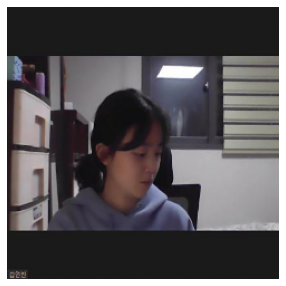

In [51]:
img = open_image('test.jpg')
bboxes, labels, scores= newpredict(learn,img,train_json)

# print([train_json['categories'][l]['name'] for l in labels])
bboxes, labels, scores

In [52]:
# def show_predictedimg(bboxes, labels, scores,printit= True):
#         a_ic = actn_to_bb(torch.from_numpy(bboxes), anchors)
#         print("a_ic>>>>>>>",a_ic)
#         anc_cnr = anchor_cnr.clone()
#         if printit:
#             print(f"i={i}, a_ic orig")
#             print(a_ic[pos_idx])
#             print(f"i={i}, anchor orig")
#             print(anc_cnr[pos_idx])
#         h = 224
#         w = 224
#         # convert to image coordinates (add 1 and scale by img size)
#         a_ic.add_(2)
#         anc_cnr.add_(2)
#         if printit:
#             print(f"i={i}, a_ic moved")
#             print(a_ic[pos_idx])
#             print(f"i={i}, anchor moved")
#             print(anc_cnr[pos_idx])        
#         a_ic.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
#         anc_cnr.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
#         if printit:
#             print(f"i={i}, a_ic rescaled")
#             print(a_ic[pos_idx])
#             print(f"i={i}, anchor rescaled")
#             print(anc_cnr[pos_idx])

#         if len(pos_pred_clas) > 0:
#             pred_label = ImageBBox.create(224, 224, a_ic.cpu(), labels.cpu(), data.train_ds.y.classes)
#             img.show(ax=axs, y=pred_label, figsize=(5,5))
#         else:
#             img.show(ax=axs, figsize= (5,5))


# # data.train_ds.y.classes
# show_predictedimg(bboxes, labels, scores)

In [57]:
learn.export('test.pkl')
# lear